## Correr el encabezado antes de comenzar para cargar todas las funiones

In [1]:
#Encabezado del archivo
import os,csv
import pandas as pd
from IPython.display import display, Markdown, Latex
import matplotlib.pyplot as plt
%matplotlib inline

def cargar_txt_en_lista(file_path):
    return_list = []
    with open(file_path,"r") as openfile:
        for lines in openfile:
            return_list.append(lines.replace("\n",""))
            
    return return_list

#Filtros de String para dataframe
#Variante para una columna

def sfilter_by_col(df_query,col_name,text,has=True):
    df_return = df_query.loc[df_query[col_name].str.contains(text)==has]
    return df_return

def sfilter_linage(df_query,text,has=True):
    df_return = df_query.loc[df_query["Linage"].str.contains(text)==has]
    return df_return


def sfilter_org(df_query,text,has=True):
    df_return = df_query.loc[df_query["Organism"].str.contains(text)==has]
    return df_return

def sfilter_by_uniprot(df_query,uniprot_query):
    df_return =  df_query.loc[df_query["UNIPROT_ID"]==uniprot_query]
    return df_return


def get_pdb_list_from_df(df_query,uniprot_query):
    df_return =  df_query.loc[df_query["UNIPROT_ID"]==uniprot_query]
    return_list = filter_by_uniprot(df_proteins_celular,"P04637").iloc[0]["PDB_CHAIN_LIST"]
    return return_list

def printd(text):
    display(Markdown(text))
    return

def strlen(x):
    return str(len(x))


printd("### Funciones cargagadas correctamente, puede continuar.")

### Funciones cargagadas correctamente, puede continuar.

# Correr el main para generar el Informe Base



# Fercha del informe 2019-09-04

## Reading swissprot

Dataframe size: 560459

UNIPROT_ID   Entry_name    Status  \
0     Q0ATK2   ACCD_MARMM  reviewed   
1     O40976     1A_CMVNT  reviewed   
2     Q84P24  4CLL6_ARATH  reviewed   
3     P62260    1433E_RAT  reviewed   
4     P0CK20    A25_VACCC  reviewed   

                                       Protein_names  \
0  Acetyl-coenzyme A carboxylase carboxyl transfe...   
1  Replication protein 1a [Includes: ATP-dependen...   
2  4-coumarate--CoA ligase-like 6 (EC 6.2.1.-) (4...   
3  14-3-3 protein epsilon (14-3-3E) (Mitochondria...   
4                                       Protein A2.5   

                  Gene names                                   Organism  \
0           accD Mmar10_0089            Maricaulis maris (strain MCS10)   
1                      ORF1a   Cucumber mosaic virus (strain NT9) (CMV)   
2  4CLL6 At4g19010 F13C5.180     Arabidopsis thaliana (Mouse-ear cress)   
3                      Ywhae                    Rattus norvegicus (Rat)   
4                      A2.5L  Vaccinia virus (strain Copenhagen) (VACV)   

   Length                                             Linage  \
0     311  cellular organisms, Bacteria, Proteobacteria, ...   
1     993  Viruses, Riboviria, Bromoviridae, Cucumovirus,...   
2     566  cellular organisms, Eukaryota, Viridiplantae, ...   
3     255  cellular organisms, Eukaryota, Opisthokonta, M...   
4      76  Viruses, Poxviridae, Chordopoxvirinae, Orthopo...   

                                            Sequence  Taxonomic lineage IDs  
0  MTEKSNGMSWLSKITPPGMSKIFSKRDTPDNLWVKCPVSEEMVFHK...                 394221  
1  MATSSFNINELVASHGDKGLLATALVDKTAHEQLEEQLQHQRRGRK...                 117124  
2  MAATHLHIPPNPKTQTSHQNPPFWFSSKTGIYTSKFPSLHLPVDPN...                   3702  
3  MDDREDLVYQAKLAEQAERYDEMVESMKKVAGMDVELTVEERNLLS...                  10116  
4  MSWYEKYNIVLNPPKRCSSACADNLTTILAEDGNHIRAILYSQPKK...                  10249

## Reading PDBSWS

swslist dataframe size: 47097

UNIPROT_ID                                     PDB_CHAIN_LIST  \
0     A0A010  [5B00_A, 5B00_B, 5B00_C, 5B01_A, 5B01_B, 5B01_...   
1     A0A011  [3VK5_A, 3VK5_B, 3VKA_A, 3VKA_B, 3VKB_A, 3VKB_...   
2     A0A585                                           [4MNQ_E]   
3     A0A5A3                                   [4UDT_B, 4UDU_B]   
4     A0A5B3                                   [5NHT_B, 5NQK_B]   

   pdb_chain_count  
0               57  
1               10  
2                1  
3                2  
4                2

# Merge Sprot with SWS

Dataframe size: 26550

Length  Taxonomic lineage IDs  pdb_chain_count
count  26550.000000           2.655000e+04     26550.000000
mean     454.547081           1.216896e+05        10.030245
std      545.239279           1.946628e+05        30.223010
min        5.000000           1.700000e+01         1.000000
25%      188.000000           9.606000e+03         2.000000
50%      328.000000           1.009000e+04         4.000000
75%      529.000000           2.089640e+05         8.000000
max    34350.000000           2.510777e+06      1084.000000

# Resumen de informacion del conjunto de proteinas a estudiar

Viruses Dataframe size: 567

Celular Dataframe size: 10165

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Bacteria dataframe size: 3694

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Archaea dataframe size: 418

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Eukaryota dataframe size: 6053

# Graficos del dataframe de trabajo( Organismos Celulares)

## Histograma de Length menores a 3000

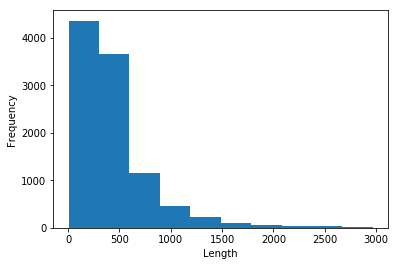

## Histograma de pdb_chain_count menores a 200

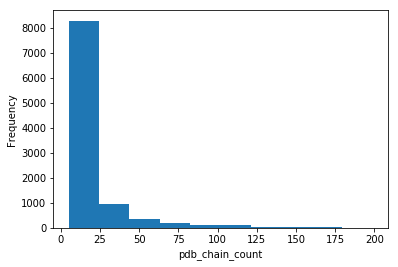

informe generado en 7.063522577285767

In [10]:
import time,datetime
# MAIN/CARGA DE DATOS
printd("# Fercha del informe "+str(datetime.date.today()))
tiempo_inicial = time.time()

log_error = dict()
log_error["SWISPROT"] = list()
log_error["PDBSWS_PDBUNIPROT"] = list()

# paths de archivos iniciales
path_swissprot_tab =  "bases_de_datos_ref/uniprot-reviewed_20190730.tab"
path_pdbwsw_pdbchain = "bases_de_datos_ref/pdb_uniprot_chain_map.lst.2"


#CARGAR SWISSPROT
printd ("## Reading swissprot")

df_sprot = pd.read_csv(path_swissprot_tab,sep="\t")
df_sprot.columns = ['UNIPROT_ID', 
                    'Entry_name', 
                    'Status', 
                    'Protein_names', 
                    'Gene names', 
                    'Organism', 
                    'Length', 'Linage', 
                    'Sequence', 
                    'Taxonomic lineage IDs']
printd("Dataframe size: "+strlen(df_sprot))
display(df_sprot.head(n=5))


#ESTE BLOQUE SIRVE PARA CARGAR SIFTS, 
#actualmente no esta en uso
#
"""
printd ("## Reading sitfs")
df_sifts = pd.read_csv("bases_de_datos_ref/sifts_uniprot_pdb.tsv",header=1,sep="\t")
df_sifts.columns = ["UNIPROT_ID","PDB_list_sifts"]
printd("Dataframe size: "+strlen(df_sifts))
display(df_sifts.head(n=5))

printd ("Merge sprot with sifts")
df_sprot_pdb = pd.merge(df_sprot,df_sifts,on=["UNIPROT_ID"],how="inner")
printd("Dataframe size: "+strlen(df_sprot_pdb))
display(df_sprot_pdb.head(n=1))
"""

###CARGAR PDBSWS
printd ("## Reading PDBSWS")
#Esto carga la lista manualmente por que algunos codigos uniprot no figuran.
#son listas de ancho fijo (ej: '101m A P02185')
#algunas lineas del archivo 
lst_pdbsws = []
tmp_pdbsws = cargar_txt_en_lista(path_pdbwsw_pdbchain)
for index,line in enumerate(tmp_pdbsws):
    if (line[-1] != "?") and (line[-1] != " "):
        pdb_chain_id = line[0:4].upper()+"_"+line[5] 
        tmp = [pdb_chain_id,line[0:4],line[5],line[7:]]
        lst_pdbsws.append(tmp)
    else:
        #Los errores de carga de archivos se anexan a su log
        message = "Error in line "+ str(index) + ": "+ (line) 
        log_error["PDBSWS_PDBUNIPROT"].append(message)
#Borrar vbariables
del pdb_chain_id
del tmp_pdbsws
del tmp
#Crea el dataframe usando la lista
df_pdbsws = pd.DataFrame(lst_pdbsws).dropna()
df_pdbsws.columns = ["PDB_CHAIN_ID","PDB","CHAIN","UNIPROT_ID"]
#Los agrupa por pdb
df_swslist = df_pdbsws.groupby(["UNIPROT_ID"],as_index=False).agg({'PDB_CHAIN_ID':lambda x:list(x)})
#Agrega el numero de pdbs en la lista
df_swslist["pdb_chain_count"] = df_swslist.apply({"PDB_CHAIN_ID":lambda x: len(x)})
df_swslist.columns= ["UNIPROT_ID","PDB_CHAIN_LIST" ,"pdb_chain_count"]
#Informe visible
printd ("swslist dataframe size: "+strlen(df_swslist))
display(df_swslist.head())

### MERGE: AGREGA las columnas de sws a sprot, elimina los uniprot que no tengan mapeo.
printd ("# Merge Sprot with SWS")
df_sprot_pdb = pd.merge(df_sprot,df_swslist,on=["UNIPROT_ID"],how="inner")
printd("Dataframe size: "+strlen(df_sprot_pdb))
display(df_sprot_pdb.describe())

### FILTRANDO
# De las proteinas con mas de 5 cadenas, 
# Separar los virus en una tabla aparte.
df_work = df_sprot_pdb.loc[(df_sprot_pdb["pdb_chain_count"]>4) & (df_sprot_pdb["Linage"].str.contains("Viruses")==False)]
df_virus = df_sprot_pdb.loc[(df_sprot_pdb["pdb_chain_count"]>4) & (df_sprot_pdb["Linage"].str.contains("Viruses"))]
printd ("# Resumen de informacion del conjunto de proteinas a estudiar")
printd ("Viruses Dataframe size: "+strlen(df_virus) )
printd ("Celular Dataframe size: "+strlen(df_work))
for taxa in ["Bacteria","Archaea","Eukaryota"]:
    printd ("&nbsp;"*6+taxa+" dataframe size: "+strlen (sfilter_linage(df_work,taxa)))

printd("# Graficos del dataframe de trabajo( Organismos Celulares)")

printd("## Histograma de Length menores a 3000")
plot_his1 = df_work["Length"].loc[df_work["Length"]<3000].plot(kind="hist")
plot_his1.set_xlabel("Length")
plt.show()


printd("## Histograma de pdb_chain_count menores a 200")
plot_his2 = df_work["pdb_chain_count"].loc[df_work["pdb_chain_count"]<200].plot(kind="hist")
plot_his2.set_xlabel("pdb_chain_count")
plt.show()

printd( "informe generado en "+str(time.time()-tiempo_inicial))


#Esta linea guarda el df_work en un archivo tsv
df_work.to_csv("archivos_importantes/df_work_"+str(datetime.date.today())+".tsv",sep="\t")

# Guardar en archivo

In [7]:
#Esto arma una lista global de pdb en el df_work
def update_pdb_dowladed(dataframe):
    for i,row in dataframe.iterrows():
        filename = "ent_files/pdb"+row[0].lower()+".ent"
        if os.path.isfile (filename):
            dataframe.at[i,"dowloaded"] = True
            dataframe.at[i,"path_to_entfile"] = filename
    return

full_pdb_list = set()
for lines in df_work["PDB_CHAIN_LIST"]:
    full_pdb_list.update(set([x[0:4] for x in lines]))

df_full_pdb = pd.DataFrame(list(full_pdb_list))
df_full_pdb.columns = ["PDB_ID"]
df_full_pdb["dowloaded"] = False
df_full_pdb["path_to_entfile"] = None
printd ("PDB LIST is "+strlen(df_full_pdb))
display(df_full_pdb.head())

update_pdb_dowladed(df_full_pdb)

df_full_pdb.loc[df_full_pdb["dowloaded"]==True]

PDB LIST is 82289

PDB_ID  dowloaded path_to_entfile
0   2FYN      False            None
1   2CAN      False            None
2   5KIJ      False            None
3   2F1A      False            None
4   2D7Y      False            None

PDB_ID  dowloaded        path_to_entfile
1122    4IBW       True  ent_files/pdb4ibw.ent
1350    1SAL       True  ent_files/pdb1sal.ent
1860    1KZY       True  ent_files/pdb1kzy.ent
1887    3KZ8       True  ent_files/pdb3kz8.ent
1938    4AGO       True  ent_files/pdb4ago.ent
2764    2J21       True  ent_files/pdb2j21.ent
3048    2BIQ       True  ent_files/pdb2biq.ent
3122    2KS1       True  ent_files/pdb2ks1.ent
3589    2MZD       True  ent_files/pdb2mzd.ent
3924    2N0A       True  ent_files/pdb2n0a.ent
4183    1C26       True  ent_files/pdb1c26.ent
5034    2H4H       True  ent_files/pdb2h4h.ent
5385    2LY4       True  ent_files/pdb2ly4.ent
6175    2GS0       True  ent_files/pdb2gs0.ent
8392    1AYG       True  ent_files/pdb1ayg.ent
9115    5AOL       True  ent_files/pdb5aol.ent
12100   2AC0       True  ent_files/pdb2ac0.ent
12105   2FOJ       True  ent_files/pdb2foj.ent
13235   1MA3       True  ent_files/pdb1ma3.ent
13808   1SAE       True  ent_files/pdb1sae.ent
14367   3SAK       True  ent_files/pdb3sak.ent
15802   5HP0       True  ent_files/pdb5hp0.ent
17611   4FZ3       True  ent_files/pdb4fz3.ent
17814   2H4F       True  ent_files/pdb2h4f.ent
18058   2MWY       True  ent_files/pdb2mwy.ent
18692   2X0V       True  ent_files/pdb2x0v.ent
19049   4ZZJ       True  ent_files/pdb4zzj.ent
19370   4X34       True  ent_files/pdb4x34.ent
20085   4AGM       True  ent_files/pdb4agm.ent
20511   2MWO       True  ent_files/pdb2mwo.ent
...      ...        ...                    ...
65525   4RP6       True  ent_files/pdb4rp6.ent
66759   5AOM       True  ent_files/pdb5aom.ent
66872   4IBS       True  ent_files/pdb4ibs.ent
67095   5A7B       True  ent_files/pdb5a7b.ent
68005   5UN8       True  ent_files/pdb5un8.ent
69171   2YBG       True  ent_files/pdb2ybg.ent
69254   1SAF       True  ent_files/pdb1saf.ent
70574   2B3G       True  ent_files/pdb2b3g.ent
70773   2ADY       True  ent_files/pdb2ady.ent
70881   5BUA       True  ent_files/pdb5bua.ent
71858   3D09       True  ent_files/pdb3d09.ent
72579   2VUK       True  ent_files/pdb2vuk.ent
72655   3OQ5       True  ent_files/pdb3oq5.ent
73428   3D06       True  ent_files/pdb3d06.ent
73702   2AI5       True  ent_files/pdb2ai5.ent
74615   1YCS       True  ent_files/pdb1ycs.ent
75028   2H2F       True  ent_files/pdb2h2f.ent
75321   5LGY       True  ent_files/pdb5lgy.ent
76258   5G4N       True  ent_files/pdb5g4n.ent
76428   1UOL       True  ent_files/pdb1uol.ent
76682   1PET       True  ent_files/pdb1pet.ent
76757   4IBV       True  ent_files/pdb4ibv.ent
77049   2ATA       True  ent_files/pdb2ata.ent
78344   3TG5       True  ent_files/pdb3tg5.ent
78730   4LO9       True  ent_files/pdb4lo9.ent
80318   5AOK       True  ent_files/pdb5aok.ent
80493   2K8F       True  ent_files/pdb2k8f.ent
80662   2J1X       True  ent_files/pdb2j1x.ent
80748   4LOF       True  ent_files/pdb4lof.ent
80863   1YC5       True  ent_files/pdb1yc5.ent

[162 rows x 3 columns]

# Aplicacion sobre proteinas de ejemplo

Checking folder structure.
Done.


In [182]:
#Checkquer estructura de carpetas
folder_list = ["ent_files","fasta","blast","pdb_chains"]
print ("Checking folder structure.")
for folder in folder_list:
    if not os.path.isdir(folder):
        print ("Creating folder "+ folder)
        os.mkdir(folder)
print ("Done.")


#Crea un diciconario para acumular los datos a usar
#crea un diccionario que contiene dataframes especificos utiles
#las llaves son los uniprot_id.
ensemble_data = dict()
ensemble_df = dict()

def dibujar_histograma(df_query,col):
    plot_his1 = df_query[col].plot(kind="hist")
    plot_his1.set_xlabel(col)
    plt.show()
    return

def show_ensemble_info(query):
    printd("## Mostrando datos de la proteina de estudio")
    for entry in ensemble_data[query]:
        printd ("&nbsp;&nbsp;**"+entry+"** >"+ "`"+str(ensemble_data[query][entry])+"`")
    return

def run_blast(fasta_file):
    output_filename = fasta_file.replace("fasta/","blast_results/").replace(".fasta","_blast_results.txt")
    cmd = "blastp -query "+ fasta_file +" -db uniprot_sprot.db -evalue 1e-10 -out "+ output_filename +" -outfmt '6 qaccver qlen qstart qend sseqid saccver slen sstart send length staxid nident gaps evalue pident qcovs' -num_alignments 1000"
    os.system(cmd)
    return output_filename

def estudiar_proteina(query,show=True):
    #Check que el query sea correcto
    if not query in list(df_work["UNIPROT_ID"]):
        print ("La proteina solicitada no se encuentra disponible.")
        return False
    
    #premite la escritura en las variables globales
    global ensemble_data
    global ensemble_df
    
    #carga informacion en ensemble_data y ensemble_df
    ensemble_df[query] = dict()
    ensemble_data[query] = dict(sfilter_by_uniprot(df_work,query).iloc[0])
    #da una lista 
    ensemble_data[query]["PDB_in_df_work"] = (list(set([x[0:4] for x in ensemble_data[query]["PDB_CHAIN_LIST"]])))

    #create fasta file with query seq
    with open ("fasta/"+query+".fasta","w") as openfile:
        openfile.write (">"+query+"\n")
        openfile.write (ensemble_data[query]["Sequence"]+"\n")
    
    #BUSCAR RESULTADOS DEL BLAST, SI NO EXISTEN, CORRERLO
    blast_results_filename = "blast_results/"+query+"_blast_results.txt"
    if os.path.isfile(blast_results_filename):
        if os.path.getsize(blast_results_filename) == 0:
            print ("R ",end="")
            os.system("rm "+blast_results_filename)
            ensemble_data[query]["blast_results"] = run_blast("fasta/"+query+".fasta")
        else:
            ensemble_data[query]["blast_results"] = blast_results_filename
    else:
        ensemble_data[query]["blast_results"] = run_blast("fasta/"+query+".fasta")
    
    
    #PARSEAR LOS RESULTADOS EL BLAST y cargarlos a ensemble data
    if os.path.getsize(ensemble_data[query]["blast_results"]) > 0:
        #leer los datos importantes del blast y colocarlos en un dataframe
        df1 = pd.read_csv(ensemble_data[query]["blast_results"],header=None,sep="\t")
        df1.columns = "qaccver qlen qstart qend sseqid saccver slen sstart send length staxid nident gaps evalue pident qcov".split(" ")
        df1["UNIPROT_ID"] =  df1["sseqid"].str.split("|",expand=True)[1]
        #se agregan los valores de qstart y qend
        ensemble_df[query]["blast_results"] =df1[["UNIPROT_ID","pident","qcov","qstart","qend","sstart","send","gaps"]].loc[(df1["UNIPROT_ID"]!=query) & (df1["pident"]>30) & (df1["qcov"]>75) ]
        del df1
        #carga la infomacion de los homologos al ensemble_data
        ensemble_data[query]["homologs_sprot"] = list(set(list(ensemble_df[query]["blast_results"]["UNIPROT_ID"])))
        ensemble_data[query]["homologs_in_df_work"] = list(set(df_work["UNIPROT_ID"]) & set(ensemble_data[query]["homologs_sprot"]))
    else:
        ensemble_data[query]["homologs_sprot"] = []
        printd("## Alerta, blast_results still 0 "+query)
    
    
        
    #CREAR FASTA DE HOMOLOGOS
    filename_hsf = "fasta/homologs_sprot/"+query+"_homologs_sprot.fasta"
    if os.path.isfile(filename_hsf):
        ensemble_data[query]["homologos_sprot_fasta"] = filename_hsf
    else:
        with open(filename_hsf,"w") as openfile:
            openfile.write(">"+query)
            openfile.write("\n")
            openfile.write(ensemble_data[query]["Sequence"])
            openfile.write("\n")
            for homolog in ensemble_data[query]["homologs_sprot"]:
                #Si la secuencia esta en el dataframe de sprot
                if len(df_sprot.loc[df_sprot["UNIPROT_ID"]==homolog])>0:
                    seq = df_sprot.loc[df_sprot["UNIPROT_ID"]==homolog]["Sequence"].iloc[0]
                    openfile.write(">"+homolog)
                    openfile.write("\n")
                    openfile.write(seq)
                    openfile.write("\n")
            ensemble_data[uniprot_id]["homologos_sprot_fasta"] = filename_hsf
        
    
    #muestra los resutaldos hasta el momento
    if show:
        show_ensemble_info(query)
        printd("### Histograma de los resultados del blast")
    return True

print ("Done.")

Done.


In [183]:
estudiar_proteina("P04637")

## Mostrando datos de la proteina de estudio

&nbsp;&nbsp;**UNIPROT_ID** >`P04637`

&nbsp;&nbsp;**Entry_name** >`P53_HUMAN`

&nbsp;&nbsp;**Status** >`reviewed`

&nbsp;&nbsp;**Protein_names** >`Cellular tumor antigen p53 (Antigen NY-CO-13) (Phosphoprotein p53) (Tumor suppressor p53)`

&nbsp;&nbsp;**Gene names** >`TP53 P53`

&nbsp;&nbsp;**Organism** >`Homo sapiens (Human)`

&nbsp;&nbsp;**Length** >`393`

&nbsp;&nbsp;**Linage** >`cellular organisms, Eukaryota, Opisthokonta, Metazoa, Eumetazoa, Bilateria, Deuterostomia, Chordata, Craniata, Vertebrata, Gnathostomata (jawed vertebrates), Teleostomi, Euteleostomi, Sarcopterygii, Dipnotetrapodomorpha, Tetrapoda, Amniota, Mammalia, Theria, Eutheria, Boreoeutheria, Euarchontoglires, Primates, Haplorrhini, Simiiformes, Catarrhini, Hominoidea (apes), Hominidae (great apes), Homininae, Homo, Homo sapiens (Human)`

&nbsp;&nbsp;**Sequence** >`MEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLSPDDIEQWFTEDPGPDEAPRMPEAAPPVAPAPAAPTPAAPAPAPSWPLSSSVPSQKTYQGSYGFRLGFLHSGTAKSVTCTYSPALNKMFCQLAKTCPVQLWVDSTPPPGTRVRAMAIYKQSQHMTEVVRRCPHHERCSDSDGLAPPQHLIRVEGNLRVEYLDDRNTFRHSVVVPYEPPEVGSDCTTIHYNYMCNSSCMGGMNRRPILTIITLEDSSGNLLGRNSFEVRVCACPGRDRRTEEENLRKKGEPHHELPPGSTKRALPNNTSSSPQPKKKPLDGEYFTLQIRGRERFEMFRELNEALELKDAQAGKEPGGSRAHSSHLKSKKGQSTSRHKKLMFKTEGPDSD`

&nbsp;&nbsp;**Taxonomic lineage IDs** >`9606`

&nbsp;&nbsp;**PDB_CHAIN_LIST** >`['1A1U_A', '1A1U_C', '1AIE_A', '1C26_A', '1DT7_X', '1DT7_Y', '1GZH_A', '1GZH_C', '1H26_E', '1HS5_A', '1HS5_B', '1JSP_A', '1KZY_A', '1KZY_B', '1MA3_B', '1OLG_A', '1OLG_B', '1OLG_C', '1OLG_D', '1OLH_A', '1OLH_B', '1OLH_C', '1OLH_D', '1PES_A', '1PES_B', '1PES_C', '1PES_D', '1PET_A', '1PET_B', '1PET_C', '1PET_D', '1SAE_A', '1SAE_B', '1SAE_C', '1SAE_D', '1SAF_A', '1SAF_B', '1SAF_C', '1SAF_D', '1SAH_A', '1SAH_B', '1SAH_C', '1SAH_D', '1SAJ_A', '1SAJ_B', '1SAJ_C', '1SAJ_D', '1SAK_A', '1SAK_B', '1SAK_C', '1SAK_D', '1SAL_A', '1SAL_B', '1SAL_C', '1SAL_D', '1TSR_A', '1TSR_B', '1TSR_C', '1TUP_A', '1TUP_B', '1TUP_C', '1UOL_A', '1UOL_B', '1YC5_B', '1YCQ_B', '1YCR_B', '1YCS_A', '2AC0_A', '2AC0_B', '2AC0_C', '2AC0_D', '2ADY_A', '2ADY_B', '2AHI_A', '2AHI_B', '2AHI_C', '2AHI_D', '2ATA_A', '2ATA_B', '2ATA_C', '2ATA_D', '2B3G_B', '2BIM_A', '2BIM_B', '2BIN_A', '2BIO_A', '2BIP_A', '2BIQ_A', '2F1X_A', '2F1X_B', '2FEJ_A', '2FOJ_B', '2FOO_B', '2GS0_B', '2H1L_M', '2H1L_N', '2H1L_O', '2H1L_P', '2H1L_Q', '2H1L_R', '2H1L_S', '2H1L_T', '2H1L_U', '2H1L_V', '2H1L_W', '2H1L_X', '2H2D_B', '2H2F_B', '2H4F_D', '2H4H_B', '2H4J_D', '2H59_D', '2H59_E', '2J0Z_A', '2J0Z_B', '2J0Z_C', '2J0Z_D', '2J10_A', '2J10_B', '2J10_C', '2J10_D', '2J11_A', '2J11_B', '2J11_C', '2J11_D', '2J1W_A', '2J1W_B', '2J1X_A', '2J1X_B', '2J1Y_A', '2J1Y_B', '2J1Y_C', '2J1Y_D', '2J1Z_A', '2J1Z_B', '2J20_A', '2J20_B', '2J21_A', '2J21_B', '2K8F_B', '2L14_B', '2LY4_B', '2MEJ_B', '2MWO_B', '2MWP_B', '2MWY_B', '2MZD_B', '2OCJ_A', '2OCJ_B', '2OCJ_C', '2OCJ_D', '2PCX_A', '2QVQ_A', '2QXA_A', '2QXA_B', '2QXA_C', '2QXA_D', '2QXB_A', '2QXB_B', '2QXB_C', '2QXB_D', '2QXC_A', '2QXC_B', '2QXC_C', '2QXC_D', '2RUK_A', '2VUK_B', '2WGX_A', '2WGX_B', '2X0U_A', '2X0U_B', '2X0V_A', '2X0V_B', '2X0W_A', '2X0W_B', '2XWR_B', '2YBG_A', '2YBG_B', '2YBG_C', '2YBG_D', '2YDR_P', '2Z5S_P', '2Z5S_Q', '2Z5T_P', '2Z5T_Q', '2Z5T_R', '3D05_A', '3D06_A', '3D07_A', '3D07_B', '3D08_A', '3D09_A', '3DAC_B', '3IGK_A', '3IGL_A', '3KMD_A', '3KMD_B', '3KMD_C', '3KMD_D', '3KZ8_A', '3KZ8_B', '3LW1_P', '3OQ5_A', '3OQ5_B', '3OQ5_C', '3PDH_D', '3Q01_A', '3Q01_B', '3Q05_A', '3Q05_B', '3Q05_C', '3Q05_D', '3Q06_A', '3Q06_B', '3Q06_C', '3Q06_D', '3SAK_A', '3SAK_B', '3SAK_C', '3SAK_D', '3TG5_B', '3TS8_A', '3TS8_B', '3TS8_C', '3TS8_D', '3ZME_A', '3ZME_B', '4AGL_A', '4AGL_B', '4AGM_A', '4AGM_B', '4AGN_A', '4AGN_B', '4AGO_A', '4AGO_B', '4AGP_A', '4AGP_B', '4AGQ_A', '4AGQ_B', '4BUZ_P', '4BV2_E', '4BV2_H', '4FZ3_B', '4HFZ_B', '4HFZ_D', '4HJE_A', '4HJE_B', '4HJE_C', '4HJE_D', '4IBQ_A', '4IBQ_B', '4IBQ_C', '4IBQ_D', '4IBS_A', '4IBS_B', '4IBS_C', '4IBS_D', '4IBT_A', '4IBT_B', '4IBT_C', '4IBT_D', '4IBU_A', '4IBU_B', '4IBU_C', '4IBU_D', '4IBV_A', '4IBW_A', '4IBY_A', '4IBY_B', '4IBZ_A', '4IBZ_B', '4IBZ_C', '4IBZ_D', '4IJT_A', '4KVP_A', '4KVP_B', '4KVP_C', '4KVP_D', '4LO9_A', '4LO9_B', '4LO9_C', '4LO9_D', '4LOE_A', '4LOE_B', '4LOE_C', '4LOE_D', '4LOF_A', '4MZI_A', '4MZR_A', '4MZR_B', '4MZR_C', '4MZR_D', '4QO1_B', '4RP6_Z', '4RP7_Z', '4X34_C', '4XR8_C', '4XR8_D', '4ZZJ_A', '5A7B_A', '5A7B_B', '5AB9_A', '5AB9_B', '5ABA_A', '5ABA_B', '5AOI_A', '5AOI_B', '5AOJ_A', '5AOJ_B', '5AOK_A', '5AOK_B', '5AOL_A', '5AOL_B', '5AOM_A', '5AOM_B', '5BUA_A', '5ECG_A', '5ECG_B', '5G4M_A', '5G4M_B', '5G4N_A', '5G4N_B', '5G4O_A', '5G4O_B', '5HOU_A', '5HP0_A', '5HPD_A', '5LAP_A', '5LAP_B', '5LGY_A', '5LGY_B', '5LGY_C', '5LGY_D', '5MCT_A', '5MCT_B', '5MCU_A', '5MCU_B', '5MCV_A', '5MCV_B', '5MCW_A', '5MCW_B', '5MF7_A', '5MF7_B', '5MG7_A', '5MG7_B', '5O1A_A', '5O1A_B', '5O1B_A', '5O1B_B', '5O1C_A', '5O1C_B', '5O1D_A', '5O1D_B', '5O1E_A', '5O1E_B', '5O1F_A', '5O1F_B', '5O1G_A', '5O1G_B', '5O1H_A', '5O1H_B', '5O1I_A', '5O1I_B', '5OL0_C', '5OL0_D', '6FF9_A', '6FF9_B', '6FF9_C', '6FF9_D', '6FJ5_A', '6FJ5_B', '6FJ5_C', '6FJ5_D']`

&nbsp;&nbsp;**pdb_chain_count** >`373`

&nbsp;&nbsp;**PDB_in_df_work** >`['1GZH', '4IBT', '1YCR', '5G4N', '2BIP', '2WGX', '4RP7', '5O1F', '5HOU', '2J11', '2YBG', '4IBY', '5AB9', '3ZME', '2J10', '2X0U', '4AGL', '2MWY', '4AGQ', '3Q06', '2J0Z', '3KMD', '4ZZJ', '2F1X', '2BIM', '1SAK', '3DAC', '2BIQ', '4MZI', '2H4F', '2AC0', '5O1A', '3IGL', '1A1U', '4X34', '2OCJ', '5ECG', '4IBS', '3PDH', '2J20', '5O1B', '4IBU', '3SAK', '2MWP', '1UOL', '5BUA', '5HPD', '4AGN', '4LOF', '3D05', '5O1G', '3TG5', '4BUZ', '1C26', '3TS8', '4HJE', '4IBV', '2ATA', '1SAJ', '2QVQ', '2PCX', '2H4H', '5MCW', '1TSR', '2L14', '3LW1', '4AGO', '4FZ3', '4RP6', '2J1W', '1DT7', '1SAH', '5G4O', '3OQ5', '2J1Y', '1PES', '2FOO', '4HFZ', '1YCQ', '2XWR', '1TUP', '4IBQ', '5LAP', '1JSP', '2RUK', '1OLH', '4LOE', '2LY4', '6FJ5', '5MF7', '2Z5T', '1SAE', '2YDR', '3D09', '4AGP', '2VUK', '2J1X', '2FEJ', '4LO9', '2GS0', '4MZR', '5AOK', '4IBZ', '5O1H', '2X0W', '3Q01', '3Q05', '5MG7', '3D07', '1MA3', '1H26', '2AHI', '4IJT', '2MZD', '3KZ8', '2QXB', '4AGM', '4QO1', '2ADY', '1PET', '5AOJ', '5MCU', '5OL0', '5MCT', '2J1Z', '1KZY', '5AOM', '4KVP', '5HP0', '2H1L', '5G4M', '2H2D', '2BIN', '2BIO', '5O1D', '5MCV', '5ABA', '2QXA', '1SAF', '2MEJ', '5AOL', '4BV2', '5O1C', '3IGK', '5A7B', '5LGY', '1HS5', '2Z5S', '2H4J', '2X0V', '1AIE', '2H2F', '3D06', '4XR8', '1YCS', '3D08', '1YC5', '2H59', '5O1E', '1OLG', '1SAL', '5AOI', '2MWO', '2B3G', '2J21', '2K8F', '2QXC', '6FF9', '4IBW', '2FOJ', '5O1I']`

&nbsp;&nbsp;**blast_results** >`blast_results/P04637_blast_results.txt`

&nbsp;&nbsp;**homologs_sprot** >`['P10360', 'P10361', 'P79734', 'P41685', 'Q95330', 'P51664', 'P67939', 'Q9W679', 'Q9W678', 'P07193', 'O09185', 'P25035', 'Q64662', 'O57538', 'P56424', 'Q92143', 'P56423', 'Q9JJP2', 'Q9TUB2', 'Q9TTA1', 'O36006', 'Q8SPZ3', 'P13481', 'P61260', 'Q29537', 'Q00366', 'P67938', 'P02340', 'Q9WUR6']`

&nbsp;&nbsp;**homologs_in_df_work** >`['P02340']`

&nbsp;&nbsp;**homologos_sprot_fasta** >`fasta/homologs_sprot/P04637_homologs_sprot.fasta`

### Histograma de los resultados del blast

True

In [186]:
list_of_under_20  = []

for uniprot_id in list(df_work["UNIPROT_ID"]):
    estudiar_proteina(uniprot_id,False)
    if len(ensemble_data[uniprot_id]["homologs_sprot"]) < 20:
        list_of_under_20.append(uniprot_id)
        del ensemble_data[uniprot_id]
        print (uniprot_id + " have been removed under 20 homolog rule")
    else:
        print (uniprot_id + " acepted in ensemble_data")

P15802 have been removed under 20 homolog rule
P84887 have been removed under 20 homolog rule
P84888 have been removed under 20 homolog rule
P0AAX1 have been removed under 20 homolog rule
P07311 acepted in ensemble_data
P14904 have been removed under 20 homolog rule
P20000 acepted in ensemble_data
O74859 have been removed under 20 homolog rule
P30533 have been removed under 20 homolog rule
Q9UJX3 have been removed under 20 homolog rule
Q12380 have been removed under 20 homolog rule
Q8N0X4 have been removed under 20 homolog rule
P39070 acepted in ensemble_data
P02748 have been removed under 20 homolog rule
P07360 have been removed under 20 homolog rule
P0A6I6 acepted in ensemble_data
O07529 have been removed under 20 homolog rule
P01887 acepted in ensemble_data
Q9WZK0 acepted in ensemble_data
P68699 acepted in ensemble_data
Q8U1S6 have been removed under 20 homolog rule
Q9NZN8 have been removed under 20 homolog rule
O15169 have been removed under 20 homolog rule
P22483 acepted in ensemb

P06709 have been removed under 20 homolog rule
P16897 acepted in ensemble_data
P9WKD3 acepted in ensemble_data
Q9I920 have been removed under 20 homolog rule
Q9HWR3 have been removed under 20 homolog rule
P11021 acepted in ensemble_data
P15056 have been removed under 20 homolog rule
Q12830 have been removed under 20 homolog rule
P35226 have been removed under 20 homolog rule
P0DJQ7 have been removed under 20 homolog rule
Q15059 have been removed under 20 homolog rule
P25440 have been removed under 20 homolog rule
P38822 have been removed under 20 homolog rule
O43683 have been removed under 20 homolog rule
Q8CJ91 have been removed under 20 homolog rule
Q9Y376 have been removed under 20 homolog rule
Q13137 have been removed under 20 homolog rule
P91645 acepted in ensemble_data
P0DP25 acepted in ensemble_data
Q46898 have been removed under 20 homolog rule
P08311 acepted in ensemble_data
P83917 have been removed under 20 homolog rule
P55210 acepted in ensemble_data
D9IA45 have been removed

P47228 have been removed under 20 homolog rule
Q9NP55 have been removed under 20 homolog rule
O22476 acepted in ensemble_data
P51813 have been removed under 20 homolog rule
P38505 have been removed under 20 homolog rule
Q99ZW2 have been removed under 20 homolog rule
P62577 acepted in ensemble_data
D9IA43 have been removed under 20 homolog rule
P13501 acepted in ensemble_data
P10300 have been removed under 20 homolog rule
P0DJH6 have been removed under 20 homolog rule
P09883 have been removed under 20 homolog rule
Q9BXF3 have been removed under 20 homolog rule
Q00535 acepted in ensemble_data
P05820 have been removed under 20 homolog rule
Q56311 have been removed under 20 homolog rule
P21553 acepted in ensemble_data
Q9NZ45 acepted in ensemble_data
Q12309 acepted in ensemble_data
Q9P218 have been removed under 20 homolog rule
C9K1X5 have been removed under 20 homolog rule
O04197 have been removed under 20 homolog rule
Q58820 have been removed under 20 homolog rule
Q7L5N1 have been removed

## Alerta, blast_results still 0 P50984

P50984 have been removed under 20 homolog rule
P00968 acepted in ensemble_data
Q9XB60 have been removed under 20 homolog rule
Q6EDY6 have been removed under 20 homolog rule
P55212 acepted in ensemble_data
P95607 have been removed under 20 homolog rule
P00787 acepted in ensemble_data
P21179 have been removed under 20 homolog rule
P73407 have been removed under 20 homolog rule
P28907 have been removed under 20 homolog rule
P10747 have been removed under 20 homolog rule
P30429 have been removed under 20 homolog rule
P05156 have been removed under 20 homolog rule
Q9D6K9 have been removed under 20 homolog rule
B6A876 have been removed under 20 homolog rule
Q9BY43 acepted in ensemble_data
P0A114 have been removed under 20 homolog rule
Q9NZZ3 have been removed under 20 homolog rule
P08463 have been removed under 20 homolog rule
P49761 have been removed under 20 homolog rule
P49951 have been removed under 20 homolog rule
P53622 have been removed under 20 homolog rule
P81460 acepted in ensemble

## Alerta, blast_results still 0 P20104

P20104 have been removed under 20 homolog rule
Q9ULV8 have been removed under 20 homolog rule
Q13042 have been removed under 20 homolog rule
P15379 have been removed under 20 homolog rule
P0AE67 acepted in ensemble_data
Q96EP1 have been removed under 20 homolog rule
P37571 acepted in ensemble_data
Q9A5I0 acepted in ensemble_data
P0A8Q6 acepted in ensemble_data
Q5ZWR1 acepted in ensemble_data
P10632 acepted in ensemble_data
P20813 acepted in ensemble_data
Q7Z1V1 acepted in ensemble_data
P45955 have been removed under 20 homolog rule
Q46925 acepted in ensemble_data
Q8C7D2 have been removed under 20 homolog rule
P0A314 have been removed under 20 homolog rule
Q12046 have been removed under 20 homolog rule
P07470 have been removed under 20 homolog rule
Q13620 acepted in ensemble_data
P77239 have been removed under 20 homolog rule
P00154 have been removed under 20 homolog rule
P16703 acepted in ensemble_data
P0A1E3 acepted in ensemble_data
Q6PJP8 have been removed under 20 homolog rule
Q8I91

## Alerta, blast_results still 0 P01519

P01519 have been removed under 20 homolog rule
Q8WVQ1 have been removed under 20 homolog rule
Q13191 have been removed under 20 homolog rule
P13127 acepted in ensemble_data
P22681 have been removed under 20 homolog rule
P04040 acepted in ensemble_data
P63182 have been removed under 20 homolog rule
P72759 have been removed under 20 homolog rule
P24301 acepted in ensemble_data
Q92879 acepted in ensemble_data
P16070 have been removed under 20 homolog rule
P29965 have been removed under 20 homolog rule
P32929 acepted in ensemble_data
P23472 acepted in ensemble_data
P9WPC2 acepted in ensemble_data
Q9H4W6 have been removed under 20 homolog rule
P04574 have been removed under 20 homolog rule
P53859 have been removed under 20 homolog rule
P10889 have been removed under 20 homolog rule
P0A387 acepted in ensemble_data
Q7SIA8 acepted in ensemble_data
O30881 acepted in ensemble_data
Q9NUI1 acepted in ensemble_data
P69910 acepted in ensemble_data
Q17027 have been removed under 20 homolog rule
Q96C8

Q9UKY1 have been removed under 20 homolog rule
Q96SE7 acepted in ensemble_data
Q13370 have been removed under 20 homolog rule
O06994 acepted in ensemble_data
P34170 have been removed under 20 homolog rule
Q02201 have been removed under 20 homolog rule
P15445 acepted in ensemble_data
P27986 have been removed under 20 homolog rule
P60045 acepted in ensemble_data
Q3M5Z3 acepted in ensemble_data
Q460N3 have been removed under 20 homolog rule
P0C581 have been removed under 20 homolog rule
P07378 acepted in ensemble_data
P45548 have been removed under 20 homolog rule
P06539 acepted in ensemble_data
Q9CQJ2 have been removed under 20 homolog rule
P16885 have been removed under 20 homolog rule
P30850 acepted in ensemble_data
P34087 have been removed under 20 homolog rule
P32529 have been removed under 20 homolog rule
Q04062 have been removed under 20 homolog rule
P00579 acepted in ensemble_data
P9WGY9 acepted in ensemble_data
P33905 have been removed under 20 homolog rule
Q9BRG1 have been remov

## Alerta, blast_results still 0 A8E1U5

A8E1U5 have been removed under 20 homolog rule
Q99523 have been removed under 20 homolog rule
P13513 have been removed under 20 homolog rule
P37792 have been removed under 20 homolog rule
Q14191 have been removed under 20 homolog rule
O75191 have been removed under 20 homolog rule
P07129 have been removed under 20 homolog rule
P51584 have been removed under 20 homolog rule
Q58876 have been removed under 20 homolog rule
P44583 have been removed under 20 homolog rule
O13985 have been removed under 20 homolog rule
O31818 acepted in ensemble_data
P77173 acepted in ensemble_data
E9P8D2 have been removed under 20 homolog rule
Q02567 acepted in ensemble_data
Q9GK12 acepted in ensemble_data
P72508 acepted in ensemble_data
P15309 have been removed under 20 homolog rule
Q88QV5 acepted in ensemble_data
P0A7S3 acepted in ensemble_data
Q07412 acepted in ensemble_data
Q8TF42 have been removed under 20 homolog rule
Q09064 acepted in ensemble_data
P19320 have been removed under 20 homolog rule
Q9P243 

P15245 have been removed under 20 homolog rule
Q8NBL1 have been removed under 20 homolog rule
P05087 acepted in ensemble_data
Q9NRD5 have been removed under 20 homolog rule
O13852 have been removed under 20 homolog rule
P21513 have been removed under 20 homolog rule
P41391 have been removed under 20 homolog rule
Q48MT7 have been removed under 20 homolog rule
Q9KWU7 acepted in ensemble_data
Q07794 have been removed under 20 homolog rule
O51933 acepted in ensemble_data
Q6RYA0 acepted in ensemble_data
P20606 acepted in ensemble_data
P17900 have been removed under 20 homolog rule
P23526 acepted in ensemble_data
P9WGI1 have been removed under 20 homolog rule
Q9I840 acepted in ensemble_data
B3LN26 have been removed under 20 homolog rule
O32726 have been removed under 20 homolog rule
O57950 acepted in ensemble_data
O00267 have been removed under 20 homolog rule
P21889 acepted in ensemble_data
Q9NSD9 acepted in ensemble_data
Q8I5R7 have been removed under 20 homolog rule
P00962 acepted in ense

P29055 have been removed under 20 homolog rule
P61812 acepted in ensemble_data
P11954 acepted in ensemble_data
P0AGL2 acepted in ensemble_data
P0A850 acepted in ensemble_data
P02883 acepted in ensemble_data
Q02880 have been removed under 20 homolog rule
Q00459 have been removed under 20 homolog rule
Q9Y5L0 have been removed under 20 homolog rule
P00939 acepted in ensemble_data
Q5JD38 have been removed under 20 homolog rule
P06869 acepted in ensemble_data
P35968 have been removed under 20 homolog rule
P02787 acepted in ensemble_data
P00761 acepted in ensemble_data
P09052 have been removed under 20 homolog rule
O00308 have been removed under 20 homolog rule
P56690 acepted in ensemble_data
P60908 acepted in ensemble_data
Q15554 have been removed under 20 homolog rule
Q9NYB0 have been removed under 20 homolog rule
P43534 have been removed under 20 homolog rule
P54939 have been removed under 20 homolog rule
P29401 have been removed under 20 homolog rule
P00750 acepted in ensemble_data
Q9UR1

Q969Q1 have been removed under 20 homolog rule
O87880 acepted in ensemble_data
P31412 acepted in ensemble_data
P02407 acepted in ensemble_data
P0CX51 acepted in ensemble_data
Q99PI8 have been removed under 20 homolog rule
P68802 have been removed under 20 homolog rule
P28702 acepted in ensemble_data
P06628 acepted in ensemble_data
P32773 have been removed under 20 homolog rule
P0A858 acepted in ensemble_data
P36406 have been removed under 20 homolog rule
Q92410 acepted in ensemble_data
Q8U093 acepted in ensemble_data
Q9R186 have been removed under 20 homolog rule
B8XA40 acepted in ensemble_data
Q5SHN7 acepted in ensemble_data
P22629 have been removed under 20 homolog rule
Q9UBP0 have been removed under 20 homolog rule
P19623 acepted in ensemble_data
P25053 acepted in ensemble_data
P55072 acepted in ensemble_data
Q9Y9L0 acepted in ensemble_data
P60174 acepted in ensemble_data
P08670 acepted in ensemble_data
Q9Z270 have been removed under 20 homolog rule
P09622 acepted in ensemble_data
P

## Alerta, blast_results still 0 P58261

P58261 have been removed under 20 homolog rule
P9WHN7 acepted in ensemble_data
P35992 have been removed under 20 homolog rule
Q9KQ21 acepted in ensemble_data
P27213 have been removed under 20 homolog rule
P42013 acepted in ensemble_data
P40454 acepted in ensemble_data
Q9H3S7 have been removed under 20 homolog rule
Q13882 acepted in ensemble_data
P00497 acepted in ensemble_data
P10586 have been removed under 20 homolog rule
P28650 acepted in ensemble_data
Q2FXQ1 acepted in ensemble_data
P68919 acepted in ensemble_data
Q9UL25 acepted in ensemble_data
Q62636 acepted in ensemble_data
P61227 acepted in ensemble_data
Q5TC82 have been removed under 20 homolog rule
P36946 acepted in ensemble_data
Q5KXY4 acepted in ensemble_data
O46469 have been removed under 20 homolog rule
P32170 acepted in ensemble_data
Q59263 have been removed under 20 homolog rule
P61175 acepted in ensemble_data
P14121 acepted in ensemble_data
P14120 acepted in ensemble_data
Q9RSH2 acepted in ensemble_data
P0A7Q6 acepted i

Q08723 have been removed under 20 homolog rule
P0C018 acepted in ensemble_data
P60490 acepted in ensemble_data
Q9RX88 have been removed under 20 homolog rule
Q5SHQ6 acepted in ensemble_data
P62652 acepted in ensemble_data
P87262 acepted in ensemble_data
Q5SKU1 acepted in ensemble_data
Q9RSW6 have been removed under 20 homolog rule
P05317 acepted in ensemble_data
P61823 acepted in ensemble_data
O67082 acepted in ensemble_data
O60930 have been removed under 20 homolog rule
Q9H9A7 have been removed under 20 homolog rule
P62487 have been removed under 20 homolog rule
P09651 have been removed under 20 homolog rule
P62875 acepted in ensemble_data
P28619 acepted in ensemble_data
Q5SLP1 have been removed under 20 homolog rule
P22138 acepted in ensemble_data
P43588 have been removed under 20 homolog rule
P0A776 acepted in ensemble_data
P49235 acepted in ensemble_data
Q7A225 have been removed under 20 homolog rule
F1LQ48 have been removed under 20 homolog rule
P0ACF8 have been removed under 20 h

Q9R1P3 have been removed under 20 homolog rule
Q60692 acepted in ensemble_data
P17424 have been removed under 20 homolog rule
Q986N2 acepted in ensemble_data
P69924 have been removed under 20 homolog rule
P28070 have been removed under 20 homolog rule
Q9X2H6 acepted in ensemble_data
P28062 have been removed under 20 homolog rule
Q55330 have been removed under 20 homolog rule
Q7LG56 acepted in ensemble_data
P12975 acepted in ensemble_data
P30657 have been removed under 20 homolog rule
Q8DIQ0 have been removed under 20 homolog rule
P09938 acepted in ensemble_data
Q8DIN8 acepted in ensemble_data
Q9H6W3 have been removed under 20 homolog rule
P21524 acepted in ensemble_data
Q9F1K9 acepted in ensemble_data
P9WHT9 acepted in ensemble_data
P23921 acepted in ensemble_data
P00452 have been removed under 20 homolog rule
P10297 have been removed under 20 homolog rule
Q9UNM6 have been removed under 20 homolog rule
P19054 acepted in ensemble_data
D0VWR2 have been removed under 20 homolog rule
Q7TZ1

P43563 have been removed under 20 homolog rule
O43157 acepted in ensemble_data
P54278 have been removed under 20 homolog rule
P11064 acepted in ensemble_data
P96202 acepted in ensemble_data
P32119 acepted in ensemble_data
P04156 acepted in ensemble_data
P53549 acepted in ensemble_data
P23694 have been removed under 20 homolog rule
Q56062 acepted in ensemble_data
Q9AFF7 have been removed under 20 homolog rule
P53131 acepted in ensemble_data
Q53080 acepted in ensemble_data
P33022 acepted in ensemble_data
O14818 acepted in ensemble_data
Q5HEB7 acepted in ensemble_data
Q9P805 have been removed under 20 homolog rule
Q5ZIS0 have been removed under 20 homolog rule
Q8KLK7 have been removed under 20 homolog rule
P01899 acepted in ensemble_data
P0AES4 acepted in ensemble_data
P0AES9 have been removed under 20 homolog rule
P11353 acepted in ensemble_data
P05373 acepted in ensemble_data
P52597 have been removed under 20 homolog rule
Q14103 have been removed under 20 homolog rule
P30519 have been r

P27352 have been removed under 20 homolog rule
P0DOX5 have been removed under 20 homolog rule
Q9HBE5 have been removed under 20 homolog rule
Q8IZI9 have been removed under 20 homolog rule
A0R066 acepted in ensemble_data
O29329 acepted in ensemble_data
P52292 acepted in ensemble_data
P53671 have been removed under 20 homolog rule
P17597 acepted in ensemble_data
Q01292 have been removed under 20 homolog rule
O00629 acepted in ensemble_data
P01318 acepted in ensemble_data
Q6DN90 have been removed under 20 homolog rule
P11986 acepted in ensemble_data
Q8TEX9 have been removed under 20 homolog rule
Q931P4 have been removed under 20 homolog rule
Q99TD3 have been removed under 20 homolog rule
P29994 have been removed under 20 homolog rule
Q9W0K0 have been removed under 20 homolog rule
Q9DCX8 have been removed under 20 homolog rule
Q9Y624 have been removed under 20 homolog rule
Q14654 acepted in ensemble_data
Q9NZI2 acepted in ensemble_data
P01635 acepted in ensemble_data
P9WQ77 acepted in ense

## Alerta, blast_results still 0 P18671

P18671 have been removed under 20 homolog rule
O87170 have been removed under 20 homolog rule
P9WK91 acepted in ensemble_data
Q96JM7 have been removed under 20 homolog rule
P09917 acepted in ensemble_data
P0A9V1 acepted in ensemble_data
Q76MZ3 have been removed under 20 homolog rule
Q56232 acepted in ensemble_data
Q29963 acepted in ensemble_data
P61981 acepted in ensemble_data
P12821 have been removed under 20 homolog rule
P30803 acepted in ensemble_data
Q9H1A4 have been removed under 20 homolog rule
P0A2X7 acepted in ensemble_data
P69328 have been removed under 20 homolog rule
P25054 have been removed under 20 homolog rule
P24057 acepted in ensemble_data
Q03023 have been removed under 20 homolog rule
Q8IW19 have been removed under 20 homolog rule
Q9KVT3 acepted in ensemble_data
Q9AET9 have been removed under 20 homolog rule
Q9NR48 have been removed under 20 homolog rule
P07306 have been removed under 20 homolog rule
P05024 acepted in ensemble_data
P09803 acepted in ensemble_data
Q99PF

P80077 have been removed under 20 homolog rule
P01854 have been removed under 20 homolog rule
Q9NZD2 have been removed under 20 homolog rule
P43577 have been removed under 20 homolog rule
P35052 have been removed under 20 homolog rule
P40107 acepted in ensemble_data
Q6NXT2 acepted in ensemble_data
P09211 acepted in ensemble_data
P15214 have been removed under 20 homolog rule
P20261 acepted in ensemble_data
Q8N448 have been removed under 20 homolog rule
G2IQS7 have been removed under 20 homolog rule
Q58663 acepted in ensemble_data
Q9Y6Y9 have been removed under 20 homolog rule
Q29451 have been removed under 20 homolog rule
O43148 have been removed under 20 homolog rule
Q9QYY9 acepted in ensemble_data
Q9BYF1 have been removed under 20 homolog rule
Q9UUN9 have been removed under 20 homolog rule
P60706 acepted in ensemble_data
Q6P6C2 have been removed under 20 homolog rule
Q837U5 acepted in ensemble_data
P63479 acepted in ensemble_data
P15144 acepted in ensemble_data
P69681 acepted in ense

## Alerta, blast_results still 0 P18673

P18673 have been removed under 20 homolog rule
Q8SR45 acepted in ensemble_data
O00182 acepted in ensemble_data
P08638 have been removed under 20 homolog rule
Q9Y3L3 have been removed under 20 homolog rule
P01451 acepted in ensemble_data
P0DKR6 acepted in ensemble_data
P05534 acepted in ensemble_data
P21589 have been removed under 20 homolog rule
A9CHM9 have been removed under 20 homolog rule
O66728 have been removed under 20 homolog rule
Q5HGK0 acepted in ensemble_data
P02711 acepted in ensemble_data
Q8RM04 have been removed under 20 homolog rule
P19801 have been removed under 20 homolog rule
P0AE13 have been removed under 20 homolog rule
P19080 have been removed under 20 homolog rule
P22027 have been removed under 20 homolog rule
Q00534 acepted in ensemble_data
P07834 have been removed under 20 homolog rule
Q9P6Q6 have been removed under 20 homolog rule
Q03654 have been removed under 20 homolog rule
P15813 acepted in ensemble_data
Q206Z5 have been removed under 20 homolog rule
Q9F5I8 

## Alerta, blast_results still 0 P18676

P18676 have been removed under 20 homolog rule
Q6NAM1 have been removed under 20 homolog rule
P22643 have been removed under 20 homolog rule
Q56237 acepted in ensemble_data
Q02153 acepted in ensemble_data
P05546 have been removed under 20 homolog rule
Q9Y223 have been removed under 20 homolog rule
P02210 have been removed under 20 homolog rule
Q977U7 have been removed under 20 homolog rule
P04062 have been removed under 20 homolog rule
P0AC55 acepted in ensemble_data
P36969 acepted in ensemble_data
P46237 acepted in ensemble_data
P06986 acepted in ensemble_data
P0A071 acepted in ensemble_data
Q0FPQ4 have been removed under 20 homolog rule
Q57733 have been removed under 20 homolog rule
Q04432 have been removed under 20 homolog rule
P18527 acepted in ensemble_data
Q9I676 acepted in ensemble_data
P28834 acepted in ensemble_data
P21954 acepted in ensemble_data
P16100 have been removed under 20 homolog rule
P05362 have been removed under 20 homolog rule
P26790 have been removed under 20 hom

## Alerta, blast_results still 0 P50983

P50983 have been removed under 20 homolog rule
Q53WG9 have been removed under 20 homolog rule
Q64010 have been removed under 20 homolog rule
P15085 acepted in ensemble_data
Q15782 acepted in ensemble_data
O87131 acepted in ensemble_data
Q56312 acepted in ensemble_data
P23007 acepted in ensemble_data
Q12114 have been removed under 20 homolog rule
Q9H3H3 have been removed under 20 homolog rule
P56220 acepted in ensemble_data
Q9NR28 have been removed under 20 homolog rule
P69892 acepted in ensemble_data
P01900 acepted in ensemble_data
Q8A7C8 have been removed under 20 homolog rule
P80043 acepted in ensemble_data
P20058 have been removed under 20 homolog rule
P32396 acepted in ensemble_data
Q04756 have been removed under 20 homolog rule
P61978 have been removed under 20 homolog rule
P16466 have been removed under 20 homolog rule
P22361 have been removed under 20 homolog rule
P80044 acepted in ensemble_data
O31266 have been removed under 20 homolog rule
P04792 acepted in ensemble_data
P0131

O85465 have been removed under 20 homolog rule
Q9Z214 have been removed under 20 homolog rule
P00492 acepted in ensemble_data
P01823 acepted in ensemble_data
P42068 have been removed under 20 homolog rule
P25080 acepted in ensemble_data
P42259 have been removed under 20 homolog rule
P18532 acepted in ensemble_data
Q38828 have been removed under 20 homolog rule
P05155 have been removed under 20 homolog rule
P0DOY3 acepted in ensemble_data
P48059 acepted in ensemble_data
P59082 have been removed under 20 homolog rule
Q03708 have been removed under 20 homolog rule
P0AB80 acepted in ensemble_data
P32927 have been removed under 20 homolog rule
M1GRN3 acepted in ensemble_data
P07342 acepted in ensemble_data
P05793 acepted in ensemble_data
P10145 have been removed under 20 homolog rule
P05113 have been removed under 20 homolog rule
P40189 have been removed under 20 homolog rule
Q8ZK57 acepted in ensemble_data
P18010 have been removed under 20 homolog rule
O77392 have been removed under 20 hom

P30920 have been removed under 20 homolog rule
P01731 have been removed under 20 homolog rule
P13569 acepted in ensemble_data
O14646 have been removed under 20 homolog rule
P00794 acepted in ensemble_data
E3JD18 have been removed under 20 homolog rule
P53333 have been removed under 20 homolog rule
P0A3X7 acepted in ensemble_data
O34926 have been removed under 20 homolog rule
P9WP53 acepted in ensemble_data
G3XD76 have been removed under 20 homolog rule
Q9UMR2 acepted in ensemble_data
Q8DTU0 acepted in ensemble_data
Q8CWB9 have been removed under 20 homolog rule
P00375 acepted in ensemble_data
P63170 acepted in ensemble_data
P22441 acepted in ensemble_data
Q9UQ16 have been removed under 20 homolog rule
P32021 have been removed under 20 homolog rule
P32471 acepted in ensemble_data
P26641 acepted in ensemble_data
O59521 acepted in ensemble_data
Q5THR3 have been removed under 20 homolog rule
P13551 acepted in ensemble_data
Q5SHN5 acepted in ensemble_data
P0AEG6 have been removed under 20 h

Q28943 have been removed under 20 homolog rule
O75417 have been removed under 20 homolog rule
A0R607 have been removed under 20 homolog rule
P01909 acepted in ensemble_data
P06968 acepted in ensemble_data
Q60838 have been removed under 20 homolog rule
Q9BV47 acepted in ensemble_data
Q24246 have been removed under 20 homolog rule
Q56F26 have been removed under 20 homolog rule
P43529 have been removed under 20 homolog rule
Q8IKG4 acepted in ensemble_data
Q05871 have been removed under 20 homolog rule
P63488 acepted in ensemble_data
P52803 have been removed under 20 homolog rule
P68790 acepted in ensemble_data
Q9YAV0 acepted in ensemble_data
Q10471 acepted in ensemble_data
P0A6M8 acepted in ensemble_data
P19957 have been removed under 20 homolog rule
P04552 have been removed under 20 homolog rule
Q9I3S3 acepted in ensemble_data
P04150 have been removed under 20 homolog rule
P18146 have been removed under 20 homolog rule
Q15370 have been removed under 20 homolog rule
P28324 have been remov

Q9WZ31 have been removed under 20 homolog rule
P9WPP1 acepted in ensemble_data
P02703 have been removed under 20 homolog rule
P43621 have been removed under 20 homolog rule
O95639 have been removed under 20 homolog rule
P04037 have been removed under 20 homolog rule
P13183 have been removed under 20 homolog rule
Q16850 acepted in ensemble_data
Q64537 have been removed under 20 homolog rule
P02511 acepted in ensemble_data
P0ACJ8 have been removed under 20 homolog rule
O95727 have been removed under 20 homolog rule
P0ACK1 have been removed under 20 homolog rule
O54983 have been removed under 20 homolog rule
P02526 acepted in ensemble_data
Q9R194 have been removed under 20 homolog rule
P86179 acepted in ensemble_data
P38877 have been removed under 20 homolog rule
Q02MM1 have been removed under 20 homolog rule
Q93034 have been removed under 20 homolog rule
P36649 acepted in ensemble_data
P83791 acepted in ensemble_data
P00137 have been removed under 20 homolog rule
P00147 have been removed

Q64368 have been removed under 20 homolog rule
P69853 have been removed under 20 homolog rule
Q59109 have been removed under 20 homolog rule
P04440 acepted in ensemble_data
P0ABT2 acepted in ensemble_data
Q02323 acepted in ensemble_data
P0A6M2 acepted in ensemble_data
Q8UCK6 acepted in ensemble_data
Q8IIS0 acepted in ensemble_data
O74718 have been removed under 20 homolog rule
P74416 acepted in ensemble_data
P0A0L2 have been removed under 20 homolog rule
P40427 have been removed under 20 homolog rule
P0ABU7 have been removed under 20 homolog rule
O06553 have been removed under 20 homolog rule
P00742 acepted in ensemble_data
P09467 acepted in ensemble_data
P13599 have been removed under 20 homolog rule
P31371 have been removed under 20 homolog rule
P40409 have been removed under 20 homolog rule
P27320 acepted in ensemble_data
O25119 have been removed under 20 homolog rule
P54397 have been removed under 20 homolog rule
P16328 have been removed under 20 homolog rule
Q9BZS1 have been remov

## Alerta, blast_results still 0 P37362

P37362 have been removed under 20 homolog rule
P0A0N3 have been removed under 20 homolog rule
P32628 have been removed under 20 homolog rule
Q9X2V7 have been removed under 20 homolog rule
Q9US45 have been removed under 20 homolog rule
P42527 have been removed under 20 homolog rule
Q9FIP9 have been removed under 20 homolog rule
Q7RQ71 acepted in ensemble_data
P23685 have been removed under 20 homolog rule
P81186 acepted in ensemble_data
O60934 have been removed under 20 homolog rule
O14777 have been removed under 20 homolog rule
P19878 have been removed under 20 homolog rule
Q92859 have been removed under 20 homolog rule
Q15599 have been removed under 20 homolog rule
P47016 acepted in ensemble_data
P29475 acepted in ensemble_data
P34909 have been removed under 20 homolog rule
P55769 acepted in ensemble_data
Q08636 acepted in ensemble_data
O95453 have been removed under 20 homolog rule
Q57764 have been removed under 20 homolog rule
Q8WUM4 have been removed under 20 homolog rule
Q8DR59 ha

Q9WUI9 have been removed under 20 homolog rule
Q99574 acepted in ensemble_data
P72181 have been removed under 20 homolog rule
P0A6Z9 acepted in ensemble_data
Q7DDR9 have been removed under 20 homolog rule
Q3UP24 have been removed under 20 homolog rule
Q9RYU4 acepted in ensemble_data
O75469 acepted in ensemble_data
P61972 acepted in ensemble_data
P18708 have been removed under 20 homolog rule
Q9S1E5 acepted in ensemble_data
P41789 acepted in ensemble_data
P52891 have been removed under 20 homolog rule
P0CL66 have been removed under 20 homolog rule
Q92882 have been removed under 20 homolog rule
P00480 acepted in ensemble_data
P56373 acepted in ensemble_data
P0DJQ3 acepted in ensemble_data
P84078 acepted in ensemble_data
Q5SJ28 acepted in ensemble_data
P24295 acepted in ensemble_data
P76015 acepted in ensemble_data
P0A988 have been removed under 20 homolog rule
B8I944 have been removed under 20 homolog rule
P0AEN8 acepted in ensemble_data
O34153 acepted in ensemble_data
P46859 have been r

P20273 have been removed under 20 homolog rule
P61490 acepted in ensemble_data
P61493 acepted in ensemble_data
P35790 have been removed under 20 homolog rule
Q9Y4B6 have been removed under 20 homolog rule
Q818Z9 acepted in ensemble_data
P39476 have been removed under 20 homolog rule
B5R541 acepted in ensemble_data
P06715 acepted in ensemble_data
Q63226 have been removed under 20 homolog rule
O67648 acepted in ensemble_data
P81708 acepted in ensemble_data
P41279 have been removed under 20 homolog rule
P56218 acepted in ensemble_data
P61326 have been removed under 20 homolog rule
Q9X5T6 have been removed under 20 homolog rule
Q8WV92 have been removed under 20 homolog rule
P53617 have been removed under 20 homolog rule
Q9NPB1 have been removed under 20 homolog rule
Q8TCD5 have been removed under 20 homolog rule
O14786 have been removed under 20 homolog rule
O34600 have been removed under 20 homolog rule
P09874 have been removed under 20 homolog rule
Q9Y2J8 have been removed under 20 homol

P02213 have been removed under 20 homolog rule
Q9NZ52 have been removed under 20 homolog rule
Q9U6Y5 have been removed under 20 homolog rule
P02208 acepted in ensemble_data
Q6L545 have been removed under 20 homolog rule
Q93VR3 have been removed under 20 homolog rule
Q16695 acepted in ensemble_data
P22669 have been removed under 20 homolog rule
P02299 acepted in ensemble_data
Q99278 have been removed under 20 homolog rule
Q12285 have been removed under 20 homolog rule
Q02080 have been removed under 20 homolog rule
Q9BPX6 have been removed under 20 homolog rule
P49850 acepted in ensemble_data
P12694 acepted in ensemble_data
Q62838 have been removed under 20 homolog rule
P11182 acepted in ensemble_data
Q64288 have been removed under 20 homolog rule
P44862 acepted in ensemble_data
P0A224 have been removed under 20 homolog rule
Q39204 have been removed under 20 homolog rule
P06876 have been removed under 20 homolog rule
P02689 acepted in ensemble_data
Q9H7X0 have been removed under 20 homol

P26446 have been removed under 20 homolog rule
Q5W9R9 have been removed under 20 homolog rule
P19624 acepted in ensemble_data
O00625 have been removed under 20 homolog rule
O43293 have been removed under 20 homolog rule
P11348 have been removed under 20 homolog rule
O58832 have been removed under 20 homolog rule
B5A7L9 have been removed under 20 homolog rule
P45758 have been removed under 20 homolog rule
P26697 acepted in ensemble_data
P26222 have been removed under 20 homolog rule
Q8TDF6 have been removed under 20 homolog rule
P20702 have been removed under 20 homolog rule
P27144 acepted in ensemble_data
Q12657 acepted in ensemble_data
Q9UQF2 have been removed under 20 homolog rule
P17540 acepted in ensemble_data
P05696 acepted in ensemble_data
P09237 acepted in ensemble_data
Q980R9 acepted in ensemble_data
P26831 have been removed under 20 homolog rule
Q8TBE9 have been removed under 20 homolog rule
P27896 have been removed under 20 homolog rule
Q12163 have been removed under 20 homol

Q64096 have been removed under 20 homolog rule
Q92328 have been removed under 20 homolog rule
Q99549 have been removed under 20 homolog rule
P22897 have been removed under 20 homolog rule
Q8N5Y2 have been removed under 20 homolog rule
P08118 have been removed under 20 homolog rule
Q00872 have been removed under 20 homolog rule
Q99836 acepted in ensemble_data
P0A752 acepted in ensemble_data
O25909 acepted in ensemble_data
P18843 acepted in ensemble_data
Q9KU37 acepted in ensemble_data
Q9HZK0 acepted in ensemble_data
P11350 have been removed under 20 homolog rule
P0AF28 acepted in ensemble_data
O86309 have been removed under 20 homolog rule
P13596 have been removed under 20 homolog rule
Q15080 have been removed under 20 homolog rule
P15266 acepted in ensemble_data
Q01234 have been removed under 20 homolog rule
P16333 have been removed under 20 homolog rule
Q5T2W1 have been removed under 20 homolog rule
O14745 have been removed under 20 homolog rule
P01180 acepted in ensemble_data
P58315 

P13612 have been removed under 20 homolog rule
P35028 acepted in ensemble_data
Q03526 have been removed under 20 homolog rule
P26010 acepted in ensemble_data
Q8IYV9 have been removed under 20 homolog rule
P29187 have been removed under 20 homolog rule
P35561 acepted in ensemble_data
Q8N5Z5 have been removed under 20 homolog rule
P11275 acepted in ensemble_data
P01594 acepted in ensemble_data
P56470 acepted in ensemble_data
P61316 acepted in ensemble_data
P49256 have been removed under 20 homolog rule
P9WK61 have been removed under 20 homolog rule
P69776 acepted in ensemble_data
P0A722 acepted in ensemble_data
Q80WG5 have been removed under 20 homolog rule
P00703 acepted in ensemble_data
P61626 acepted in ensemble_data
P11006 have been removed under 20 homolog rule
Q9UKM7 have been removed under 20 homolog rule
P37330 acepted in ensemble_data
Q9NZL9 have been removed under 20 homolog rule
P53582 have been removed under 20 homolog rule
P9WII3 have been removed under 20 homolog rule
P4099

## Alerta, blast_results still 0 Q9S8T0

Q9S8T0 have been removed under 20 homolog rule
P60785 acepted in ensemble_data
O00214 acepted in ensemble_data
Q8TBB1 have been removed under 20 homolog rule
O59952 have been removed under 20 homolog rule
P0AD96 have been removed under 20 homolog rule
Q9Y7D1 have been removed under 20 homolog rule
Q8N423 acepted in ensemble_data
O75581 acepted in ensemble_data
P40089 have been removed under 20 homolog rule
P38203 have been removed under 20 homolog rule
P02916 have been removed under 20 homolog rule
Q99036 acepted in ensemble_data
Q9ZCD3 acepted in ensemble_data
P49137 acepted in ensemble_data
Q7KZI7 have been removed under 20 homolog rule
P77072 have been removed under 20 homolog rule
P9WJN3 acepted in ensemble_data
P0A935 have been removed under 20 homolog rule
P36006 acepted in ensemble_data
P01443 acepted in ensemble_data
Q8QGR0 acepted in ensemble_data
P10319 acepted in ensemble_data
Q9SWS1 acepted in ensemble_data
P07854 have been removed under 20 homolog rule
Q9KPB6 acepted in en

Q9H4Y5 have been removed under 20 homolog rule
Q9Y3Q4 have been removed under 20 homolog rule
P56524 have been removed under 20 homolog rule
P09950 acepted in ensemble_data
P68183 acepted in ensemble_data
Q2EHL8 acepted in ensemble_data
Q99558 have been removed under 20 homolog rule
Q9UBB5 have been removed under 20 homolog rule
E3YBA4 have been removed under 20 homolog rule
P9WII5 have been removed under 20 homolog rule
Q91V27 have been removed under 20 homolog rule
P01501 have been removed under 20 homolog rule
P45452 acepted in ensemble_data
Q16186 have been removed under 20 homolog rule
Q9WXM1 have been removed under 20 homolog rule
Q9RGX8 have been removed under 20 homolog rule
P26512 acepted in ensemble_data
P9WIE2 acepted in ensemble_data
P01034 acepted in ensemble_data
Q58497 acepted in ensemble_data
P17707 acepted in ensemble_data
P60022 have been removed under 20 homolog rule
P09788 have been removed under 20 homolog rule
Q5HGD2 acepted in ensemble_data
P0A6F3 acepted in ense

P14780 have been removed under 20 homolog rule
P28482 acepted in ensemble_data
P22894 acepted in ensemble_data
Q8IXI2 acepted in ensemble_data
P9WPJ9 have been removed under 20 homolog rule
Q9X286 acepted in ensemble_data
Q06489 acepted in ensemble_data
P0CX80 have been removed under 20 homolog rule
Q8U1N8 have been removed under 20 homolog rule
P70582 have been removed under 20 homolog rule
P0A4G2 acepted in ensemble_data
P33038 acepted in ensemble_data
Q9X6J6 have been removed under 20 homolog rule
P76045 have been removed under 20 homolog rule
P47047 have been removed under 20 homolog rule
P42345 have been removed under 20 homolog rule
Q0TR53 have been removed under 20 homolog rule
P0AFG9 have been removed under 20 homolog rule
Q5VST9 have been removed under 20 homolog rule
A5F934 have been removed under 20 homolog rule
Q9FV53 have been removed under 20 homolog rule
P40288 acepted in ensemble_data
Q9X4D0 acepted in ensemble_data
O31465 acepted in ensemble_data
P27601 acepted in ense

## Alerta, blast_results still 0 Q47505

Q47505 have been removed under 20 homolog rule
O14770 have been removed under 20 homolog rule
P9WK15 have been removed under 20 homolog rule
Q9CQV6 acepted in ensemble_data
Q99T05 acepted in ensemble_data
Q8PHA1 have been removed under 20 homolog rule
Q9Y4U1 have been removed under 20 homolog rule
Q9BUH6 have been removed under 20 homolog rule
P12943 acepted in ensemble_data
P13727 have been removed under 20 homolog rule
P0A7B5 acepted in ensemble_data
P05311 acepted in ensemble_data
Q16651 acepted in ensemble_data
P25339 have been removed under 20 homolog rule
Q06124 have been removed under 20 homolog rule
P35235 have been removed under 20 homolog rule
P08179 acepted in ensemble_data
P05020 acepted in ensemble_data
Q8BND5 have been removed under 20 homolog rule
P26043 acepted in ensemble_data
Q15276 have been removed under 20 homolog rule
Q5EBH1 have been removed under 20 homolog rule
P41201 acepted in ensemble_data
P46063 have been removed under 20 homolog rule
Q15493 have been remov

P31948 have been removed under 20 homolog rule
Q13586 have been removed under 20 homolog rule
P49610 have been removed under 20 homolog rule
P42409 have been removed under 20 homolog rule
Q5M7L6 have been removed under 20 homolog rule
P04395 have been removed under 20 homolog rule
P04229 acepted in ensemble_data
O64587 have been removed under 20 homolog rule
Q13131 acepted in ensemble_data
P32297 acepted in ensemble_data
Q96329 acepted in ensemble_data
P52594 have been removed under 20 homolog rule
Q8X607 acepted in ensemble_data
B7MJ81 acepted in ensemble_data
O96935 have been removed under 20 homolog rule
P15121 acepted in ensemble_data
P20292 have been removed under 20 homolog rule
Q01693 have been removed under 20 homolog rule
G0S381 have been removed under 20 homolog rule
Q81MQ2 acepted in ensemble_data
P0A3G2 acepted in ensemble_data
P51110 acepted in ensemble_data
Q9KVG7 have been removed under 20 homolog rule
P24093 have been removed under 20 homolog rule
P01903 acepted in ense

## Alerta, blast_results still 0 P0CX86

P0CX86 have been removed under 20 homolog rule
Q72I19 acepted in ensemble_data
Q9RY49 acepted in ensemble_data
P36070 have been removed under 20 homolog rule
Q9H492 acepted in ensemble_data
Q79FX8 acepted in ensemble_data
E8MF12 have been removed under 20 homolog rule
Q07661 acepted in ensemble_data
Q02834 have been removed under 20 homolog rule
P32507 have been removed under 20 homolog rule
Q9ER97 have been removed under 20 homolog rule
Q9NWW6 have been removed under 20 homolog rule
G0SAK3 have been removed under 20 homolog rule
O05581 have been removed under 20 homolog rule
Q7SDP4 acepted in ensemble_data
P60043 acepted in ensemble_data
Q99JB8 have been removed under 20 homolog rule
Q9JZW6 acepted in ensemble_data
Q02242 have been removed under 20 homolog rule
P21514 have been removed under 20 homolog rule
P08149 have been removed under 20 homolog rule
P07379 acepted in ensemble_data
Q2M3X8 have been removed under 20 homolog rule
P96060 acepted in ensemble_data
E3VWI3 acepted in ense

Q9NRX1 have been removed under 20 homolog rule
Q988B8 have been removed under 20 homolog rule
P62940 acepted in ensemble_data
P00126 have been removed under 20 homolog rule
Q55075 acepted in ensemble_data
P14737 have been removed under 20 homolog rule
Q9RSL0 acepted in ensemble_data
Q72ID6 have been removed under 20 homolog rule
Q5SLQ0 acepted in ensemble_data
P0A809 acepted in ensemble_data
P50247 acepted in ensemble_data
P60467 have been removed under 20 homolog rule
Q9UBT2 have been removed under 20 homolog rule
P60604 acepted in ensemble_data
P62068 acepted in ensemble_data
P41021 acepted in ensemble_data
P63045 have been removed under 20 homolog rule
P39172 have been removed under 20 homolog rule
P26221 have been removed under 20 homolog rule
Q99714 acepted in ensemble_data
P10475 have been removed under 20 homolog rule
P02123 acepted in ensemble_data
P20035 acepted in ensemble_data
P28506 have been removed under 20 homolog rule
Q9GZU1 have been removed under 20 homolog rule
Q6ITZ

## Alerta, blast_results still 0 Q7M0J8

Q7M0J8 have been removed under 20 homolog rule
Q9NWX6 have been removed under 20 homolog rule
F1LW30 have been removed under 20 homolog rule
Q56WD9 acepted in ensemble_data
Q495A1 have been removed under 20 homolog rule
P00735 acepted in ensemble_data
Q7DB77 have been removed under 20 homolog rule
O95407 have been removed under 20 homolog rule
P06786 acepted in ensemble_data
Q41009 have been removed under 20 homolog rule
P02930 have been removed under 20 homolog rule
P52477 have been removed under 20 homolog rule
P0AEZ1 acepted in ensemble_data
Q16539 acepted in ensemble_data
Q7A441 have been removed under 20 homolog rule
Q9NZQ7 have been removed under 20 homolog rule
P83797 have been removed under 20 homolog rule
O57705 have been removed under 20 homolog rule
P0CX49 acepted in ensemble_data
Q2FW33 acepted in ensemble_data
Q2FW22 acepted in ensemble_data
P14116 acepted in ensemble_data
Q72I15 acepted in ensemble_data
P06703 acepted in ensemble_data
Q9V0Y8 have been removed under 20 hom

Q60053 have been removed under 20 homolog rule
P0A113 have been removed under 20 homolog rule
P25644 have been removed under 20 homolog rule
P57766 have been removed under 20 homolog rule
Q9ULU4 have been removed under 20 homolog rule
P19174 have been removed under 20 homolog rule
P07001 have been removed under 20 homolog rule
Q8WZA1 have been removed under 20 homolog rule
Q9NUX5 have been removed under 20 homolog rule
P63244 acepted in ensemble_data
Q58718 have been removed under 20 homolog rule
P31473 acepted in ensemble_data
Q05823 have been removed under 20 homolog rule
P10153 acepted in ensemble_data
P26393 acepted in ensemble_data
P62841 acepted in ensemble_data
P62269 acepted in ensemble_data
P46350 acepted in ensemble_data
P02633 have been removed under 20 homolog rule
P04271 acepted in ensemble_data
P53277 have been removed under 20 homolog rule
P04958 have been removed under 20 homolog rule
P81453 have been removed under 20 homolog rule
P07200 acepted in ensemble_data
P02550 

Q99418 have been removed under 20 homolog rule
P62898 acepted in ensemble_data
Q54735 have been removed under 20 homolog rule
Q9RQB9 have been removed under 20 homolog rule
P98078 have been removed under 20 homolog rule
Q9PPB4 acepted in ensemble_data
Q9SQR3 have been removed under 20 homolog rule
P15555 have been removed under 20 homolog rule
P19113 have been removed under 20 homolog rule
P0A6K1 acepted in ensemble_data
P0ABS7 have been removed under 20 homolog rule
O58456 acepted in ensemble_data
Q9UHN1 have been removed under 20 homolog rule
Q16658 have been removed under 20 homolog rule
P39840 have been removed under 20 homolog rule
P04386 have been removed under 20 homolog rule
G3XD46 have been removed under 20 homolog rule
P27248 acepted in ensemble_data
Q9VVX0 have been removed under 20 homolog rule
Q07912 have been removed under 20 homolog rule
P16276 acepted in ensemble_data
P42684 have been removed under 20 homolog rule
Q7NSA6 acepted in ensemble_data
P45857 acepted in ensemb

P07332 have been removed under 20 homolog rule
Q91VU0 have been removed under 20 homolog rule
P73922 acepted in ensemble_data
P08191 have been removed under 20 homolog rule
Q58235 have been removed under 20 homolog rule
Q14318 have been removed under 20 homolog rule
O15353 have been removed under 20 homolog rule
P00361 acepted in ensemble_data
P36959 acepted in ensemble_data
Q9ULV1 acepted in ensemble_data
P0CS93 have been removed under 20 homolog rule
Q14393 have been removed under 20 homolog rule
Q8TEQ6 have been removed under 20 homolog rule
Q9I747 have been removed under 20 homolog rule
P18573 have been removed under 20 homolog rule
Q05783 have been removed under 20 homolog rule
P19267 acepted in ensemble_data
Q9U6Y7 have been removed under 20 homolog rule
Q97ZL0 acepted in ensemble_data
Q9UGM1 acepted in ensemble_data
P60709 acepted in ensemble_data
P28037 have been removed under 20 homolog rule
P0AB92 acepted in ensemble_data
O74515 have been removed under 20 homolog rule
P17405 

P36022 have been removed under 20 homolog rule
Q1GNW5 have been removed under 20 homolog rule
Q9WY65 acepted in ensemble_data
P9WNS5 acepted in ensemble_data
P63167 acepted in ensemble_data
P42293 have been removed under 20 homolog rule
Q92630 have been removed under 20 homolog rule
O75530 have been removed under 20 homolog rule
Q64610 have been removed under 20 homolog rule
Q9EQY0 have been removed under 20 homolog rule
Q9NZ08 acepted in ensemble_data
Q9KQH7 acepted in ensemble_data
O06644 acepted in ensemble_data
Q03034 have been removed under 20 homolog rule
Q91VS8 have been removed under 20 homolog rule
P12319 have been removed under 20 homolog rule
Q9I6N5 have been removed under 20 homolog rule
P04115 have been removed under 20 homolog rule
P21279 acepted in ensemble_data
Q12068 have been removed under 20 homolog rule
Q99JX3 have been removed under 20 homolog rule
Q8R4T5 have been removed under 20 homolog rule
Q14451 have been removed under 20 homolog rule
P62993 have been removed

P0AEE5 have been removed under 20 homolog rule
Q15910 have been removed under 20 homolog rule
P40131 have been removed under 20 homolog rule
P00214 have been removed under 20 homolog rule
Q49A26 have been removed under 20 homolog rule
P06179 have been removed under 20 homolog rule
O67813 have been removed under 20 homolog rule
Q9WY63 have been removed under 20 homolog rule
Q46604 have been removed under 20 homolog rule
Q8BLU0 have been removed under 20 homolog rule
O75369 have been removed under 20 homolog rule
P0A9S1 acepted in ensemble_data
Q9WUB0 have been removed under 20 homolog rule
P19440 acepted in ensemble_data
Q7SID0 have been removed under 20 homolog rule
Q4WMJ8 acepted in ensemble_data
Q5NHQ9 acepted in ensemble_data
Q00516 have been removed under 20 homolog rule
P02302 acepted in ensemble_data
P28511 have been removed under 20 homolog rule
Q30201 acepted in ensemble_data
Q04416 have been removed under 20 homolog rule
P78314 have been removed under 20 homolog rule
O43741 ha

Q02763 have been removed under 20 homolog rule
Q9NR97 have been removed under 20 homolog rule
P34736 acepted in ensemble_data
O60603 acepted in ensemble_data
Q7TS55 have been removed under 20 homolog rule
O15455 have been removed under 20 homolog rule
P33891 have been removed under 20 homolog rule
Q9D777 have been removed under 20 homolog rule
Q00460 have been removed under 20 homolog rule
Q59H18 have been removed under 20 homolog rule
P0A853 acepted in ensemble_data
O95150 have been removed under 20 homolog rule
Q6PFX9 have been removed under 20 homolog rule
P25446 have been removed under 20 homolog rule
Q9UNG2 have been removed under 20 homolog rule
P20334 have been removed under 20 homolog rule
P11439 have been removed under 20 homolog rule
Q13507 acepted in ensemble_data
P39111 have been removed under 20 homolog rule
Q5SKR5 acepted in ensemble_data
P11473 acepted in ensemble_data
O58236 have been removed under 20 homolog rule
O00255 have been removed under 20 homolog rule
P28321 ha

## Alerta, blast_results still 0 P55788

P55788 have been removed under 20 homolog rule
P10599 acepted in ensemble_data
Q9S7B5 have been removed under 20 homolog rule
Q08231 have been removed under 20 homolog rule
P61112 acepted in ensemble_data
Q02776 have been removed under 20 homolog rule
P58502 acepted in ensemble_data
Q8BH58 have been removed under 20 homolog rule
Q13114 have been removed under 20 homolog rule
P50921 acepted in ensemble_data
P17643 have been removed under 20 homolog rule
P04214 have been removed under 20 homolog rule
P45352 acepted in ensemble_data
P0A884 acepted in ensemble_data
Q8NBS9 acepted in ensemble_data
P83303 acepted in ensemble_data
B5ZA76 have been removed under 20 homolog rule
Q53692 have been removed under 20 homolog rule
P30967 have been removed under 20 homolog rule
Q8ST83 have been removed under 20 homolog rule
P00634 have been removed under 20 homolog rule
Q9UBE0 have been removed under 20 homolog rule
B3EY95 have been removed under 20 homolog rule
Q6GFB4 have been removed under 20 homol

P07602 have been removed under 20 homolog rule
Q12330 have been removed under 20 homolog rule
Q01826 have been removed under 20 homolog rule
P10408 acepted in ensemble_data
P31431 have been removed under 20 homolog rule
O08665 acepted in ensemble_data
Q15019 acepted in ensemble_data
G5EEG7 have been removed under 20 homolog rule
O15105 have been removed under 20 homolog rule
P40486 have been removed under 20 homolog rule
Q9H2G2 have been removed under 20 homolog rule
P38935 have been removed under 20 homolog rule
P63359 acepted in ensemble_data
Q53176 acepted in ensemble_data
Q15788 have been removed under 20 homolog rule
Q15843 acepted in ensemble_data
P15888 have been removed under 20 homolog rule
Q9Y6K9 have been removed under 20 homolog rule
Q96FI4 have been removed under 20 homolog rule
P11347 acepted in ensemble_data
O58316 acepted in ensemble_data
Q8N0W4 have been removed under 20 homolog rule
Q9Z0Y9 acepted in ensemble_data
Q47PU3 acepted in ensemble_data
O60462 have been remov

O94855 have been removed under 20 homolog rule
Q5U5Q3 have been removed under 20 homolog rule
P29283 have been removed under 20 homolog rule
P49757 have been removed under 20 homolog rule
P07062 have been removed under 20 homolog rule
P13423 have been removed under 20 homolog rule
P32196 acepted in ensemble_data
O75151 have been removed under 20 homolog rule
Q02753 have been removed under 20 homolog rule
Q2FW08 acepted in ensemble_data
P0ADZ0 acepted in ensemble_data
Q9RXK0 acepted in ensemble_data
Q45601 acepted in ensemble_data
P61824 acepted in ensemble_data
Q9WX76 acepted in ensemble_data
P46948 acepted in ensemble_data
Q15637 have been removed under 20 homolog rule
Q60520 have been removed under 20 homolog rule
P19634 have been removed under 20 homolog rule
P56637 have been removed under 20 homolog rule
O43290 have been removed under 20 homolog rule
O43173 acepted in ensemble_data
D2YW39 acepted in ensemble_data
P57005 have been removed under 20 homolog rule
P57768 have been remov

Q10QA5 have been removed under 20 homolog rule
P56552 have been removed under 20 homolog rule
P56965 have been removed under 20 homolog rule
Q9UII6 acepted in ensemble_data
P0CL77 have been removed under 20 homolog rule
O14641 have been removed under 20 homolog rule
P51142 have been removed under 20 homolog rule
O75923 have been removed under 20 homolog rule
P40939 acepted in ensemble_data
P34036 have been removed under 20 homolog rule
Q05193 have been removed under 20 homolog rule
Q8BHN3 have been removed under 20 homolog rule
P0A017 acepted in ensemble_data
P50465 acepted in ensemble_data
P18074 have been removed under 20 homolog rule
P62509 acepted in ensemble_data
P29320 acepted in ensemble_data
P03372 acepted in ensemble_data
O75496 have been removed under 20 homolog rule
P29717 acepted in ensemble_data
A0QQ45 have been removed under 20 homolog rule
E2AB17 have been removed under 20 homolog rule
P00451 have been removed under 20 homolog rule
P0AEK4 acepted in ensemble_data
P0AEK6 

Q06787 have been removed under 20 homolog rule
Q6GHQ0 have been removed under 20 homolog rule
P9WG19 have been removed under 20 homolog rule
O31691 acepted in ensemble_data
P9WMN1 acepted in ensemble_data
P28631 have been removed under 20 homolog rule
P14711 have been removed under 20 homolog rule
Q8RM03 have been removed under 20 homolog rule
Q9VUQ5 have been removed under 20 homolog rule
Q15822 acepted in ensemble_data
P68139 acepted in ensemble_data
P07845 acepted in ensemble_data
A5F8G9 acepted in ensemble_data
P35747 acepted in ensemble_data
P19480 have been removed under 20 homolog rule
Q91WR5 acepted in ensemble_data
P14223 acepted in ensemble_data
P50578 acepted in ensemble_data
P07355 acepted in ensemble_data
Q96LA8 acepted in ensemble_data
Q8XLE8 have been removed under 20 homolog rule
Q16627 acepted in ensemble_data
P78556 have been removed under 20 homolog rule
Q9HVI1 have been removed under 20 homolog rule
P05618 have been removed under 20 homolog rule
Q16878 have been rem

Q9NQG5 have been removed under 20 homolog rule
P63104 acepted in ensemble_data
Q90VW1 acepted in ensemble_data
P31947 acepted in ensemble_data
Q10343 have been removed under 20 homolog rule
Q6QAQ1 acepted in ensemble_data
P07700 have been removed under 20 homolog rule
P39462 acepted in ensemble_data
P51857 acepted in ensemble_data
P00811 have been removed under 20 homolog rule
P0AE08 acepted in ensemble_data
P30038 acepted in ensemble_data
Q01484 have been removed under 20 homolog rule
P0A6C8 acepted in ensemble_data
P21146 acepted in ensemble_data
P40732 acepted in ensemble_data
Q540U1 have been removed under 20 homolog rule
P04964 have been removed under 20 homolog rule
O43237 have been removed under 20 homolog rule
Q8E378 acepted in ensemble_data
P14061 have been removed under 20 homolog rule
Q16772 acepted in ensemble_data
Q7A224 have been removed under 20 homolog rule
P75548 acepted in ensemble_data
P32099 acepted in ensemble_data
Q9H7Z6 have been removed under 20 homolog rule
Q62

C7FF04 have been removed under 20 homolog rule
O31677 have been removed under 20 homolog rule
P56106 acepted in ensemble_data
O31675 acepted in ensemble_data
P65870 have been removed under 20 homolog rule
P62820 acepted in ensemble_data
P37634 have been removed under 20 homolog rule
Q6NW40 have been removed under 20 homolog rule
P0AFW0 have been removed under 20 homolog rule
Q9U6Y8 have been removed under 20 homolog rule
P30986 acepted in ensemble_data
O15514 have been removed under 20 homolog rule
P00651 have been removed under 20 homolog rule
P61218 have been removed under 20 homolog rule
Q72I14 acepted in ensemble_data
P02413 acepted in ensemble_data
P18138 acepted in ensemble_data
P32910 have been removed under 20 homolog rule
P17890 have been removed under 20 homolog rule
P53803 have been removed under 20 homolog rule
P05798 have been removed under 20 homolog rule
Q9GZN7 have been removed under 20 homolog rule
P50106 have been removed under 20 homolog rule
Q52086 have been removed

## Alerta, blast_results still 0 Q2G0X9

Q2G0X9 have been removed under 20 homolog rule
P62851 have been removed under 20 homolog rule
O13516 acepted in ensemble_data
P40399 have been removed under 20 homolog rule
P00780 acepted in ensemble_data
P38377 acepted in ensemble_data
P60903 acepted in ensemble_data
P09951 have been removed under 20 homolog rule
P00959 acepted in ensemble_data
P68363 acepted in ensemble_data
P23193 have been removed under 20 homolog rule
O31539 have been removed under 20 homolog rule
P0CX29 acepted in ensemble_data
P0ACU2 have been removed under 20 homolog rule
O66186 have been removed under 20 homolog rule
Q9QVY3 acepted in ensemble_data
P33332 have been removed under 20 homolog rule
R 

## Alerta, blast_results still 0 Q5JD03

Q5JD03 have been removed under 20 homolog rule
Q13291 have been removed under 20 homolog rule
P22030 acepted in ensemble_data
Q03656 have been removed under 20 homolog rule
Q9VV74 have been removed under 20 homolog rule
Q96BD8 have been removed under 20 homolog rule
Q20363 acepted in ensemble_data
P0C093 acepted in ensemble_data
Q99835 have been removed under 20 homolog rule
Q06091 have been removed under 20 homolog rule
O14508 acepted in ensemble_data
Q8ZNR3 have been removed under 20 homolog rule
P06654 have been removed under 20 homolog rule
P21707 acepted in ensemble_data
P09733 acepted in ensemble_data
O14214 have been removed under 20 homolog rule
Q13077 have been removed under 20 homolog rule
P50163 acepted in ensemble_data
P0A927 have been removed under 20 homolog rule
P0A9P4 acepted in ensemble_data
P94678 have been removed under 20 homolog rule
P02767 acepted in ensemble_data
P16525 acepted in ensemble_data
P0A1F6 acepted in ensemble_data
P68197 acepted in ensemble_data
P1327

Q96SB4 have been removed under 20 homolog rule
Q9BXP5 have been removed under 20 homolog rule
Q9BX66 have been removed under 20 homolog rule
P16952 have been removed under 20 homolog rule
Q570C0 have been removed under 20 homolog rule
P23254 acepted in ensemble_data
B0SR19 have been removed under 20 homolog rule
P9WFR9 acepted in ensemble_data
P0A886 acepted in ensemble_data
P76256 have been removed under 20 homolog rule
Q56403 acepted in ensemble_data
O06662 have been removed under 20 homolog rule
P01123 acepted in ensemble_data
P43403 have been removed under 20 homolog rule
Q9RFC8 have been removed under 20 homolog rule
D3RVD4 have been removed under 20 homolog rule
Q8VDF2 have been removed under 20 homolog rule
P30530 have been removed under 20 homolog rule
O75317 acepted in ensemble_data
Q13107 have been removed under 20 homolog rule
O60701 acepted in ensemble_data
P0DM59 acepted in ensemble_data
Q57912 have been removed under 20 homolog rule
Q02724 have been removed under 20 homol

P02786 have been removed under 20 homolog rule
P01848 have been removed under 20 homolog rule
Q72LF3 have been removed under 20 homolog rule
O57728 have been removed under 20 homolog rule
P15692 have been removed under 20 homolog rule
Q08162 have been removed under 20 homolog rule
P07174 have been removed under 20 homolog rule
Q9WYA3 acepted in ensemble_data
P47075 have been removed under 20 homolog rule
Q5SHL6 acepted in ensemble_data
P9WQG7 have been removed under 20 homolog rule
Q5D1E7 have been removed under 20 homolog rule
Q14587 acepted in ensemble_data


In [190]:
print (len(ensemble_data))
print (len(list_of_under_20))

4640
5525


uniprot	sprot	dfwork	linage		confs
P20000	470	19	 Eukaryota	8


## Histograma pident homologos P20000

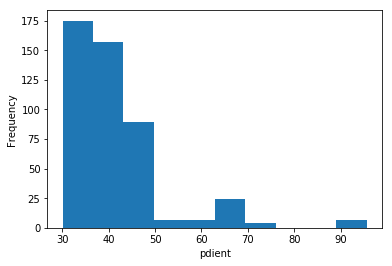

P01887	96	14	 Eukaryota	390


## Histograma pident homologos P01887

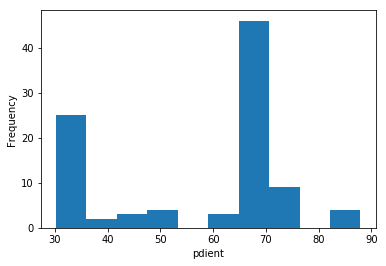

P17202	520	19	 Eukaryota	16


## Histograma pident homologos P17202

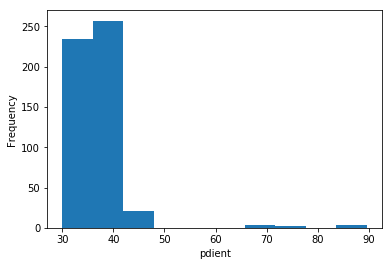

Q9HTJ1	555	19	 Bacteria	38


## Histograma pident homologos Q9HTJ1

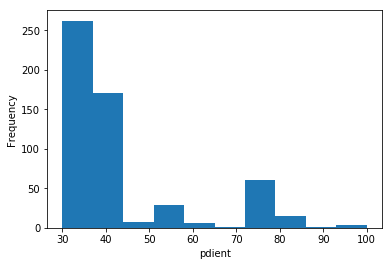

Q08638	191	12	 Bacteria	68


## Histograma pident homologos Q08638

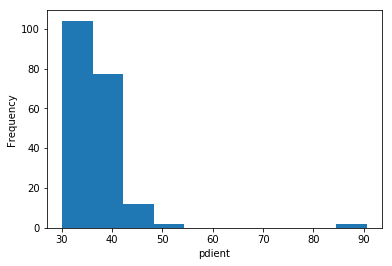

P22505	179	12	 Bacteria	5


## Histograma pident homologos P22505

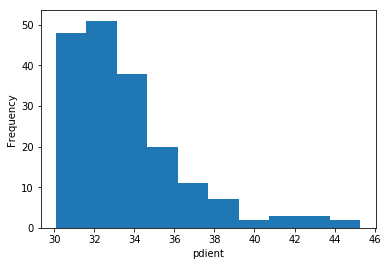

Q75I93	184	12	 Eukaryota	42


## Histograma pident homologos Q75I93

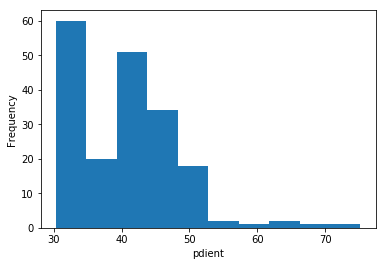

P16474	992	11	 Eukaryota	5


## Histograma pident homologos P16474

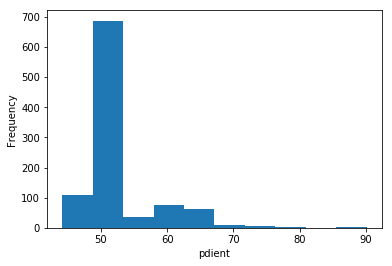

Q0KBP1	288	12	 Bacteria	18


## Histograma pident homologos Q0KBP1

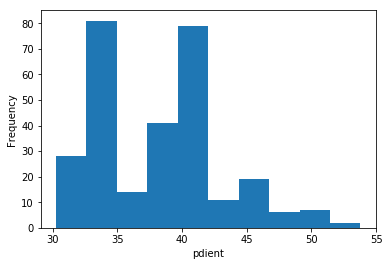

G3I8R9	995	11	 Eukaryota	6


## Histograma pident homologos G3I8R9

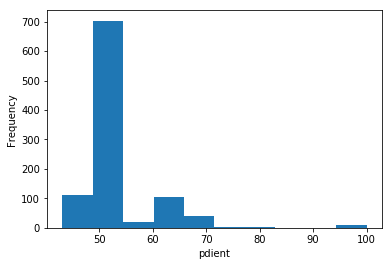

P07463	509	29	 Eukaryota	10


## Histograma pident homologos P07463

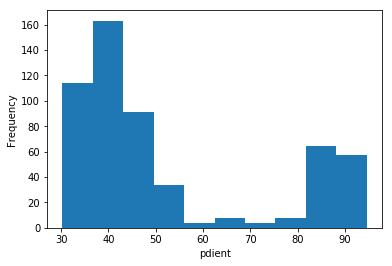

P24941	720	33	 Eukaryota	485


## Histograma pident homologos P24941

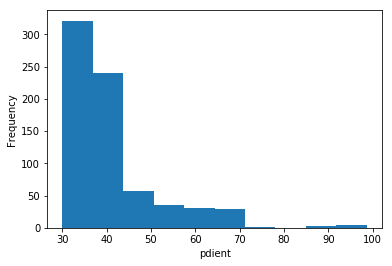

P00772	538	45	 Eukaryota	118


## Histograma pident homologos P00772

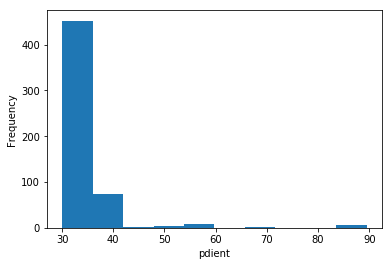

P60712	449	13	 Eukaryota	5


## Histograma pident homologos P60712

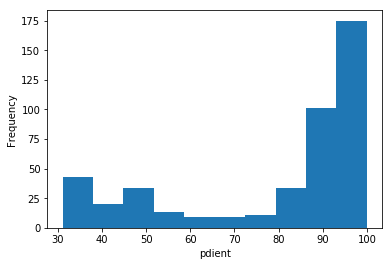

P77674	475	18	 Bacteria	8


## Histograma pident homologos P77674

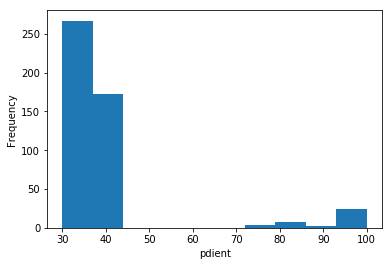

A7MB62	424	12	 Eukaryota	20


## Histograma pident homologos A7MB62

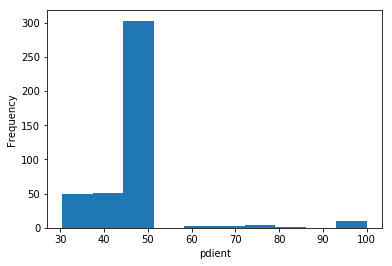

P21611	116	19	 Eukaryota	32


## Histograma pident homologos P21611

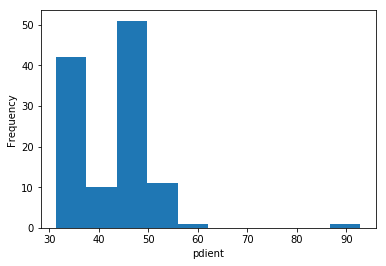

Q07717	106	16	 Eukaryota	8


## Histograma pident homologos Q07717

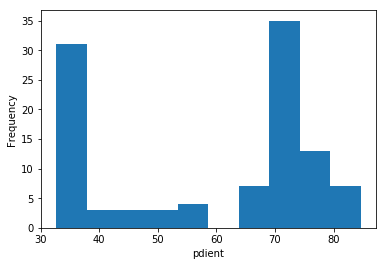

P19337	197	23	 Bacteria	5


## Histograma pident homologos P19337

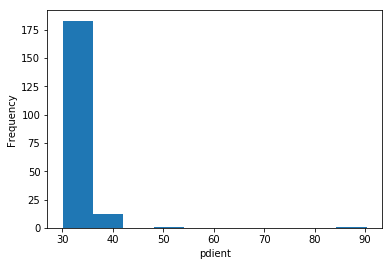

Q7XKV4	185	12	 Eukaryota	6


## Histograma pident homologos Q7XKV4

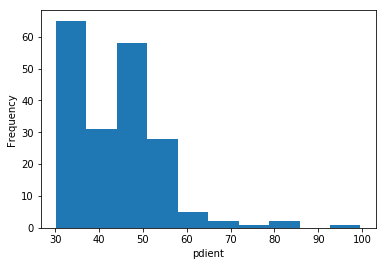

P22073	190	12	 Bacteria	14


## Histograma pident homologos P22073

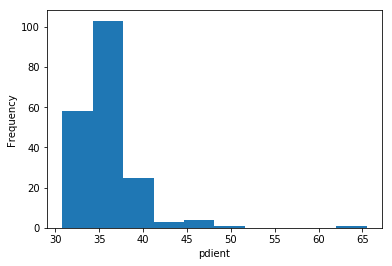

P11021	996	11	 Eukaryota	33


## Histograma pident homologos P11021

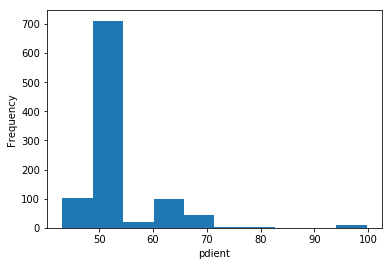

P0DP25	510	29	 Eukaryota	169


## Histograma pident homologos P0DP25

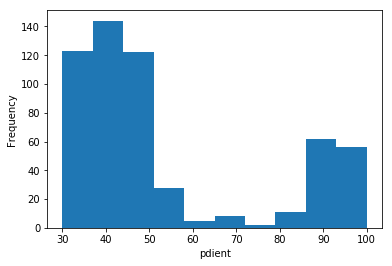

P08311	356	33	 Eukaryota	5


## Histograma pident homologos P08311

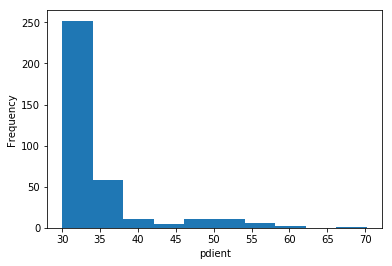

Q6V7J5	100	15	 Eukaryota	17


## Histograma pident homologos Q6V7J5

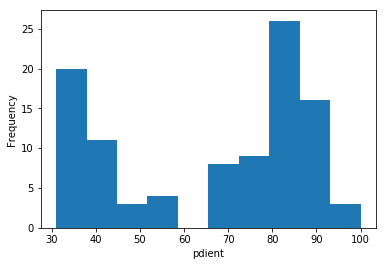

P01888	101	16	 Eukaryota	15


## Histograma pident homologos P01888

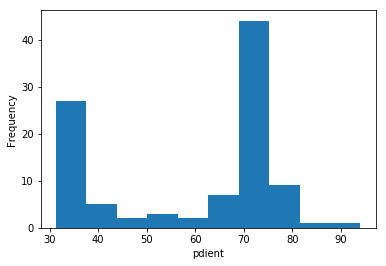

P39640	282	29	 Bacteria	8


## Histograma pident homologos P39640

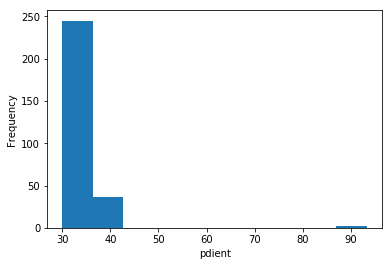

P39333	166	21	 Bacteria	12


## Histograma pident homologos P39333

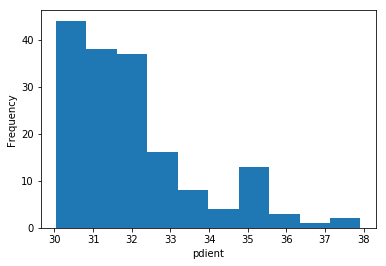

P53554	59	16	 Bacteria	12


## Histograma pident homologos P53554

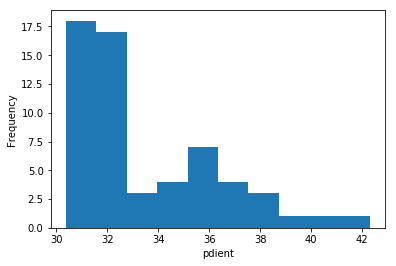

P0DP31	510	29	 Eukaryota	41


## Histograma pident homologos P0DP31

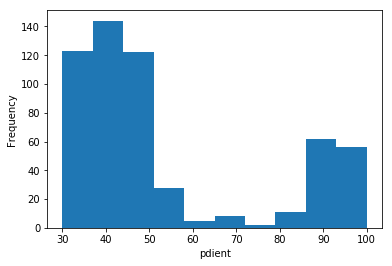

P50750	469	18	 Eukaryota	26


## Histograma pident homologos P50750

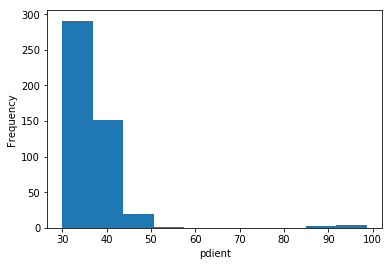

P07151	94	15	 Eukaryota	9


## Histograma pident homologos P07151

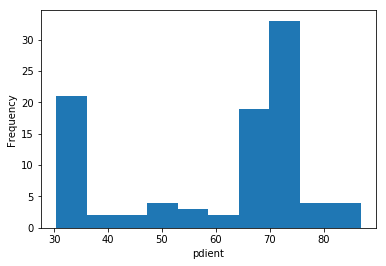

Q03506	191	12	 Bacteria	16


## Histograma pident homologos Q03506

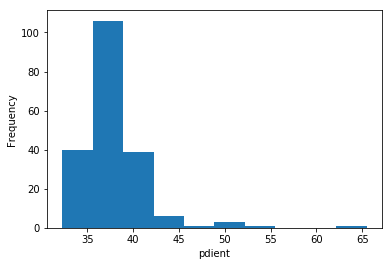

Q8L7J2	187	12	 Eukaryota	5


## Histograma pident homologos Q8L7J2

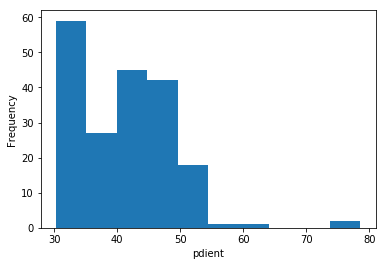

P55915	72	21	 Eukaryota	19


## Histograma pident homologos P55915

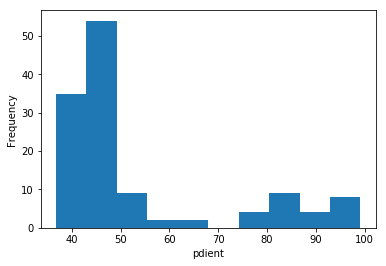

Q00535	609	26	 Eukaryota	12


## Histograma pident homologos Q00535

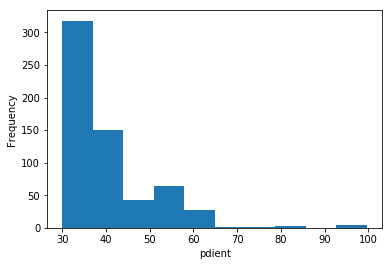

P01891	145	24	 Eukaryota	7


## Histograma pident homologos P01891

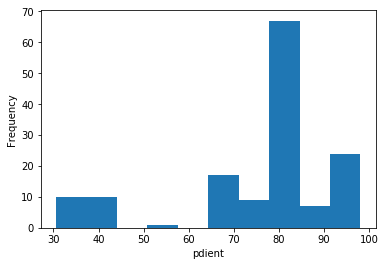

P81460	70	20	 Eukaryota	23


## Histograma pident homologos P81460

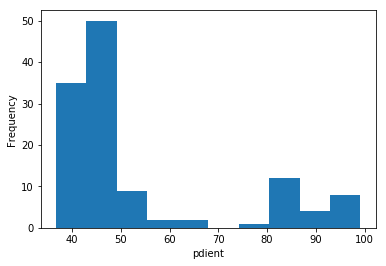

A0R4Q6	49	14	 Bacteria	13


## Histograma pident homologos A0R4Q6

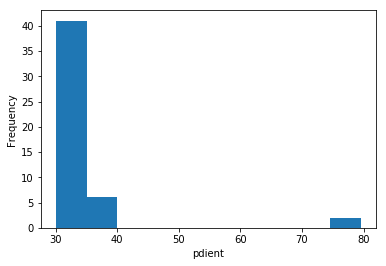

P68137	450	13	 Eukaryota	6


## Histograma pident homologos P68137

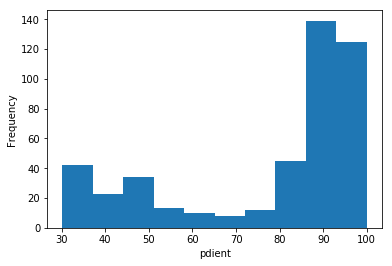

P61157	409	12	 Eukaryota	20


## Histograma pident homologos P61157

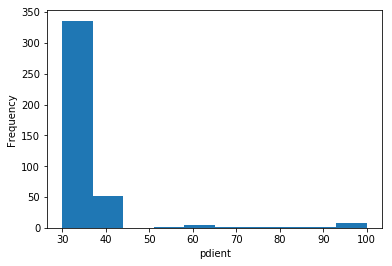

P0DP28	510	29	 Eukaryota	35


## Histograma pident homologos P0DP28

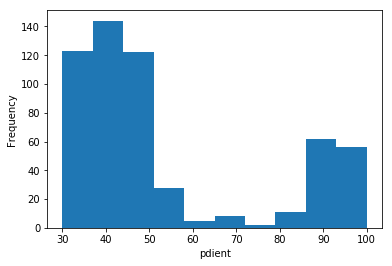

P51977	535	20	 Eukaryota	14


## Histograma pident homologos P51977

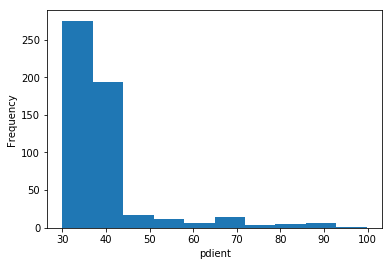

P9WPC2	759	19	 Bacteria	22


## Histograma pident homologos P9WPC2

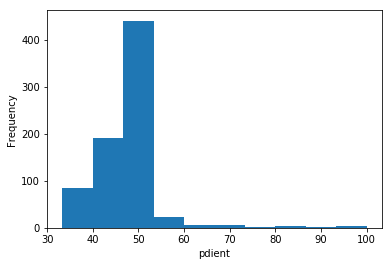

Q9NUI1	119	15	 Eukaryota	8


## Histograma pident homologos Q9NUI1

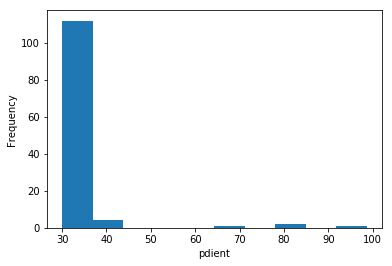

P56533	453	18	 Eukaryota	8


## Histograma pident homologos P56533

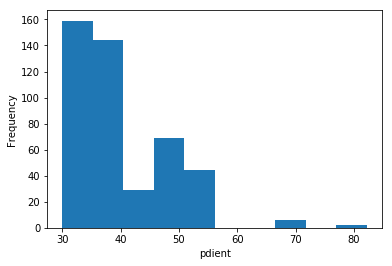

P06787	422	26	 Eukaryota	5


## Histograma pident homologos P06787

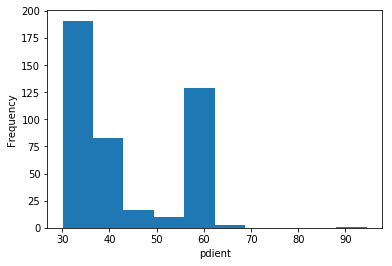

P32577	120	18	 Eukaryota	7


## Histograma pident homologos P32577

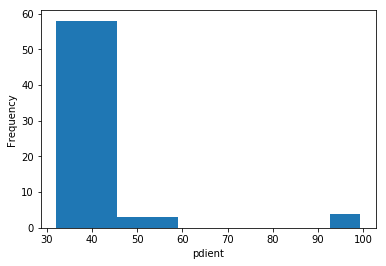

Q2G036	761	19	 Bacteria	105


## Histograma pident homologos Q2G036

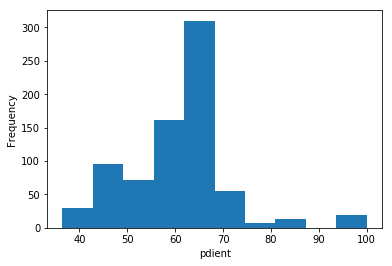

P0DP29	510	29	 Eukaryota	11


## Histograma pident homologos P0DP29

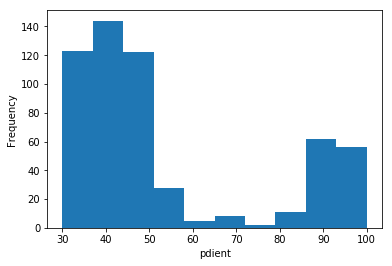

P00746	472	43	 Eukaryota	65


## Histograma pident homologos P00746

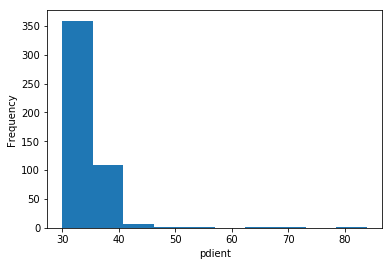

P40302	128	16	 Eukaryota	494


## Histograma pident homologos P40302

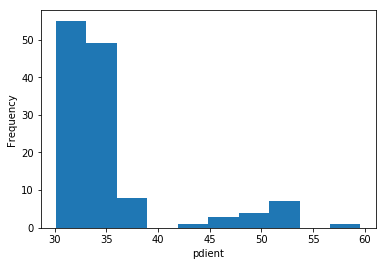

P00760	679	53	 Eukaryota	515


## Histograma pident homologos P00760

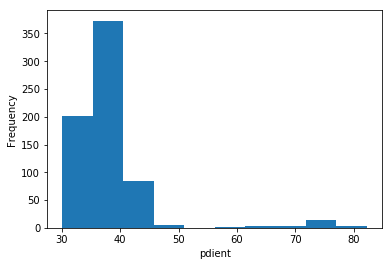

Q9RUV2	208	15	 Bacteria	14


## Histograma pident homologos Q9RUV2

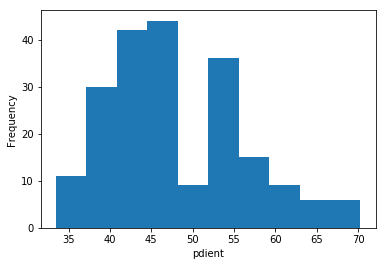

P25311	146	24	 Eukaryota	11


## Histograma pident homologos P25311

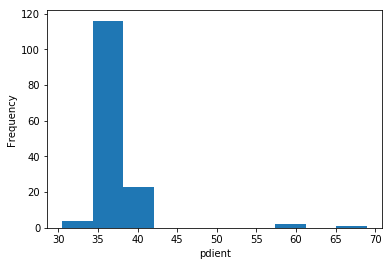

P15445	418	20	 Eukaryota	9


## Histograma pident homologos P15445

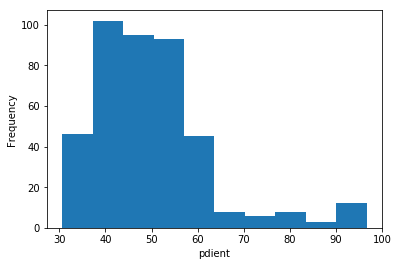

P60045	407	19	 Eukaryota	15


## Histograma pident homologos P60045

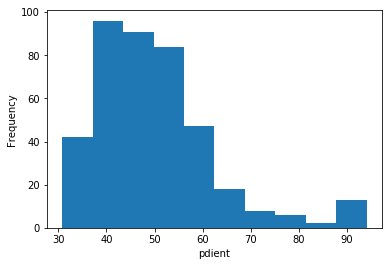

P07097	290	12	 Bacteria	88


## Histograma pident homologos P07097

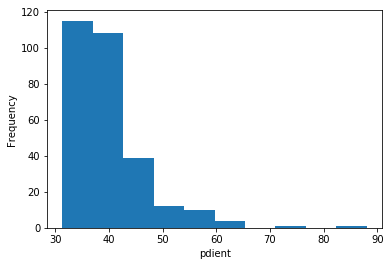

P22217	182	13	 Eukaryota	6


## Histograma pident homologos P22217

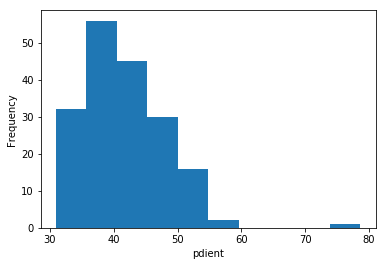

Q58576	111	13	 Archaea	15


## Histograma pident homologos Q58576

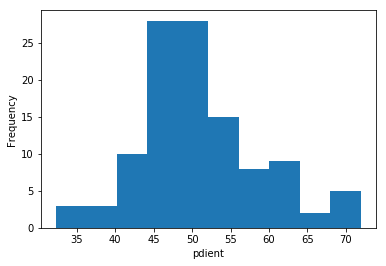

O87605	64	12	 Bacteria	43


## Histograma pident homologos O87605

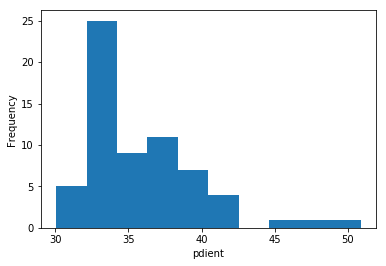

P23297	71	16	 Eukaryota	21


## Histograma pident homologos P23297

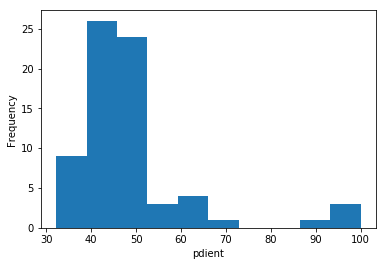

Q07412	612	14	 Eukaryota	67


## Histograma pident homologos Q07412

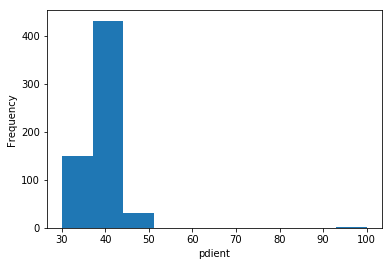

Q8WTR7	838	11	 Eukaryota	14


## Histograma pident homologos Q8WTR7

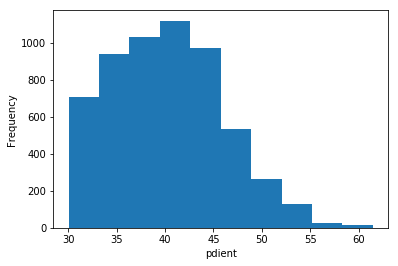

P32939	590	23	 Eukaryota	8


## Histograma pident homologos P32939

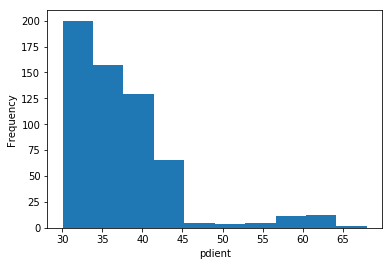

Q9NZL3	928	14	 Eukaryota	16


## Histograma pident homologos Q9NZL3

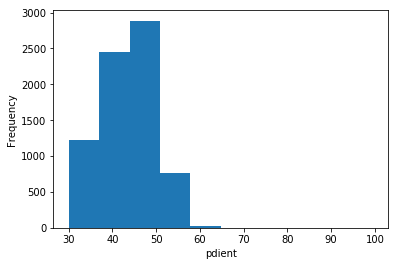

Q04JH4	609	14	 Bacteria	8


## Histograma pident homologos Q04JH4

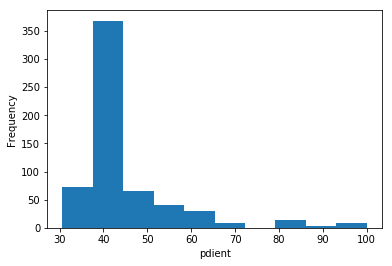

Q04120	100	13	 Eukaryota	11


## Histograma pident homologos Q04120

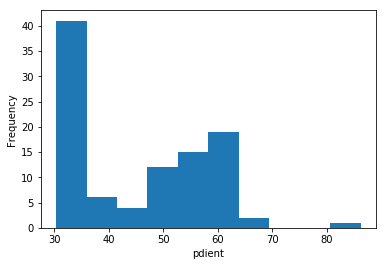

P22803	189	12	 Eukaryota	5


## Histograma pident homologos P22803

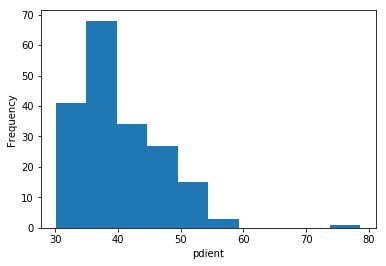

P18868	211	15	 Archaea	6


## Histograma pident homologos P18868

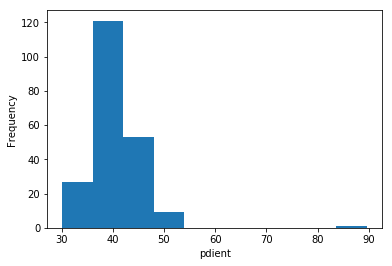

P9WGE7	208	15	 Bacteria	22


## Histograma pident homologos P9WGE7

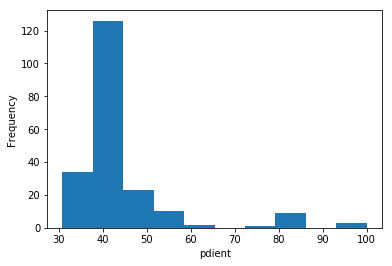

Q9V429	143	13	 Eukaryota	13


## Histograma pident homologos Q9V429

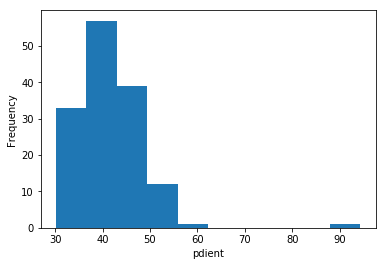

P63279	168	12	 Eukaryota	29


## Histograma pident homologos P63279

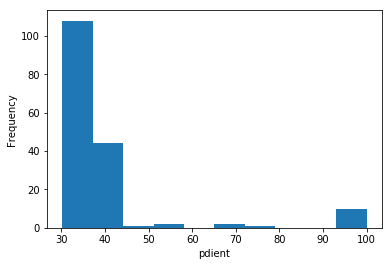

P62837	247	14	 Eukaryota	62


## Histograma pident homologos P62837

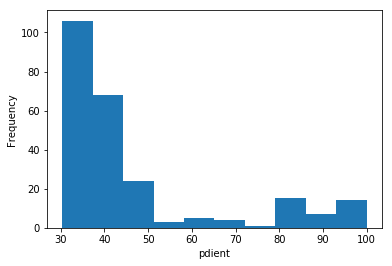

P0CG64	165	17	 Eukaryota	6


## Histograma pident homologos P0CG64

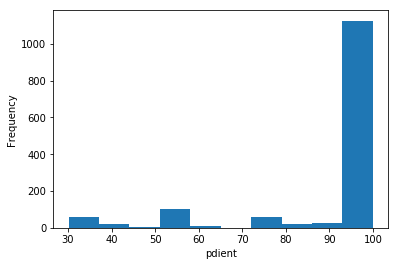

P0CG50	164	17	 Eukaryota	20


## Histograma pident homologos P0CG50

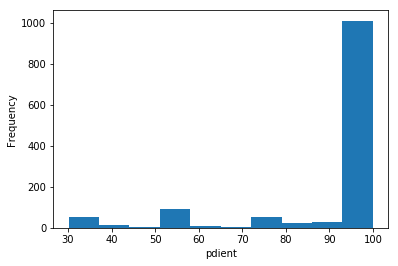

Q13509	410	11	 Eukaryota	8


## Histograma pident homologos Q13509

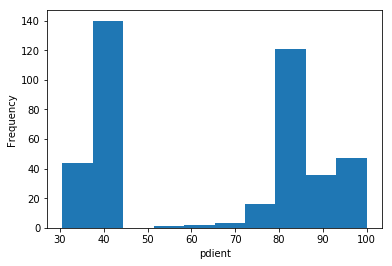

P02557	409	11	 Eukaryota	5


## Histograma pident homologos P02557

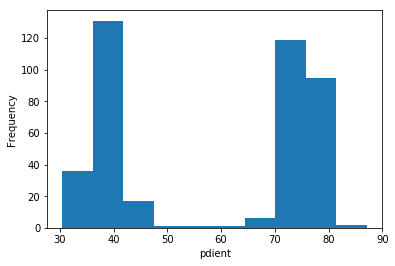

P05087	103	23	 Eukaryota	8


## Histograma pident homologos P05087

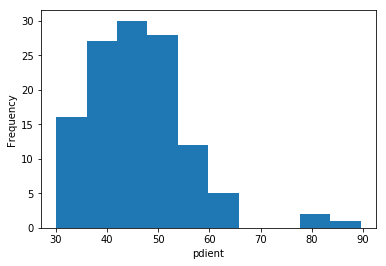

P48499	612	14	 Eukaryota	8


## Histograma pident homologos P48499

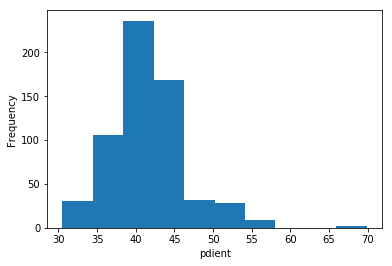

P35049	425	43	 Eukaryota	17


## Histograma pident homologos P35049

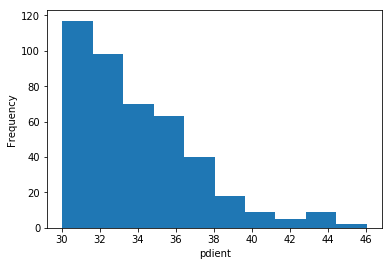

P53141	221	18	 Eukaryota	6


## Histograma pident homologos P53141

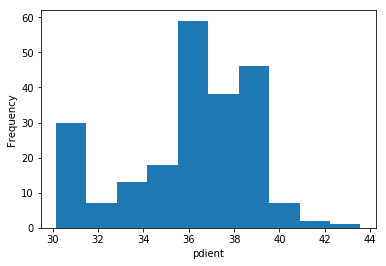

O42187	344	17	 Eukaryota	14


## Histograma pident homologos O42187

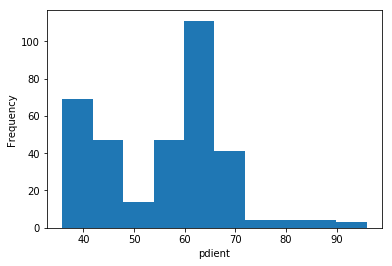

O58677	692	11	 Archaea	10


## Histograma pident homologos O58677

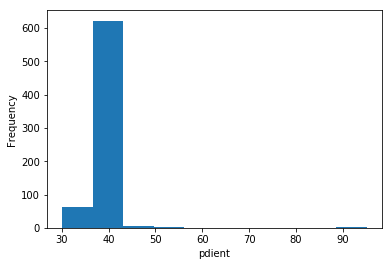

P11233	566	26	 Eukaryota	9


## Histograma pident homologos P11233

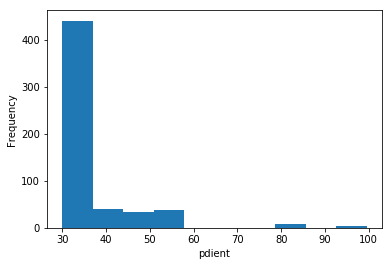

P10826	67	11	 Eukaryota	13


## Histograma pident homologos P10826

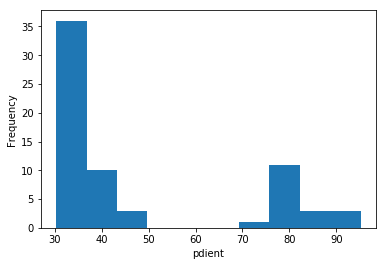

P61088	209	12	 Eukaryota	63


## Histograma pident homologos P61088

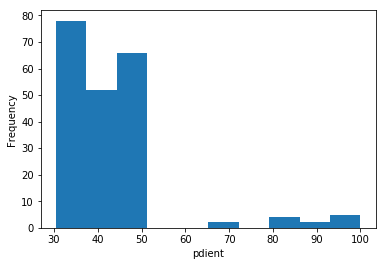

P0CG48	165	17	 Eukaryota	379


## Histograma pident homologos P0CG48

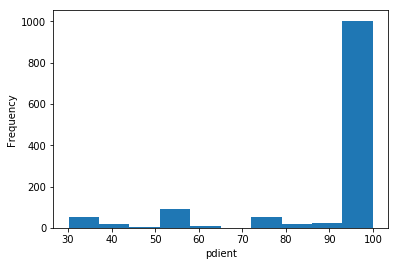

Q12634	124	16	 Eukaryota	10


## Histograma pident homologos Q12634

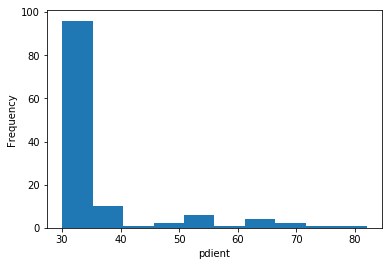

P00775	335	32	 Bacteria	8


## Histograma pident homologos P00775

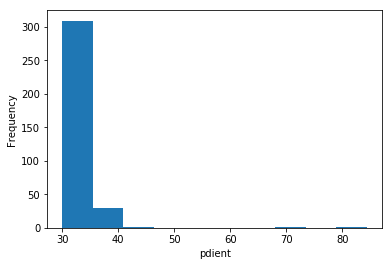

P0AGD3	208	15	 Bacteria	16


## Histograma pident homologos P0AGD3

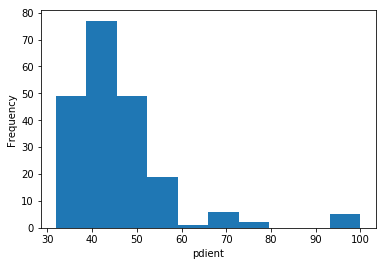

P00942	607	14	 Eukaryota	16


## Histograma pident homologos P00942

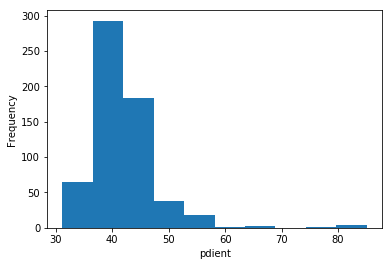

P04631	64	17	 Eukaryota	14


## Histograma pident homologos P04631

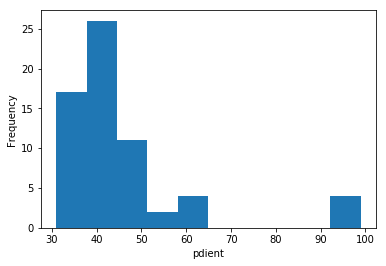

P00939	603	14	 Eukaryota	12


## Histograma pident homologos P00939

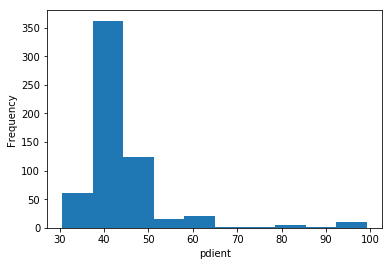

P00761	681	52	 Eukaryota	58


## Histograma pident homologos P00761

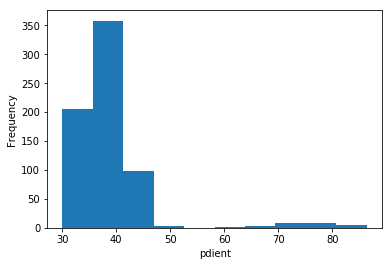

P0CS12	393	15	 Eukaryota	8


## Histograma pident homologos P0CS12

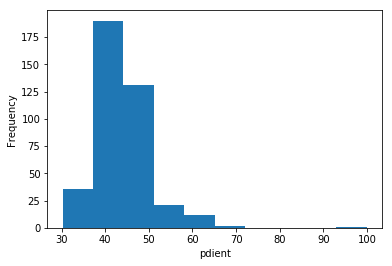

O73790	141	11	 Eukaryota	9


## Histograma pident homologos O73790

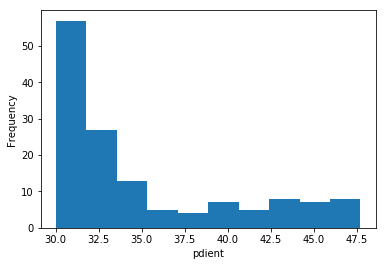

P80579	178	13	 Bacteria	14


## Histograma pident homologos P80579

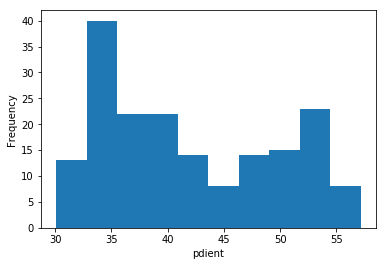

P27796	197	12	 Eukaryota	5


## Histograma pident homologos P27796

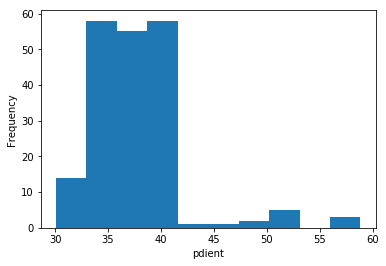

Q6GIL6	613	14	 Bacteria	11


## Histograma pident homologos Q6GIL6

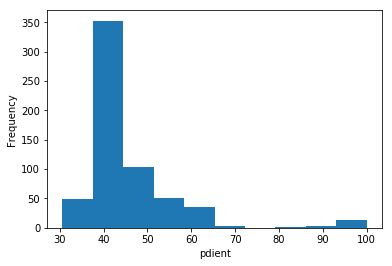

P02554	410	11	 Eukaryota	149


## Histograma pident homologos P02554

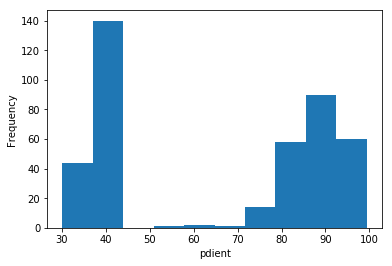

P36186	607	14	 Eukaryota	46


## Histograma pident homologos P36186

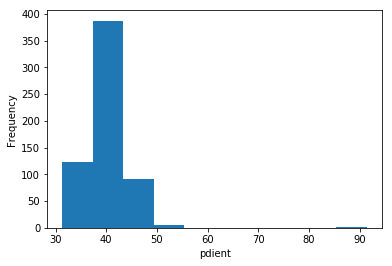

P52270	616	14	 Eukaryota	15


## Histograma pident homologos P52270

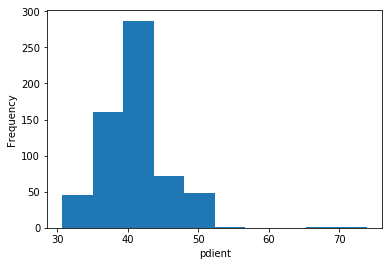

Q7KQL8	196	15	 Eukaryota	20


## Histograma pident homologos Q7KQL8

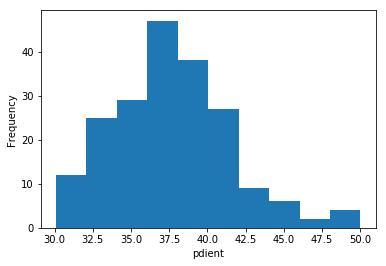

P00940	608	14	 Eukaryota	34


## Histograma pident homologos P00940

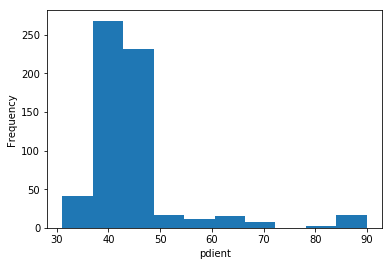

P0A858	606	14	 Bacteria	6


## Histograma pident homologos P0A858

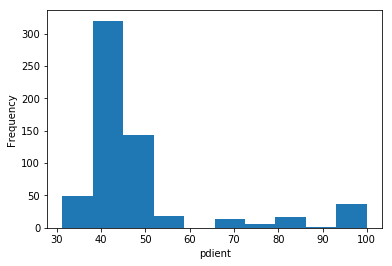

P60174	603	14	 Eukaryota	36


## Histograma pident homologos P60174

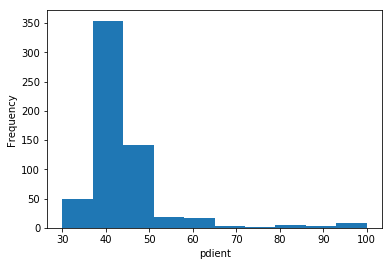

P02207	161	12	 Eukaryota	12


## Histograma pident homologos P02207

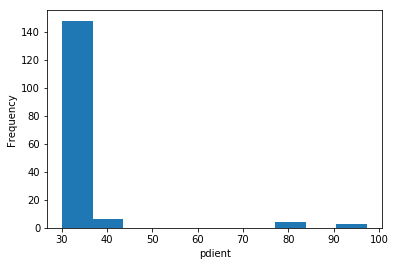

P08631	95	14	 Eukaryota	66


## Histograma pident homologos P08631

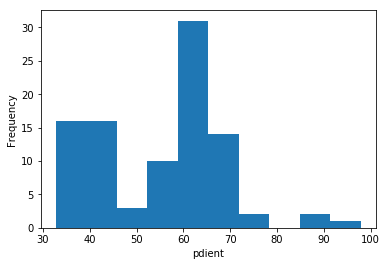

P0DJD7	143	11	 Eukaryota	5


## Histograma pident homologos P0DJD7

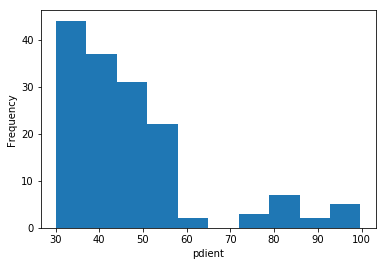

P62195	137	16	 Eukaryota	21


## Histograma pident homologos P62195

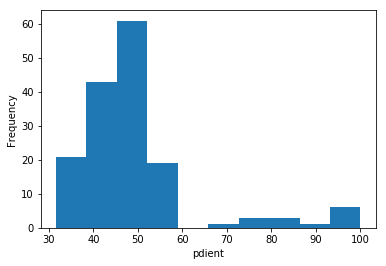

Q9QUM9	144	14	 Eukaryota	12


## Histograma pident homologos Q9QUM9

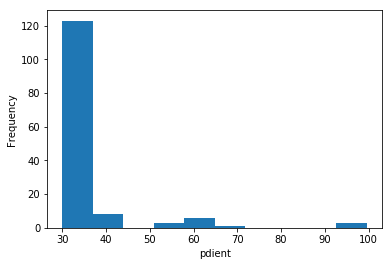

P33298	105	13	 Eukaryota	14


## Histograma pident homologos P33298

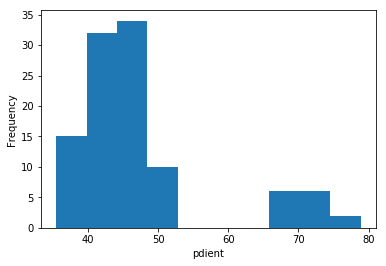

O75832	270	18	 Eukaryota	14


## Histograma pident homologos O75832

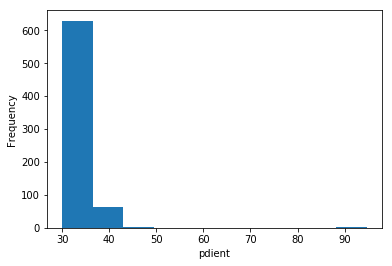

Q9Z2X2	227	16	 Eukaryota	5


## Histograma pident homologos Q9Z2X2

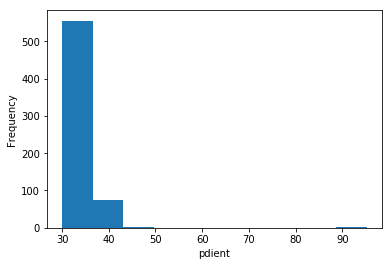

Q58634	213	11	 Archaea	14


## Histograma pident homologos Q58634

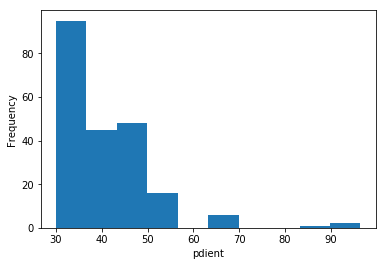

P66038	573	12	 Bacteria	30


## Histograma pident homologos P66038

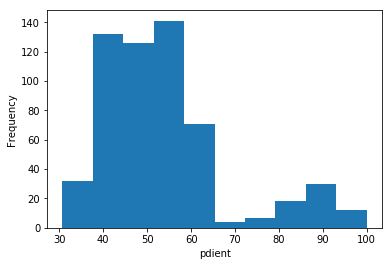

P59071	388	20	 Eukaryota	65


## Histograma pident homologos P59071

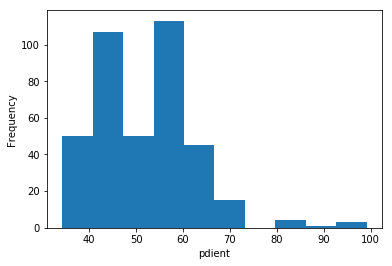

P23638	155	19	 Eukaryota	494


## Histograma pident homologos P23638

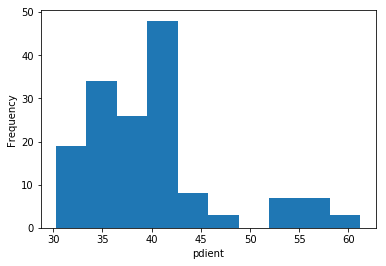

P60763	271	14	 Eukaryota	14


## Histograma pident homologos P60763

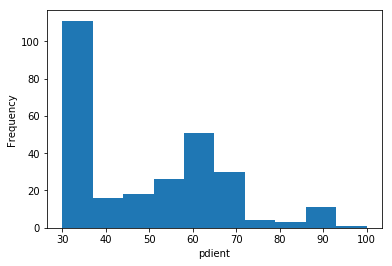

P00877	664	11	 Eukaryota	111


## Histograma pident homologos P00877

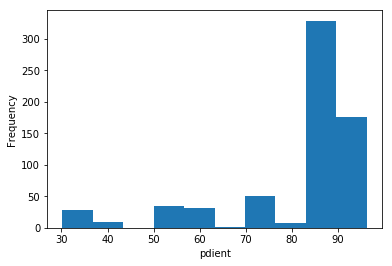

P00592	357	17	 Eukaryota	42


## Histograma pident homologos P00592

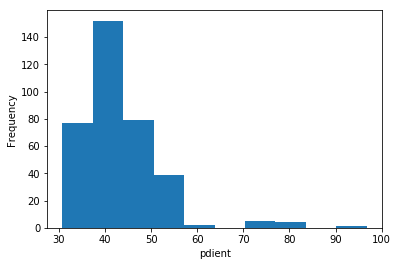

Q9Z2U1	167	20	 Eukaryota	12


## Histograma pident homologos Q9Z2U1

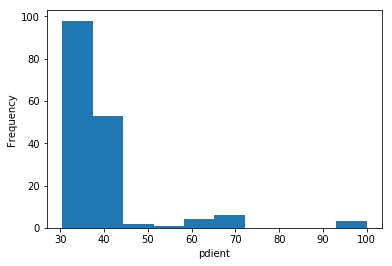

P43686	115	13	 Eukaryota	20


## Histograma pident homologos P43686

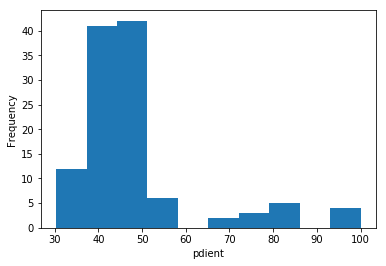

P49722	170	23	 Eukaryota	12


## Histograma pident homologos P49722

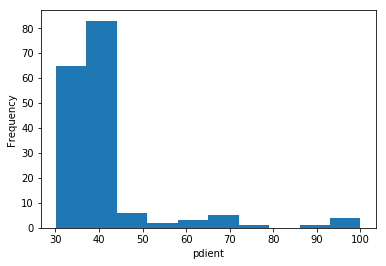

P13543	201	15	 Eukaryota	19


## Histograma pident homologos P13543

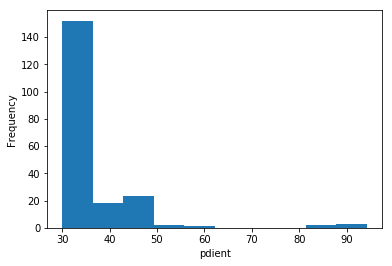

P11998	577	11	 Bacteria	40


## Histograma pident homologos P11998

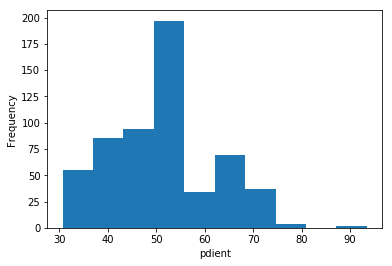

Q13882	123	19	 Eukaryota	14


## Histograma pident homologos Q13882

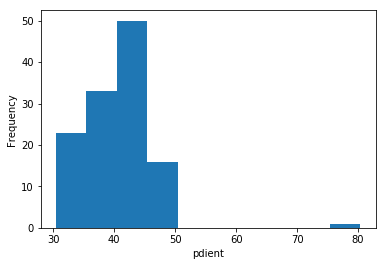

Q9UL25	372	22	 Eukaryota	10


## Histograma pident homologos Q9UL25

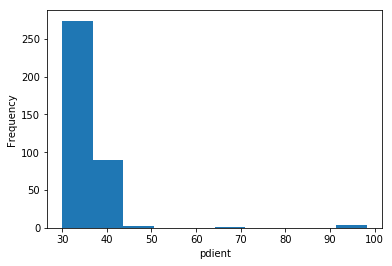

Q62636	627	29	 Eukaryota	5


## Histograma pident homologos Q62636

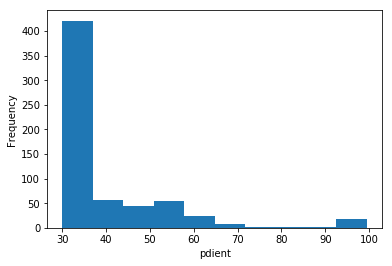

P61227	647	33	 Eukaryota	8


## Histograma pident homologos P61227

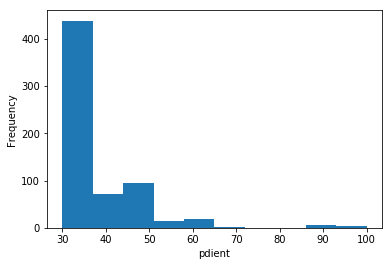

Q63570	115	13	 Eukaryota	6


## Histograma pident homologos Q63570

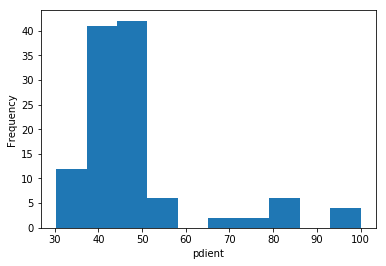

P15531	738	19	 Eukaryota	26


## Histograma pident homologos P15531

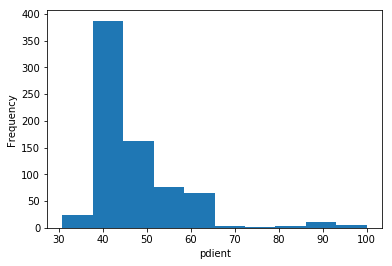

Q5SLV5	744	19	 Bacteria	6


## Histograma pident homologos Q5SLV5

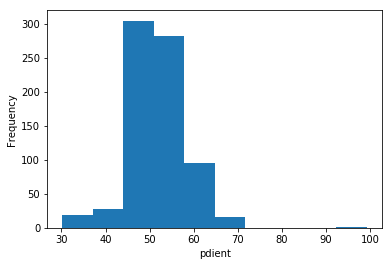

P62834	628	28	 Eukaryota	5


## Histograma pident homologos P62834

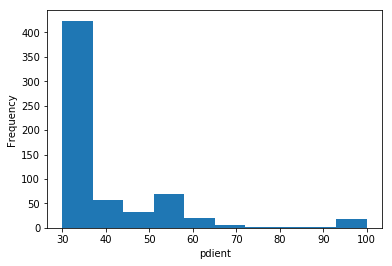

P39207	739	19	 Eukaryota	6


## Histograma pident homologos P39207

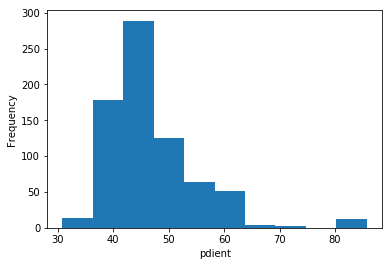

Q06830	133	16	 Eukaryota	10


## Histograma pident homologos Q06830

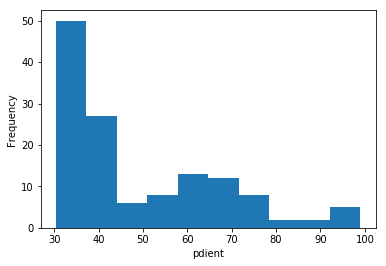

P0C512	668	11	 Eukaryota	12


## Histograma pident homologos P0C512

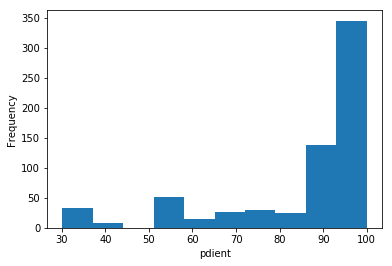

P60524	806	26	 Eukaryota	7


## Histograma pident homologos P60524

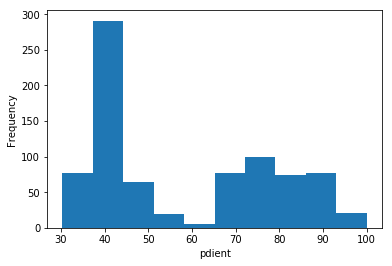

P02008	810	29	 Eukaryota	5


## Histograma pident homologos P02008

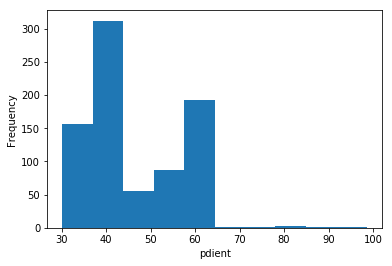

P01709	120	12	 Eukaryota	23


## Histograma pident homologos P01709

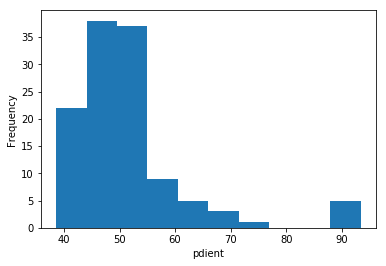

Q9I834	335	20	 Eukaryota	6


## Histograma pident homologos Q9I834

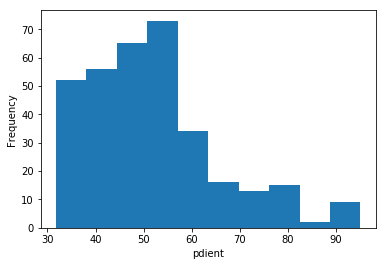

Q9SPP9	181	12	 Eukaryota	16


## Histograma pident homologos Q9SPP9

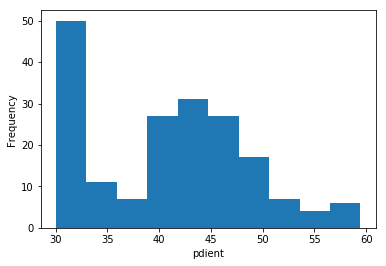

P49235	183	12	 Eukaryota	18


## Histograma pident homologos P49235

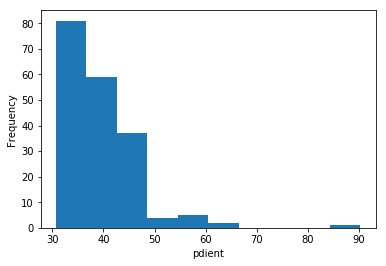

P02870	93	23	 Eukaryota	12


## Histograma pident homologos P02870

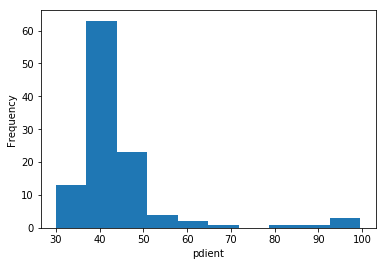

Q27743	475	13	 Eukaryota	16


## Histograma pident homologos Q27743

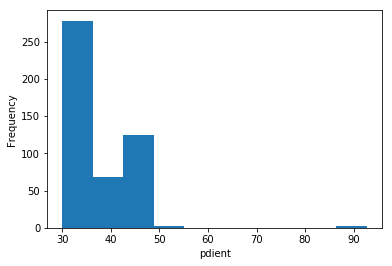

Q6N0W9	630	11	 Bacteria	80


## Histograma pident homologos Q6N0W9

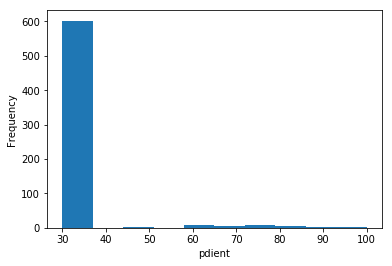

P28066	167	20	 Eukaryota	39


## Histograma pident homologos P28066

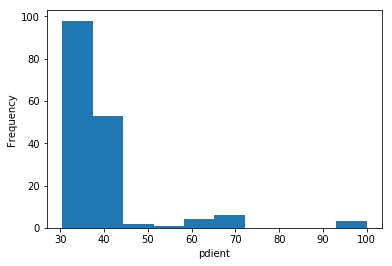

P62333	129	14	 Eukaryota	15


## Histograma pident homologos P62333

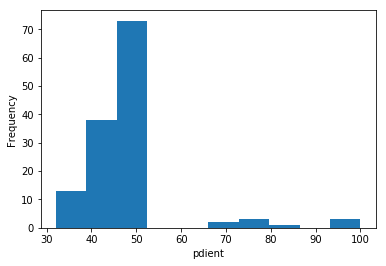

Q9R1P4	132	16	 Eukaryota	12


## Histograma pident homologos Q9R1P4

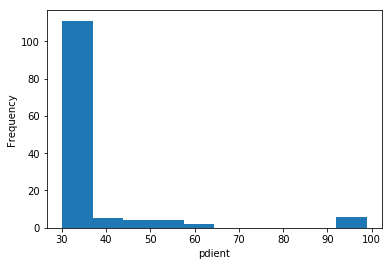

P32379	158	20	 Eukaryota	496


## Histograma pident homologos P32379

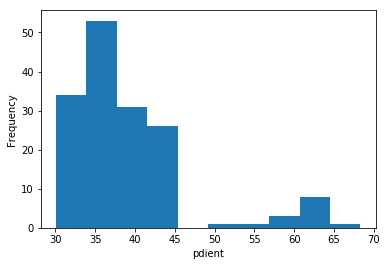

Q15382	578	25	 Eukaryota	18


## Histograma pident homologos Q15382

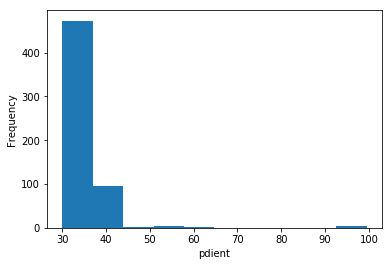

P25156	175	21	 Archaea	133


## Histograma pident homologos P25156

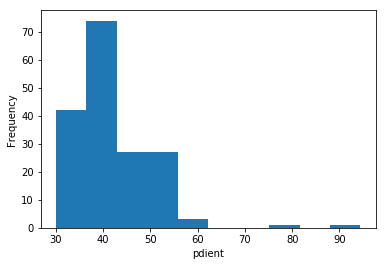

P28061	184	12	 Archaea	147


## Histograma pident homologos P28061

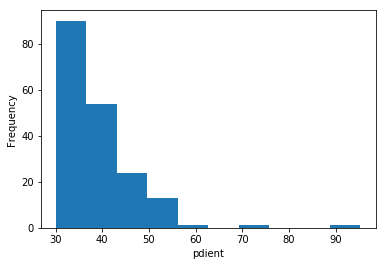

P30481	146	24	 Eukaryota	25


## Histograma pident homologos P30481

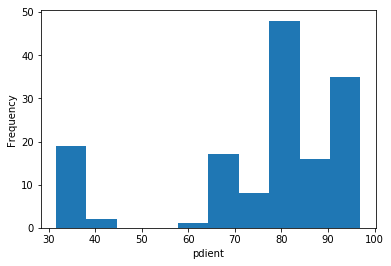

P01864	24	13	 Eukaryota	13


## Histograma pident homologos P01864

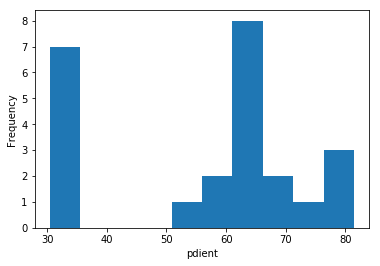

Q9H227	182	12	 Eukaryota	5


## Histograma pident homologos Q9H227

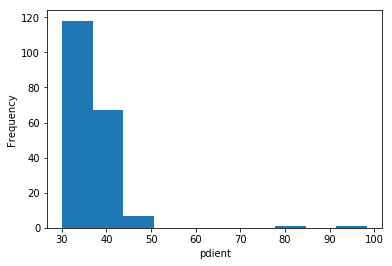

Q9R1P0	153	18	 Eukaryota	12


## Histograma pident homologos Q9R1P0

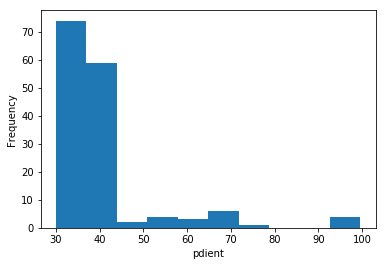

P25786	129	16	 Eukaryota	39


## Histograma pident homologos P25786

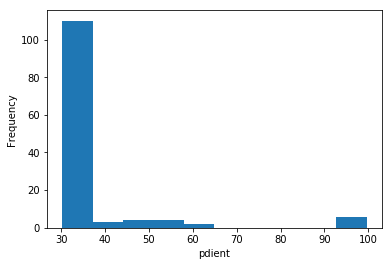

P25789	151	17	 Eukaryota	39


## Histograma pident homologos P25789

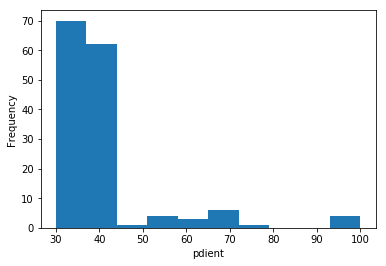

P23639	161	19	 Eukaryota	494


## Histograma pident homologos P23639

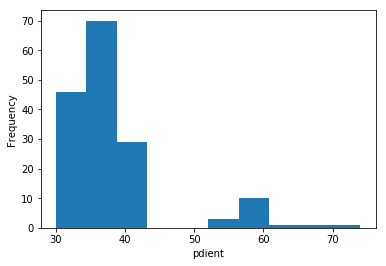

O29760	168	21	 Archaea	14


## Histograma pident homologos O29760

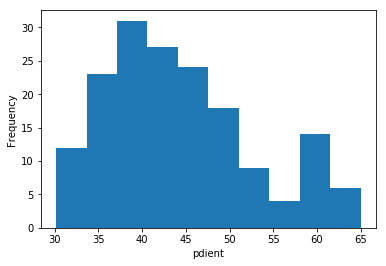

Q6UWY2	314	33	 Eukaryota	6


## Histograma pident homologos Q6UWY2

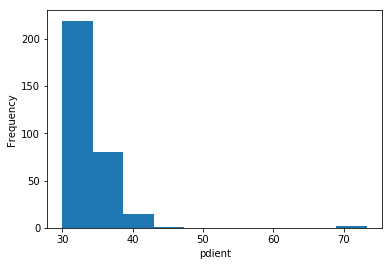

Q60177	202	23	 Archaea	14


## Histograma pident homologos Q60177

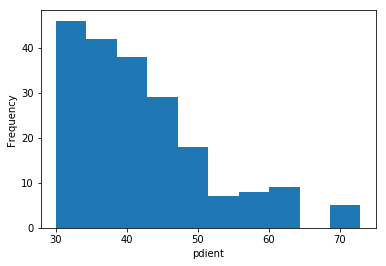

O66529	579	11	 Bacteria	85


## Histograma pident homologos O66529

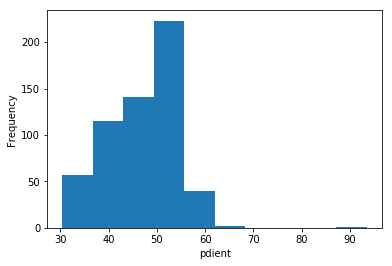

Q9P996	223	14	 Archaea	7


## Histograma pident homologos Q9P996

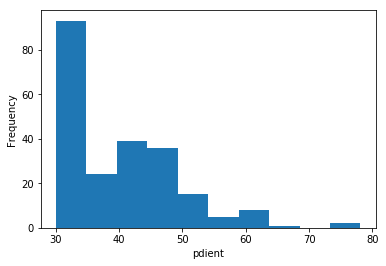

B5BDB5	573	12	 Bacteria	60


## Histograma pident homologos B5BDB5

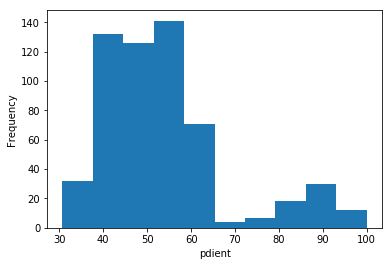

P84229	175	14	 Eukaryota	8


## Histograma pident homologos P84229

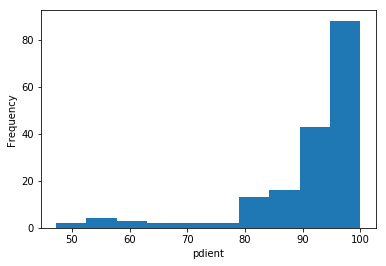

B8ZUN3	546	11	 Bacteria	5


## Histograma pident homologos B8ZUN3

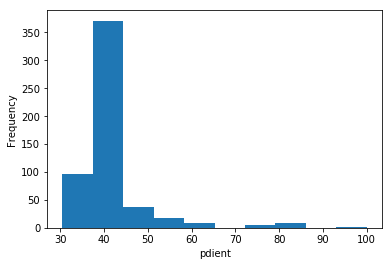

Q1CT76	762	19	 Bacteria	12


## Histograma pident homologos Q1CT76

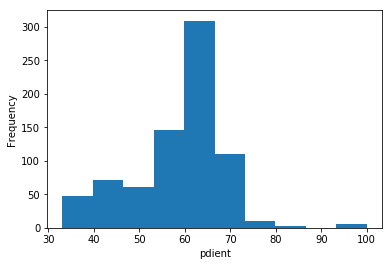

Q9ZTA9	91	23	 Eukaryota	8


## Histograma pident homologos Q9ZTA9

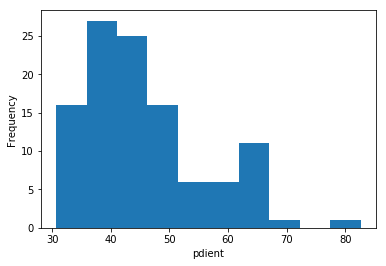

P80040	526	15	 Bacteria	18


## Histograma pident homologos P80040

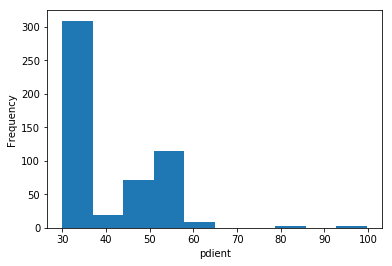

P32119	131	16	 Eukaryota	40


## Histograma pident homologos P32119

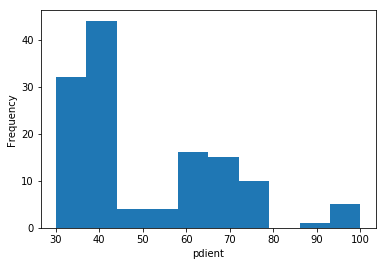

O14818	165	22	 Eukaryota	39


## Histograma pident homologos O14818

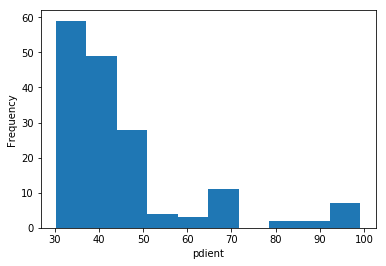

P01899	146	24	 Eukaryota	150


## Histograma pident homologos P01899

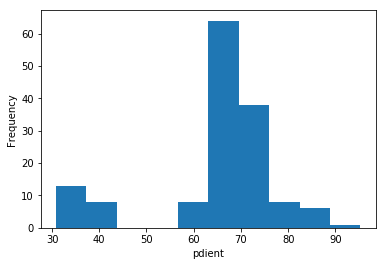

P13747	149	25	 Eukaryota	22


## Histograma pident homologos P13747

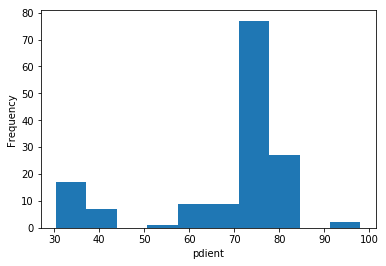

P01843	53	19	 Eukaryota	5


## Histograma pident homologos P01843

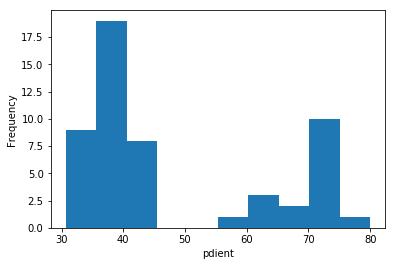

P86993	75	16	 Eukaryota	24


## Histograma pident homologos P86993

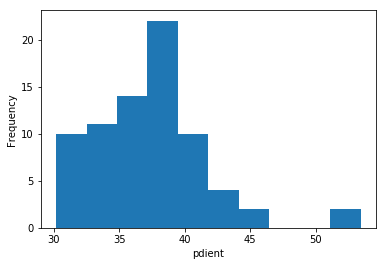

Q9LBG2	265	25	 Bacteria	8


## Histograma pident homologos Q9LBG2

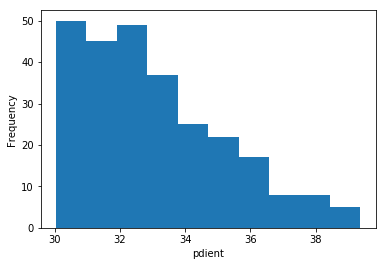

Q5SHH5	481	13	 Bacteria	6


## Histograma pident homologos Q5SHH5

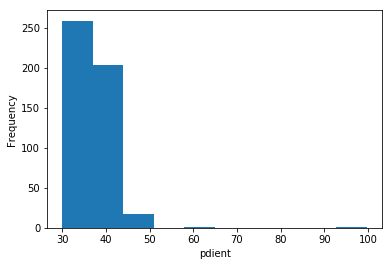

Q63716	132	16	 Eukaryota	12


## Histograma pident homologos Q63716

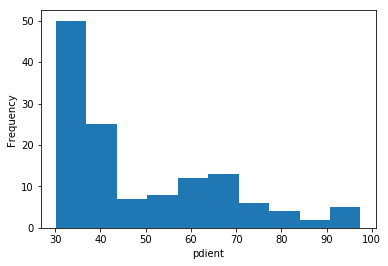

Q9Z2U0	169	22	 Eukaryota	12


## Histograma pident homologos Q9Z2U0

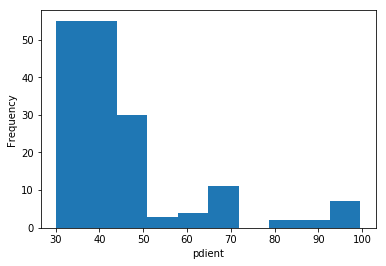

P60900	144	14	 Eukaryota	39


## Histograma pident homologos P60900

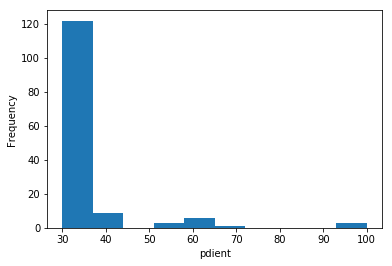

P07291	229	20	 Eukaryota	19


## Histograma pident homologos P07291

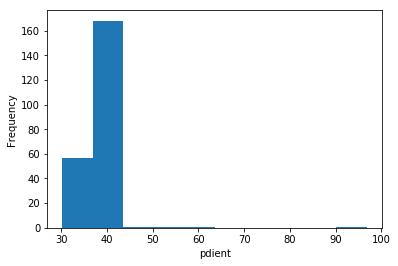

P05088	102	23	 Eukaryota	11


## Histograma pident homologos P05088

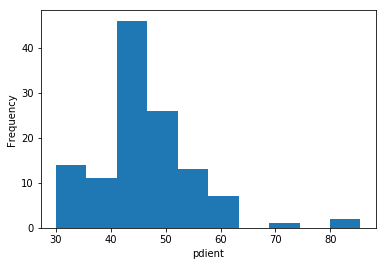

P84228	175	14	 Eukaryota	17


## Histograma pident homologos P84228

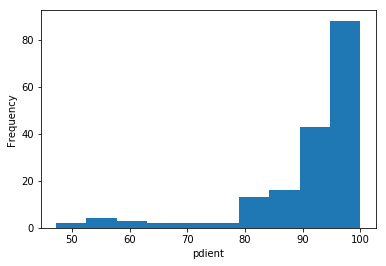

P84243	174	14	 Eukaryota	66


## Histograma pident homologos P84243

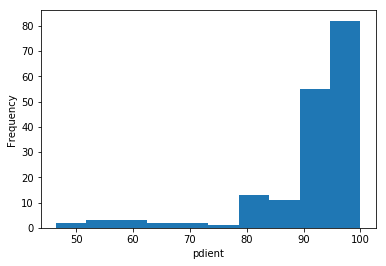

P45720	792	26	 Eukaryota	9


## Histograma pident homologos P45720

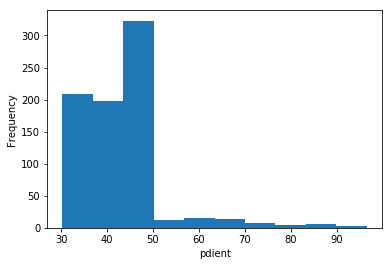

P14421	391	21	 Eukaryota	14


## Histograma pident homologos P14421

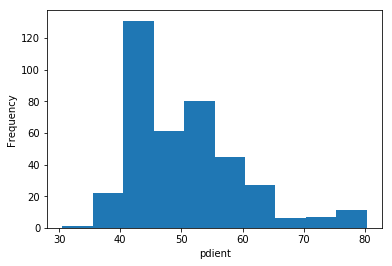

P02067	822	26	 Eukaryota	8


## Histograma pident homologos P02067

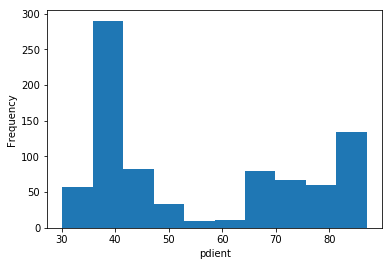

P28241	315	11	 Eukaryota	13


## Histograma pident homologos P28241

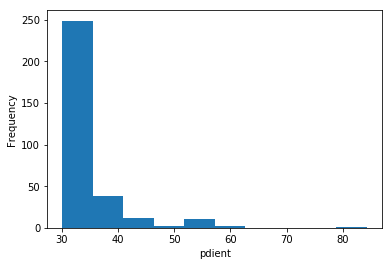

P01635	153	16	 Eukaryota	14


## Histograma pident homologos P01635

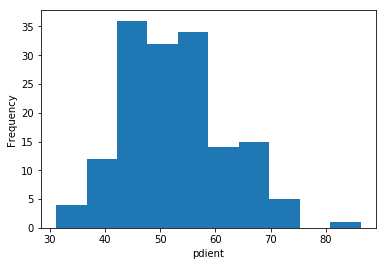

Q29963	148	25	 Eukaryota	7


## Histograma pident homologos Q29963

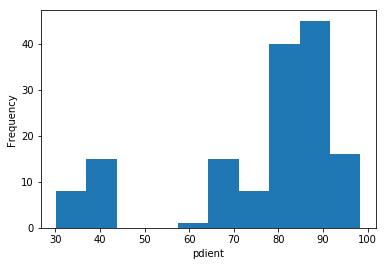

P56649	361	16	 Eukaryota	14


## Histograma pident homologos P56649

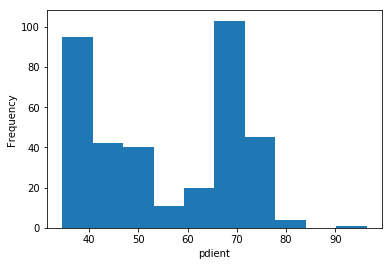

P01593	150	16	 Eukaryota	16


## Histograma pident homologos P01593

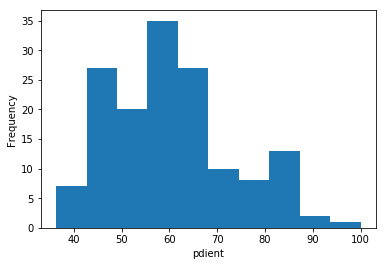

Q07785	695	31	 Eukaryota	8


## Histograma pident homologos Q07785

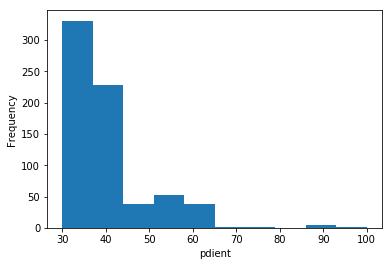

Q95460	147	24	 Eukaryota	60


## Histograma pident homologos Q95460

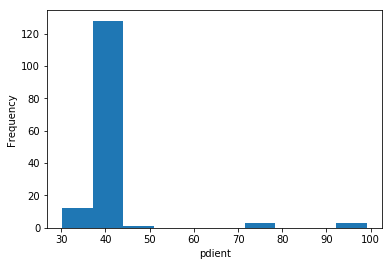

P01727	131	14	 Eukaryota	5


## Histograma pident homologos P01727

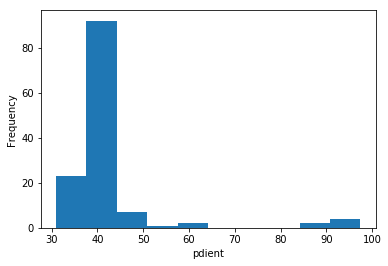

P0A9B2	361	16	 Bacteria	20


## Histograma pident homologos P0A9B2

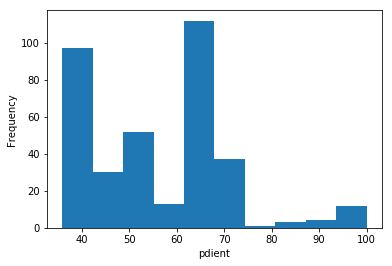

Q6NXT2	174	13	 Eukaryota	6


## Histograma pident homologos Q6NXT2

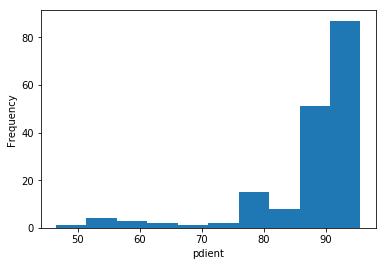

P60706	449	13	 Eukaryota	12


## Histograma pident homologos P60706

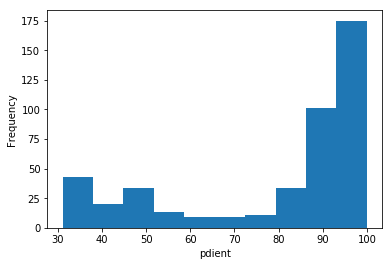

P19992	301	33	 Bacteria	8


## Histograma pident homologos P19992

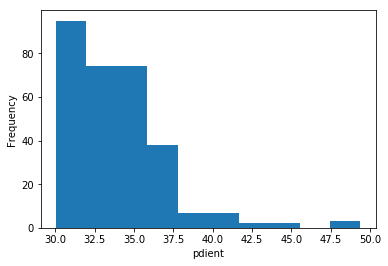

P01619	155	15	 Eukaryota	7


## Histograma pident homologos P01619

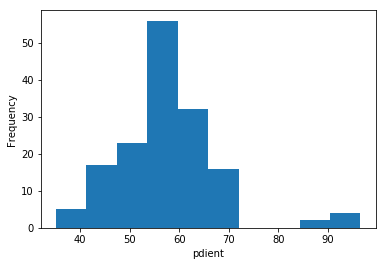

P05534	147	24	 Eukaryota	46


## Histograma pident homologos P05534

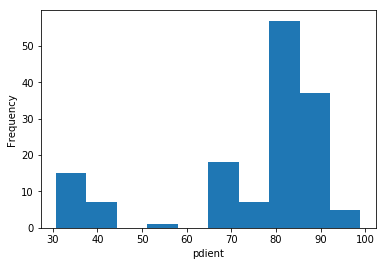

Q00534	576	23	 Eukaryota	19


## Histograma pident homologos Q00534

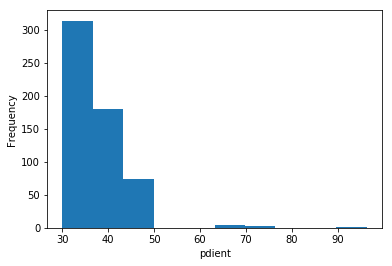

Q9JZ38	762	19	 Bacteria	28


## Histograma pident homologos Q9JZ38

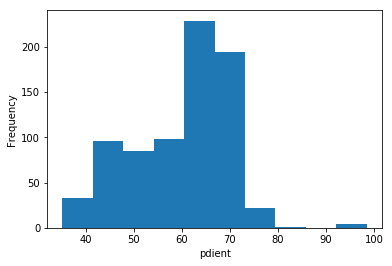

P06239	99	15	 Eukaryota	63


## Histograma pident homologos P06239

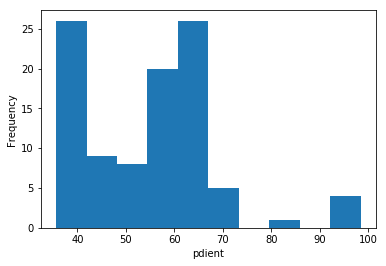

P81637	70	21	 Eukaryota	5


## Histograma pident homologos P81637

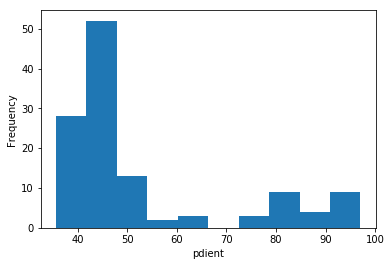

P04642	462	13	 Eukaryota	56


## Histograma pident homologos P04642

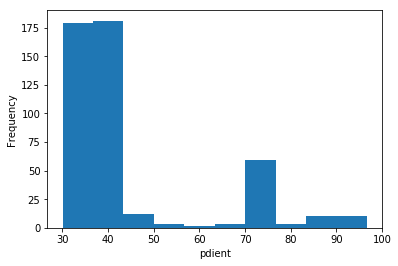

P05091	465	16	 Eukaryota	220


## Histograma pident homologos P05091

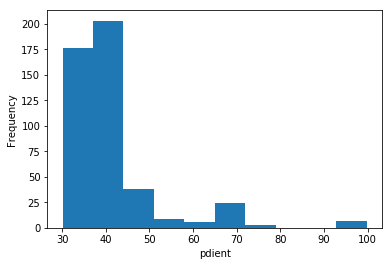

P61830	174	14	 Eukaryota	22


## Histograma pident homologos P61830

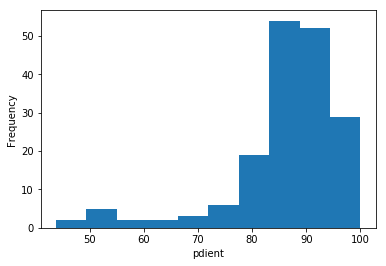

P17612	463	46	 Eukaryota	46


## Histograma pident homologos P17612

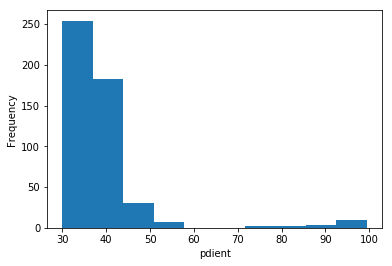

P18654	293	32	 Eukaryota	9


## Histograma pident homologos P18654

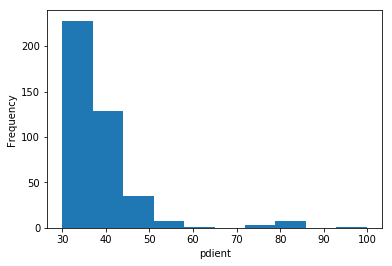

Q07841	496	15	 Archaea	30


## Histograma pident homologos Q07841

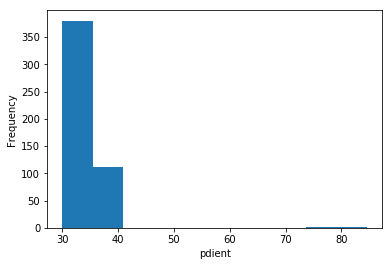

Q9BPX1	238	25	 Eukaryota	35


## Histograma pident homologos Q9BPX1

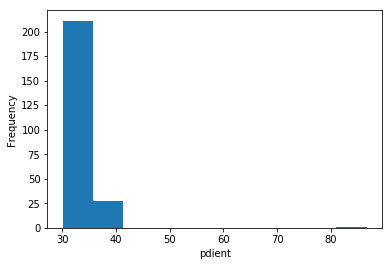

P06150	492	15	 Bacteria	8


## Histograma pident homologos P06150

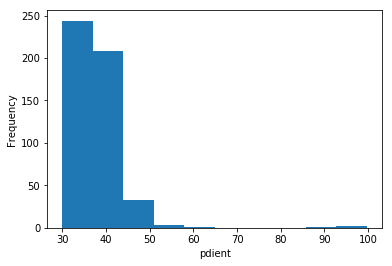

P00343	506	15	 Bacteria	23


## Histograma pident homologos P00343

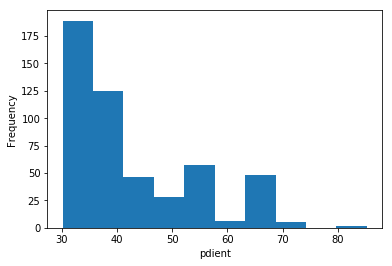

P28790	290	12	 Bacteria	8


## Histograma pident homologos P28790

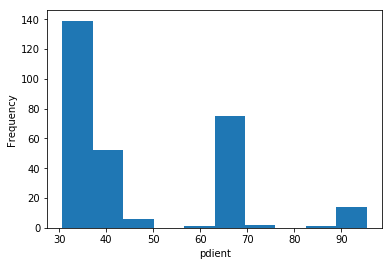

P18527	133	11	 Eukaryota	5


## Histograma pident homologos P18527

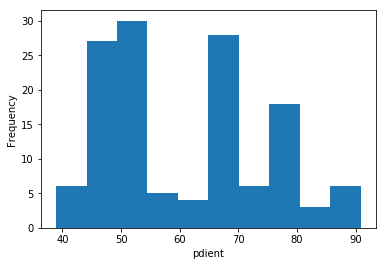

P22512	360	16	 Eukaryota	13


## Histograma pident homologos P22512

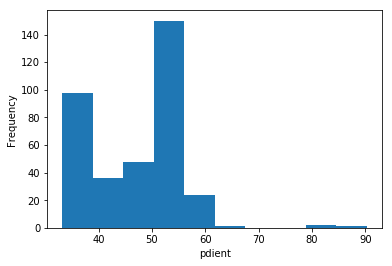

P9WGT1	303	30	 Bacteria	10


## Histograma pident homologos P9WGT1

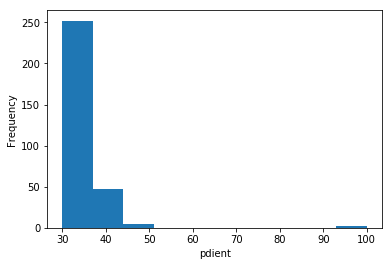

P01801	132	11	 Eukaryota	12


## Histograma pident homologos P01801

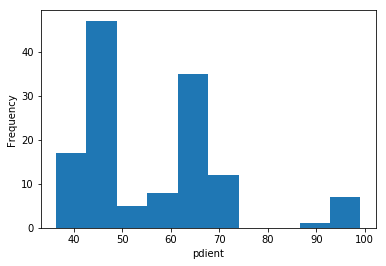

P62152	512	29	 Eukaryota	14


## Histograma pident homologos P62152

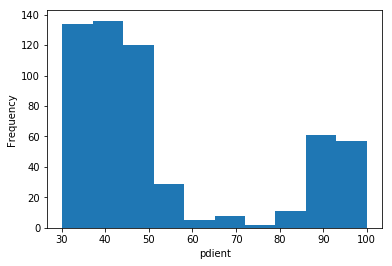

P63098	279	15	 Eukaryota	12


## Histograma pident homologos P63098

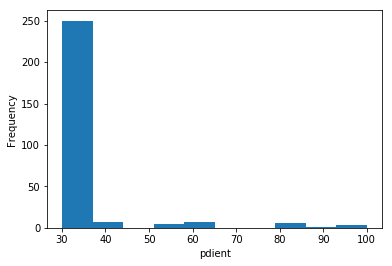

P69892	801	26	 Eukaryota	9


## Histograma pident homologos P69892

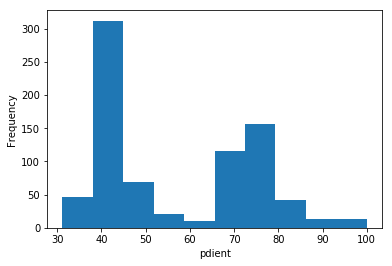

P01900	146	24	 Eukaryota	23


## Histograma pident homologos P01900

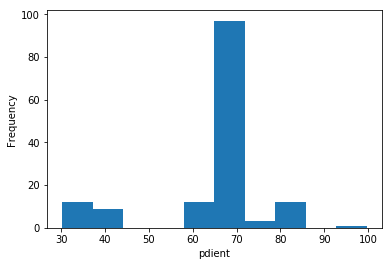

P80043	798	27	 Eukaryota	19


## Histograma pident homologos P80043

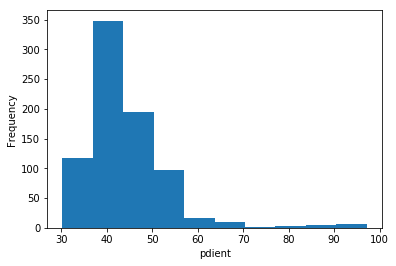

P80044	797	26	 Eukaryota	19


## Histograma pident homologos P80044

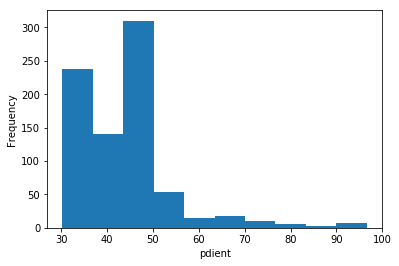

P60529	806	28	 Eukaryota	6


## Histograma pident homologos P60529

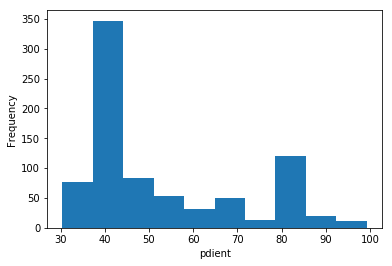

P04406	361	16	 Eukaryota	22


## Histograma pident homologos P04406

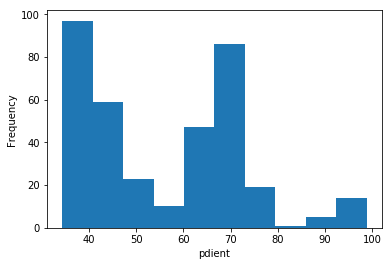

P68433	175	14	 Eukaryota	17


## Histograma pident homologos P68433

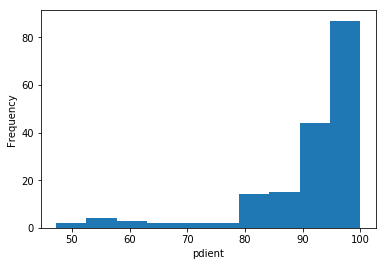

P25321	457	44	 Eukaryota	56


## Histograma pident homologos P25321

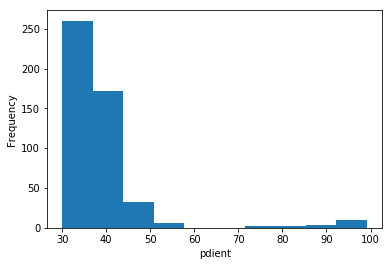

P48635	54	11	 Bacteria	7


## Histograma pident homologos P48635

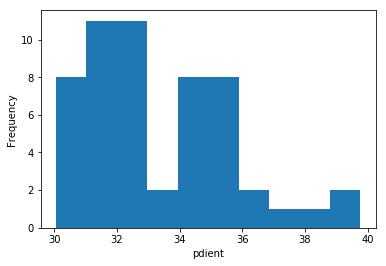

P04117	89	12	 Eukaryota	26


## Histograma pident homologos P04117

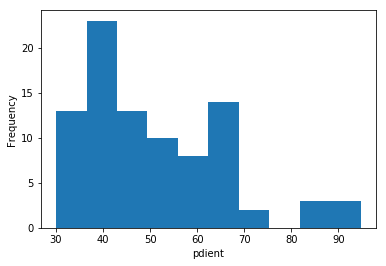

P01823	130	11	 Eukaryota	20


## Histograma pident homologos P01823

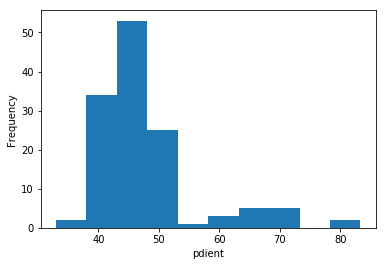

P18532	132	11	 Eukaryota	6


## Histograma pident homologos P18532

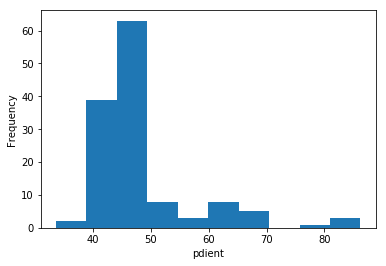

P0DOY3	50	15	 Eukaryota	34


## Histograma pident homologos P0DOY3

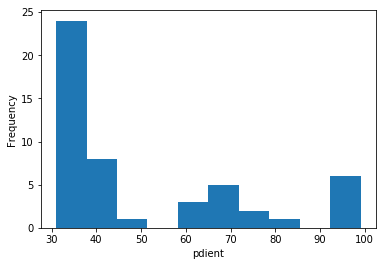

P11474	149	15	 Eukaryota	5


## Histograma pident homologos P11474

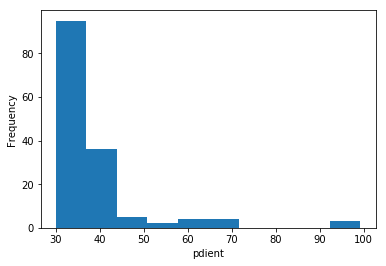

O54438	344	33	 Bacteria	76


## Histograma pident homologos O54438

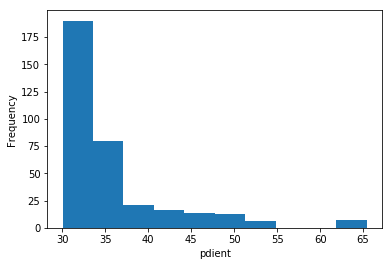

P01902	144	24	 Eukaryota	24


## Histograma pident homologos P01902

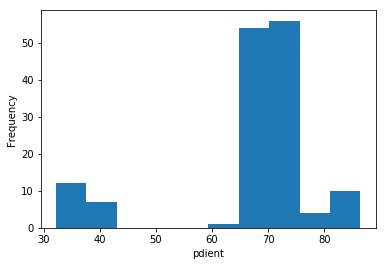

P10081	876	12	 Eukaryota	9


## Histograma pident homologos P10081

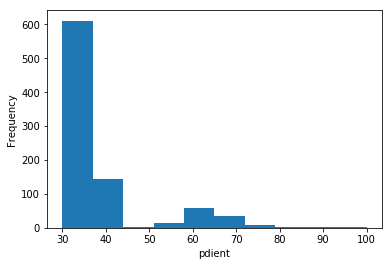

P01867	29	13	 Eukaryota	35


## Histograma pident homologos P01867

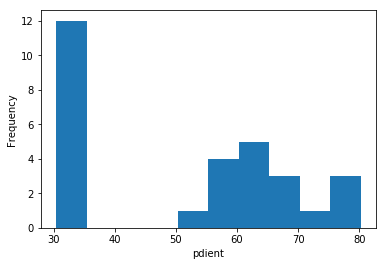

P01868	27	15	 Eukaryota	50


## Histograma pident homologos P01868

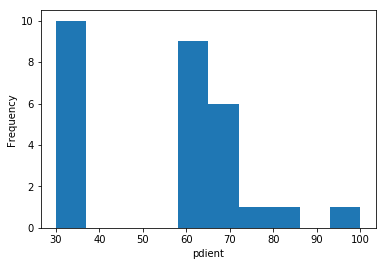

P01861	36	15	 Eukaryota	19


## Histograma pident homologos P01861

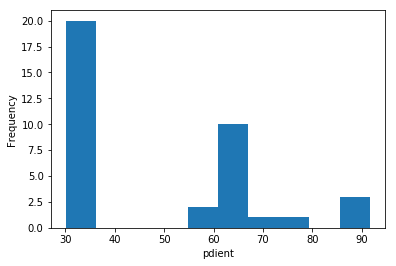

P0DMV8	993	11	 Eukaryota	37


## Histograma pident homologos P0DMV8

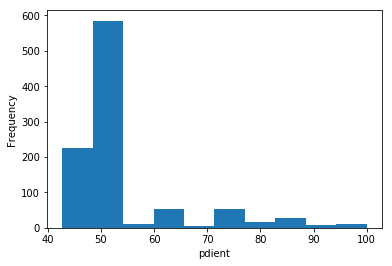

K0J4Q8	102	13	 Bacteria	10


## Histograma pident homologos K0J4Q8

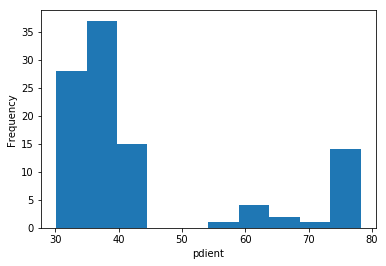

P01811	131	11	 Eukaryota	6


## Histograma pident homologos P01811

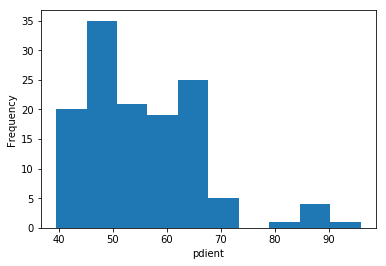

P01772	135	11	 Eukaryota	12


## Histograma pident homologos P01772

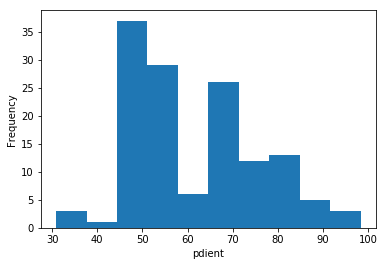

P12010	356	11	 Bacteria	12


## Histograma pident homologos P12010

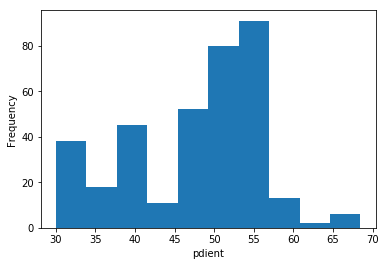

P20760	28	13	 Eukaryota	6


## Histograma pident homologos P20760

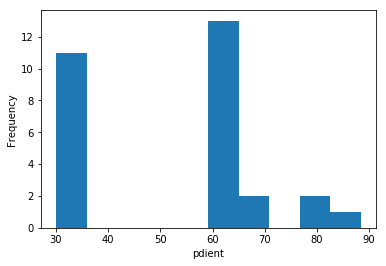

P63100	279	15	 Eukaryota	5


## Histograma pident homologos P63100

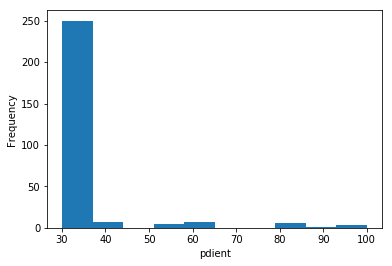

P0DP33	510	29	 Eukaryota	8


## Histograma pident homologos P0DP33

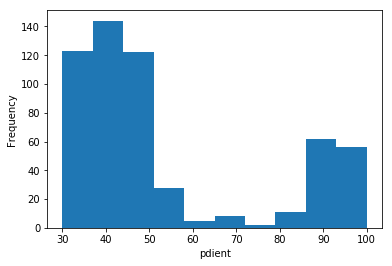

P41240	120	18	 Eukaryota	10


## Histograma pident homologos P41240

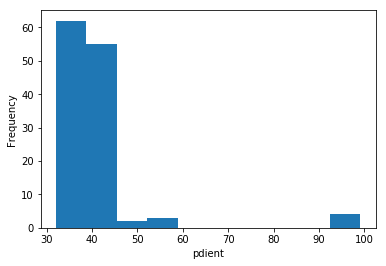

P22441	189	20	 Bacteria	28


## Histograma pident homologos P22441

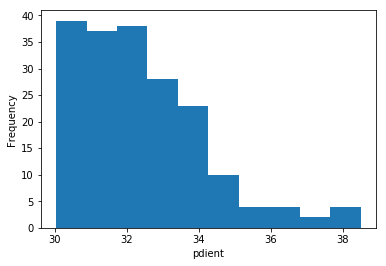

P0A9B7	361	16	 Bacteria	15


## Histograma pident homologos P0A9B7

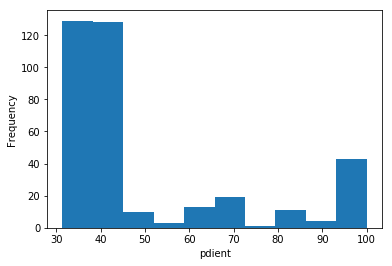

P01863	27	13	 Eukaryota	75


## Histograma pident homologos P01863

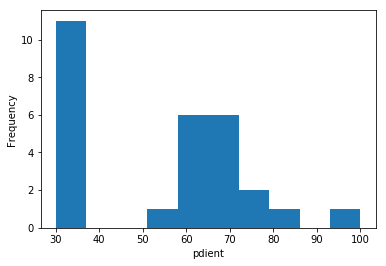

P01865	28	13	 Eukaryota	34


## Histograma pident homologos P01865

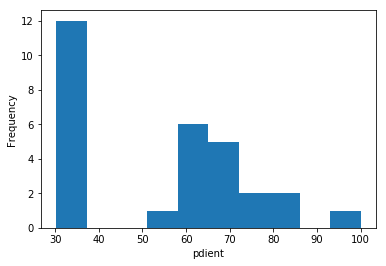

Q9D0J4	204	11	 Eukaryota	5


## Histograma pident homologos Q9D0J4

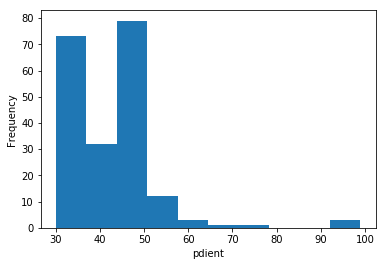

P14894	89	23	 Eukaryota	13


## Histograma pident homologos P14894

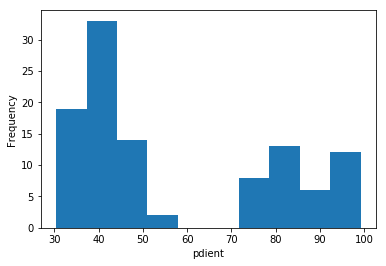

P47547	998	11	 Bacteria	5


## Histograma pident homologos P47547

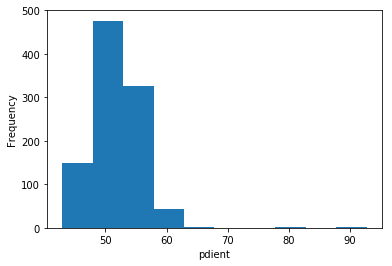

P08246	211	21	 Eukaryota	22


## Histograma pident homologos P08246

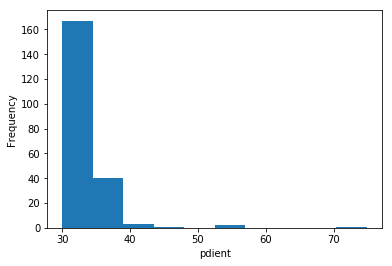

P9WGT3	219	29	 Bacteria	5


## Histograma pident homologos P9WGT3

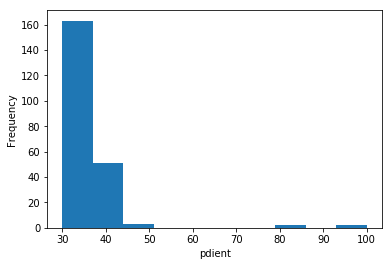

P03989	148	25	 Eukaryota	36


## Histograma pident homologos P03989

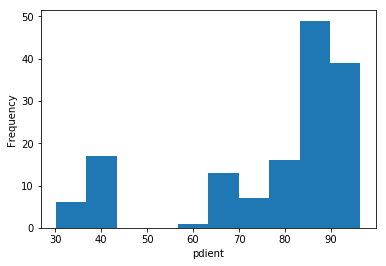

P80244	761	19	 Bacteria	56


## Histograma pident homologos P80244

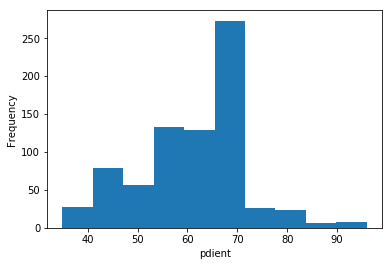

P63788	761	19	 Bacteria	7


## Histograma pident homologos P63788

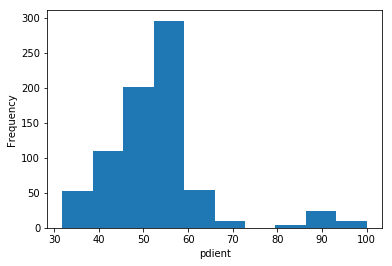

P07338	575	51	 Eukaryota	5


## Histograma pident homologos P07338

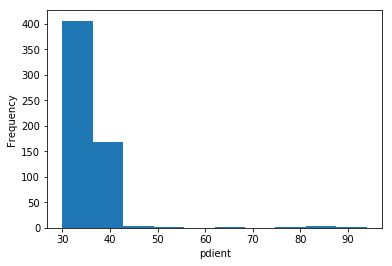

P13746	147	25	 Eukaryota	25


## Histograma pident homologos P13746

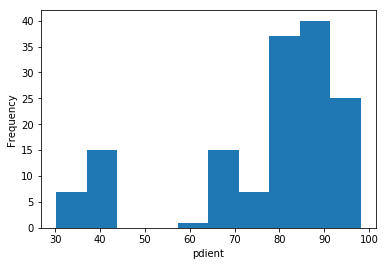

Q48436	276	25	 Bacteria	10


## Histograma pident homologos Q48436

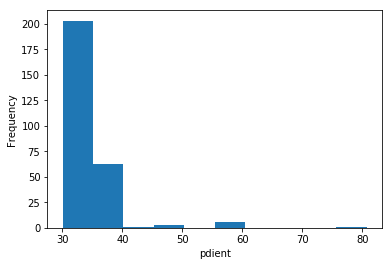

P62157	510	29	 Eukaryota	20


## Histograma pident homologos P62157

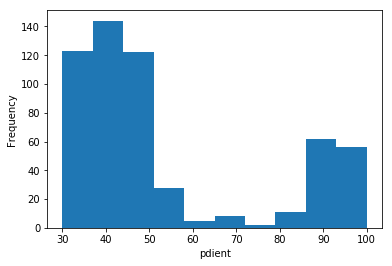

C4B644	78	15	 Bacteria	23


## Histograma pident homologos C4B644

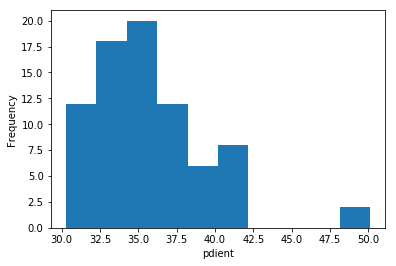

P01889	150	25	 Eukaryota	14


## Histograma pident homologos P01889

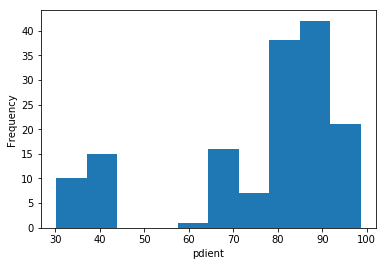

P01011	165	12	 Eukaryota	26


## Histograma pident homologos P01011

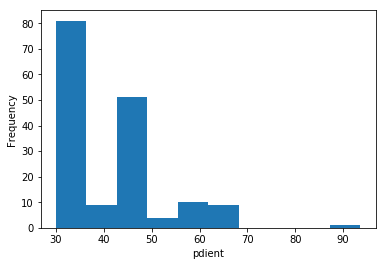

P41208	378	22	 Eukaryota	8


## Histograma pident homologos P41208

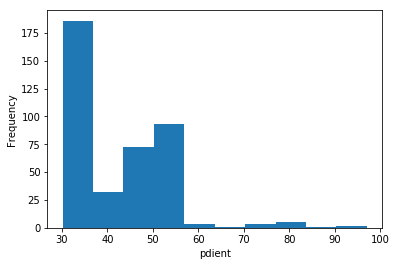

Q8N4T8	258	24	 Eukaryota	16


## Histograma pident homologos Q8N4T8

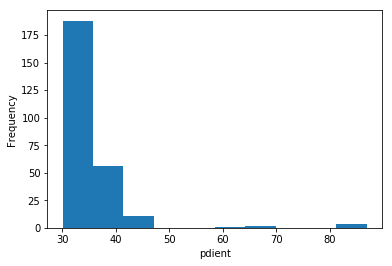

P09527	583	24	 Eukaryota	11


## Histograma pident homologos P09527

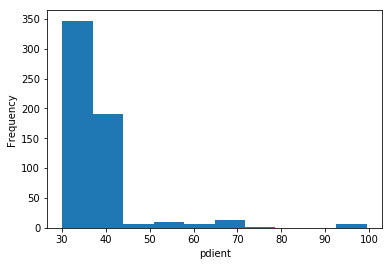

P01116	695	33	 Eukaryota	187


## Histograma pident homologos P01116

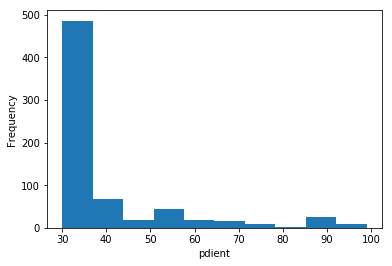

P19866	348	16	 Eukaryota	31


## Histograma pident homologos P19866

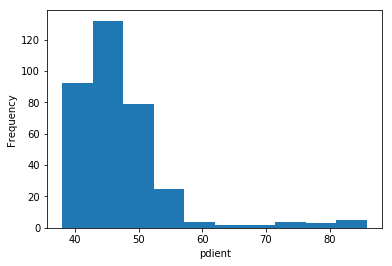

P61224	634	29	 Eukaryota	25


## Histograma pident homologos P61224

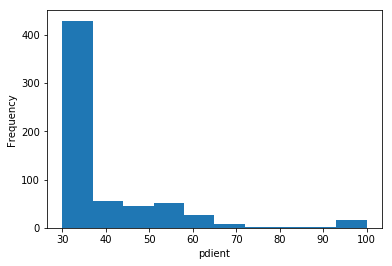

P07412	813	26	 Eukaryota	12


## Histograma pident homologos P07412

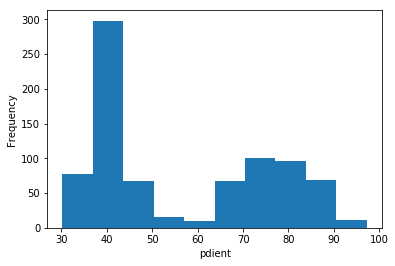

P01958	806	28	 Eukaryota	22


## Histograma pident homologos P01958

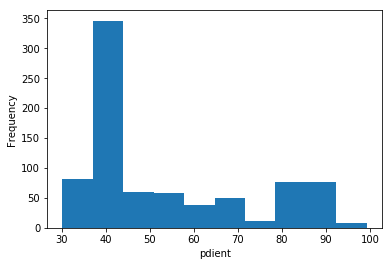

P68871	806	26	 Eukaryota	524


## Histograma pident homologos P68871

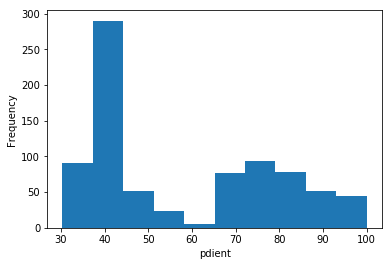

P05132	439	47	 Eukaryota	82


## Histograma pident homologos P05132

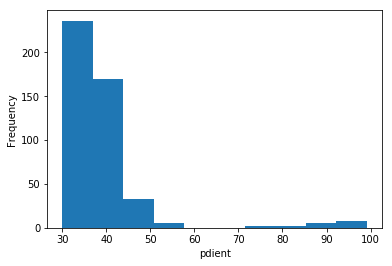

P02867	92	23	 Eukaryota	20


## Histograma pident homologos P02867

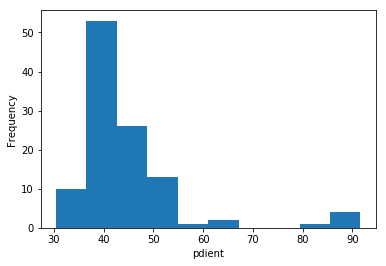

Q81M99	536	12	 Bacteria	5


## Histograma pident homologos Q81M99

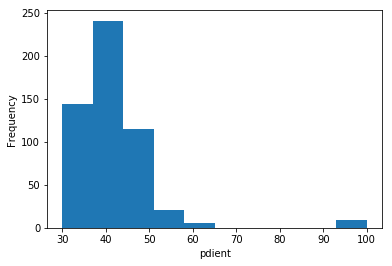

O28303	123	14	 Archaea	24


## Histograma pident homologos O28303

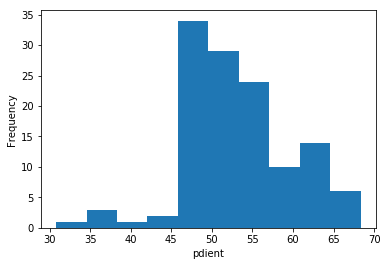

P08134	516	22	 Eukaryota	5


## Histograma pident homologos P08134

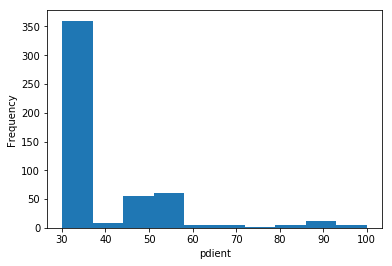

P52564	198	13	 Eukaryota	6


## Histograma pident homologos P52564

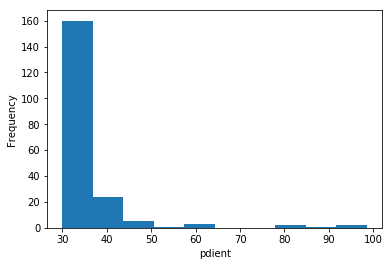

Q9SN68	705	30	 Eukaryota	9


## Histograma pident homologos Q9SN68

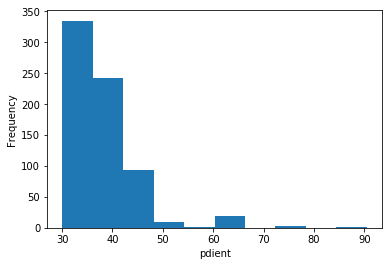

O93627	675	12	 Archaea	55


## Histograma pident homologos O93627

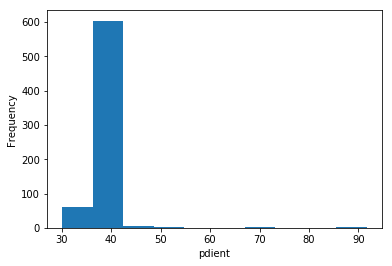

P9WPC4	761	19	 Bacteria	26


## Histograma pident homologos P9WPC4

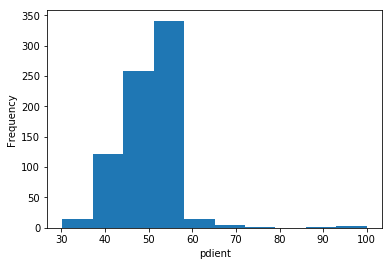

P9WKK9	356	12	 Bacteria	8


## Histograma pident homologos P9WKK9

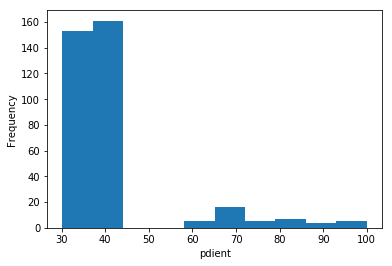

P01764	132	11	 Eukaryota	19


## Histograma pident homologos P01764

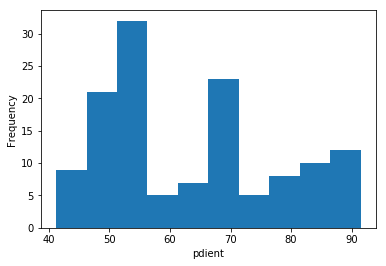

Q8U4H3	125	15	 Archaea	12


## Histograma pident homologos Q8U4H3

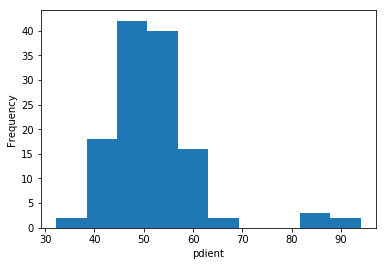

P02062	802	27	 Eukaryota	22


## Histograma pident homologos P02062

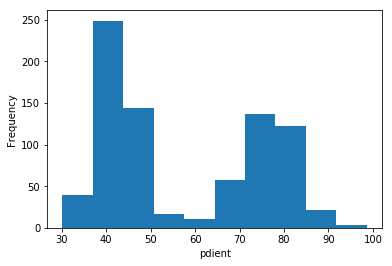

Q13637	334	13	 Eukaryota	8


## Histograma pident homologos Q13637

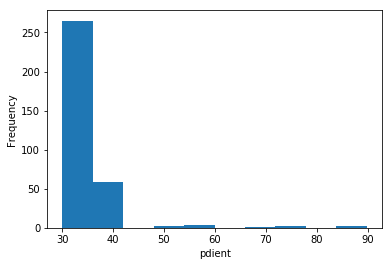

P01990	797	27	 Eukaryota	6


## Histograma pident homologos P01990

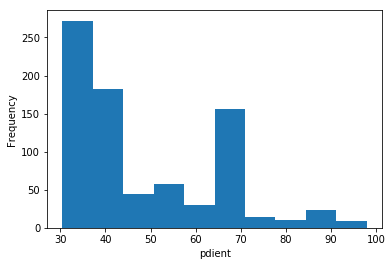

Q72IW9	380	12	 Bacteria	10


## Histograma pident homologos Q72IW9

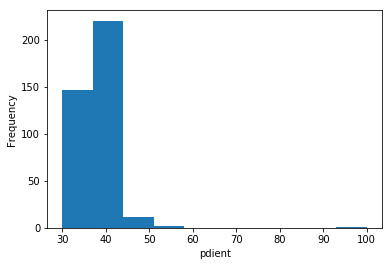

Q15418	305	28	 Eukaryota	20


## Histograma pident homologos Q15418

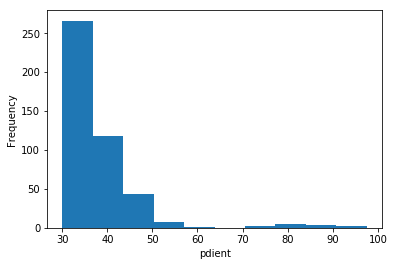

P05045	91	21	 Eukaryota	11


## Histograma pident homologos P05045

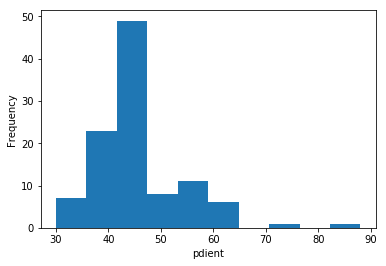

Q5SJA1	499	15	 Bacteria	28


## Histograma pident homologos Q5SJA1

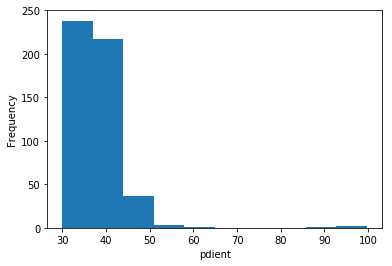

P01704	112	13	 Eukaryota	7


## Histograma pident homologos P01704

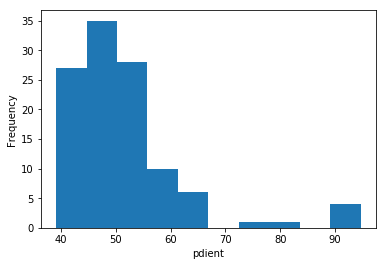

Q7RQ71	192	19	 Eukaryota	5


## Histograma pident homologos Q7RQ71

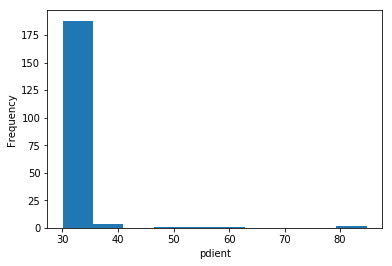

P14697	172	19	 Bacteria	18


## Histograma pident homologos P14697

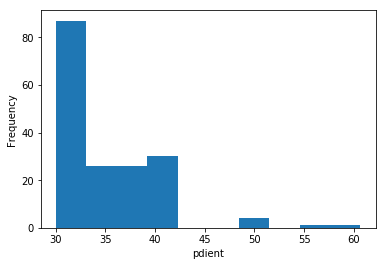

P51149	584	24	 Eukaryota	6


## Histograma pident homologos P51149

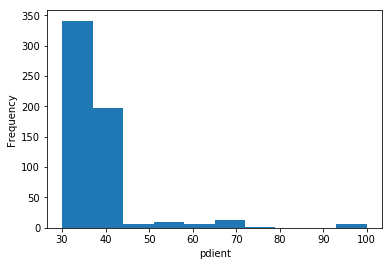

P01981	798	27	 Eukaryota	6


## Histograma pident homologos P01981

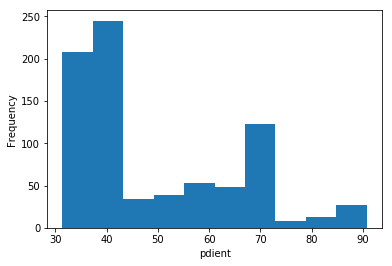

P00338	475	15	 Eukaryota	108


## Histograma pident homologos P00338

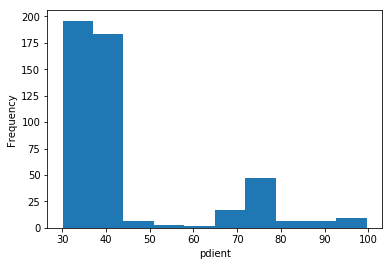

Q9H0U4	724	31	 Eukaryota	19


## Histograma pident homologos Q9H0U4

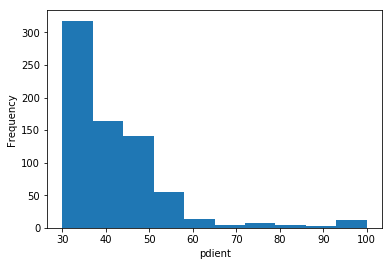

P02696	70	11	 Eukaryota	5


## Histograma pident homologos P02696

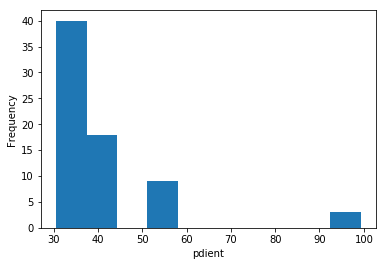

P52174	740	19	 Eukaryota	6


## Histograma pident homologos P52174

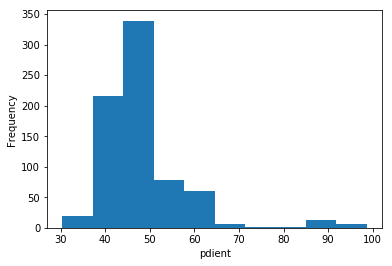

P02609	194	14	 Eukaryota	64


## Histograma pident homologos P02609

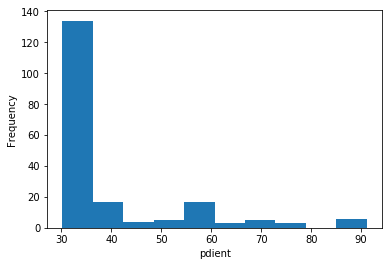

P02607	244	21	 Eukaryota	14


## Histograma pident homologos P02607

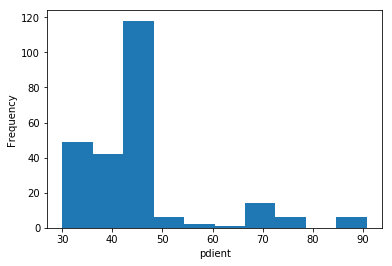

P00517	448	44	 Eukaryota	99


## Histograma pident homologos P00517

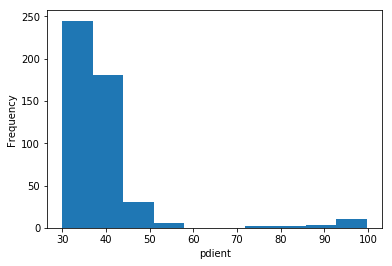

Q45Z29	333	12	 Eukaryota	6


## Histograma pident homologos Q45Z29

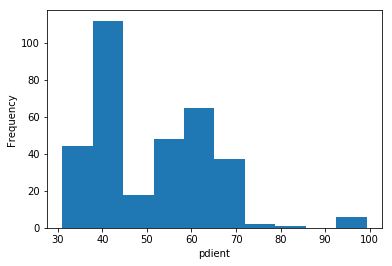

P14555	360	17	 Eukaryota	34


## Histograma pident homologos P14555

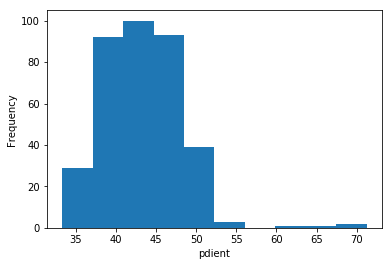

Q9NZK7	344	17	 Eukaryota	8


## Histograma pident homologos Q9NZK7

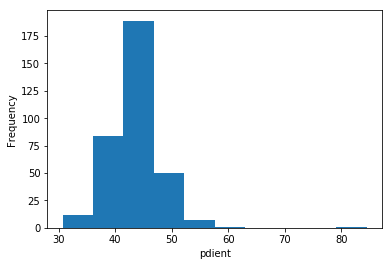

P09446	994	11	 Eukaryota	7


## Histograma pident homologos P09446

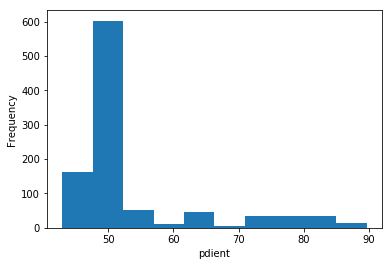

O60259	646	51	 Eukaryota	5


## Histograma pident homologos O60259

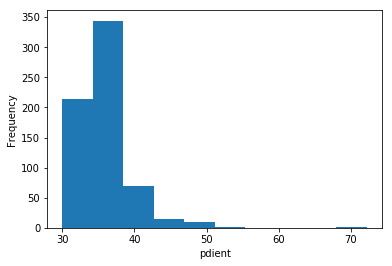

P05046	97	23	 Eukaryota	17


## Histograma pident homologos P05046

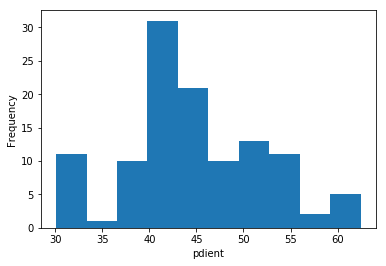

P00357	361	16	 Eukaryota	6


## Histograma pident homologos P00357

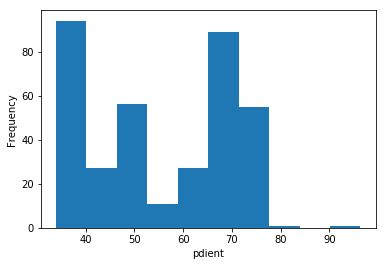

O57693	284	14	 Archaea	8


## Histograma pident homologos O57693

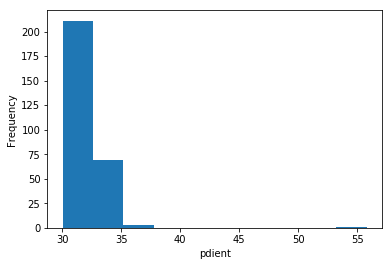

P02077	799	26	 Eukaryota	7


## Histograma pident homologos P02077

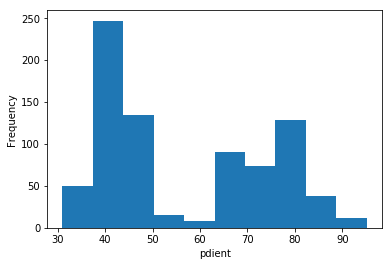

P01642	140	12	 Eukaryota	12


## Histograma pident homologos P01642

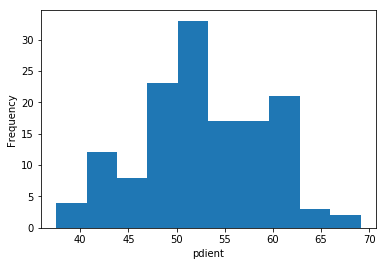

Q27797	420	11	 Eukaryota	5


## Histograma pident homologos Q27797

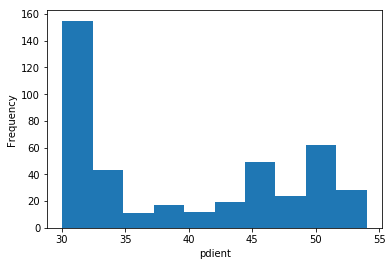

O24313	94	22	 Eukaryota	54


## Histograma pident homologos O24313

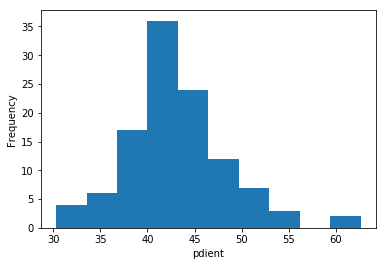

Q59523	79	18	 Bacteria	20


## Histograma pident homologos Q59523

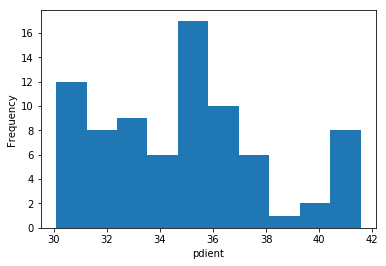

O16305	512	29	 Eukaryota	9


## Histograma pident homologos O16305

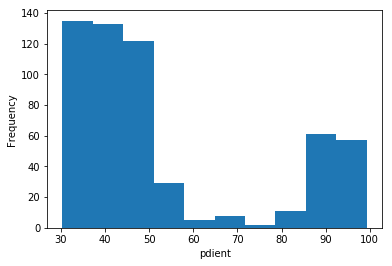

P82287	324	20	 Eukaryota	6


## Histograma pident homologos P82287

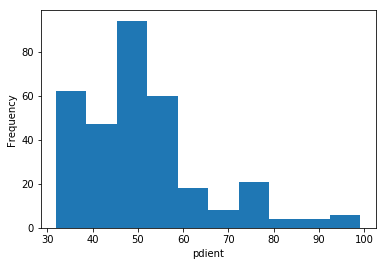

P30685	146	24	 Eukaryota	44


## Histograma pident homologos P30685

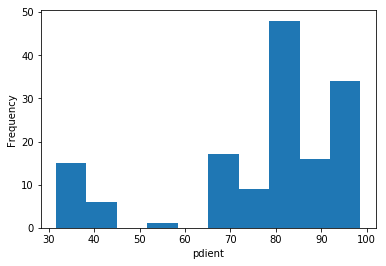

P30112	62	11	 Eukaryota	12


## Histograma pident homologos P30112

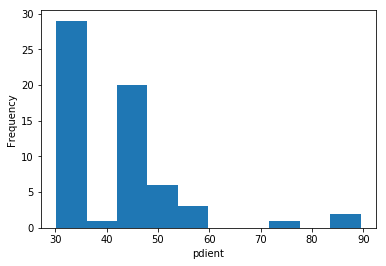

P07405	804	28	 Eukaryota	12


## Histograma pident homologos P07405

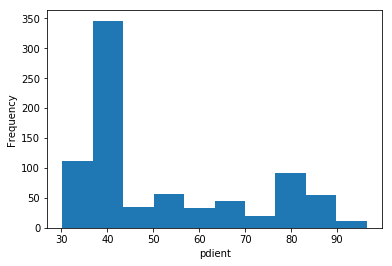

P02089	829	26	 Eukaryota	8


## Histograma pident homologos P02089

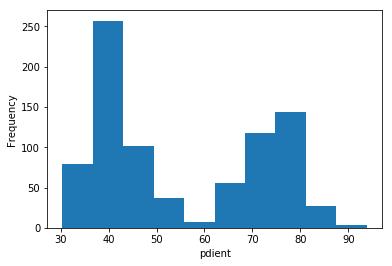

P63018	993	11	 Eukaryota	5


## Histograma pident homologos P63018

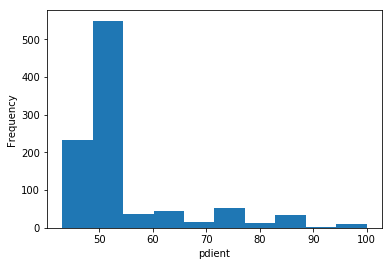

P02605	253	21	 Eukaryota	57


## Histograma pident homologos P02605

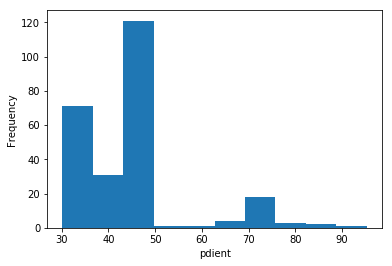

P02208	145	11	 Eukaryota	25


## Histograma pident homologos P02208

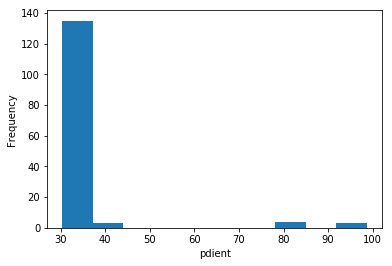

Q16695	173	14	 Eukaryota	12


## Histograma pident homologos Q16695

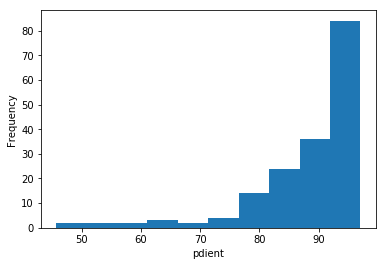

P02299	175	14	 Eukaryota	19


## Histograma pident homologos P02299

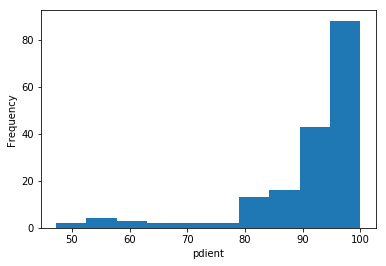

P02689	88	12	 Eukaryota	16


## Histograma pident homologos P02689

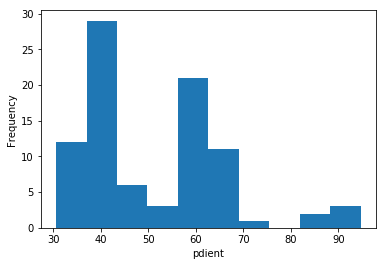

Q9DF33	326	13	 Eukaryota	6


## Histograma pident homologos Q9DF33

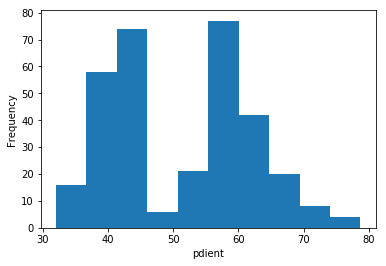

P22887	741	19	 Eukaryota	65


## Histograma pident homologos P22887

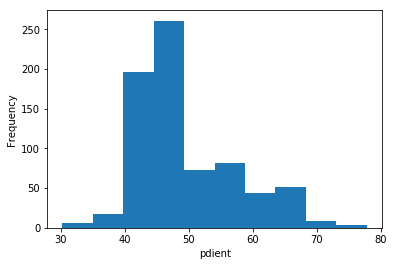

B5Z9W9	746	19	 Bacteria	8


## Histograma pident homologos B5Z9W9

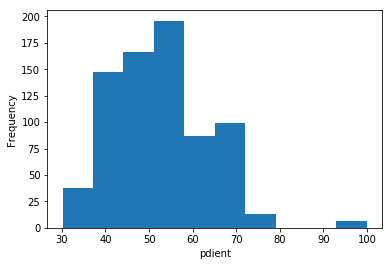

P46427	79	15	 Eukaryota	6


## Histograma pident homologos P46427

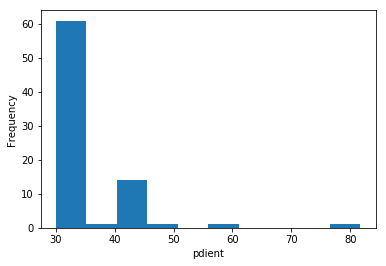

P54652	993	11	 Eukaryota	10


## Histograma pident homologos P54652

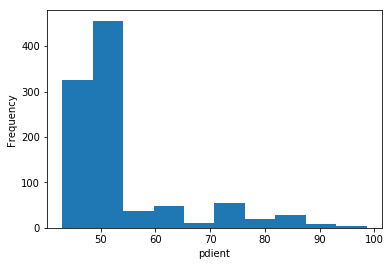

P01820	132	11	 Eukaryota	28


## Histograma pident homologos P01820

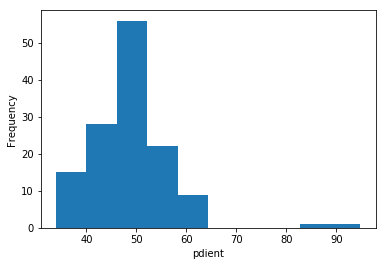

P50213	339	11	 Eukaryota	6


## Histograma pident homologos P50213

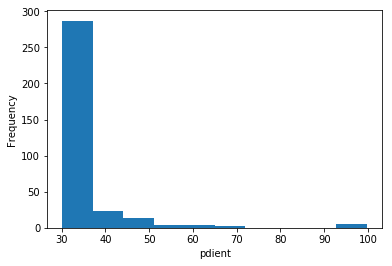

P01869	26	15	 Eukaryota	95


## Histograma pident homologos P01869

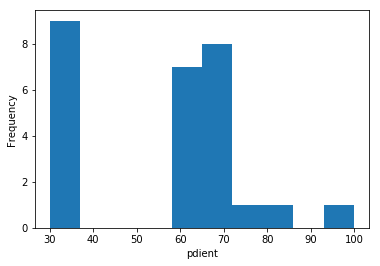

P19588	81	17	 Eukaryota	12


## Histograma pident homologos P19588

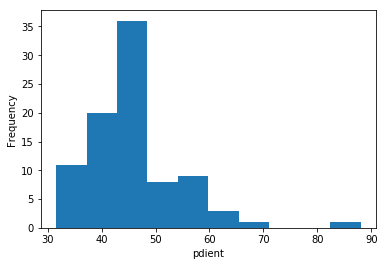

P01721	162	15	 Eukaryota	6


## Histograma pident homologos P01721

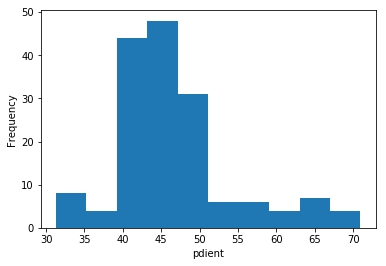

P01965	803	26	 Eukaryota	8


## Histograma pident homologos P01965

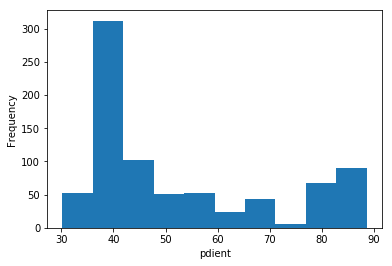

P01808	131	11	 Eukaryota	39


## Histograma pident homologos P01808

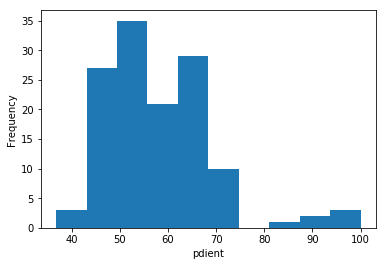

P61136	734	19	 Archaea	15


## Histograma pident homologos P61136

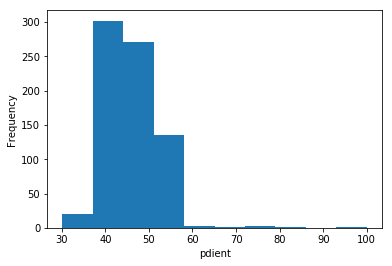

Q9IAT9	306	20	 Eukaryota	14


## Histograma pident homologos Q9IAT9

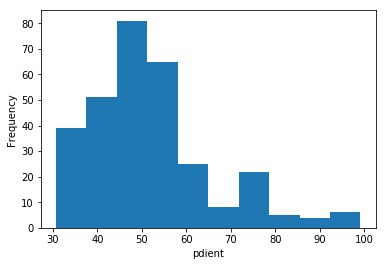

Q8AXY1	359	19	 Eukaryota	7


## Histograma pident homologos Q8AXY1

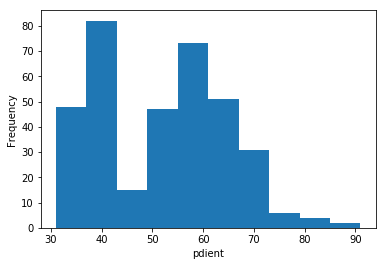

P21871	798	27	 Eukaryota	7


## Histograma pident homologos P21871

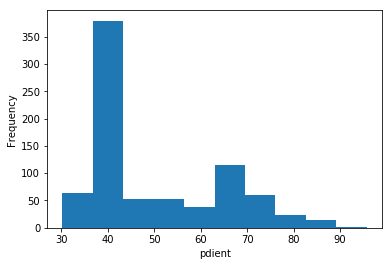

P11142	993	11	 Eukaryota	65


## Histograma pident homologos P11142

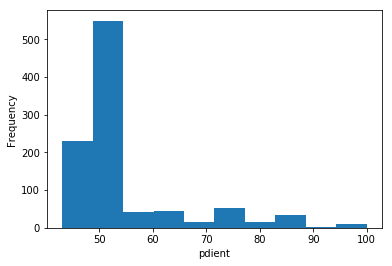

P01724	132	14	 Eukaryota	24


## Histograma pident homologos P01724

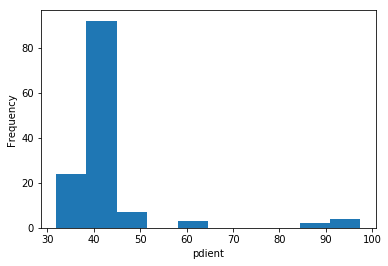

B3EWQ9	96	23	 Eukaryota	9


## Histograma pident homologos B3EWQ9

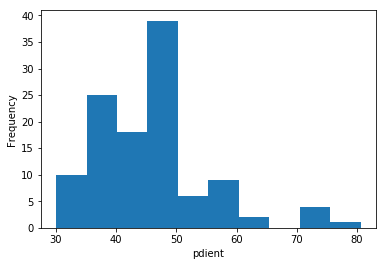

P22972	90	21	 Eukaryota	6


## Histograma pident homologos P22972

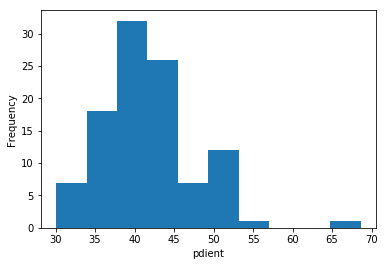

P00336	451	14	 Eukaryota	5


## Histograma pident homologos P00336

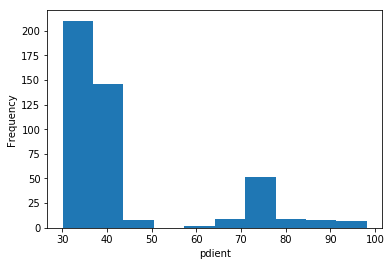

P00344	484	14	 Bacteria	10


## Histograma pident homologos P00344

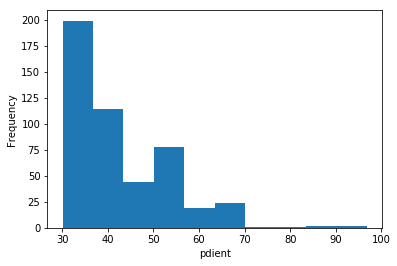

Q14012	218	20	 Eukaryota	6


## Histograma pident homologos Q14012

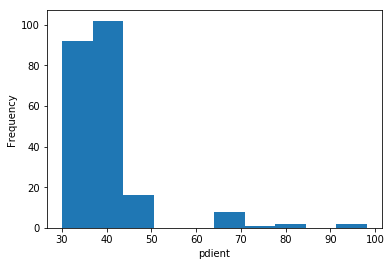

P20761	24	12	 Eukaryota	10


## Histograma pident homologos P20761

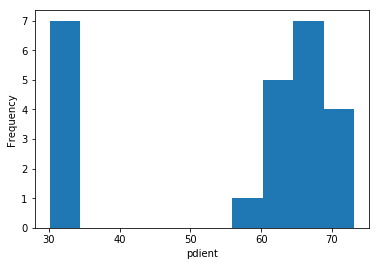

P01857	36	15	 Eukaryota	335


## Histograma pident homologos P01857

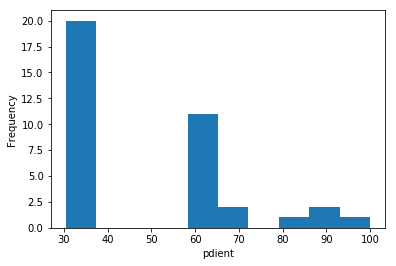

Q9Y5K2	520	45	 Eukaryota	27


## Histograma pident homologos Q9Y5K2

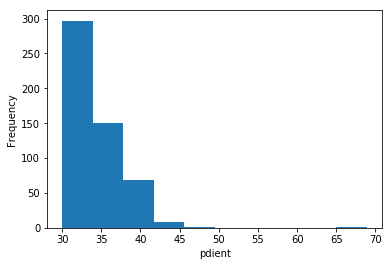

P25911	97	14	 Eukaryota	6


## Histograma pident homologos P25911

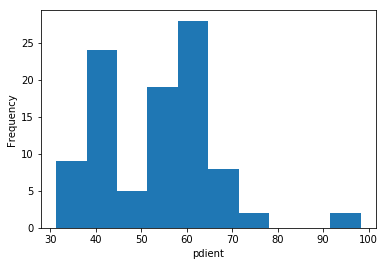

P68431	175	14	 Eukaryota	264


## Histograma pident homologos P68431

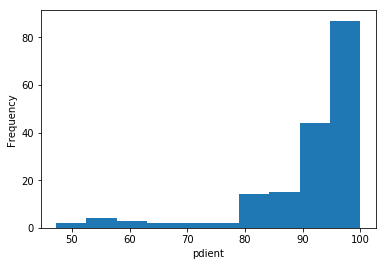

P17693	146	24	 Eukaryota	10


## Histograma pident homologos P17693

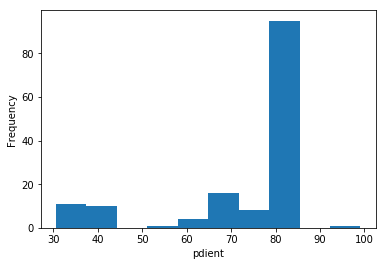

P00752	532	38	 Eukaryota	10


## Histograma pident homologos P00752

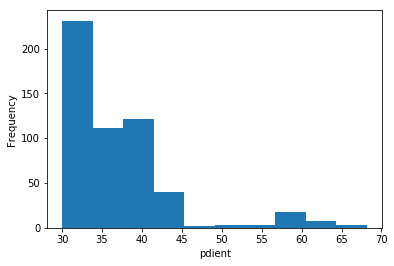

O75582	88	12	 Eukaryota	5


## Histograma pident homologos O75582

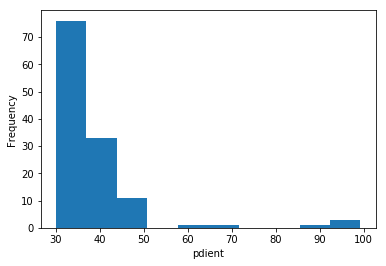

P11546	175	11	 Bacteria	7


## Histograma pident homologos P11546

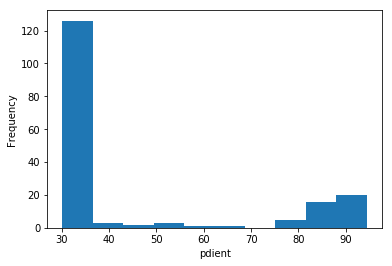

P08902	73	21	 Eukaryota	23


## Histograma pident homologos P08902

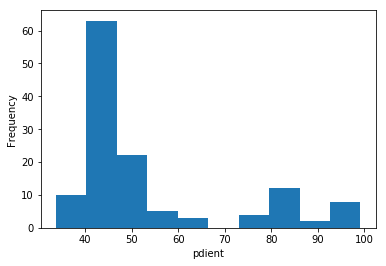

P13714	517	15	 Bacteria	16


## Histograma pident homologos P13714

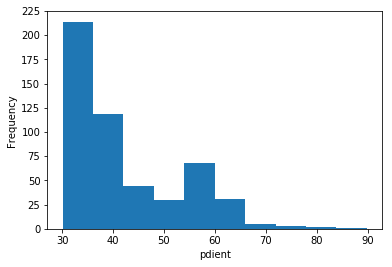

P15266	744	19	 Bacteria	6


## Histograma pident homologos P15266

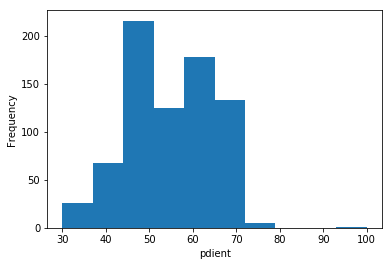

O94788	535	19	 Eukaryota	20


## Histograma pident homologos O94788

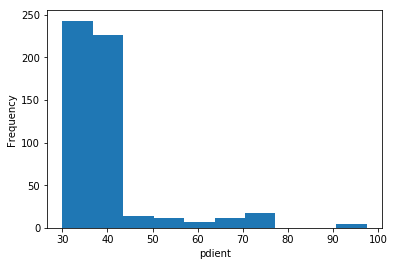

P0C0Y5	106	11	 Eukaryota	8


## Histograma pident homologos P0C0Y5

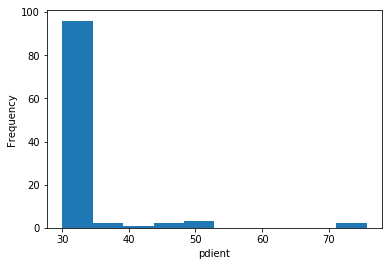

O67528	746	19	 Bacteria	35


## Histograma pident homologos O67528

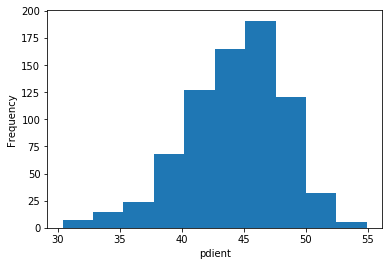

P05413	95	13	 Eukaryota	32


## Histograma pident homologos P05413

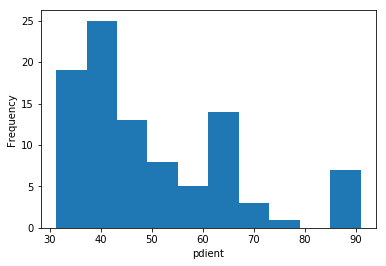

P02070	799	26	 Eukaryota	22


## Histograma pident homologos P02070

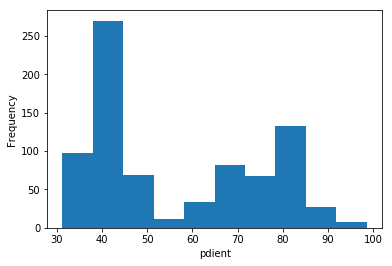

Q15759	495	22	 Eukaryota	5


## Histograma pident homologos Q15759

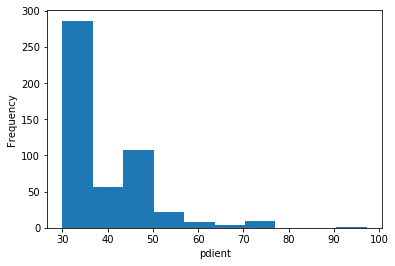

Q2SWE7	744	19	 Bacteria	6


## Histograma pident homologos Q2SWE7

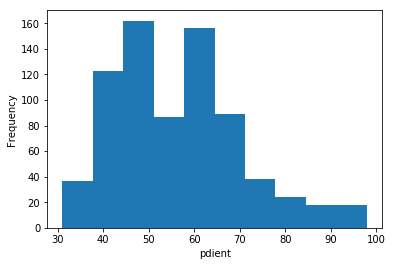

P22392	739	19	 Eukaryota	30


## Histograma pident homologos P22392

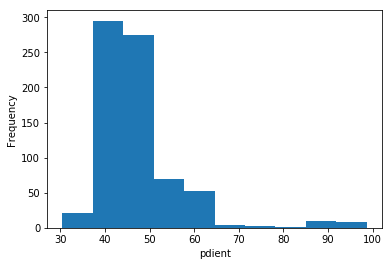

Q71DI3	175	14	 Eukaryota	33


## Histograma pident homologos Q71DI3

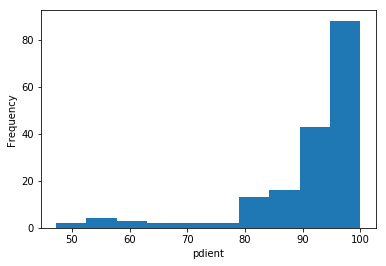

P60752	319	12	 Bacteria	8


## Histograma pident homologos P60752

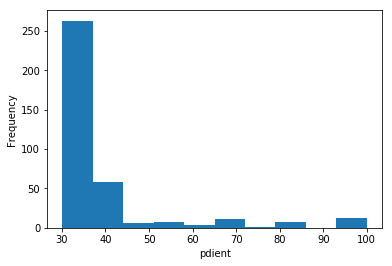

P29736	165	12	 Eukaryota	18


## Histograma pident homologos P29736

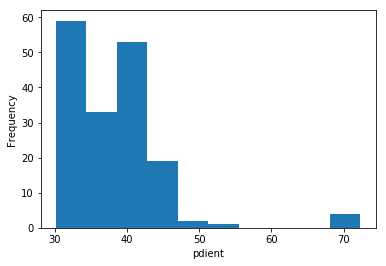

P01660	159	16	 Eukaryota	14


## Histograma pident homologos P01660

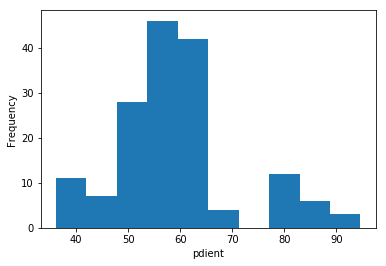

O51419	609	17	 Bacteria	12


## Histograma pident homologos O51419

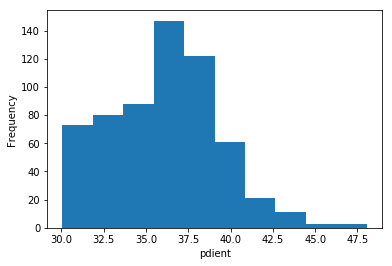

P01594	150	16	 Eukaryota	32


## Histograma pident homologos P01594

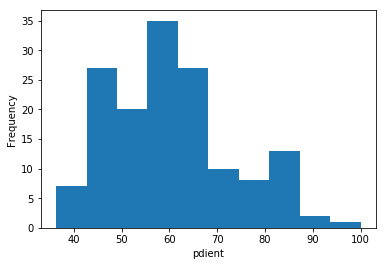

P08879	735	19	 Eukaryota	9


## Histograma pident homologos P08879

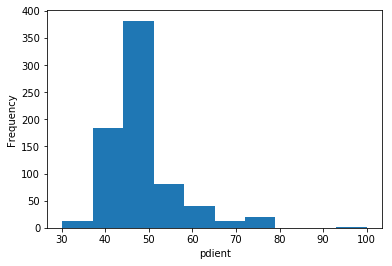

O58429	739	19	 Archaea	12


## Histograma pident homologos O58429

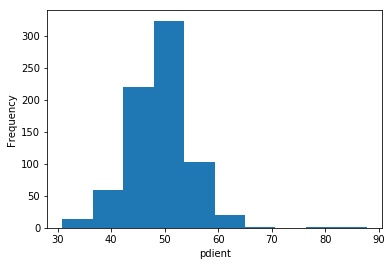

P0A763	745	18	 Bacteria	6


## Histograma pident homologos P0A763

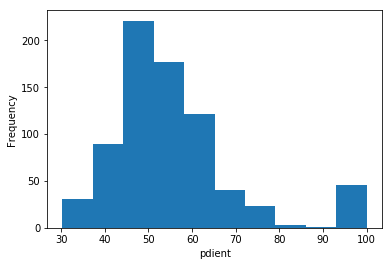

Q0J8A4	361	16	 Eukaryota	12


## Histograma pident homologos Q0J8A4

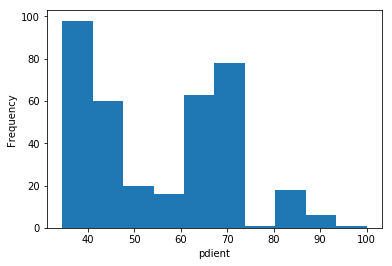

B4RMG0	742	19	 Bacteria	16


## Histograma pident homologos B4RMG0

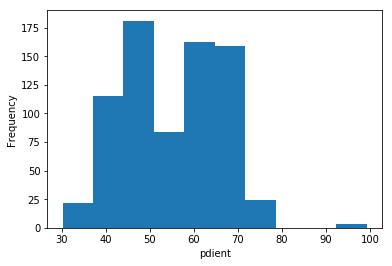

P06312	158	16	 Eukaryota	15


## Histograma pident homologos P06312

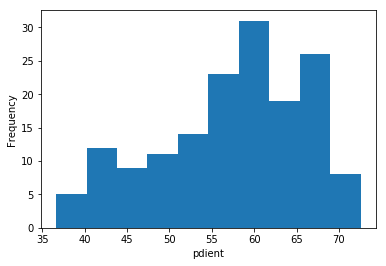

P13491	470	14	 Eukaryota	52


## Histograma pident homologos P13491

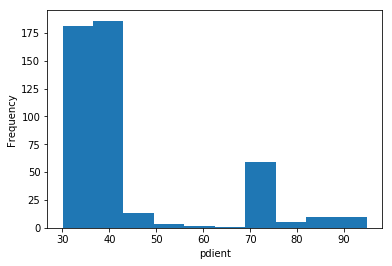

P10319	146	24	 Eukaryota	6


## Histograma pident homologos P10319

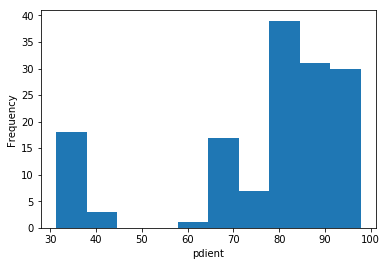

P68135	450	13	 Eukaryota	580


## Histograma pident homologos P68135

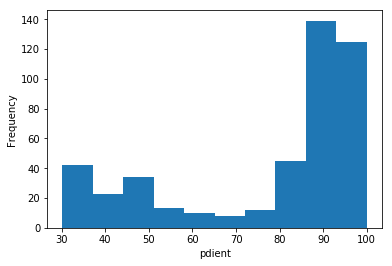

P00355	361	16	 Eukaryota	6


## Histograma pident homologos P00355

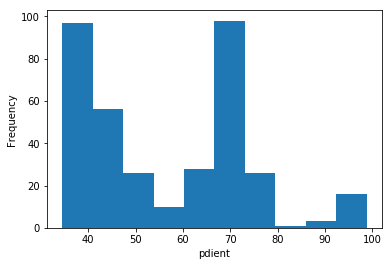

P04122	79	17	 Eukaryota	26


## Histograma pident homologos P04122

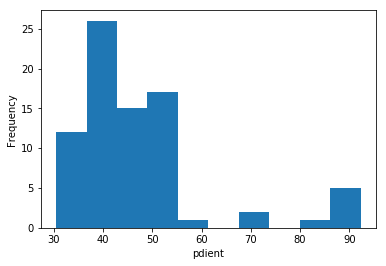

P05945	181	17	 Eukaryota	8


## Histograma pident homologos P05945

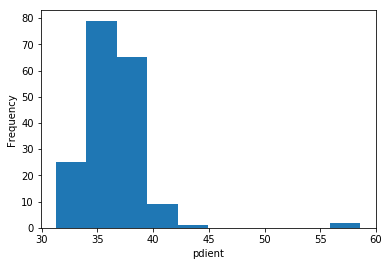

P60753	319	12	 Bacteria	8


## Histograma pident homologos P60753

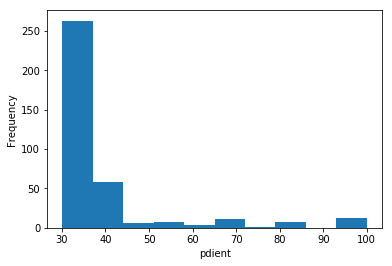

P01008	164	12	 Eukaryota	51


## Histograma pident homologos P01008

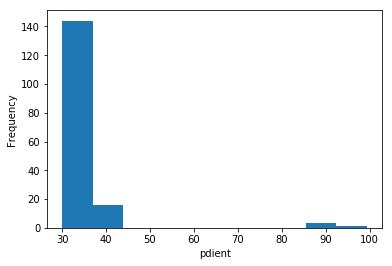

Q9UIK4	184	20	 Eukaryota	37


## Histograma pident homologos Q9UIK4

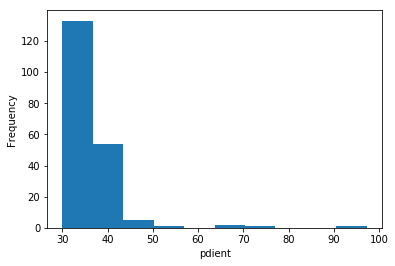

Q92876	658	50	 Eukaryota	7


## Histograma pident homologos Q92876

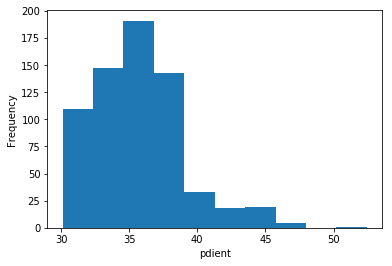

P16892	504	20	 Eukaryota	9


## Histograma pident homologos P16892

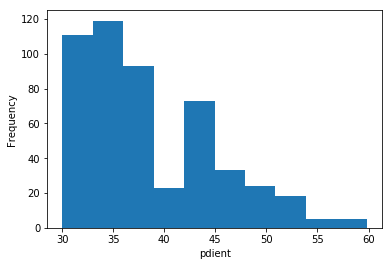

I6XHI4	237	11	 Bacteria	18


## Histograma pident homologos I6XHI4

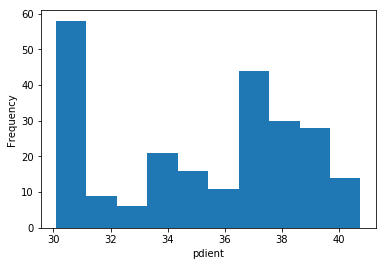

O15540	89	13	 Eukaryota	8


## Histograma pident homologos O15540

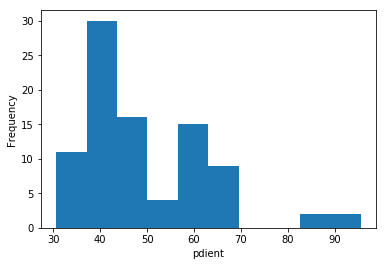

P01859	37	15	 Eukaryota	6


## Histograma pident homologos P01859

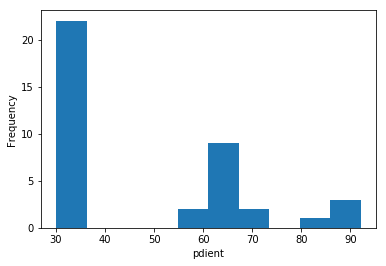

P00362	361	16	 Bacteria	44


## Histograma pident homologos P00362

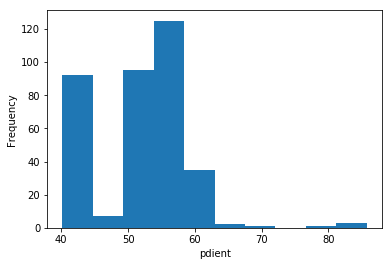

P01897	146	24	 Eukaryota	25


## Histograma pident homologos P01897

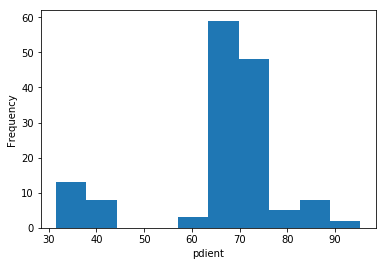

P19120	993	11	 Eukaryota	39


## Histograma pident homologos P19120

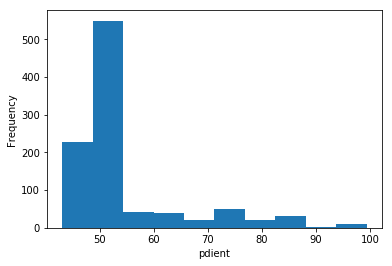

P49862	611	48	 Eukaryota	11


## Histograma pident homologos P49862

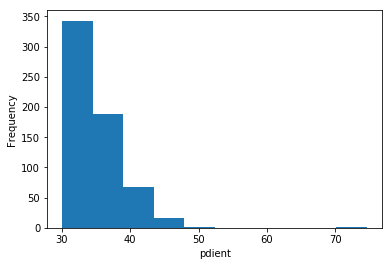

Q81EP4	516	14	 Bacteria	6


## Histograma pident homologos Q81EP4

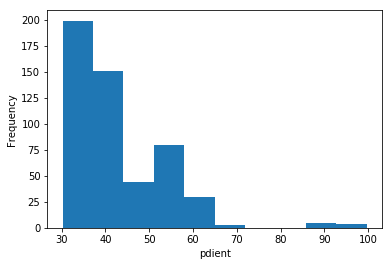

O15264	515	24	 Eukaryota	9


## Histograma pident homologos O15264

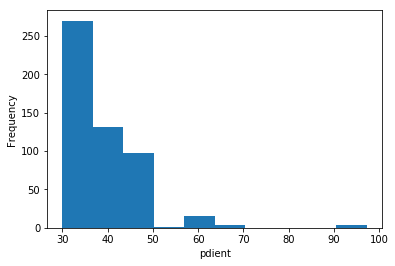

Q9RQI6	761	19	 Bacteria	14


## Histograma pident homologos Q9RQI6

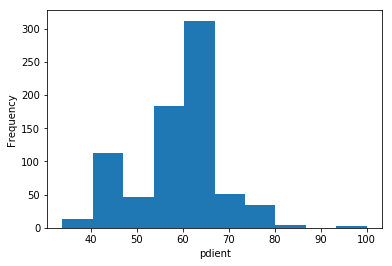

Q7Z4W1	144	13	 Eukaryota	8


## Histograma pident homologos Q7Z4W1

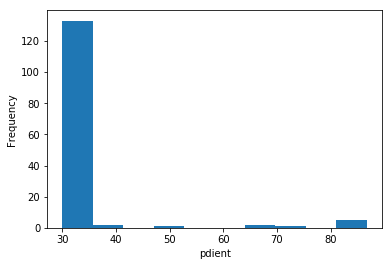

P10096	361	16	 Eukaryota	8


## Histograma pident homologos P10096

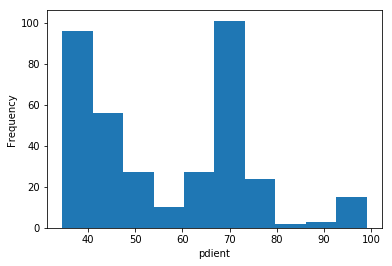

P22256	703	12	 Bacteria	20


## Histograma pident homologos P22256

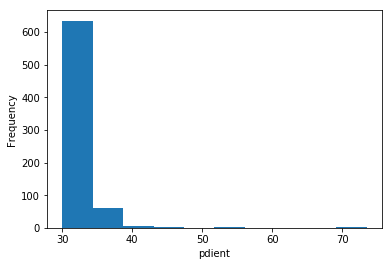

O14556	346	16	 Eukaryota	8


## Histograma pident homologos O14556

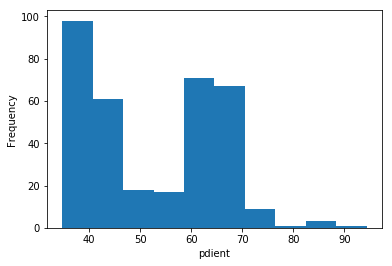

P16404	92	23	 Eukaryota	17


## Histograma pident homologos P16404

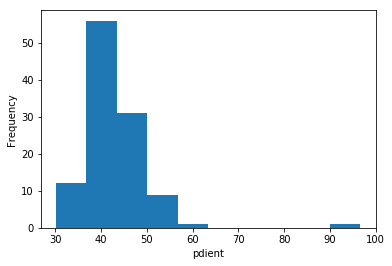

P02872	93	23	 Eukaryota	108


## Histograma pident homologos P02872

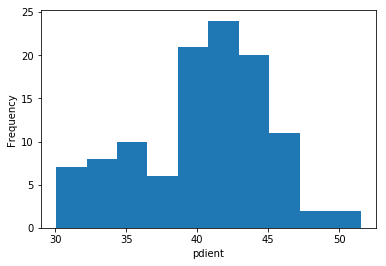

P28482	527	22	 Eukaryota	104


## Histograma pident homologos P28482

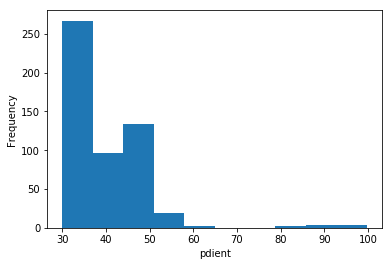

P40288	277	30	 Bacteria	16


## Histograma pident homologos P40288

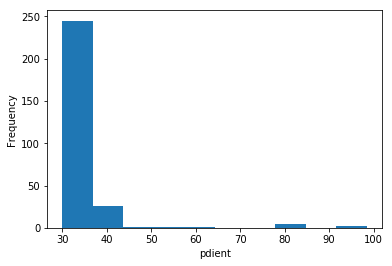

P20718	377	28	 Eukaryota	15


## Histograma pident homologos P20718

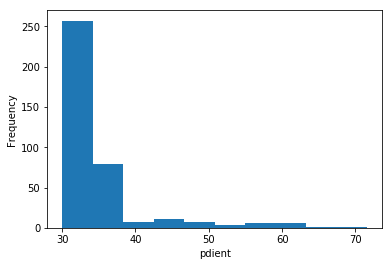

P69905	804	28	 Eukaryota	519


## Histograma pident homologos P69905

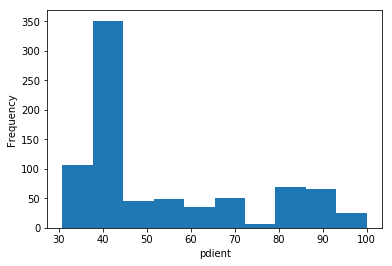

P07288	600	44	 Eukaryota	5


## Histograma pident homologos P07288

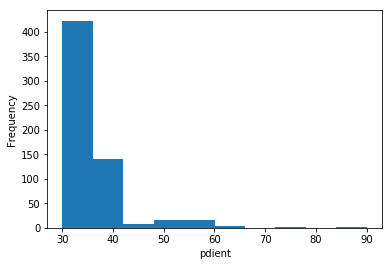

P51812	293	32	 Eukaryota	11


## Histograma pident homologos P51812

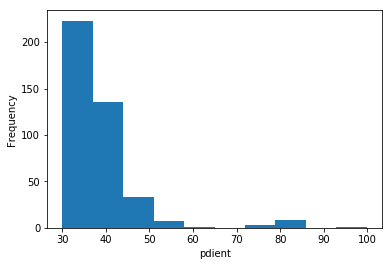

P01647	140	13	 Eukaryota	7


## Histograma pident homologos P01647

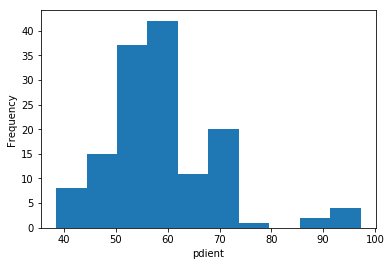

Q16651	99	11	 Eukaryota	10


## Histograma pident homologos Q16651

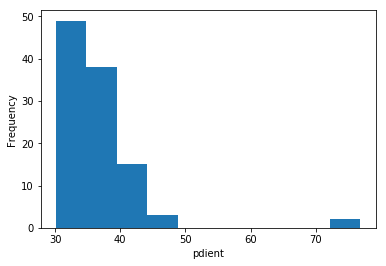

P9WJH7	744	19	 Bacteria	15


## Histograma pident homologos P9WJH7

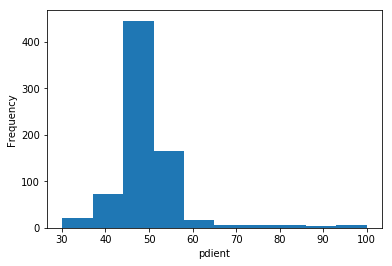

Q7NGR7	675	13	 Bacteria	6


## Histograma pident homologos Q7NGR7

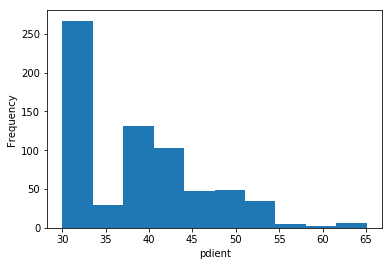

P25787	170	23	 Eukaryota	39


## Histograma pident homologos P25787

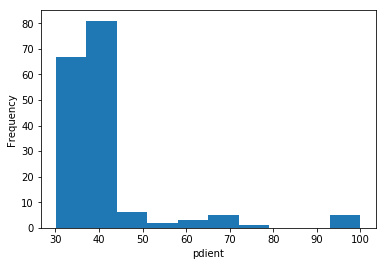

Q01939	120	13	 Eukaryota	9


## Histograma pident homologos Q01939

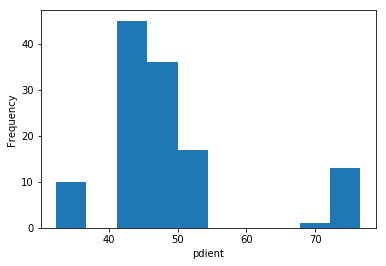

Q58806	345	17	 Archaea	8


## Histograma pident homologos Q58806

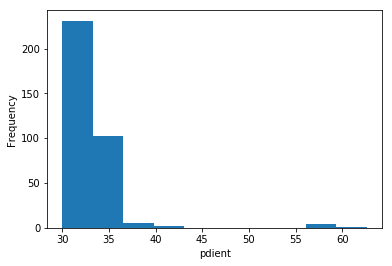

P01631	150	14	 Eukaryota	23


## Histograma pident homologos P01631

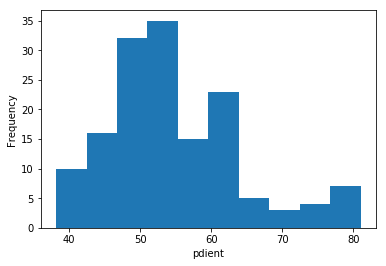

P07195	444	14	 Eukaryota	6


## Histograma pident homologos P07195

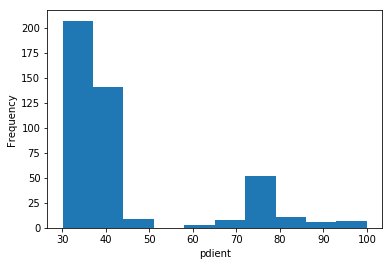

P08052	223	15	 Eukaryota	8


## Histograma pident homologos P08052

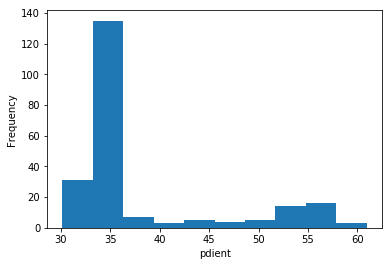

P48650	327	18	 Eukaryota	11


## Histograma pident homologos P48650

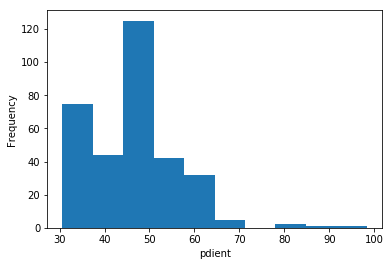

Q5KWZ7	998	11	 Bacteria	5


## Histograma pident homologos Q5KWZ7

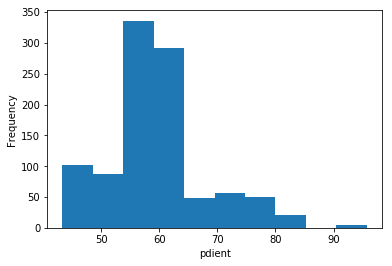

P01112	702	34	 Eukaryota	184


## Histograma pident homologos P01112

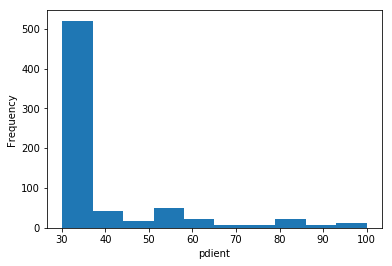

P00880	669	11	 Bacteria	12


## Histograma pident homologos P00880

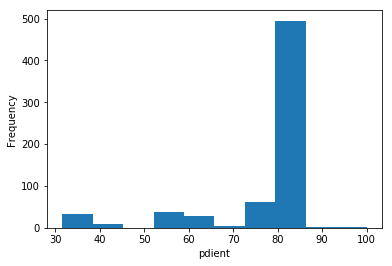

O08989	600	28	 Eukaryota	8


## Histograma pident homologos O08989

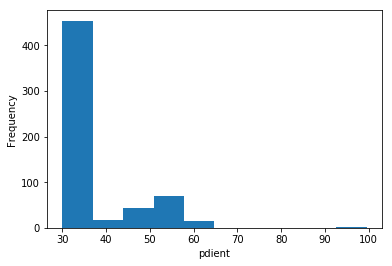

P84233	175	14	 Eukaryota	165


## Histograma pident homologos P84233

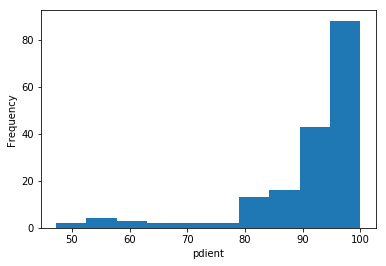

P0A251	115	15	 Bacteria	76


## Histograma pident homologos P0A251

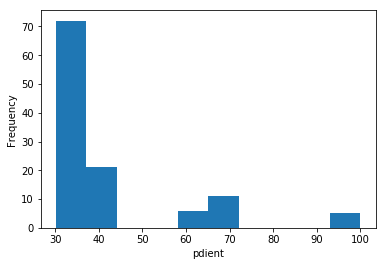

P18525	132	11	 Eukaryota	5


## Histograma pident homologos P18525

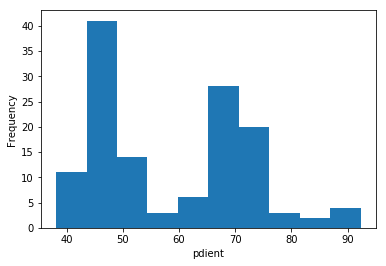

P81517	71	21	 Eukaryota	8


## Histograma pident homologos P81517

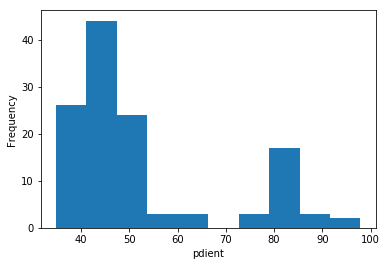

P81371	98	24	 Eukaryota	10


## Histograma pident homologos P81371

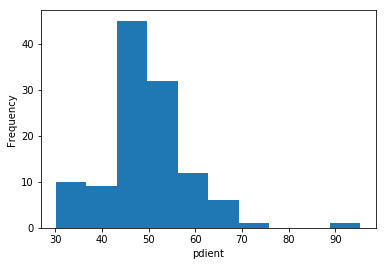

P14420	403	21	 Eukaryota	6


## Histograma pident homologos P14420

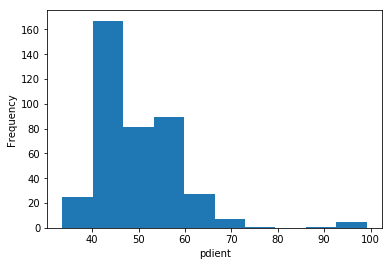

P25856	348	16	 Eukaryota	26


## Histograma pident homologos P25856

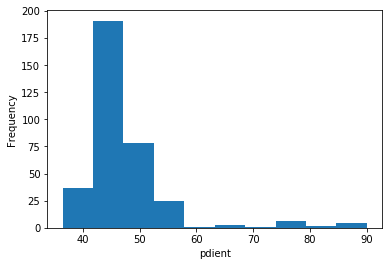

Q07661	738	19	 Eukaryota	12


## Histograma pident homologos Q07661

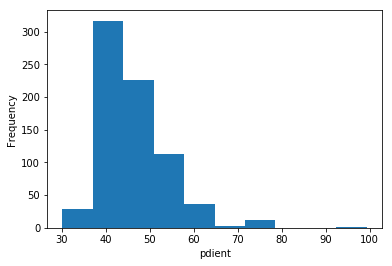

P60043	407	20	 Eukaryota	6


## Histograma pident homologos P60043

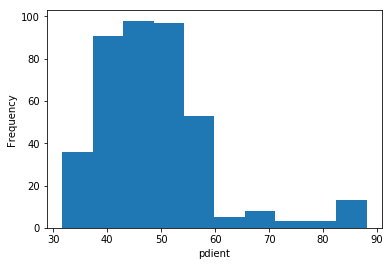

E3VWI3	39	11	 Bacteria	9


## Histograma pident homologos E3VWI3

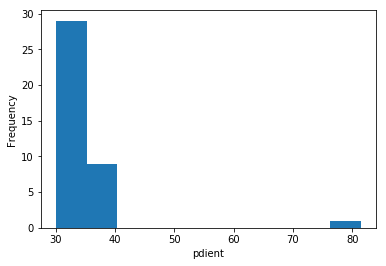

P27997	660	11	 Bacteria	8


## Histograma pident homologos P27997

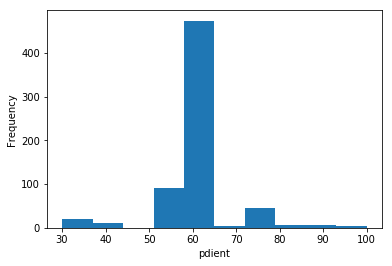

P0CI79	404	15	 Bacteria	11


## Histograma pident homologos P0CI79

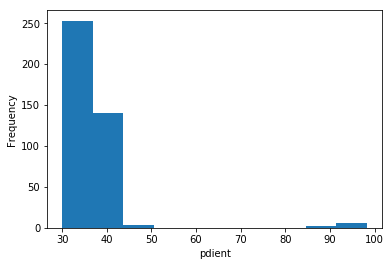

P51668	249	14	 Eukaryota	17


## Histograma pident homologos P51668

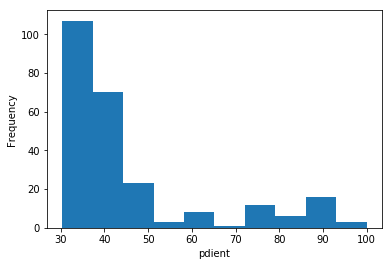

P52490	219	13	 Eukaryota	6


## Histograma pident homologos P52490

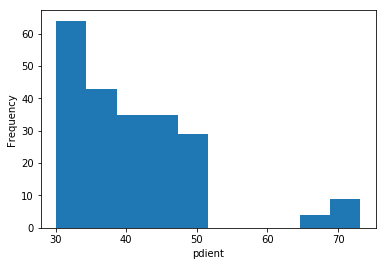

P0CG63	168	17	 Eukaryota	19


## Histograma pident homologos P0CG63

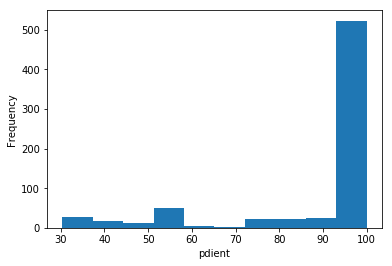

P0CH28	165	17	 Eukaryota	47


## Histograma pident homologos P0CH28

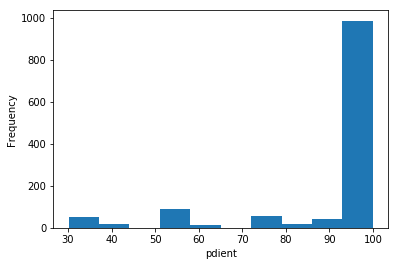

P61077	248	14	 Eukaryota	15


## Histograma pident homologos P61077

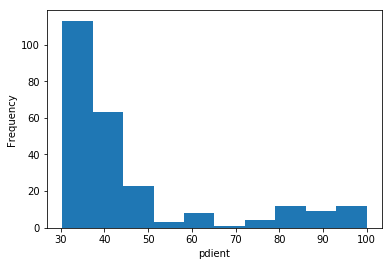

P07437	410	11	 Eukaryota	8


## Histograma pident homologos P07437

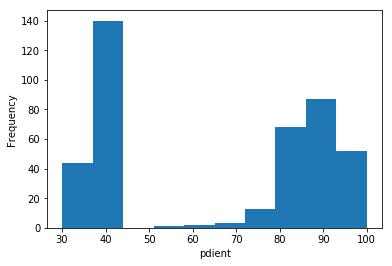

Q2HJ86	404	11	 Eukaryota	26


## Histograma pident homologos Q2HJ86

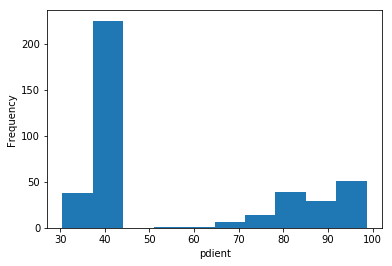

P00469	376	15	 Bacteria	51


## Histograma pident homologos P00469

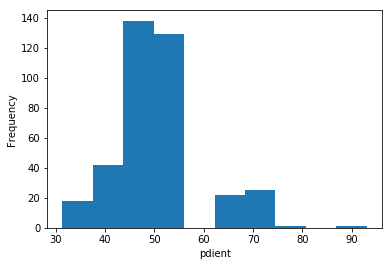

Q988B7	267	27	 Bacteria	12


## Histograma pident homologos Q988B7

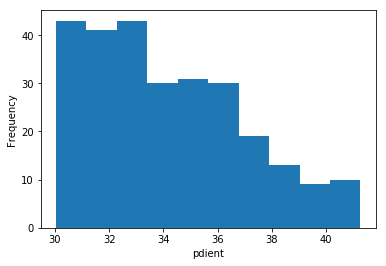

P04084	385	20	 Eukaryota	5


## Histograma pident homologos P04084

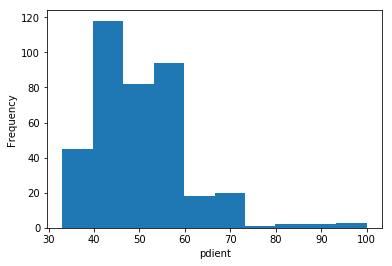

P9WG43	612	14	 Bacteria	6


## Histograma pident homologos P9WG43

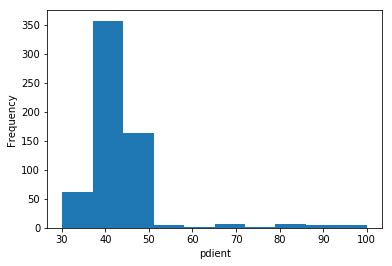

Q99714	159	25	 Eukaryota	7


## Histograma pident homologos Q99714

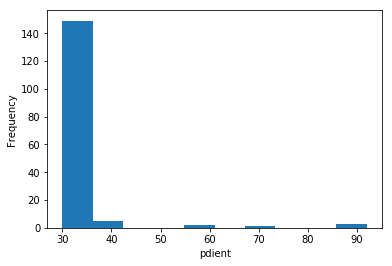

P02123	798	26	 Eukaryota	6


## Histograma pident homologos P02123

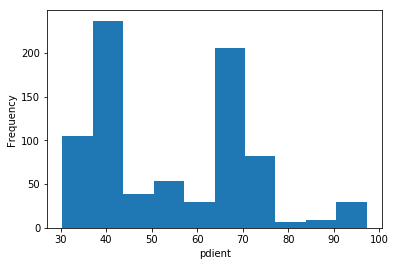

Q65NN2	432	18	 Bacteria	8


## Histograma pident homologos Q65NN2

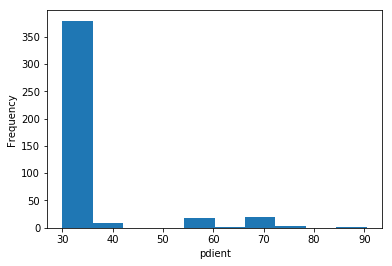

P04818	411	15	 Eukaryota	123


## Histograma pident homologos P04818

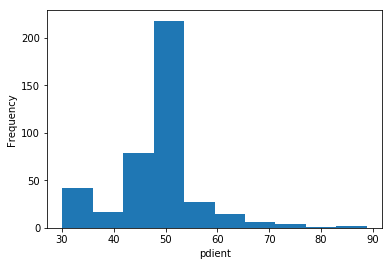

Q8GU20	187	12	 Eukaryota	8


## Histograma pident homologos Q8GU20

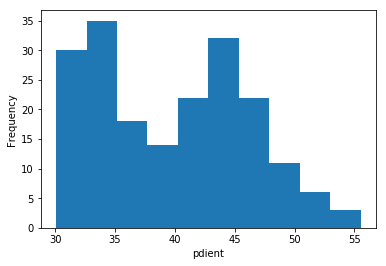

P00447	200	15	 Eukaryota	14


## Histograma pident homologos P00447

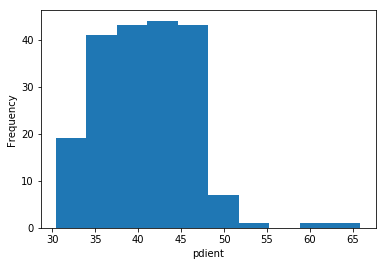

Q08713	206	15	 Archaea	6


## Histograma pident homologos Q08713

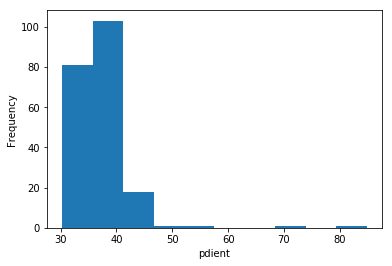

P84612	210	15	 Bacteria	20


## Histograma pident homologos P84612

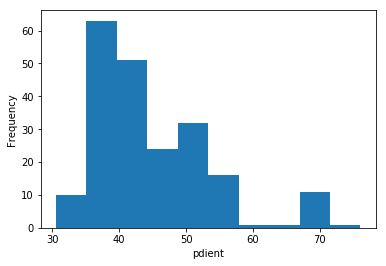

Q56WD9	287	12	 Eukaryota	5


## Histograma pident homologos Q56WD9

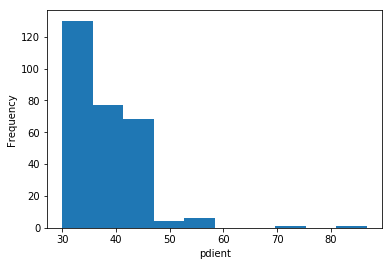

Q16539	522	27	 Eukaryota	243


## Histograma pident homologos Q16539

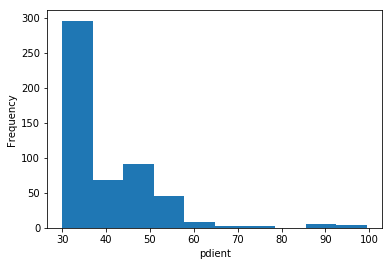

P06703	45	13	 Eukaryota	8


## Histograma pident homologos P06703

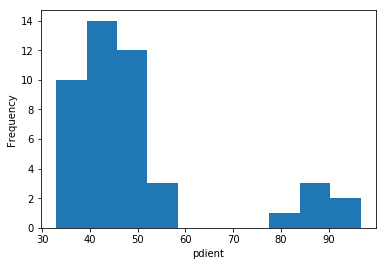

Q15661	636	52	 Eukaryota	44


## Histograma pident homologos Q15661

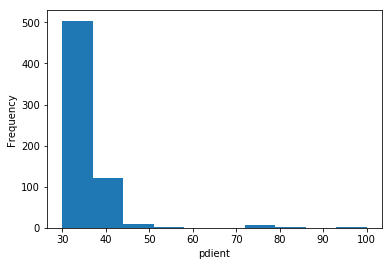

P0AA27	179	17	 Bacteria	17


## Histograma pident homologos P0AA27

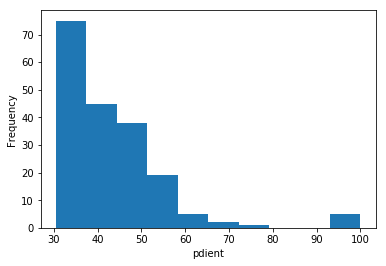

P0A0K6	180	15	 Bacteria	6


## Histograma pident homologos P0A0K6

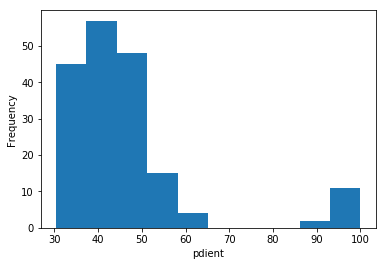

P24752	204	12	 Eukaryota	28


## Histograma pident homologos P24752

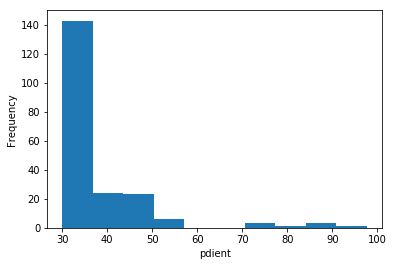

P45855	269	12	 Bacteria	8


## Histograma pident homologos P45855

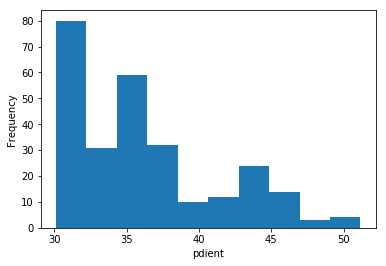

P09860	351	21	 Eukaryota	8


## Histograma pident homologos P09860

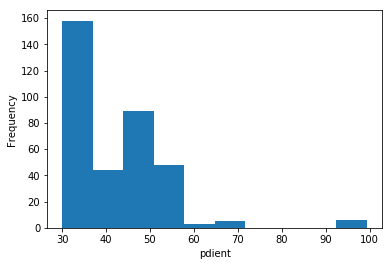

Q8NS38	402	15	 Bacteria	6


## Histograma pident homologos Q8NS38

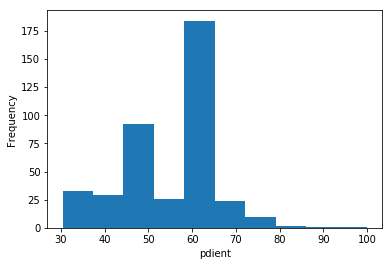

P14611	290	12	 Bacteria	16


## Histograma pident homologos P14611

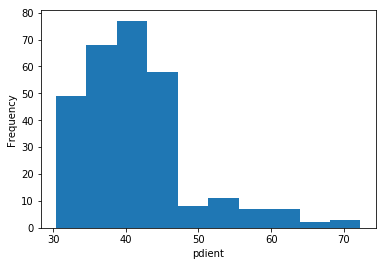

Q71U36	405	11	 Eukaryota	9


## Histograma pident homologos Q71U36

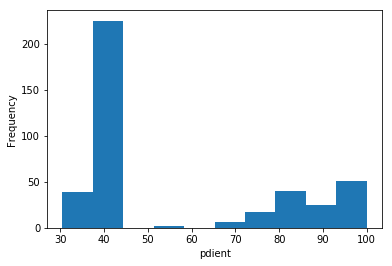

P00791	145	11	 Eukaryota	9


## Histograma pident homologos P00791

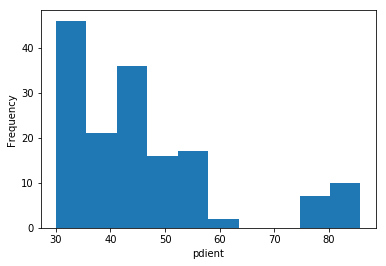

P28185	416	13	 Eukaryota	6


## Histograma pident homologos P28185

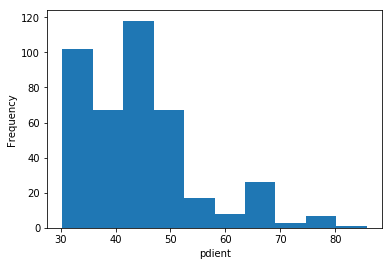

Q6B856	410	11	 Eukaryota	168


## Histograma pident homologos Q6B856

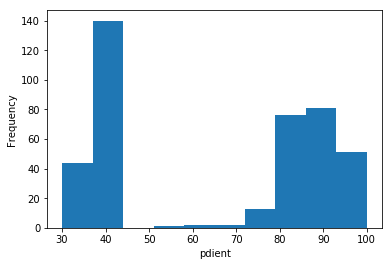

Q2XVP4	406	11	 Eukaryota	135


## Histograma pident homologos Q2XVP4

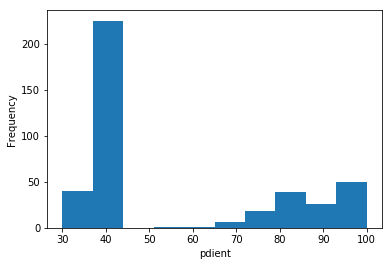

P35031	684	53	 Eukaryota	10


## Histograma pident homologos P35031

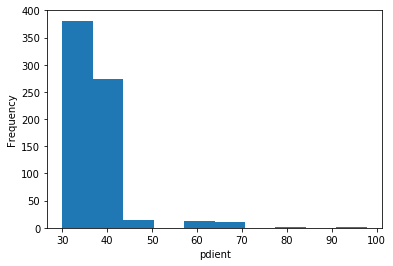

P81947	406	11	 Eukaryota	124


## Histograma pident homologos P81947

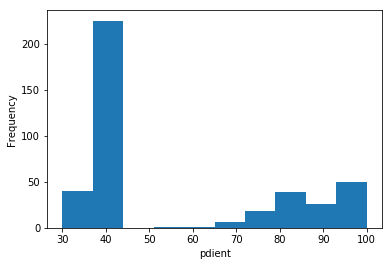

Q8IDR3	193	20	 Eukaryota	6


## Histograma pident homologos Q8IDR3

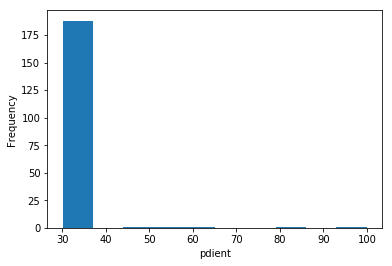

P04271	65	17	 Eukaryota	32


## Histograma pident homologos P04271

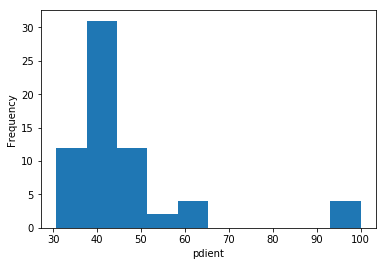

P02550	405	11	 Eukaryota	41


## Histograma pident homologos P02550

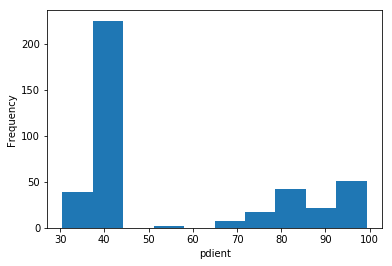

P00763	686	54	 Eukaryota	40


## Histograma pident homologos P00763

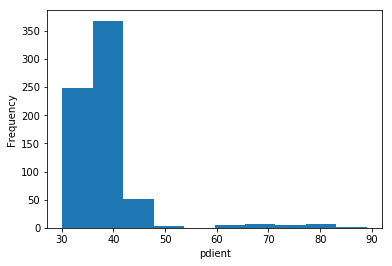

P04179	207	15	 Eukaryota	66


## Histograma pident homologos P04179

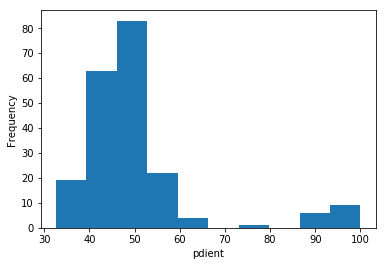

P19665	210	15	 Bacteria	12


## Histograma pident homologos P19665

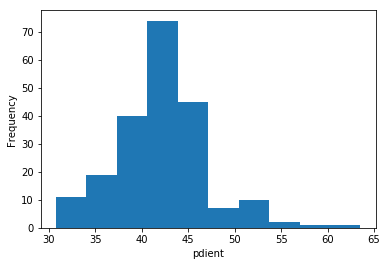

P63316	355	21	 Eukaryota	46


## Histograma pident homologos P63316

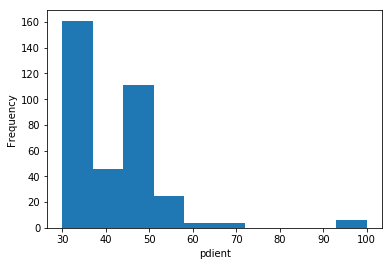

P35467	70	16	 Eukaryota	8


## Histograma pident homologos P35467

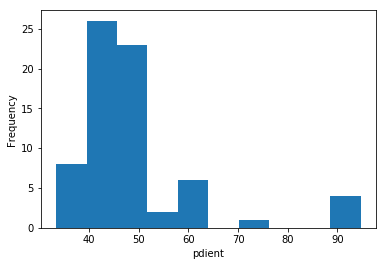

O93724	209	15	 Archaea	28


## Histograma pident homologos O93724

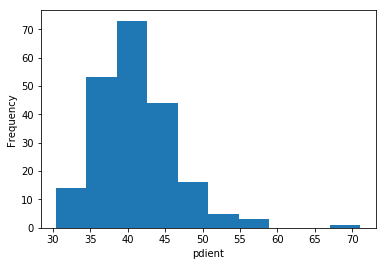

P00523	94	14	 Eukaryota	167


## Histograma pident homologos P00523

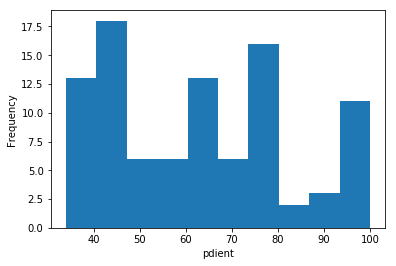

P11802	596	30	 Eukaryota	10


## Histograma pident homologos P11802

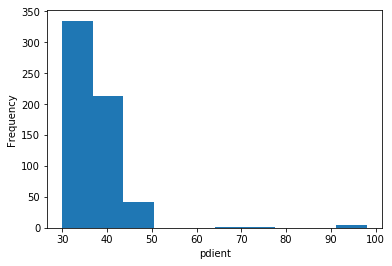

P81364	62	18	 Eukaryota	6


## Histograma pident homologos P81364

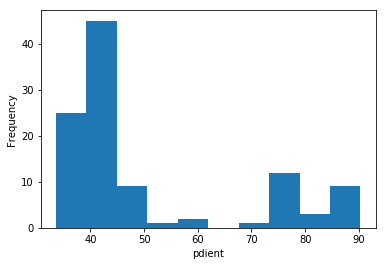

P00767	623	51	 Eukaryota	9


## Histograma pident homologos P00767

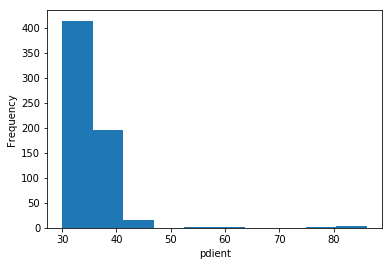

P0A6H0	761	19	 Bacteria	38


## Histograma pident homologos P0A6H0

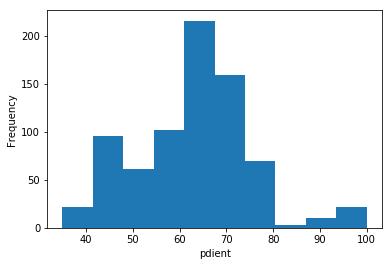

P00766	605	49	 Eukaryota	148


## Histograma pident homologos P00766

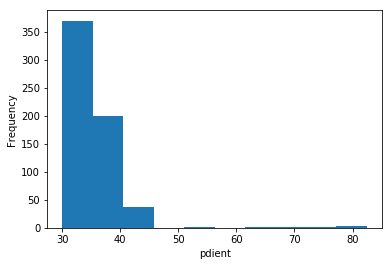

Q93X62	145	19	 Eukaryota	7


## Histograma pident homologos Q93X62

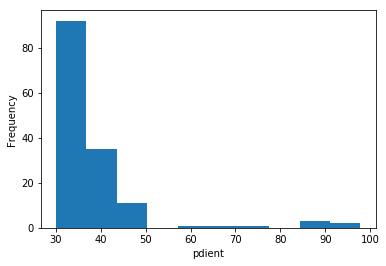

P00352	529	18	 Eukaryota	17


## Histograma pident homologos P00352

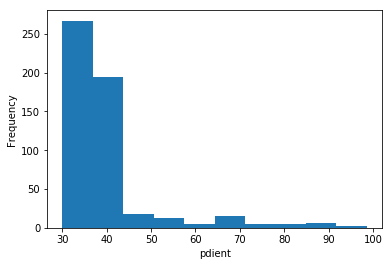

P16544	280	29	 Bacteria	24


## Histograma pident homologos P16544

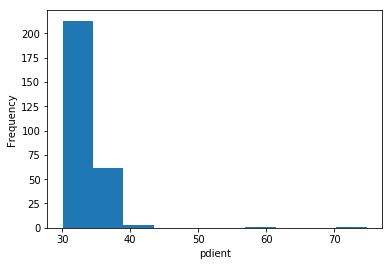

P06704	278	17	 Eukaryota	12


## Histograma pident homologos P06704

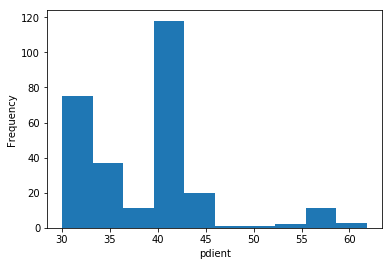

Q9HK01	466	16	 Archaea	16


## Histograma pident homologos Q9HK01

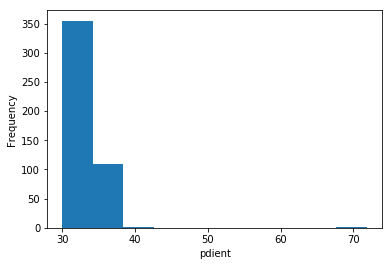

P0DP23	510	29	 Eukaryota	61


## Histograma pident homologos P0DP23

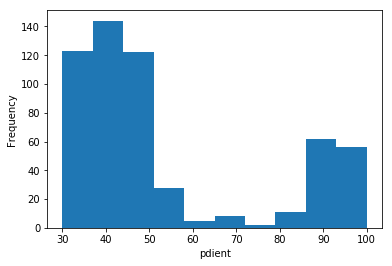

P0A6G7	761	19	 Bacteria	61


## Histograma pident homologos P0A6G7

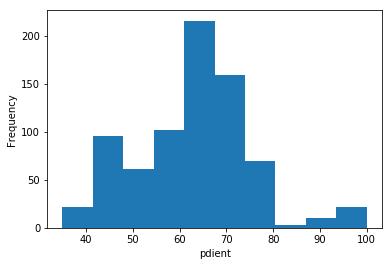

P30475	149	25	 Eukaryota	5


## Histograma pident homologos P30475

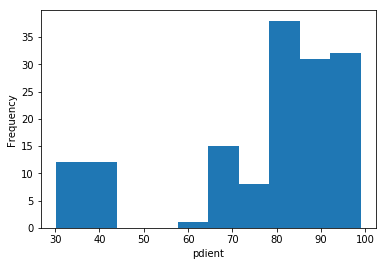

P71534	226	27	 Bacteria	10


## Histograma pident homologos P71534

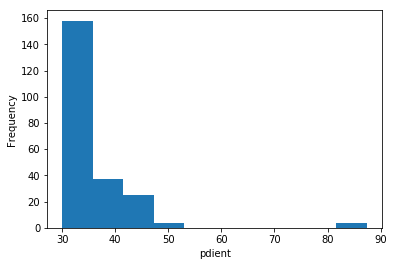

P0AEK3	361	34	 Bacteria	8


## Histograma pident homologos P0AEK3

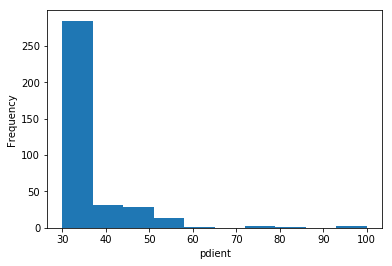

P00361	361	16	 Bacteria	12


## Histograma pident homologos P00361

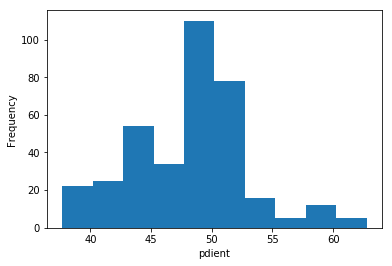

P60709	449	13	 Eukaryota	22


## Histograma pident homologos P60709

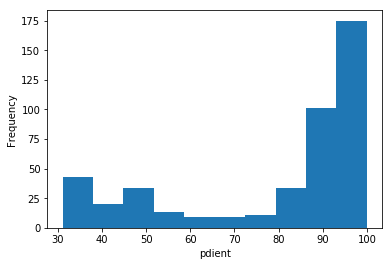

P76461	290	12	 Bacteria	12


## Histograma pident homologos P76461

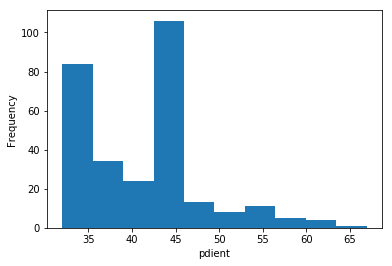

P9WPC3	759	19	 Bacteria	20


## Histograma pident homologos P9WPC3

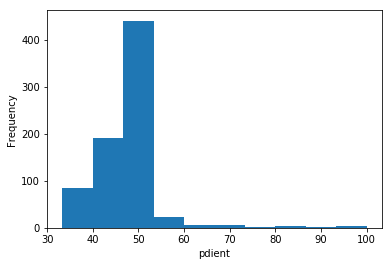

P63786	761	19	 Bacteria	49


## Histograma pident homologos P63786

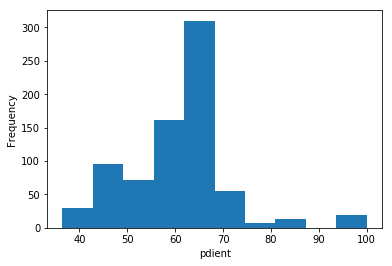

P18326	57	14	 Bacteria	6


## Histograma pident homologos P18326

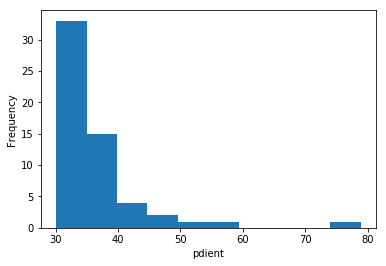

P28523	233	11	 Eukaryota	46


## Histograma pident homologos P28523

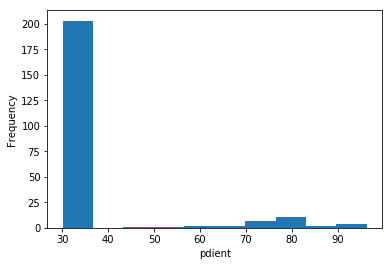

P22513	360	16	 Eukaryota	20


## Histograma pident homologos P22513

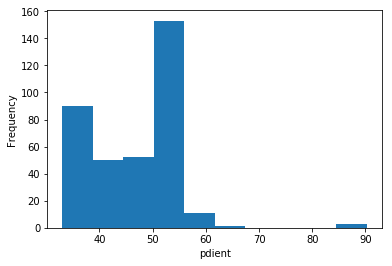

A6QF76	761	19	 Bacteria	14


## Histograma pident homologos A6QF76

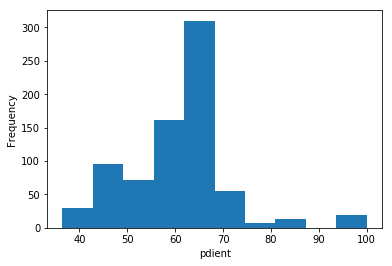

P39485	254	28	 Bacteria	12


## Histograma pident homologos P39485

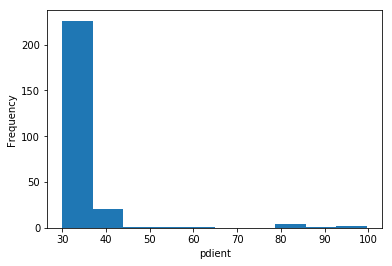

P01966	808	29	 Eukaryota	22


## Histograma pident homologos P01966

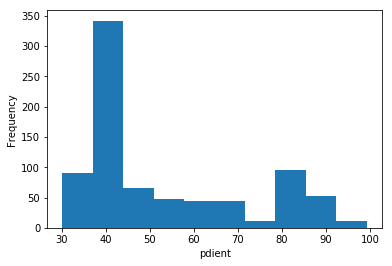

P07830	452	13	 Eukaryota	12


## Histograma pident homologos P07830

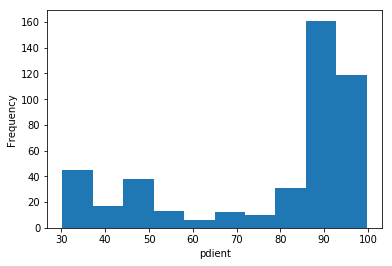

Q9KQH7	366	35	 Bacteria	13


## Histograma pident homologos Q9KQH7

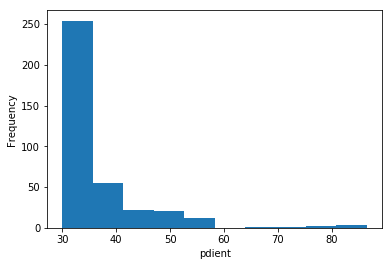

Q9ZNN8	261	27	 Bacteria	10


## Histograma pident homologos Q9ZNN8

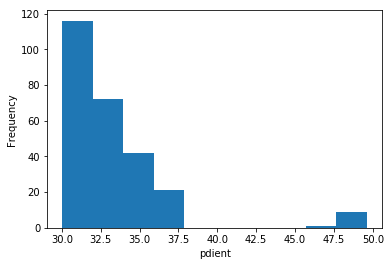

Q9KZF5	38	11	 Bacteria	5


## Histograma pident homologos Q9KZF5

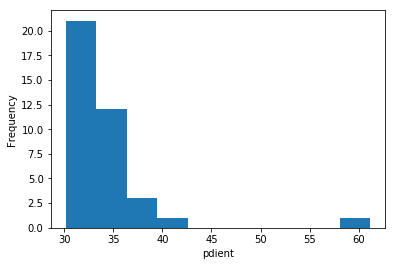

P0DP35	510	29	 Eukaryota	22


## Histograma pident homologos P0DP35

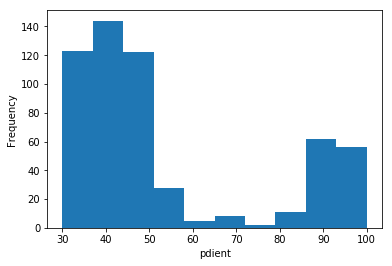

P62149	510	29	 Eukaryota	19


## Histograma pident homologos P62149

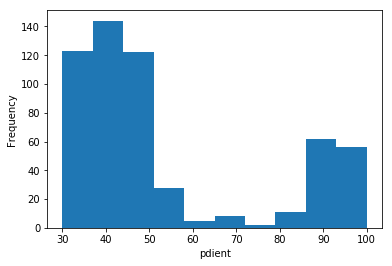

P49450	143	13	 Eukaryota	12


## Histograma pident homologos P49450

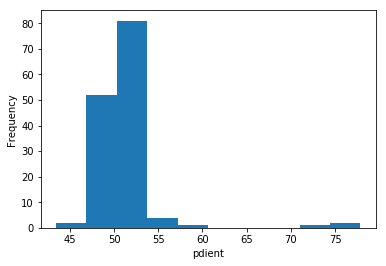

Q5NH47	762	19	 Bacteria	36


## Histograma pident homologos Q5NH47

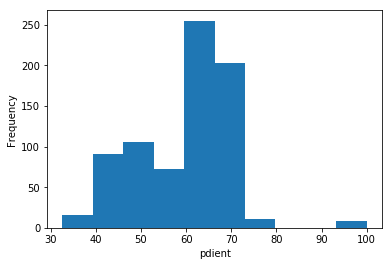

P0AET8	230	21	 Bacteria	6


## Histograma pident homologos P0AET8

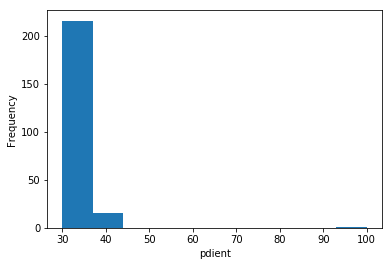

P30460	149	25	 Eukaryota	25


## Histograma pident homologos P30460

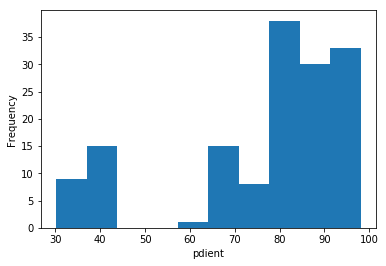

P15090	87	12	 Eukaryota	30


## Histograma pident homologos P15090

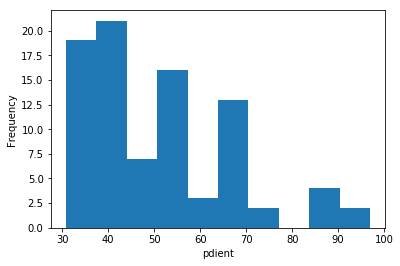

Q27890	360	16	 Eukaryota	24


## Histograma pident homologos Q27890

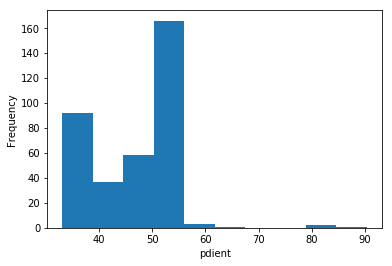

P12544	499	39	 Eukaryota	7


## Histograma pident homologos P12544

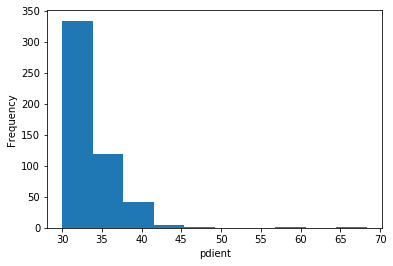

P06241	94	14	 Eukaryota	42


## Histograma pident homologos P06241

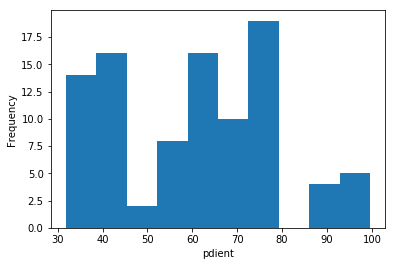

Q6GIL8	361	16	 Bacteria	44


## Histograma pident homologos Q6GIL8

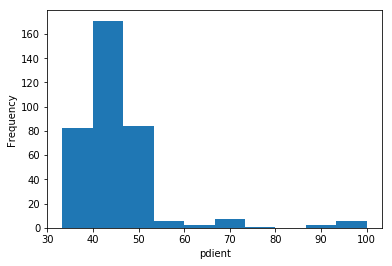

P11342	802	26	 Eukaryota	5


## Histograma pident homologos P11342

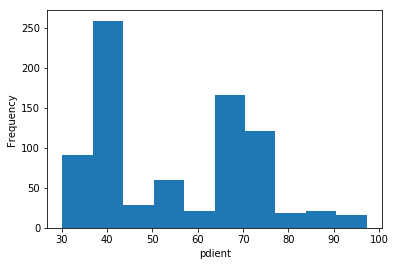

P47895	506	18	 Eukaryota	8


## Histograma pident homologos P47895

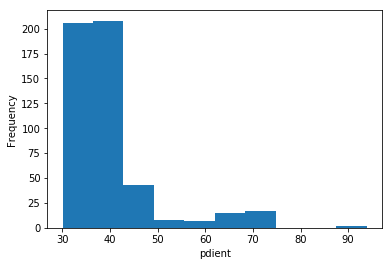

P02302	173	14	 Eukaryota	10


## Histograma pident homologos P02302

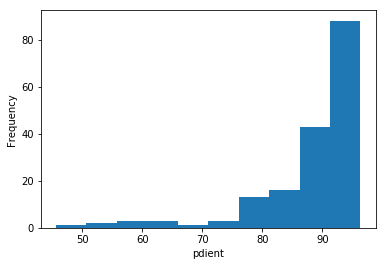

Q30201	146	24	 Eukaryota	5


## Histograma pident homologos Q30201

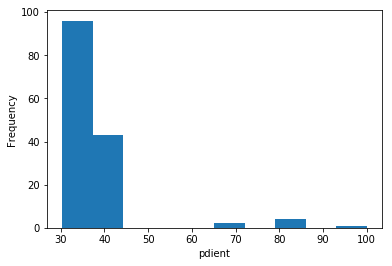

P30443	147	24	 Eukaryota	9


## Histograma pident homologos P30443

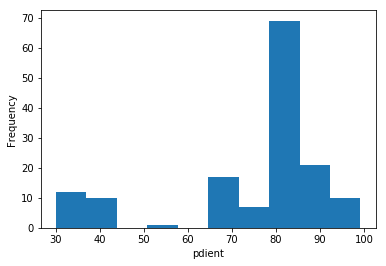

P56876	84	12	 Bacteria	10


## Histograma pident homologos P56876

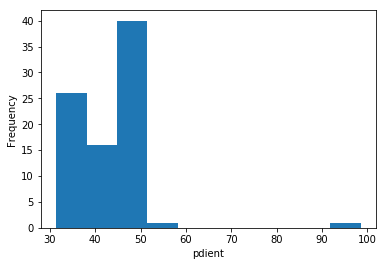

P80428	313	11	 Eukaryota	7


## Histograma pident homologos P80428

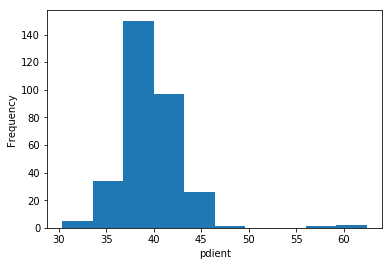

P56156	762	19	 Bacteria	44


## Histograma pident homologos P56156

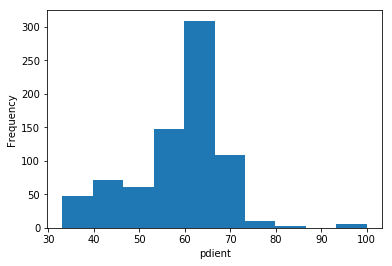

A9NDG0	761	19	 Bacteria	5


## Histograma pident homologos A9NDG0

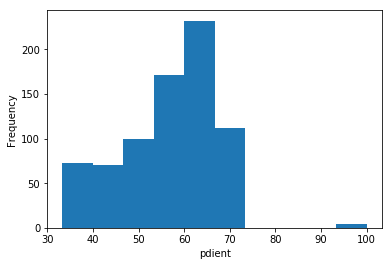

P81461	72	20	 Eukaryota	17


## Histograma pident homologos P81461

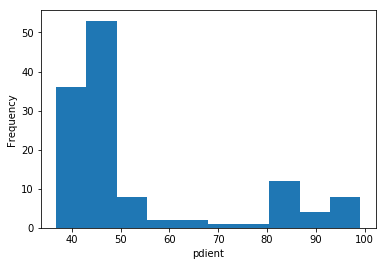

P0A6Y8	998	11	 Bacteria	76


## Histograma pident homologos P0A6Y8

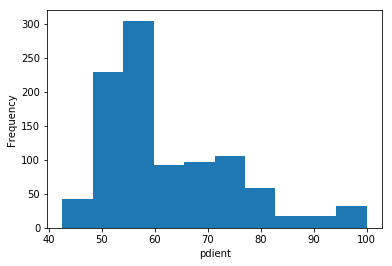

Q5HFV4	741	19	 Bacteria	38


## Histograma pident homologos Q5HFV4

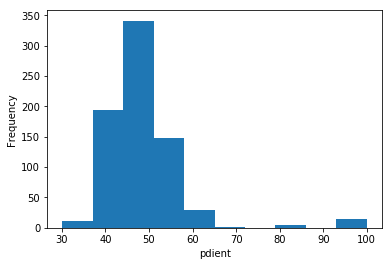

P00593	363	16	 Eukaryota	33


## Histograma pident homologos P00593

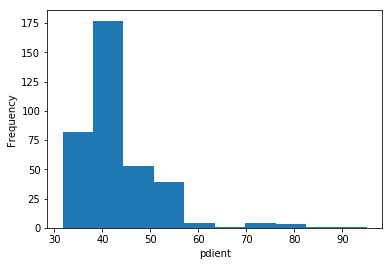

P00875	667	11	 Eukaryota	49


## Histograma pident homologos P00875

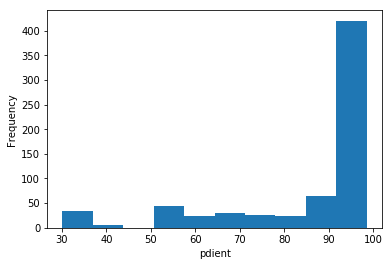

Q90249	298	19	 Eukaryota	20


## Histograma pident homologos Q90249

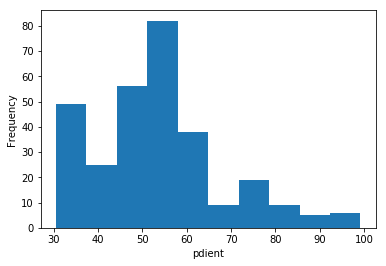

P33764	36	12	 Eukaryota	14


## Histograma pident homologos P33764

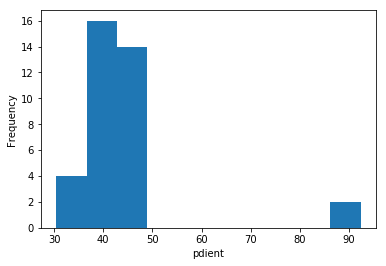

P10599	157	13	 Eukaryota	58


## Histograma pident homologos P10599

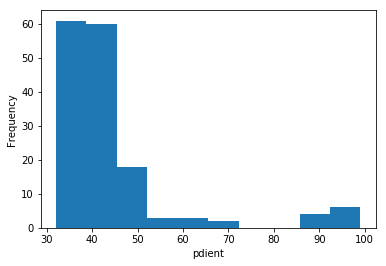

P61112	151	12	 Archaea	20


## Histograma pident homologos P61112

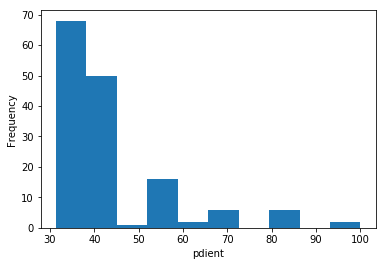

P50921	607	14	 Bacteria	16


## Histograma pident homologos P50921

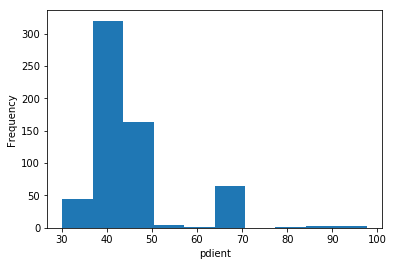

P45352	411	15	 Eukaryota	6


## Histograma pident homologos P45352

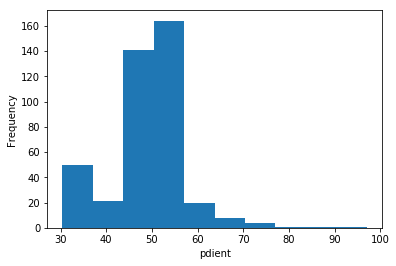

P0A884	433	15	 Bacteria	116


## Histograma pident homologos P0A884

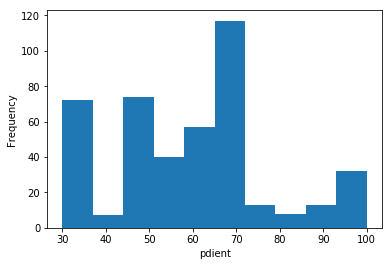

P29508	191	14	 Eukaryota	5


## Histograma pident homologos P29508

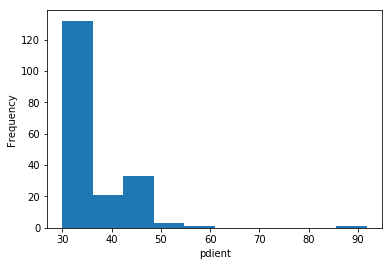

P13100	404	15	 Eukaryota	6


## Histograma pident homologos P13100

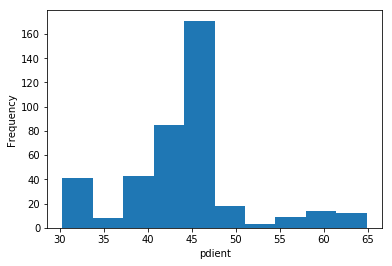

P29034	55	15	 Eukaryota	6


## Histograma pident homologos P29034

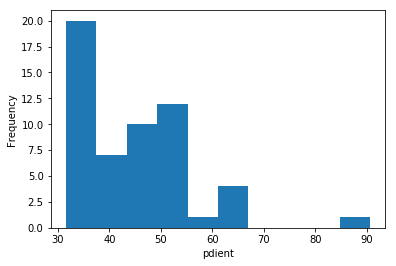

P33763	42	13	 Eukaryota	6


## Histograma pident homologos P33763

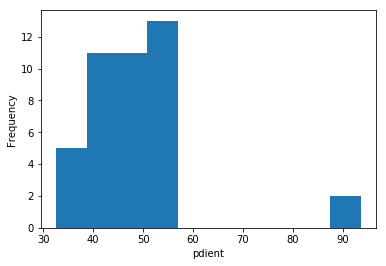

P07607	411	15	 Eukaryota	20


## Histograma pident homologos P07607

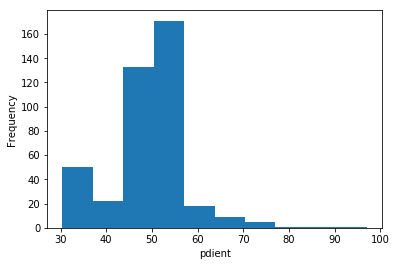

P25815	63	16	 Eukaryota	5


## Histograma pident homologos P25815

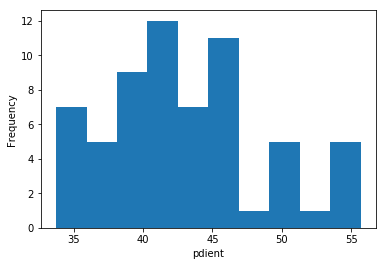

Q9V2T8	149	12	 Archaea	8


## Histograma pident homologos Q9V2T8

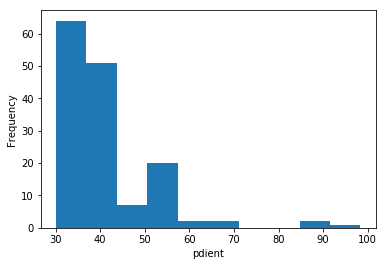

P14949	165	14	 Bacteria	5


## Histograma pident homologos P14949

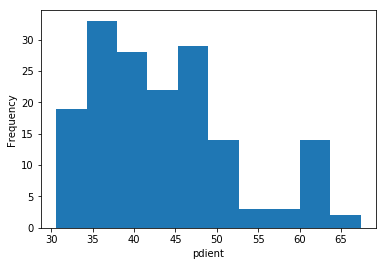

O53871	206	11	 Bacteria	6


## Histograma pident homologos O53871

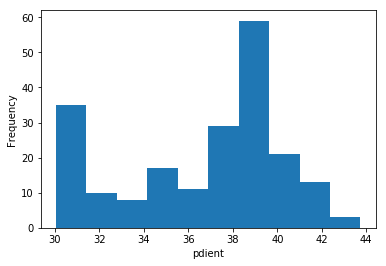

P63359	326	12	 Bacteria	12


## Histograma pident homologos P63359

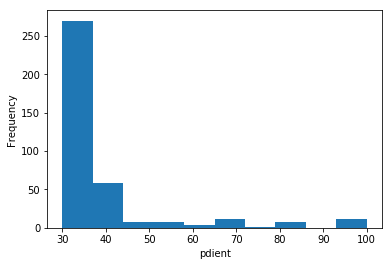

Q15843	162	15	 Eukaryota	40


## Histograma pident homologos Q15843

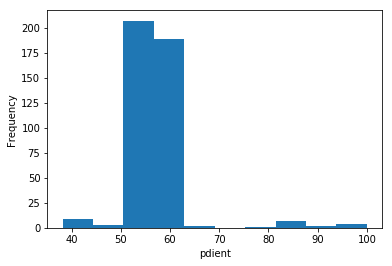

Q9Z0Y9	119	14	 Eukaryota	7


## Histograma pident homologos Q9Z0Y9

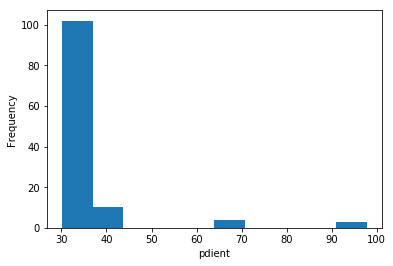

P0AA25	179	17	 Bacteria	89


## Histograma pident homologos P0AA25

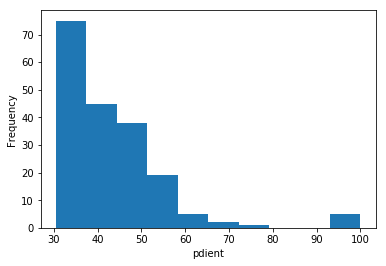

P42765	262	12	 Eukaryota	8


## Histograma pident homologos P42765

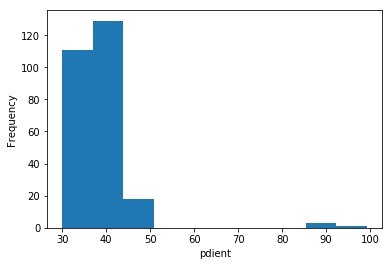

P02588	408	23	 Eukaryota	33


## Histograma pident homologos P02588

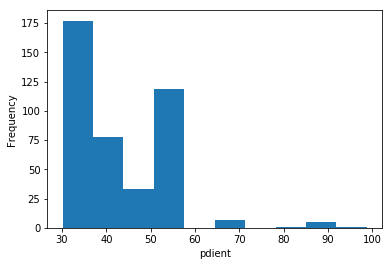

P47811	521	24	 Eukaryota	38


## Histograma pident homologos P47811

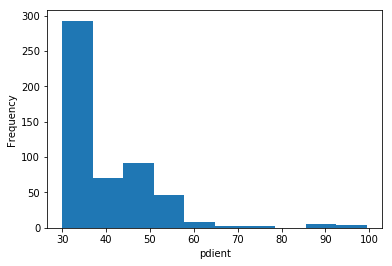

P09455	76	11	 Eukaryota	11


## Histograma pident homologos P09455

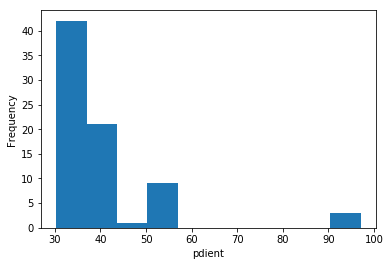

P0CG47	170	17	 Eukaryota	195


## Histograma pident homologos P0CG47

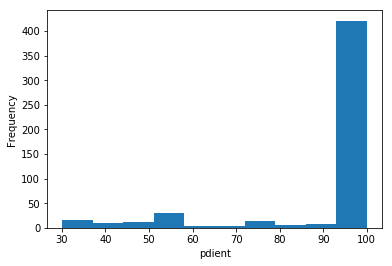

P51649	469	15	 Eukaryota	5


## Histograma pident homologos P51649

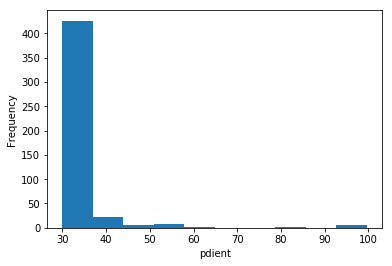

P20338	437	19	 Eukaryota	8


## Histograma pident homologos P20338

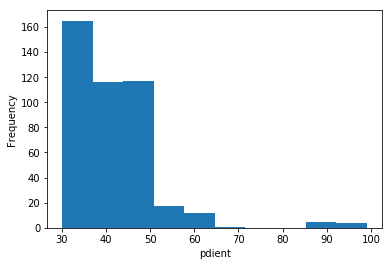

P62491	441	15	 Eukaryota	60


## Histograma pident homologos P62491

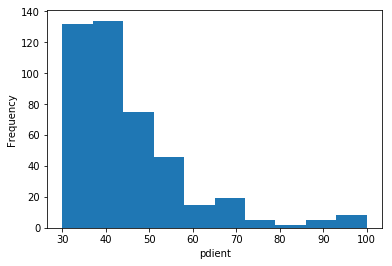

Q99P58	521	25	 Eukaryota	6


## Histograma pident homologos Q99P58

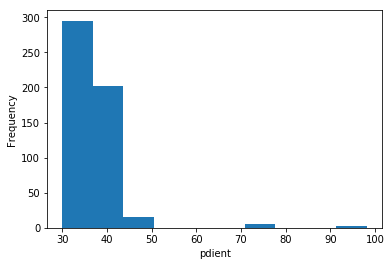

P61006	643	28	 Eukaryota	22


## Histograma pident homologos P61006

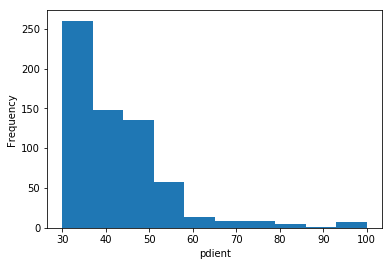

Q8DIS5	670	11	 Bacteria	12


## Histograma pident homologos Q8DIS5

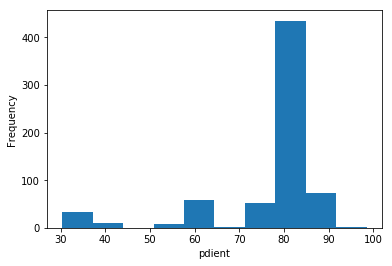

Q6YNR6	65	17	 Eukaryota	9


## Histograma pident homologos Q6YNR6

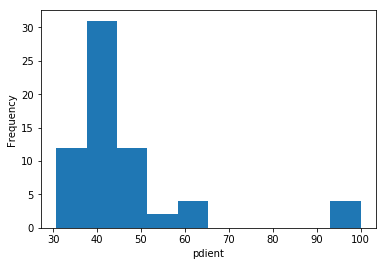

P30801	43	12	 Eukaryota	10


## Histograma pident homologos P30801

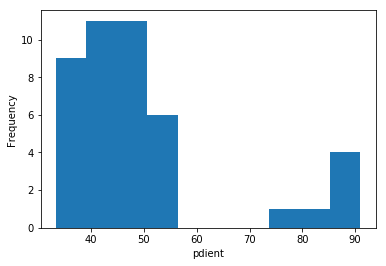

P41977	207	15	 Eukaryota	8


## Histograma pident homologos P41977

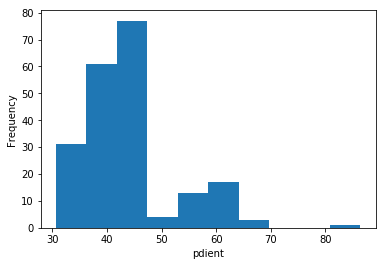

Q5P5I4	282	25	 Bacteria	6


## Histograma pident homologos Q5P5I4

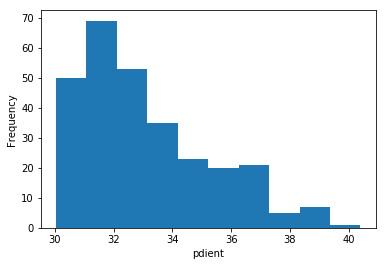

P61225	647	33	 Eukaryota	24


## Histograma pident homologos P61225

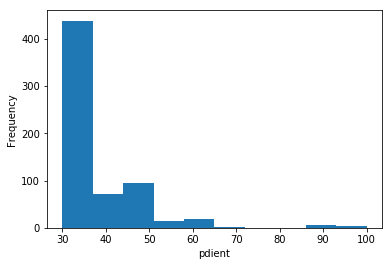

P0AEK2	361	34	 Bacteria	8


## Histograma pident homologos P0AEK2

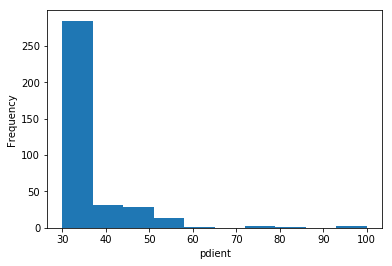

P0A252	115	15	 Bacteria	38


## Histograma pident homologos P0A252

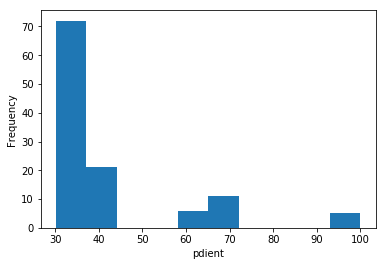

Q59931	396	16	 Bacteria	28


## Histograma pident homologos Q59931

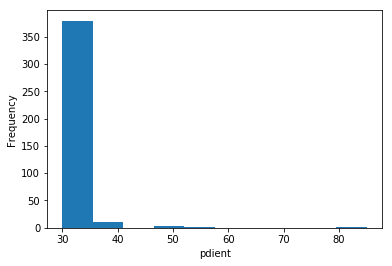

O70351	136	17	 Eukaryota	12


## Histograma pident homologos O70351

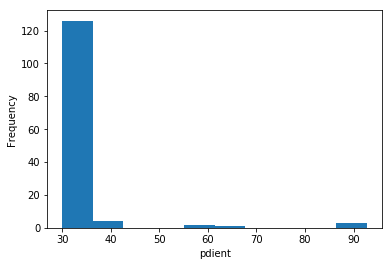

P01901	144	24	 Eukaryota	101


## Histograma pident homologos P01901

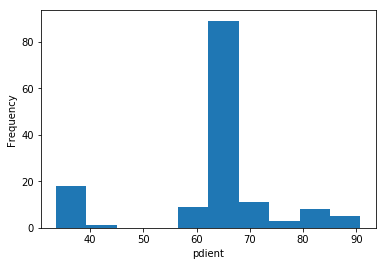

P02118	801	26	 Eukaryota	6


## Histograma pident homologos P02118

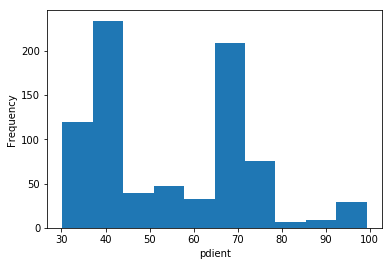

P01892	146	24	 Eukaryota	402


## Histograma pident homologos P01892

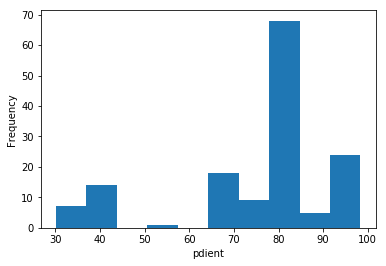

P23946	412	34	 Eukaryota	24


## Histograma pident homologos P23946

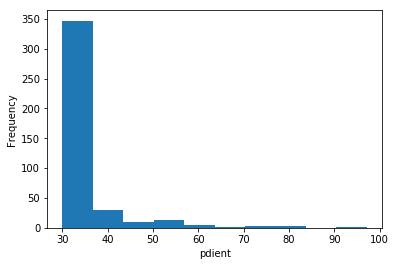

Q2YSF8	761	19	 Bacteria	14


## Histograma pident homologos Q2YSF8

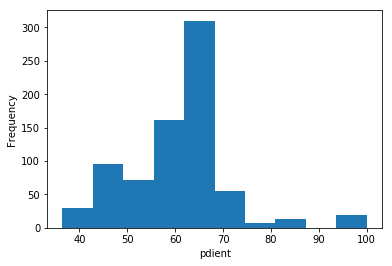

P9WPN8	59	14	 Bacteria	6


## Histograma pident homologos P9WPN8

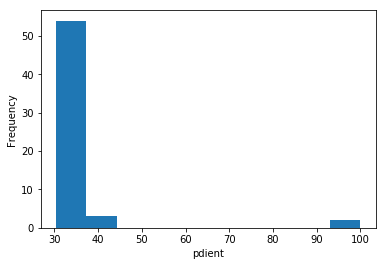

P18465	146	24	 Eukaryota	29


## Histograma pident homologos P18465

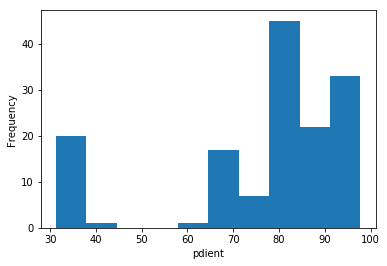

P63261	450	13	 Eukaryota	5


## Histograma pident homologos P63261

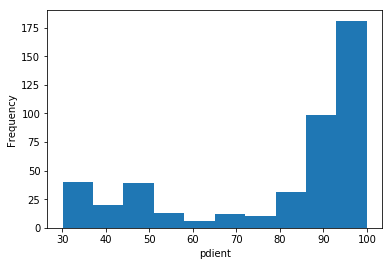

P02866	89	23	 Eukaryota	130


## Histograma pident homologos P02866

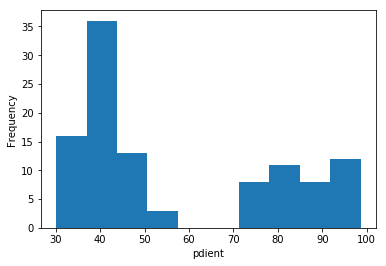

P10987	450	13	 Eukaryota	22


## Histograma pident homologos P10987

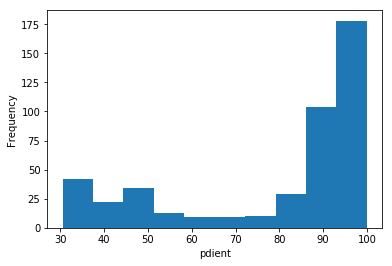

P86287	446	13	 Eukaryota	6


## Histograma pident homologos P86287

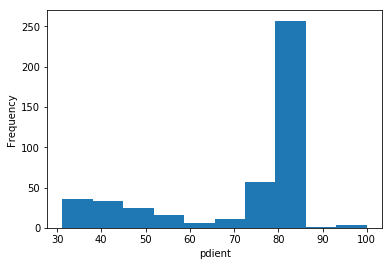

P11884	472	17	 Eukaryota	20


## Histograma pident homologos P11884

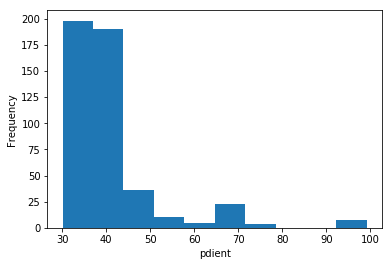

P68139	450	13	 Eukaryota	8


## Histograma pident homologos P68139

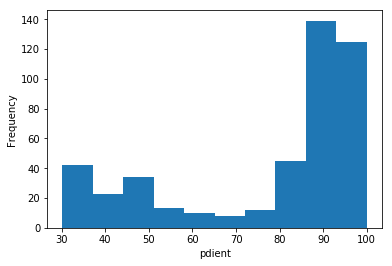

Q83DJ2	761	19	 Bacteria	9


## Histograma pident homologos Q83DJ2

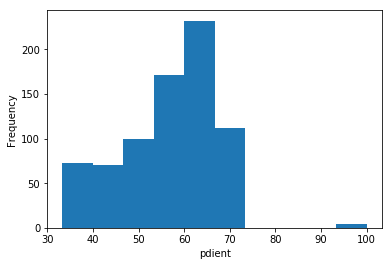

P9WPC5	761	19	 Bacteria	58


## Histograma pident homologos P9WPC5

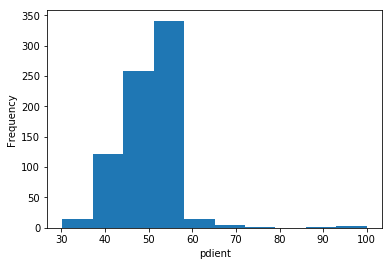

P06493	651	34	 Eukaryota	9


## Histograma pident homologos P06493

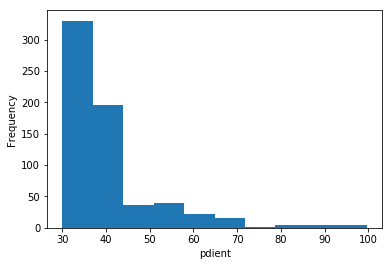

Q6P823	174	14	 Eukaryota	5


## Histograma pident homologos Q6P823

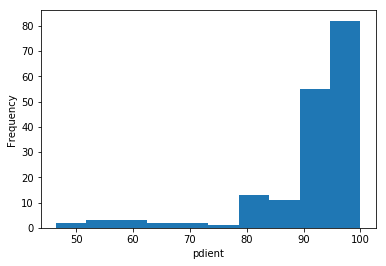

P0CH25	809	28	 Eukaryota	5


## Histograma pident homologos P0CH25

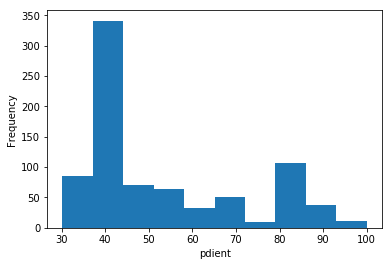

P30464	147	24	 Eukaryota	5


## Histograma pident homologos P30464

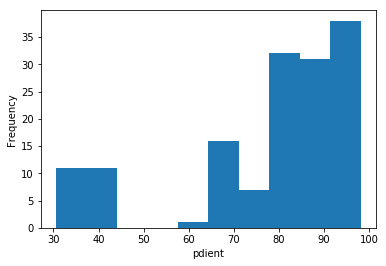

Q00441	70	14	 Bacteria	9


## Histograma pident homologos Q00441

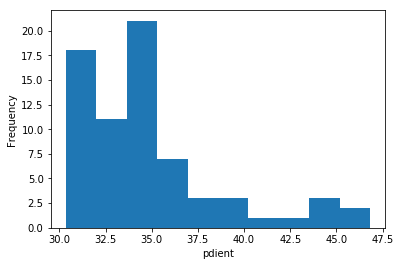

Q92506	245	25	 Eukaryota	20


## Histograma pident homologos Q92506

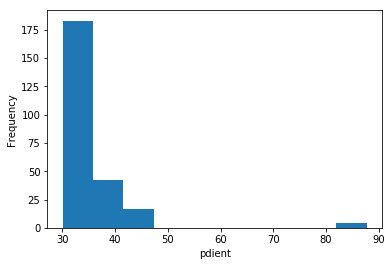

Q921J2	580	25	 Eukaryota	6


## Histograma pident homologos Q921J2

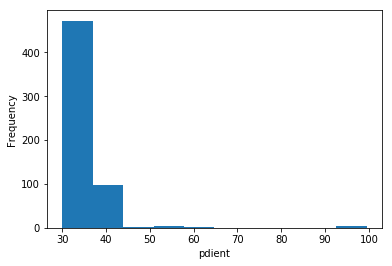

P40303	157	20	 Eukaryota	494


## Histograma pident homologos P40303

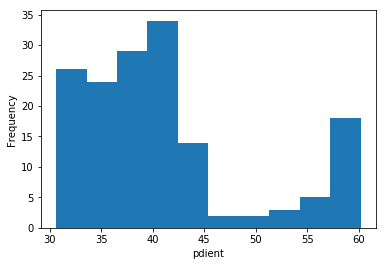

P20339	499	23	 Eukaryota	21


## Histograma pident homologos P20339

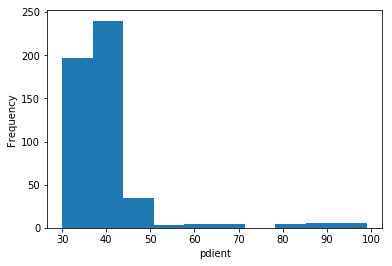

Q6QAQ1	449	13	 Eukaryota	5


## Histograma pident homologos Q6QAQ1

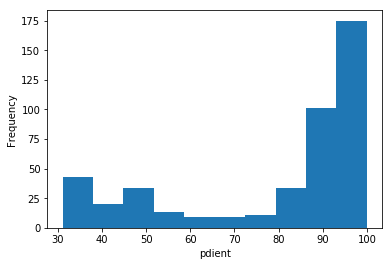

P0AE08	116	15	 Bacteria	20


## Histograma pident homologos P0AE08

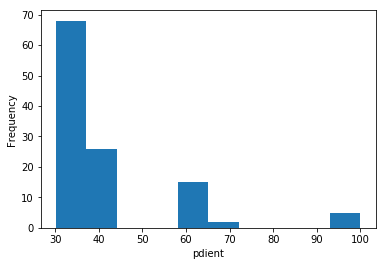

P59226	175	14	 Eukaryota	12


## Histograma pident homologos P59226

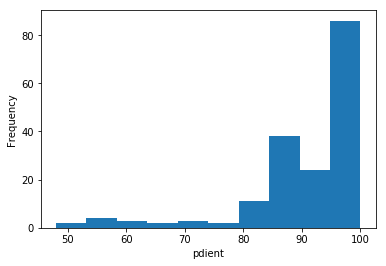

P01654	161	15	 Eukaryota	6


## Histograma pident homologos P01654

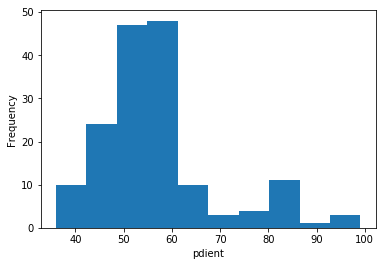

Q2YLR9	554	16	 Bacteria	7


## Histograma pident homologos Q2YLR9

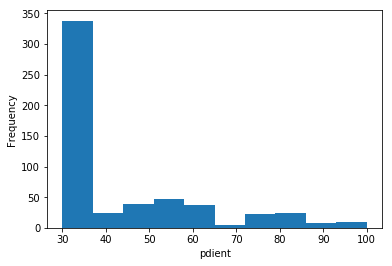

O35627	70	13	 Eukaryota	6


## Histograma pident homologos O35627

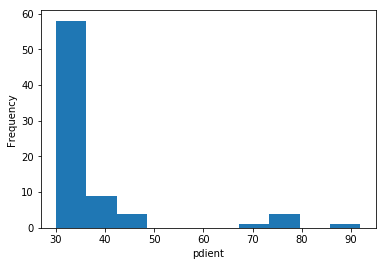

P07560	451	19	 Eukaryota	12


## Histograma pident homologos P07560

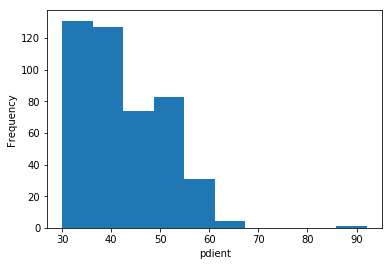

P04717	669	11	 Eukaryota	8


## Histograma pident homologos P04717

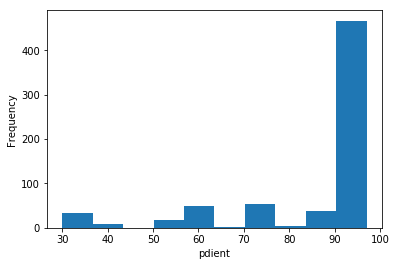

P10276	65	11	 Eukaryota	9


## Histograma pident homologos P10276

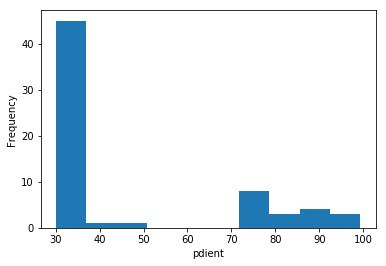

P61586	516	23	 Eukaryota	66


## Histograma pident homologos P61586

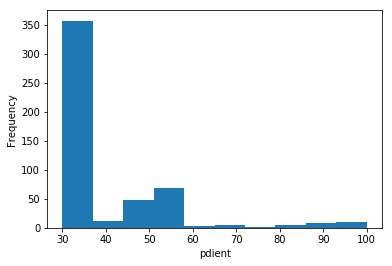

P63086	529	22	 Eukaryota	46


## Histograma pident homologos P63086

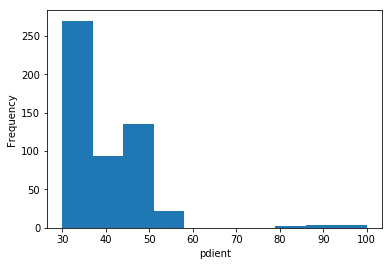

P62820	706	32	 Eukaryota	20


## Histograma pident homologos P62820

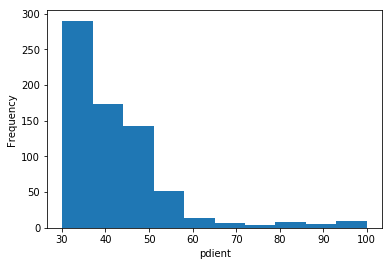

P45718	798	27	 Eukaryota	11


## Histograma pident homologos P45718

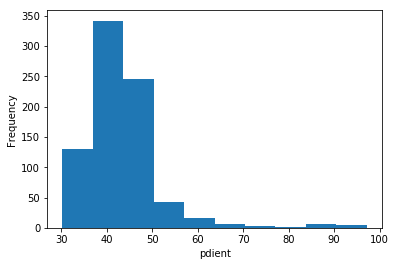

Q13133	109	13	 Eukaryota	11


## Histograma pident homologos Q13133

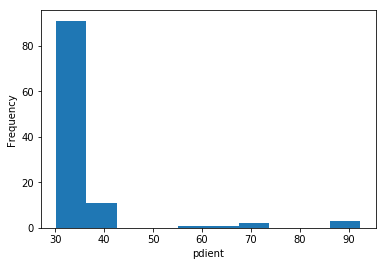

P63000	290	13	 Eukaryota	53


## Histograma pident homologos P63000

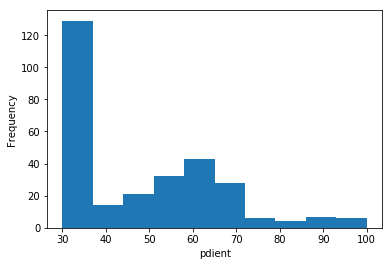

P11309	245	14	 Eukaryota	154


## Histograma pident homologos P11309

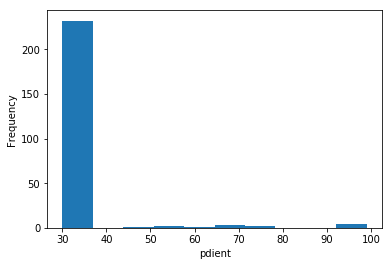

P54375	208	15	 Bacteria	8


## Histograma pident homologos P54375

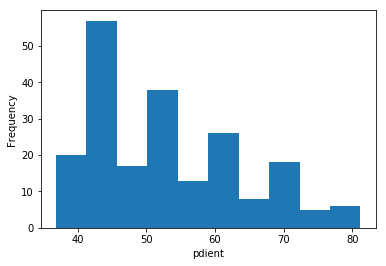

P80293	210	15	 Bacteria	12


## Histograma pident homologos P80293

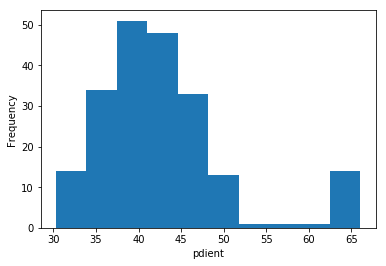

P26447	59	15	 Eukaryota	60


## Histograma pident homologos P26447

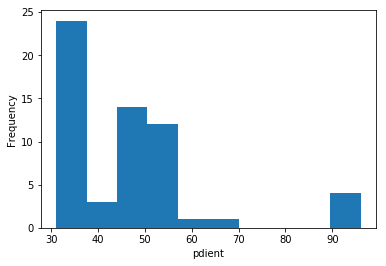

Q9Y8H8	210	15	 Archaea	12


## Histograma pident homologos Q9Y8H8

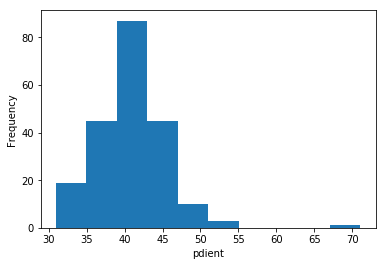

Q5NII7	616	14	 Bacteria	6


## Histograma pident homologos Q5NII7

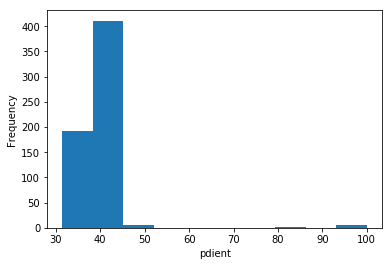

Q8VDF3	203	17	 Eukaryota	6


## Histograma pident homologos Q8VDF3

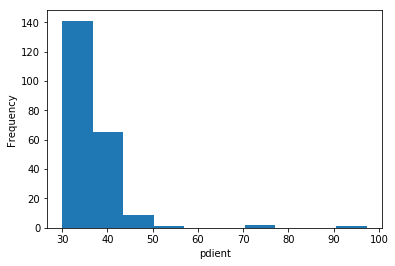

P9WIT9	595	12	 Bacteria	9


## Histograma pident homologos P9WIT9

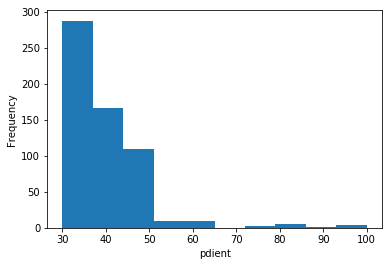

P29373	92	13	 Eukaryota	75


## Histograma pident homologos P29373

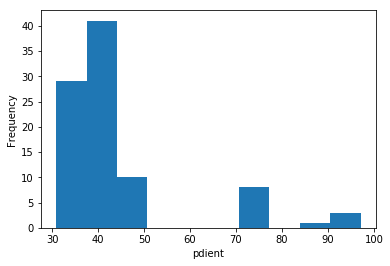

P00876	669	11	 Eukaryota	9


## Histograma pident homologos P00876

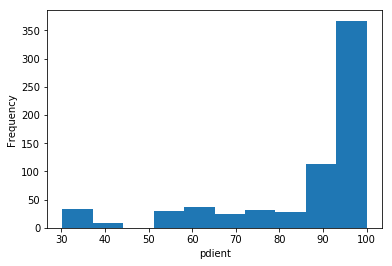

P68363	406	11	 Eukaryota	9


## Histograma pident homologos P68363

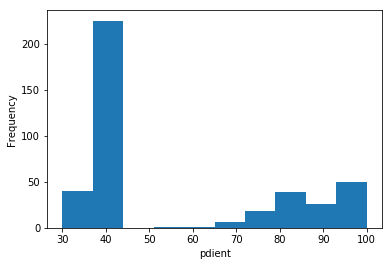

P09733	409	11	 Eukaryota	5


## Histograma pident homologos P09733

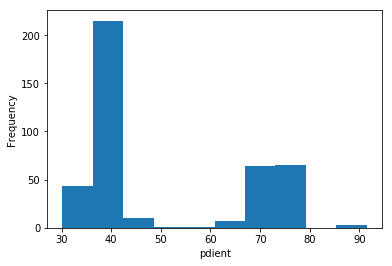

P50163	178	15	 Eukaryota	7


## Histograma pident homologos P50163

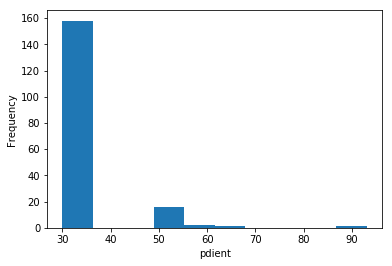

P68197	173	16	 Eukaryota	5


## Histograma pident homologos P68197

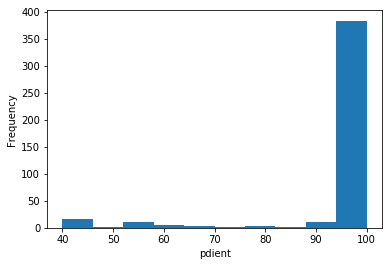

Q834R3	376	15	 Bacteria	12


## Histograma pident homologos Q834R3

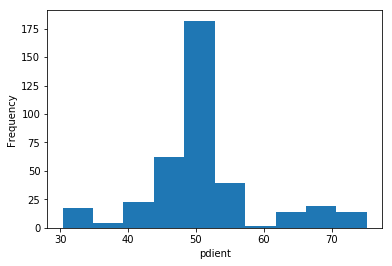

P20231	636	52	 Eukaryota	40


## Histograma pident homologos P20231

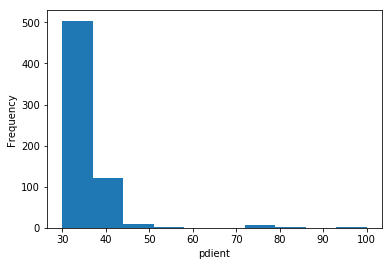

P02604	194	19	 Eukaryota	5


## Histograma pident homologos P02604

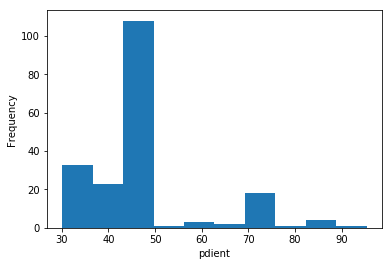

P20340	452	18	 Eukaryota	13


## Histograma pident homologos P20340

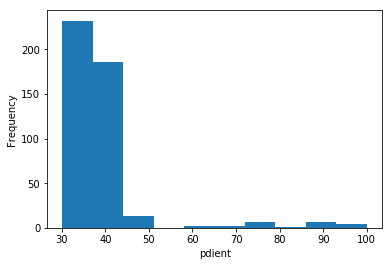

P04789	616	14	 Eukaryota	128


## Histograma pident homologos P04789

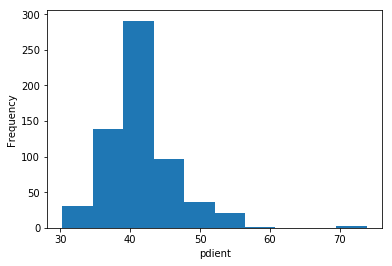

O81235	205	15	 Eukaryota	8


## Histograma pident homologos O81235

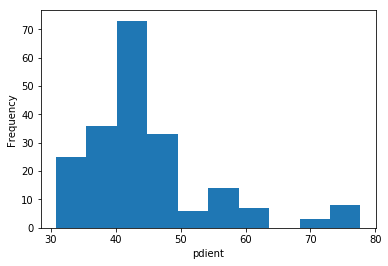

P34760	114	15	 Eukaryota	10


## Histograma pident homologos P34760

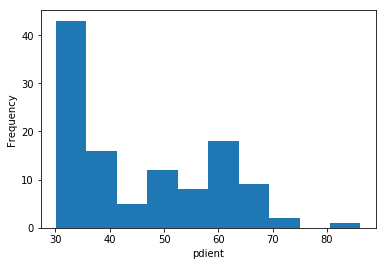

P02638	67	17	 Eukaryota	40


## Histograma pident homologos P02638

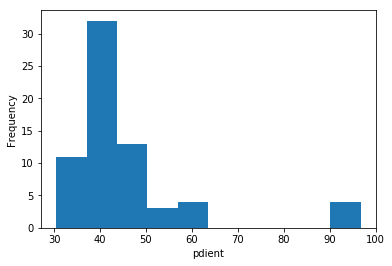

P12931	93	14	 Eukaryota	78


## Histograma pident homologos P12931

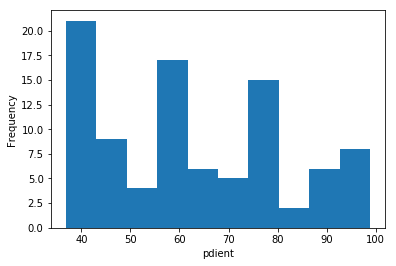

P9WFR9	431	15	 Bacteria	22


## Histograma pident homologos P9WFR9

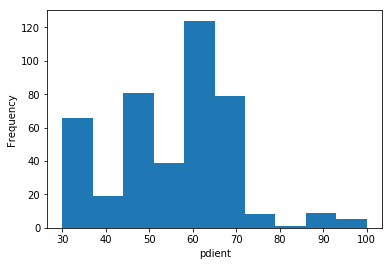

P0A886	433	15	 Bacteria	5


## Histograma pident homologos P0A886

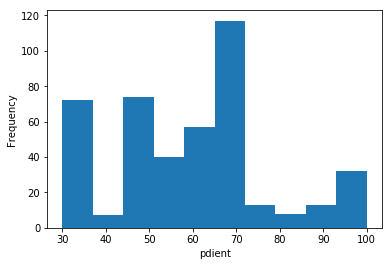

P01123	634	26	 Eukaryota	7


## Histograma pident homologos P01123

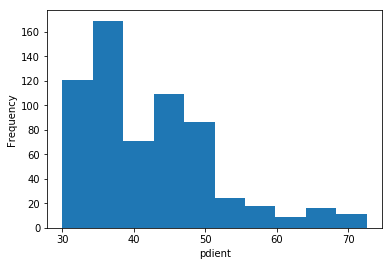

P0CS13	393	15	 Eukaryota	8


## Histograma pident homologos P0CS13

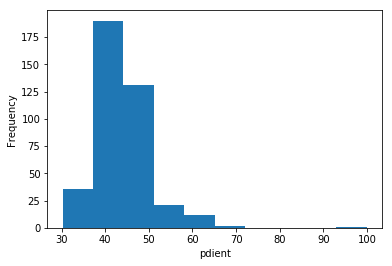

P07477	675	52	 Eukaryota	9


## Histograma pident homologos P07477

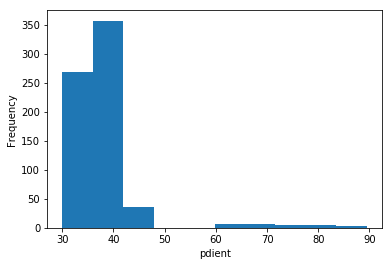

P00448	209	15	 Bacteria	42


## Histograma pident homologos P00448

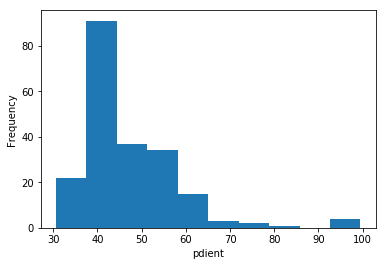

P80511	47	13	 Eukaryota	36


## Histograma pident homologos P80511

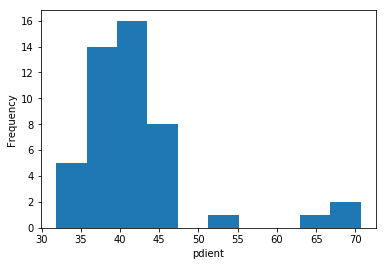

P58399	321	20	 Eukaryota	8


## Histograma pident homologos P58399

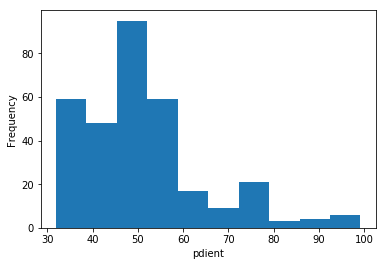

664


In [150]:
count = 0
print ("uniprot","sprot","dfwork","linage","","confs",sep="\t")
for uniprot_id in ensemble_df:
    if type(ensemble_df[uniprot_id].get("blast_results")) != type(None):
        homologs_sprot = int(len(set(ensemble_df[uniprot_id].get("blast_results").get("UNIPROT_ID"))))
        homologs_dfwork = int(len(ensemble_data[uniprot_id].get("homologs_in_df_work")))
        linage = ensemble_data[uniprot_id]["Linage"].split(",")[1]
        confs_data = ensemble_data[uniprot_id]["pdb_chain_count"]
        if homologs_sprot > 20:
            if homologs_dfwork>10:
                count +=1
                print (uniprot_id,homologs_sprot,homologs_dfwork,linage,confs_data,sep="\t")
                printd("## Histograma pident homologos "+uniprot_id)
                plot_his3 = ensemble_df[uniprot_id]["blast_results"]["pident"].plot(kind="hist")  
                plot_his3.set_xlabel("pdient")
                plt.show()
print (str(count))
    

## Histograma pident homologos P20000

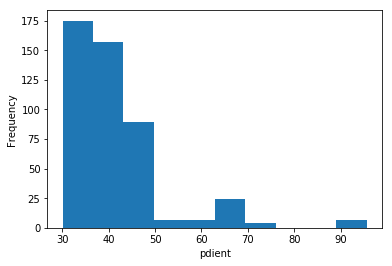

In [69]:
uniprot_id = "P20000"
printd("## Histograma pident homologos "+uniprot_id)
plot_his3 = ensemble_df[uniprot_id]["blast_results"]["pident"].plot(kind="hist")  
plot_his3.set_xlabel("pdient")
plt.show()

In [108]:
count = 0
print ("ID","sprot","dfwork","confs_data","[30,40,50,60,70,80,90]",sep="\t")
for uniprot_id in ensemble_data:
    if type(ensemble_df[uniprot_id].get("blast_results")) != type(None):
        homologs_sprot = int(len(set(ensemble_df[uniprot_id].get("blast_results").get("UNIPROT_ID"))))
        homologs_dfwork = int(len(ensemble_data[uniprot_id].get("homologs_in_df_work")))
        linage = ensemble_data[uniprot_id]["Linage"].split(",")[1]
        confs_data = ensemble_data[uniprot_id]["pdb_chain_count"]
        gene_name = ensemble_data[uniprot_id]["Gene names"]
        #Es necesario que tenga mas de 20 homologos en sprot
        if (homologs_sprot > 20) and (homologs_sprot <50):
            
            ident_list = list(ensemble_df[uniprot_id]["blast_results"]["pident"])
            ident_histo = []
            for n in range(3,10):
                ident_histo.append (len([x for x in ident_list if (x >= n*10) and (x < (n+1)*10) ]))
            
            
            #check si no hay hits repetidos en blast
            if sum(ident_histo) == homologs_sprot:
                #que no tenga vacios en el el histograma de identidades
                if (sum(ident_histo[3:]) > 5) and (sum(ident_histo[:3]) > 5):    
                    count +=1
                    print (uniprot_id,homologs_sprot,homologs_dfwork,confs_data,"\t",sep="\t",end="")
                    print (ident_histo,end="")
                    linage_blast = set()
                    for homolog_uniprot_id  in ensemble_df[uniprot_id]["blast_results"]["UNIPROT_ID"]:
                        linage_blast.update( [str(df_sprot.loc[df_sprot["UNIPROT_ID"]==homolog_uniprot_id ]["Linage"]).split(",")[1]] )
                    print(linage_blast)
            
                
            
print (count)

ID	sprot	dfwork	confs_data	[30,40,50,60,70,80,90]
P04637	29	1	373		[0, 5, 4, 0, 7, 8, 5]{' Eukaryota'}
P07311	23	0	6		[3, 2, 7, 8, 0, 1, 2]{' Bacteria', ' Eukaryota'}
Q53122	21	3	6		[6, 8, 0, 4, 3, 0, 0]{' Bacteria'}
P37333	22	3	76		[7, 8, 0, 4, 2, 0, 1]{' Bacteria'}
P37028	27	0	24		[7, 1, 12, 0, 0, 4, 3]{' Bacteria'}
P00889	49	2	8		[0, 1, 14, 11, 6, 11, 6]{' Bacteria', ' Eukaryota'}
P22759	26	5	24		[1, 13, 4, 8, 0, 0, 0]{' Bacteria'}
P27038	28	4	5		[15, 0, 0, 7, 0, 1, 5]{' Eukaryota'}
P00280	23	1	18		[0, 1, 9, 10, 2, 1, 0]{' Bacteria'}
A2QAN3	36	0	6		[23, 0, 3, 0, 8, 0, 2]{' Eukaryota'}
P27037	28	4	7		[15, 0, 0, 7, 0, 1, 5]{' Eukaryota'}
Q13705	34	5	18		[21, 0, 0, 7, 0, 2, 4]{' Eukaryota'}
P00282	23	1	281		[0, 2, 5, 10, 4, 1, 1]{' Bacteria'}
Q96LI5	32	0	5		[22, 2, 0, 0, 4, 3, 1]{' Eukaryota'}
P12643	49	2	25		[31, 1, 0, 10, 2, 1, 4]{' Eukaryota'}
P13501	45	3	55		[16, 13, 7, 0, 4, 4, 1]{' Herpesvirales', ' Eukaryota'}
P45381	33	0	16		[15, 10, 0, 1, 1, 2, 4]{' Bacteria', ' Eukaryota'}
P0

P33371	36	0	8		[15, 8, 3, 4, 0, 3, 3]{' Bacteria'}
P00374	43	8	91		[29, 3, 1, 0, 1, 7, 2]{' Bacteria', ' Herpesvirales', ' Eukaryota'}
P01865	28	13	34		[12, 0, 1, 10, 3, 2, 0]{' Eukaryota'}
P21397	25	1	6		[8, 0, 0, 2, 8, 6, 1]{' Bacteria', ' Eukaryota'}
P19099	33	1	36		[19, 2, 0, 7, 3, 0, 2]{' Eukaryota'}
P14211	47	1	5		[16, 1, 16, 4, 1, 0, 9]{' Eukaryota'}
P14635	37	0	8		[12, 5, 11, 4, 0, 5, 0]{' Eukaryota'}
P01909	21	7	18		[0, 2, 6, 0, 11, 2, 0]{' Eukaryota'}
Q16875	24	1	18		[3, 2, 1, 1, 14, 0, 3]{' Eukaryota'}
P15311	25	4	7		[0, 5, 6, 0, 10, 0, 4]{' Eukaryota'}
P27797	46	1	20		[15, 1, 16, 5, 0, 0, 9]{' Eukaryota'}
P69747	41	0	7		[0, 0, 12, 20, 4, 5, 0]{' Eukaryota'}
Q15758	34	1	7		[6, 21, 0, 3, 1, 2, 1]{' Bacteria', ' Archaea', ' Eukaryota'}
Q9QZE5	21	0	21		[2, 1, 5, 2, 2, 6, 3]{' Eukaryota'}
P54646	24	4	18		[0, 12, 3, 1, 4, 0, 4]{' Eukaryota'}
P00171	26	2	28		[13, 6, 0, 0, 1, 6, 0]{' Eukaryota'}
P18910	35	0	6		[27, 0, 1, 5, 0, 0, 2]{' Eukaryota'}
Q5IS54	46	7	10		[24, 7, 4, 0, 0, 8,

In [104]:
query = "Q9I0M3"

estudiar_proteina(query)
ensemble_df[query]["blast_results"]

## Mostrando datos de la proteina de estudio

&nbsp;&nbsp;**UNIPROT_ID** >`Q9I0M3`

&nbsp;&nbsp;**Entry_name** >`FTSK_PSEAE`

&nbsp;&nbsp;**Status** >`reviewed`

&nbsp;&nbsp;**Protein_names** >`DNA translocase FtsK`

&nbsp;&nbsp;**Gene names** >`ftsK PA2615`

&nbsp;&nbsp;**Organism** >`Pseudomonas aeruginosa (strain ATCC 15692 / DSM 22644 / CIP 104116 / JCM 14847 / LMG 12228 / 1C / PRS 101 / PAO1)`

&nbsp;&nbsp;**Length** >`811`

&nbsp;&nbsp;**Linage** >`cellular organisms, Bacteria, Proteobacteria, Gammaproteobacteria, Pseudomonadales, Pseudomonadaceae, Pseudomonas, Pseudomonas aeruginosa group, Pseudomonas aeruginosa, Pseudomonas aeruginosa (strain ATCC 15692 / DSM 22644 / CIP 104116 / JCM 14847 / LMG 12228 / 1C / PRS 101 / PAO1)`

&nbsp;&nbsp;**Sequence** >`MRRKNSDLKDSTTASHAAAWRQQLHSRLKEGVLIALGALCLYLWMALLTYDSADPSWSHSSQVDQVQNAAGRLGAVSADILFMTLGYFAYLFPLLLGIKTWQVFRRRNLPWEWNTWLFSWRLVGLIFLILAGSALAYIHFHASGHMPASASAGGAIGQSLGRVAVDALNVQGSTLVFFALFLFGLTVFADLSWFKVMDVTGKITLDFFELIQNAFNRWMGARAERKQLVAQLREVDERVAEVVAPSVPDRREQSKAKERLLEREEALAKHMSEREKRPPPKIDPPPSPKAPEPSKRVLKEKQAPLFVDTAVEGTLPPLSLLDPAEVKQKSYSPESLEAMSRLLEIKLKEFGVEVSVDSVHPGPVITRFEIQPAAGVKVSRISNLAKDLARSLAVISVRVVEVIPGKTTVGIEIPNEDRQMVRFSEVLSSPEYDEHKSTVPLALGHDIGGRPIITDLAKMPHLLVAGTTGSGKSVGVNAMLLSILFKSTPSEARLIMIDPKMLELSIYEGIPHLLCPVVTDMKEAANALRWSVAEMERRYRLMAAMGVRNLAGFNRKVKDAEEAGTPLTDPLFRRESPDDEPPQLSTLPTIVVVVDEFADMMMIVGKKVEELIARIAQKARAAGIHLILATQRPSVDVITGLIKANIPTRIAFQVSSKIDSRTILDQGGAEQLLGHGDMLYLPPGTGLPIRVHGAFVSDDEVHRVVEAWKLRGAPDYIEDILAGVDEGGGGGGSFDGGDGSGEGSEDDPLYDEAVRFVTESRRASISAVQRKLKIGYNRAARMIEAMEMAGVVTPMNTNGSREVIAPAPVRD`

&nbsp;&nbsp;**Taxonomic lineage IDs** >`208964`

&nbsp;&nbsp;**PDB_CHAIN_LIST** >`['2IUT_A', '2IUT_B', '2IUU_A', '2IUU_B', '2IUU_C', '2IUU_D', '2IUU_E', '2IUU_F', '2J5O_A', '2VE8_D', '2VE9_F']`

&nbsp;&nbsp;**pdb_chain_count** >`11`

&nbsp;&nbsp;**PDB_in_df_work** >`['2VE8', '2IUU', '2VE9', '2IUT', '2J5O']`

&nbsp;&nbsp;**blast_results** >`blast_results/Q9I0M3_blast_results.txt`

&nbsp;&nbsp;**homologs_sprot** >`['Q9Z3U1', 'Q87ZS5', 'Q88FS8', 'Q87DL2', 'Q9PDC9', 'Q8PL00', 'P39920', 'Q8P993', 'Q8XWX9', 'Q8EER3', 'Q8EER3', 'Q87QP4', 'Q87QP4', 'Q8D8M2', 'Q8D8M2', 'Q84I33', 'Q84I33', 'Q8ZGC7', 'Q8ZGC7', 'Q83S00', 'P46889', 'Q8X5H9', 'Q8FJC7', 'Q9JZ36', 'Q9JU31', 'Q8ZQD5', 'Q8Z814', 'Q92G50', 'Q4UJY1', 'Q1RK79', 'Q68VS6', 'Q9ZCD4', 'Q8Y7A3', 'Q92BW9', 'Q8EQS7', 'P64167', 'P64166', 'Q9KA95', 'P21458', 'Q8NWY8', 'Q6G9T7', 'Q5HGF5', 'Q6GHF9', 'Q8CMM5', 'Q5HPR5', 'P64165', 'P64164', 'Q9CF25', 'Q9PLI7', 'O84744', 'Q9Z726']`

&nbsp;&nbsp;**homologs_in_df_work** >`['P46889']`

### Histograma de los resultados del blast

UNIPROT_ID  pident  qcov  qstart  qend  sstart  send  gaps
1       Q9Z3U1  81.165    99       8   811       1   801     9
2       Q87ZS5  80.917    99       8   811       1   801     9
3       Q88FS8  76.092    98      20   811      16   834    37
4       Q87DL2  54.511    97      21   808      28   783    52
5       Q9PDC9  54.386    97      21   808      28   783    52
6       Q8PL00  53.770    98      11   808      17   783    53
7       P39920  52.785    96      30   807      27   776    52
8       Q8P993  53.968    99       2   808       8   783    55
9       Q8XWX9  51.792    98      12   806       9   771    60
10      Q8EER3  65.923    84     315   806     416   905     4
11      Q8EER3  30.645    84      27   212      15   196     4
13      Q87QP4  62.874    90     312   811     532  1028     5
14      Q87QP4  34.061    90      13   240      15   234    10
15      Q8D8M2  62.249    87     315   811     492   985     5
16      Q8D8M2  38.967    87      13   224      15   219     9
17      Q84I33  61.847    99     315   811     467   960     5
18      Q84I33  30.473    99      13   344      15   332    26
19      Q8ZGC7  64.444    84     315   808     815  1303     7
20      Q8ZGC7  32.461    84      27   217      21   207     4
21      Q83S00  62.828    84     315   808     853  1340     8
23      P46889  62.828    84     315   808     840  1327     8
25      Q8X5H9  62.626    84     315   808     853  1340     8
27      Q8FJC7  62.828    84     315   808     858  1345     8
29      Q9JZ36  46.184    95      38   805      73   807    43
30      Q9JU31  46.054    95      38   805      73   807    43
33      Q8ZQD5  62.828    83     315   808     862  1349     8
35      Q8Z814  62.828    83     315   808     854  1341     8
39      Q92G50  38.228    95      34   806      17   742    81
40      Q4UJY1  38.755    95      34   806      17   743    74
42      Q1RK79  38.636    95      34   806      17   747    80
45      Q68VS6  39.103    94      41   806      25   738    80
48      Q9ZCD4  38.755    95      34   806      17   742    75
52      Q8Y7A3  40.132    89      83   803      59   748    99
53      Q92BW9  39.948    90      83   808      59   758   106
56      Q8EQS7  39.882    82     151   811     142   777    57
57      P64167  38.411    91      69   804      40   765    74
58      P64166  38.411    91      69   804      40   765    74
61      Q9KA95  41.776    82     144   807     130   781    58
62      P21458  40.476    80     153   804     141   776    56
65      Q8NWY8  37.388    91      71   804      54   781   100
66      Q6G9T7  37.388    91      71   804      54   781   100
67      Q5HGF5  37.388    91      71   804      54   781   100
68      Q6GHF9  37.388    91      71   804      54   781   100
69      Q8CMM5  36.514    91      71   804      48   789    96
70      Q5HPR5  36.514    91      71   804      48   789    96
71      P64165  37.037    91      71   804      54   780   105
72      P64164  37.037    91      71   804      54   780   105
80      Q9CF25  38.462    91      69   804      44   750    65
97      Q9PLI7  32.593    94      40   804      23   786    91
103     O84744  32.503    94      40   804      23   791    72
107     Q9Z726  31.744    97      21   809       6   804   132

In [188]:
count = 0
print ("ID","sprot","dfwork","confs_data","[30, 40, 50, 60, 70, 80, 90]",sep="\t")
for uniprot_id in ensemble_data:
    if type(ensemble_df[uniprot_id].get("blast_results")) != type(None):
        homologs_sprot = int(len(set(ensemble_df[uniprot_id].get("blast_results").get("UNIPROT_ID"))))
        homologs_dfwork = int(len(ensemble_data[uniprot_id].get("homologs_in_df_work")))
        linage = ensemble_data[uniprot_id]["Linage"].split(",")[1]
        confs_data = ensemble_data[uniprot_id]["pdb_chain_count"]
        gene_name = ensemble_data[uniprot_id]["Gene names"]
        
        #Es necesario que tenga mas de 20 homologos en sprot
        if (homologs_sprot > 200):
           
            ident_list = list(ensemble_df[uniprot_id]["blast_results"]["pident"])
            ident_histo = []
            for n in range(3,10):
                ident_histo.append (len([x for x in ident_list if (x >= n*10) and (x < (n+1)*10) ]))
            
            
            #check si no hay hits repetidos en blast
            
            #que no tenga vacios en el el histograma de identidades
            if (sum(ident_histo[3:]) > 5) and (sum(ident_histo[:3]) > 5):    
                count +=1
                print (uniprot_id,homologs_sprot,homologs_dfwork,confs_data,"\t",sep="\t",end="")
                print (ident_histo)
                    
print (count)

ID	sprot	dfwork	confs_data	[30, 40, 50, 60, 70, 80, 90]
P20000	470	19	8		[250, 171, 11, 27, 4, 0, 7]
P39070	433	5	26		[0, 30, 323, 39, 26, 13, 2]
P0A6I6	658	8	49		[78, 367, 93, 57, 17, 4, 27]
P0A6I9	225	0	11		[121, 67, 22, 5, 0, 4, 2]
P17202	520	19	16		[416, 96, 0, 0, 6, 3, 0]
Q9I6D1	658	8	6		[88, 293, 150, 106, 7, 1, 11]
Q9HTJ1	555	19	38		[370, 65, 33, 6, 63, 15, 2]
O26010	650	8	7		[189, 438, 15, 2, 0, 0, 6]
B7V2S6	658	8	6		[88, 293, 150, 106, 7, 1, 11]
P16474	992	11	5		[0, 307, 533, 142, 8, 1, 1]
G3I8R9	995	11	6		[0, 305, 529, 139, 11, 2, 8]
P07463	509	29	10		[177, 192, 35, 11, 7, 116, 9]
P24941	720	33	485		[510, 108, 50, 45, 2, 2, 5]
P00772	538	45	118		[523, 4, 13, 1, 0, 7, 0]
P9WPE5	668	4	23		[35, 404, 176, 14, 21, 4, 11]
P60712	449	13	5		[47, 47, 16, 16, 15, 91, 201]
Q5HED0	373	4	13		[250, 81, 24, 0, 4, 1, 9]
P77674	475	18	8		[404, 35, 0, 0, 3, 9, 22]
P84080	201	10	8		[64, 52, 14, 15, 6, 28, 18]
P56122	707	2	8		[253, 433, 14, 2, 0, 0, 6]
A7MB62	424	12	20		[56, 348, 0, 5, 4, 1, 8]


Q2FZ42	773	4	7		[2, 50, 378, 234, 68, 24, 10]
P60491	882	5	8		[30, 153, 597, 101, 0, 0, 0]
P0A7L8	804	4	104		[2, 5, 168, 399, 108, 42, 55]
Q5SHQ0	787	5	8		[6, 41, 609, 126, 2, 0, 2]
P9WGY7	672	5	13		[42, 658, 573, 343, 70, 6, 15]
P62238	837	2	20		[93, 491, 242, 5, 3, 0, 2]
P0A444	389	3	43		[161, 0, 1, 5, 11, 206, 4]
Q57DY1	510	4	6		[420, 58, 15, 11, 2, 1, 2]
O58187	717	1	7		[699, 0, 1, 10, 0, 4, 3]
P38502	366	3	6		[16, 194, 128, 24, 0, 4, 0]
P0A6D3	411	4	20		[186, 48, 44, 36, 32, 36, 18]
P32324	227	5	37		[185, 32, 1, 17, 2, 5, 5]
P0A6P1	769	0	9		[235, 344, 159, 31, 37, 1, 21]
P0CE47	914	9	24		[79, 3, 10, 103, 513, 134, 52]
P0A6T8	298	4	21		[148, 48, 2, 29, 12, 13, 19]
Q01698	985	9	12		[150, 2, 11, 204, 611, 3, 4]
P43895	694	1	5		[617, 374, 236, 9, 0, 0, 1]
P0A6T5	298	4	84		[148, 48, 2, 29, 12, 13, 19]
P51765	388	3	22		[160, 0, 1, 6, 10, 206, 5]
P9WHE9	519	10	40		[197, 281, 24, 3, 6, 6, 0]
P29255	292	3	7		[3, 148, 1, 1, 78, 60, 1]
Q60177	202	23	14		[96, 73, 18, 11, 4, 0, 0]
O66529	579	1

P04391	413	10	15		[206, 48, 96, 38, 7, 4, 14]
Q45Z29	333	12	6		[86, 83, 70, 80, 7, 1, 6]
P9WIL4	558	4	10		[104, 396, 43, 3, 4, 4, 0]
P54651	376	6	9		[213, 106, 3, 54, 1, 0, 0]
P09446	994	11	7		[0, 512, 308, 58, 68, 48, 0]
P44859	369	3	6		[143, 54, 72, 26, 62, 9, 2]
P00357	361	16	6		[93, 77, 20, 76, 94, 0, 1]
P34897	817	4	9		[41, 725, 39, 9, 0, 0, 3]
P0A825	832	4	6		[40, 61, 416, 155, 75, 39, 25]
O31662	315	3	6		[92, 182, 28, 9, 3, 1, 0]
Q56218	682	0	17		[0, 116, 466, 95, 1, 3, 0]
P02077	799	26	7		[109, 319, 21, 98, 139, 103, 10]
P0A7B8	433	5	47		[0, 6, 168, 111, 48, 40, 37]
Q830Y9	242	3	8		[20, 18, 80, 87, 37, 0, 0]
P84077	201	10	8		[64, 52, 14, 15, 6, 28, 18]
P61490	999	4	28		[0, 0, 144, 848, 6, 0, 0]
P61493	696	5	7		[24, 150, 458, 63, 2, 0, 0]
Q818Z9	275	1	60		[1, 147, 67, 33, 11, 2, 13]
O16305	512	29	9		[193, 183, 46, 8, 5, 47, 81]
P0A6K3	403	6	51		[130, 126, 60, 18, 7, 15, 27]
Q4QMV6	392	4	8		[119, 139, 53, 74, 4, 0, 1]
P08622	730	1	5		[137, 237, 178, 76, 42, 18, 43]
P82287	324	20	

P9WFX7	365	0	6		[230, 100, 6, 8, 2, 8, 7]
P9WFX5	502	3	74		[331, 139, 14, 2, 6, 5, 0]
Q5KWH6	590	1	5		[449, 68, 42, 31, 20, 0, 0]
P60430	951	5	7		[6, 6, 509, 304, 96, 13, 5]
Q5SJE1	433	3	8		[13, 100, 299, 20, 0, 0, 0]
P0A7M6	323	0	109		[3, 54, 96, 35, 60, 12, 39]
Q8X9M2	835	4	12		[22, 157, 363, 169, 47, 31, 45]
P9WFV9	725	3	5		[673, 11, 10, 14, 8, 5, 1]
P0A7U7	406	0	100		[6, 163, 93, 38, 44, 19, 19]
P62662	877	2	20		[13, 544, 313, 6, 0, 0, 0]
P80373	999	2	117		[78, 664, 248, 8, 0, 0, 0]
P0A7X3	688	2	102		[19, 126, 289, 105, 42, 40, 42]
Q56313	707	0	6		[10, 37, 651, 7, 0, 0, 2]
P10760	250	5	36		[1, 28, 126, 76, 11, 3, 5]
P84612	210	15	20		[73, 80, 44, 7, 6, 0, 0]
Q16539	522	27	243		[336, 112, 54, 9, 4, 5, 4]
Q2FW33	797	4	7		[40, 549, 94, 69, 26, 2, 4]
Q2FW22	756	4	7		[36, 269, 327, 83, 24, 3, 2]
Q15661	636	52	44		[593, 40, 2, 0, 8, 1, 0]
P62263	601	3	11		[429, 110, 19, 14, 2, 23, 2]
P24752	204	12	28		[154, 36, 6, 0, 4, 2, 2]
P09860	351	21	8		[181, 61, 97, 8, 0, 0, 6]
A5U4M0	502	3	18		[3

P18669	438	3	18		[19, 96, 269, 43, 3, 1, 7]
P31335	452	1	18		[443, 1, 10, 2, 0, 5, 0]
P17812	691	3	6		[12, 638, 26, 4, 6, 3, 2]
Q9RSS7	851	7	24		[52, 40, 306, 444, 7, 0, 2]
Q2FW16	997	5	7		[25, 40, 154, 552, 110, 81, 22]
Q9Z9H5	797	4	20		[29, 337, 424, 6, 0, 0, 0]
P0AG48	702	4	97		[188, 307, 67, 33, 44, 21, 18]
Q9RSW7	888	5	28		[21, 271, 567, 27, 0, 0, 2]
P80376	971	5	115		[48, 181, 694, 44, 3, 0, 0]
P36238	853	7	16		[49, 36, 336, 426, 4, 0, 0]
P0A7J7	851	7	105		[56, 30, 132, 459, 76, 35, 25]
P54050	226	3	5		[189, 22, 7, 7, 1, 0, 0]
Q72GW3	337	1	18		[0, 127, 176, 33, 0, 0, 0]
P35871	337	1	8		[0, 127, 176, 33, 0, 0, 0]
P20339	499	23	21		[287, 185, 4, 4, 3, 10, 6]
P0A0G2	295	3	7		[0, 79, 108, 57, 32, 1, 5]
Q9RXJ0	794	6	27		[13, 33, 562, 181, 4, 0, 1]
P24316	765	4	8		[131, 428, 197, 6, 0, 0, 1]
Q9RSL3	761	4	27		[43, 582, 130, 4, 0, 2, 0]
Q7MHL9	464	4	6		[159, 77, 78, 68, 67, 14, 1]
P0A7Z6	679	7	13		[158, 283, 50, 87, 21, 29, 37]
Q6QAQ1	449	13	5		[47, 47, 16, 16, 15, 91, 201]
P0A6C8	416	2	

In [173]:
sprot_error_list = []

for uniprot_id in ensemble_data:
    

    
    
        
        

P04637  already exist: 29
P07311  already exist: 23
P20000  already exist: 470
P39070  already exist: 433
P0A6I6  already exist: 658
P01887  already exist: 96
Q9WZK0  already exist: 658
P68699  already exist: 165
P22483  already exist: 42
P0A6I9  already exist: 225
Q6DE08  already exist: 107
Q94F62  already exist: 135
P17202  already exist: 520
P04252  already exist: 48
Q9I6D1  already exist: 658
Q9HTJ1  already exist: 555
O68014  already exist: 20
O26010  already exist: 650
B7V2S6  already exist: 658
P26164  already exist: 86
P39779  already exist: 110
Q08638  already exist: 191
P0ABD4  already exist: 25
P22505  already exist: 179
Q75I93  already exist: 184
P16474  already exist: 992
Q53122  already exist: 21
Q0KBP1  already exist: 288
G3I8R9  already exist: 995
P37333  already exist: 22
O81192  already exist: 173
P37028  already exist: 27
P07463  already exist: 509
P00915  already exist: 89
P20807  already exist: 36
Q8N1Q1  already exist: 91
Q9H251  already exist: 235
P11838  already

P11940 32
Q5NF56 410
P71086 53
P00949 34
P35813 36
P0AFL8 84
Q9Z2U1 167
P43686 115
P49722 170
P04070 44
P40327 88
O55234 52
Q9HVC3 714
P60617 92
P0AG17 38
Q2FXS8 723
P41220 30
Q72I12 27
Q9RSS4 360
P38061 61
P0CX25 61
P20279 84
P29396 769
P47735 127
P53779 147
P13543 201
Q9H8S9 36
P00784 148
Q5SLL5 283
P00309 64
P33025 56
Q9EQZ5 22
Q837U7 407
P37344 105
P11998 577
P08877 55
P9WHN7 710
Q9KQ21 714
P42013 51
P40454 20
Q13882 123
P00497 38
P28650 797
Q2FXQ1 905
P68919 313
Q9UL25 372
Q62636 627
P61227 647
P36946 205
Q5KXY4 107
P32170 71
P61175 864
P14121 50
P14120 60
Q9RSH2 400
P0A7Q6 271
P32410 52
Q63570 115
P62191 92
P05740 72
A2RJT9 86
O66990 144
P31800 22
P50861 462
O15492 35
P0CX82 23
Q72HR2 718
Q9RXJ9 950
P10971 24
P08518 30
Q5SIP7 186
P62655 789
P45983 189
Q8NTA6 69
P76342 80
Q13126 74
Q56215 588
P23909 593
Q29122 39
P83686 117
P15531 738
Q5SLV5 744
P00459 226
P45850 87
P32322 36
Q12629 43
P08244 395
P62834 628
P69249 87
Q9KWU6 649
P0AG51 409
Q72GV5 776
A5U127 235
P39207 739
P00388 97

P68433 175
P18079 342
P10943 21
Q46822 94
Q12522 71
P68436 165
P01315 70
Q43866 46
P02545 22
P05556 42
Q27546 130
P62617 523
Q9SKE2 20
P07170 782
P0A6I0 500
P20425 175
P25321 457
O74024 92
Q14565 78
P74750 54
P54753 51
P62495 60
Q15375 51
P29323 51
P54764 51
P0AAI5 55
Q8U4M2 73
P0A6R3 126
P02794 69
O07315 51
P0A6U8 356
Q31QJ2 677
P06344 45
Q9KJU4 299
P21310 242
Q06755 456
Q97SR4 213
P12532 56
P48635 54
P9WQD9 47
P0A6R0 417
P04117 89
P28793 207
Q2SWY7 572
P39748 188
P33650 22
Q9SF23 22
P0A8Q0 74
Q9N1E2 427
P0A6V1 311
P63096 188
P0DJQ5 219
P02263 252
P0C0S8 250
P62799 108
P00492 54
P01823 130
P25080 168
P18532 132
P0DOY3 50
P48059 28
P0AB80 41
M1GRN3 181
P07342 42
P05793 264
Q8ZK57 62
Q3JRA0 525
Q8RQP5 513
P0AA86 20
P01920 43
Q9BPU6 58
P13955 57
O43323 29
Q9YBF1 33
A9WCM4 902
P11474 149
P07953 25
O54438 344
P46275 359
P10933 26
O13437 23
P28870 123
Q13451 22
Q81WH2 679
P02973 24
P0A9C9 47
P10824 188
P01902 144
P52789 58
P06181 21
Q9V1G0 229
P60568 38
P60569 38
P10081 876
P63074 37
P22301

O00330 20
Q58134 21
P06996 33
Q5SLR3 70
Q9PM24 252
Q9ZLT0 134
O67518 59
P44539 82
P39411 75
P07328 40
P14743 31
P47077 21
Q56224 205
P32664 92
P21874 67
P41146 114
P02699 158
P26196 401
P20711 35
P0C0V0 30
Q5LLW6 24
O14793 42
P02208 145
Q16695 173
P02299 175
P49850 336
P12694 25
P11182 25
P44862 201
P02689 88
P35579 69
P13538 68
P02185 125
Q9UM54 20
Q64331 20
P9WJJ5 253
Q57961 43
O26253 43
Q81RP3 275
P01012 102
Q9DF33 326
Q2VEQ7 36
P15723 56
P41250 28
O95749 23
P12653 28
P56680 49
P30750 302
P22524 22
Q9HX21 248
P22887 741
B5Z9W9 746
Q9UN36 32
P01138 73
Q56222 39
P9WML5 284
P20142 120
P46427 79
Q8MU52 31
P06897 249
P08515 53
P00390 71
P54652 993
P01820 132
O75874 33
P33284 55
P50213 339
P35557 53
P01869 26
P29218 40
P05231 26
P01320 90
P08476 20
P00817 26
P01308 70
P0AAC8 347
B4EC22 520
P19588 81
P01721 162
Q9RRU8 284
P10056 151
P06672 37
P12955 70
O29912 25
Q9YAZ5 27
P04176 29
P70206 20
P23457 163
Q9D2U9 119
P01965 803
Q07010 44
P84074 120
O60760 31
P0A6Z3 376
P01808 131
P44815 526
P0

Q13285 22
O67323 654
P49588 641
P77499 40
P07464 24
P10828 73
P27302 67
Q6J8I9 181
Q63373 30
Q02899 36
P62656 300
Q9I0A3 598
P43912 641
O53871 206
Q99T13 317
Q01855 82
P0C0V8 47
P61011 98
P0A7V3 882
O29132 198
P62983 31
Q5SHN3 935
P62273 38
P62857 51
P62664 999
P0CX35 91
Q13188 24
Q5SLP8 36
P0AEH1 33
P0DOY9 910
P10408 801
O08665 40
Q15019 90
P63359 326
Q53176 137
Q15843 162
P11347 25
O58316 93
Q9Z0Y9 119
Q47PU3 24
P0ABK9 77
Q9L132 69
P9WQH7 23
O34790 70
P27362 706
Q9AC32 781
P62010 969
P39593 308
P0AA25 179
P42765 262
P02588 408
P47811 521
P11544 49
Q9Y6F1 20
P00512 319
P09455 76
Q9KKP2 241
P26784 27
Q9RSJ5 789
Q72I09 890
Q56435 648
Q2FXT0 782
Q2FZ60 143
P54999 24
Q15046 451
P59078 99
P07236 640
P0CG47 170
P36370 34
P01137 28
P19387 20
P30876 34
P22139 63
P0A7Z4 679
P52435 21
Q980K0 21
O26745 26
O60493 29
P51649 469
Q06520 65
P0A8M3 642
P0C2E9 21
P39079 45
P47079 44
Q9FII5 111
P14438 24
Q9X0C8 225
A5TYT6 91
Q2RSB2 35
Q08209 20
P10279 65
P20338 437
P62491 441
Q99P58 521
P09989 33
P16094

In [176]:
#Estos codigos uniprot fueron eliminados automaticamete de los arboles
#len(df_sprot.loc[df_sprot["UNIPROT_ID"]=="E7EML9"]) da igual a 0
print(list(set(sprot_error_list)))

['Q9UB83', 'Q9NPA5', 'E7EML9']


In [179]:
count=0
count_yes=0
count_no=0

for uniprot_id in ensemble_data:

print (count,count_yes,count_no)

4640 4640 0


In [181]:
estudiar_proteina("P04637")

## Mostrando datos de la proteina de estudio

&nbsp;&nbsp;**UNIPROT_ID** >`P04637`

&nbsp;&nbsp;**Entry_name** >`P53_HUMAN`

&nbsp;&nbsp;**Status** >`reviewed`

&nbsp;&nbsp;**Protein_names** >`Cellular tumor antigen p53 (Antigen NY-CO-13) (Phosphoprotein p53) (Tumor suppressor p53)`

&nbsp;&nbsp;**Gene names** >`TP53 P53`

&nbsp;&nbsp;**Organism** >`Homo sapiens (Human)`

&nbsp;&nbsp;**Length** >`393`

&nbsp;&nbsp;**Linage** >`cellular organisms, Eukaryota, Opisthokonta, Metazoa, Eumetazoa, Bilateria, Deuterostomia, Chordata, Craniata, Vertebrata, Gnathostomata (jawed vertebrates), Teleostomi, Euteleostomi, Sarcopterygii, Dipnotetrapodomorpha, Tetrapoda, Amniota, Mammalia, Theria, Eutheria, Boreoeutheria, Euarchontoglires, Primates, Haplorrhini, Simiiformes, Catarrhini, Hominoidea (apes), Hominidae (great apes), Homininae, Homo, Homo sapiens (Human)`

&nbsp;&nbsp;**Sequence** >`MEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLSPDDIEQWFTEDPGPDEAPRMPEAAPPVAPAPAAPTPAAPAPAPSWPLSSSVPSQKTYQGSYGFRLGFLHSGTAKSVTCTYSPALNKMFCQLAKTCPVQLWVDSTPPPGTRVRAMAIYKQSQHMTEVVRRCPHHERCSDSDGLAPPQHLIRVEGNLRVEYLDDRNTFRHSVVVPYEPPEVGSDCTTIHYNYMCNSSCMGGMNRRPILTIITLEDSSGNLLGRNSFEVRVCACPGRDRRTEEENLRKKGEPHHELPPGSTKRALPNNTSSSPQPKKKPLDGEYFTLQIRGRERFEMFRELNEALELKDAQAGKEPGGSRAHSSHLKSKKGQSTSRHKKLMFKTEGPDSD`

&nbsp;&nbsp;**Taxonomic lineage IDs** >`9606`

&nbsp;&nbsp;**PDB_CHAIN_LIST** >`['1A1U_A', '1A1U_C', '1AIE_A', '1C26_A', '1DT7_X', '1DT7_Y', '1GZH_A', '1GZH_C', '1H26_E', '1HS5_A', '1HS5_B', '1JSP_A', '1KZY_A', '1KZY_B', '1MA3_B', '1OLG_A', '1OLG_B', '1OLG_C', '1OLG_D', '1OLH_A', '1OLH_B', '1OLH_C', '1OLH_D', '1PES_A', '1PES_B', '1PES_C', '1PES_D', '1PET_A', '1PET_B', '1PET_C', '1PET_D', '1SAE_A', '1SAE_B', '1SAE_C', '1SAE_D', '1SAF_A', '1SAF_B', '1SAF_C', '1SAF_D', '1SAH_A', '1SAH_B', '1SAH_C', '1SAH_D', '1SAJ_A', '1SAJ_B', '1SAJ_C', '1SAJ_D', '1SAK_A', '1SAK_B', '1SAK_C', '1SAK_D', '1SAL_A', '1SAL_B', '1SAL_C', '1SAL_D', '1TSR_A', '1TSR_B', '1TSR_C', '1TUP_A', '1TUP_B', '1TUP_C', '1UOL_A', '1UOL_B', '1YC5_B', '1YCQ_B', '1YCR_B', '1YCS_A', '2AC0_A', '2AC0_B', '2AC0_C', '2AC0_D', '2ADY_A', '2ADY_B', '2AHI_A', '2AHI_B', '2AHI_C', '2AHI_D', '2ATA_A', '2ATA_B', '2ATA_C', '2ATA_D', '2B3G_B', '2BIM_A', '2BIM_B', '2BIN_A', '2BIO_A', '2BIP_A', '2BIQ_A', '2F1X_A', '2F1X_B', '2FEJ_A', '2FOJ_B', '2FOO_B', '2GS0_B', '2H1L_M', '2H1L_N', '2H1L_O', '2H1L_P', '2H1L_Q', '2H1L_R', '2H1L_S', '2H1L_T', '2H1L_U', '2H1L_V', '2H1L_W', '2H1L_X', '2H2D_B', '2H2F_B', '2H4F_D', '2H4H_B', '2H4J_D', '2H59_D', '2H59_E', '2J0Z_A', '2J0Z_B', '2J0Z_C', '2J0Z_D', '2J10_A', '2J10_B', '2J10_C', '2J10_D', '2J11_A', '2J11_B', '2J11_C', '2J11_D', '2J1W_A', '2J1W_B', '2J1X_A', '2J1X_B', '2J1Y_A', '2J1Y_B', '2J1Y_C', '2J1Y_D', '2J1Z_A', '2J1Z_B', '2J20_A', '2J20_B', '2J21_A', '2J21_B', '2K8F_B', '2L14_B', '2LY4_B', '2MEJ_B', '2MWO_B', '2MWP_B', '2MWY_B', '2MZD_B', '2OCJ_A', '2OCJ_B', '2OCJ_C', '2OCJ_D', '2PCX_A', '2QVQ_A', '2QXA_A', '2QXA_B', '2QXA_C', '2QXA_D', '2QXB_A', '2QXB_B', '2QXB_C', '2QXB_D', '2QXC_A', '2QXC_B', '2QXC_C', '2QXC_D', '2RUK_A', '2VUK_B', '2WGX_A', '2WGX_B', '2X0U_A', '2X0U_B', '2X0V_A', '2X0V_B', '2X0W_A', '2X0W_B', '2XWR_B', '2YBG_A', '2YBG_B', '2YBG_C', '2YBG_D', '2YDR_P', '2Z5S_P', '2Z5S_Q', '2Z5T_P', '2Z5T_Q', '2Z5T_R', '3D05_A', '3D06_A', '3D07_A', '3D07_B', '3D08_A', '3D09_A', '3DAC_B', '3IGK_A', '3IGL_A', '3KMD_A', '3KMD_B', '3KMD_C', '3KMD_D', '3KZ8_A', '3KZ8_B', '3LW1_P', '3OQ5_A', '3OQ5_B', '3OQ5_C', '3PDH_D', '3Q01_A', '3Q01_B', '3Q05_A', '3Q05_B', '3Q05_C', '3Q05_D', '3Q06_A', '3Q06_B', '3Q06_C', '3Q06_D', '3SAK_A', '3SAK_B', '3SAK_C', '3SAK_D', '3TG5_B', '3TS8_A', '3TS8_B', '3TS8_C', '3TS8_D', '3ZME_A', '3ZME_B', '4AGL_A', '4AGL_B', '4AGM_A', '4AGM_B', '4AGN_A', '4AGN_B', '4AGO_A', '4AGO_B', '4AGP_A', '4AGP_B', '4AGQ_A', '4AGQ_B', '4BUZ_P', '4BV2_E', '4BV2_H', '4FZ3_B', '4HFZ_B', '4HFZ_D', '4HJE_A', '4HJE_B', '4HJE_C', '4HJE_D', '4IBQ_A', '4IBQ_B', '4IBQ_C', '4IBQ_D', '4IBS_A', '4IBS_B', '4IBS_C', '4IBS_D', '4IBT_A', '4IBT_B', '4IBT_C', '4IBT_D', '4IBU_A', '4IBU_B', '4IBU_C', '4IBU_D', '4IBV_A', '4IBW_A', '4IBY_A', '4IBY_B', '4IBZ_A', '4IBZ_B', '4IBZ_C', '4IBZ_D', '4IJT_A', '4KVP_A', '4KVP_B', '4KVP_C', '4KVP_D', '4LO9_A', '4LO9_B', '4LO9_C', '4LO9_D', '4LOE_A', '4LOE_B', '4LOE_C', '4LOE_D', '4LOF_A', '4MZI_A', '4MZR_A', '4MZR_B', '4MZR_C', '4MZR_D', '4QO1_B', '4RP6_Z', '4RP7_Z', '4X34_C', '4XR8_C', '4XR8_D', '4ZZJ_A', '5A7B_A', '5A7B_B', '5AB9_A', '5AB9_B', '5ABA_A', '5ABA_B', '5AOI_A', '5AOI_B', '5AOJ_A', '5AOJ_B', '5AOK_A', '5AOK_B', '5AOL_A', '5AOL_B', '5AOM_A', '5AOM_B', '5BUA_A', '5ECG_A', '5ECG_B', '5G4M_A', '5G4M_B', '5G4N_A', '5G4N_B', '5G4O_A', '5G4O_B', '5HOU_A', '5HP0_A', '5HPD_A', '5LAP_A', '5LAP_B', '5LGY_A', '5LGY_B', '5LGY_C', '5LGY_D', '5MCT_A', '5MCT_B', '5MCU_A', '5MCU_B', '5MCV_A', '5MCV_B', '5MCW_A', '5MCW_B', '5MF7_A', '5MF7_B', '5MG7_A', '5MG7_B', '5O1A_A', '5O1A_B', '5O1B_A', '5O1B_B', '5O1C_A', '5O1C_B', '5O1D_A', '5O1D_B', '5O1E_A', '5O1E_B', '5O1F_A', '5O1F_B', '5O1G_A', '5O1G_B', '5O1H_A', '5O1H_B', '5O1I_A', '5O1I_B', '5OL0_C', '5OL0_D', '6FF9_A', '6FF9_B', '6FF9_C', '6FF9_D', '6FJ5_A', '6FJ5_B', '6FJ5_C', '6FJ5_D']`

&nbsp;&nbsp;**pdb_chain_count** >`373`

&nbsp;&nbsp;**PDB_in_df_work** >`['1GZH', '4IBT', '1YCR', '5G4N', '2BIP', '2WGX', '4RP7', '5O1F', '5HOU', '2J11', '2YBG', '4IBY', '5AB9', '3ZME', '2J10', '2X0U', '4AGL', '2MWY', '4AGQ', '3Q06', '2J0Z', '3KMD', '4ZZJ', '2F1X', '2BIM', '1SAK', '3DAC', '2BIQ', '4MZI', '2H4F', '2AC0', '5O1A', '3IGL', '1A1U', '4X34', '2OCJ', '5ECG', '4IBS', '3PDH', '2J20', '5O1B', '4IBU', '3SAK', '2MWP', '1UOL', '5BUA', '5HPD', '4AGN', '4LOF', '3D05', '5O1G', '3TG5', '4BUZ', '1C26', '3TS8', '4HJE', '4IBV', '2ATA', '1SAJ', '2QVQ', '2PCX', '2H4H', '5MCW', '1TSR', '2L14', '3LW1', '4AGO', '4FZ3', '4RP6', '2J1W', '1DT7', '1SAH', '5G4O', '3OQ5', '2J1Y', '1PES', '2FOO', '4HFZ', '1YCQ', '2XWR', '1TUP', '4IBQ', '5LAP', '1JSP', '2RUK', '1OLH', '4LOE', '2LY4', '6FJ5', '5MF7', '2Z5T', '1SAE', '2YDR', '3D09', '4AGP', '2VUK', '2J1X', '2FEJ', '4LO9', '2GS0', '4MZR', '5AOK', '4IBZ', '5O1H', '2X0W', '3Q01', '3Q05', '5MG7', '3D07', '1MA3', '1H26', '2AHI', '4IJT', '2MZD', '3KZ8', '2QXB', '4AGM', '4QO1', '2ADY', '1PET', '5AOJ', '5MCU', '5OL0', '5MCT', '2J1Z', '1KZY', '5AOM', '4KVP', '5HP0', '2H1L', '5G4M', '2H2D', '2BIN', '2BIO', '5O1D', '5MCV', '5ABA', '2QXA', '1SAF', '2MEJ', '5AOL', '4BV2', '5O1C', '3IGK', '5A7B', '5LGY', '1HS5', '2Z5S', '2H4J', '2X0V', '1AIE', '2H2F', '3D06', '4XR8', '1YCS', '3D08', '1YC5', '2H59', '5O1E', '1OLG', '1SAL', '5AOI', '2MWO', '2B3G', '2J21', '2K8F', '2QXC', '6FF9', '4IBW', '2FOJ', '5O1I']`

&nbsp;&nbsp;**blast_results** >`blast_results/P04637_blast_results.txt`

&nbsp;&nbsp;**homologs_sprot** >`['P10360', 'P10361', 'P79734', 'P41685', 'Q95330', 'P51664', 'P67939', 'Q9W679', 'Q9W678', 'P07193', 'O09185', 'P25035', 'Q64662', 'O57538', 'P56424', 'Q92143', 'P56423', 'Q9JJP2', 'Q9TUB2', 'Q9TTA1', 'O36006', 'Q8SPZ3', 'P13481', 'P61260', 'Q29537', 'Q00366', 'P67938', 'P02340', 'Q9WUR6']`

&nbsp;&nbsp;**homologs_in_df_work** >`['P02340']`

### Histograma de los resultados del blast

True

In [61]:
count = 0

for uniprot_id in ensemble_df:
    if type(ensemble_df[uniprot_id].get("blast_results")) != type(None):
        homologs_sprot = int(len(set(ensemble_df[uniprot_id].get("blast_results").get("UNIPROT_ID"))))
        homologs_dfwork = int(len(ensemble_data[uniprot_id].get("homologs_in_df_work")))
        linage = ensemble_data[uniprot_id]["Linage"].split(",")[1]
        confs_data = ensemble_data[uniprot_id]["pdb_chain_count"]
        count +=1
        gene_name = ensemble_data[uniprot_id]["Gene names"]
        if homologs_sprot > 20:
            linage_blast = set()
            for homolog_uniprot_id  in ensemble_df[uniprot_id]["blast_results"]["UNIPROT_ID"]:
                linage_blast.update( [str(df_sprot.loc[df_sprot["UNIPROT_ID"]==homolog_uniprot_id ]["Linage"]).split(",")[1]] )
            print (uniprot_id,homologs_sprot,homologs_dfwork,confs_data,linage_blast,sep="\t")
            count+=1
print (count)

P04637	29	1	373	{' Eukaryota'}
P0A722	274	2	7	{' Bacteria', ' Eukaryota'}
P02340	30	1	9	{' Eukaryota'}
P07311	23	0	6	{' Bacteria', ' Eukaryota'}


KeyboardInterrupt: 

In [79]:
def check_not_None(thing):
    if type(thing) != type (None):
        return True
    else:
        return False


In [185]:
ensemble_data

{'P04637': {'UNIPROT_ID': 'P04637',
  'Entry_name': 'P53_HUMAN',
  'Status': 'reviewed',
  'Protein_names': 'Cellular tumor antigen p53 (Antigen NY-CO-13) (Phosphoprotein p53) (Tumor suppressor p53)',
  'Gene names': 'TP53 P53',
  'Organism': 'Homo sapiens (Human)',
  'Length': 393,
  'Linage': 'cellular organisms, Eukaryota, Opisthokonta, Metazoa, Eumetazoa, Bilateria, Deuterostomia, Chordata, Craniata, Vertebrata, Gnathostomata (jawed vertebrates), Teleostomi, Euteleostomi, Sarcopterygii, Dipnotetrapodomorpha, Tetrapoda, Amniota, Mammalia, Theria, Eutheria, Boreoeutheria, Euarchontoglires, Primates, Haplorrhini, Simiiformes, Catarrhini, Hominoidea (apes), Hominidae (great apes), Homininae, Homo, Homo sapiens (Human)',
  'Sequence': 'MEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLSPDDIEQWFTEDPGPDEAPRMPEAAPPVAPAPAAPTPAAPAPAPSWPLSSSVPSQKTYQGSYGFRLGFLHSGTAKSVTCTYSPALNKMFCQLAKTCPVQLWVDSTPPPGTRVRAMAIYKQSQHMTEVVRRCPHHERCSDSDGLAPPQHLIRVEGNLRVEYLDDRNTFRHSVVVPYEPPEVGSDCTTIHYNYMCNSSCMGGMNRRPILTII

In [187]:
for uniprot_id in ensemble_data:
    e

4640

In [193]:
len(list(ensemble_df))

10165

# Trabajando con el dataframe de virus

In [32]:
df_virus.loc[ (df_virus["Organism"].str.contains("immunodeficiency")) ]

#df_virus.loc[ (df_virus["pdb_chain_count"] > 100) ]

UNIPROT_ID Entry_name    Status  \
3018      P04608  TAT_HV1H2  reviewed   
3039      P35963  POL_HV1Y2  reviewed   
3415      P12520  VPR_HV1N5  reviewed   
4197      P04586  POL_HV1Z6  reviewed   
4895      P03366  POL_HV1B1  reviewed   
5296      P0C6F2  POL_HV1LW  reviewed   
6483      P03367  POL_HV1BR  reviewed   
6647      P03349  GAG_HV1A2  reviewed   
7107      P05877  ENV_HV1MN  reviewed   
7396      P12493  GAG_HV1N5  reviewed   
7979      P19551  ENV_HV1MF  reviewed   
8857      P04580  ENV_HV1Z6  reviewed   
9126      P03377  ENV_HV1BR  reviewed   
9849      Q70626  ENV_HV1LW  reviewed   
11380     P16088  POL_FIVPE  reviewed   
11581     P04584  POL_HV2RO  reviewed   
11604     P69718  REV_HV1H3  reviewed   
13115     P03406  NEF_HV1BR  reviewed   
14461     P16087  GAG_FIVPE  reviewed   
15130     P35961  ENV_HV1Y2  reviewed   
16134     P20875  POL_HV1JR  reviewed   
17532     P12506  TAT_HV1Z2  reviewed   
17673     P05896  POL_SIVM1  reviewed   
18261     P04587  POL_HV1B5  reviewed   
18264     P12499  POL_HV1Z2  reviewed   
19236     P03375  ENV_HV1B1  reviewed   
19243     P20871  ENV_HV1JR  reviewed   
20199     P12488  ENV_HV1BN  reviewed   
20419     P04591  GAG_HV1H2  reviewed   
22040     P04601  NEF_HV1H2  reviewed   
22418     P24740  POL_HV1U4  reviewed   
22788     P04585  POL_HV1H2  reviewed   
22815     P04616  REV_HV1B1  reviewed   
23170     P04578  ENV_HV1H2  reviewed   
23173     P05880  ENV_HV1W2  reviewed   
23946     P12497  POL_HV1N5  reviewed   
24472     P03369  POL_HV1A2  reviewed   
24559     P03407  NEF_HV1A2  reviewed   
25153     O12158  POL_HV192  reviewed   
25316     Q73369  VPR_HV1B9  reviewed   

                                           Protein_names Gene names  \
3018    Protein Tat (Transactivating regulatory protein)        tat   
3039   Gag-Pol polyprotein (Pr160Gag-Pol) [Cleaved in...    gag-pol   
3415       Protein Vpr (R ORF protein) (Viral protein R)        vpr   
4197   Gag-Pol polyprotein (Pr160Gag-Pol) [Cleaved in...    gag-pol   
4895   Gag-Pol polyprotein (Pr160Gag-Pol) [Cleaved in...    gag-pol   
5296   Gag-Pol polyprotein (Pr160Gag-Pol) [Cleaved in...    gag-pol   
6483   Gag-Pol polyprotein (Pr160Gag-Pol) [Cleaved in...    gag-pol   
6647   Gag polyprotein (Pr55Gag) [Cleaved into: Matri...        gag   
7107   Envelope glycoprotein gp160 (Env polyprotein) ...        env   
7396   Gag polyprotein (Pr55Gag) [Cleaved into: Matri...        gag   
7979   Envelope glycoprotein gp160 (Env polyprotein) ...        env   
8857   Envelope glycoprotein gp160 (Env polyprotein) ...        env   
9126   Envelope glycoprotein gp160 (Env polyprotein) ...        env   
9849   Envelope glycoprotein gp160 (Env polyprotein) ...        env   
11380  Pol polyprotein [Cleaved into: Protease (Retro...        pol   
11581  Gag-Pol polyprotein (Pr160Gag-Pol) [Cleaved in...    gag-pol   
11604  Protein Rev (ART/TRS) (Anti-repression transac...        rev   
13115  Protein Nef (3'ORF) (Negative factor) (F-prote...        nef   
14461  Gag polyprotein [Cleaved into: Matrix protein ...        gag   
15130  Envelope glycoprotein gp160 (Env polyprotein) ...        env   
16134  Gag-Pol polyprotein (Pr160Gag-Pol) [Cleaved in...    gag-pol   
17532   Protein Tat (Transactivating regulatory protein)        tat   
17673  Gag-Pol polyprotein (Pr160Gag-Pol) [Cleaved in...    gag-pol   
18261  Gag-Pol polyprotein (Pr160Gag-Pol) [Cleaved in...    gag-pol   
18264  Gag-Pol polyprotein (Pr160Gag-Pol) [Cleaved in...    gag-pol   
19236  Envelope glycoprotein gp160 (Env polyprotein) ...        env   
19243  Envelope glycoprotein gp160 (Env polyprotein) ...        env   
20199  Envelope glycoprotein gp160 (Env polyprotein) ...        env   
20419  Gag polyprotein (Pr55Gag) [Cleaved into: Matri...        gag   
22040  Protein Nef (3'ORF) (Negative factor) (F-prote...        nef   
22418  Gag-Pol polyprotein (Pr160Gag-Pol) [Cleaved in...    gag-pol   
22788  Gag-Pol polyprotein (Pr160Gag-Pol) [Cleaved i

In [29]:
# guardar df en un archivo
df_virus.to_csv("archivos_importantes/df_virus_"+str(datetime.date.today())+".tsv",sep="\t")

In [30]:
len(df_virus)

567